In [2]:
# Import Python packages
import math
import sympy as sm
from sympy import *
import numpy as np
from numpy import *
from fractions import Fraction
import matplotlib.pyplot as plt

Generate random data as $n_{xxxx}, n_{xxxy}, n_{xxyx}, n_{xyxx}, n_{xxyy}, n_{xyxy}, n_{xyyx}, n_{xyyy}$
---------------------

In [3]:
h1_range = np.linspace(0, 1, num=50)  # 0 <= h1 <= 1
K = 1000 #TODO
data = np.zeros((50,K,8)) # Make a 100 by K by 8 array

for i in range(50):
    h1 = h1_range[i]  # θ1
    h2 = 0.1          # θ2
    h3 = 0.1          # θ3
    # h5 = 0.5        # θ5
    
    p_xxxx = 1/8 * (1 + h1*h2 + h1*h3 + h2*h3)
    p_xxxy = 1/8 * (1 + h1*h2 + h1*h3 + h2*h3)
    p_xxyx = 1/8 * (1 + h1*h2 - h1*h3 - h2*h3)
    p_xyxx = 1/8 * (1 - h1*h2 + h1*h3 - h2*h3)
    p_xxyy = 1/8 * (1 + h1*h2 - h1*h3 - h2*h3)
    p_xyxy = 1/8 * (1 - h1*h2 + h1*h3 - h2*h3)
    p_xyyx = 1/8 * (1 - h1*h2 - h1*h3 + h2*h3)
    p_xyyy = 1/8 * (1 - h1*h2 - h1*h3 + h2*h3)

    # TODO
    # 1000 trials
    data[i] = np.random.multinomial(1000, [p_xxxx]*1 + [p_xxxy]*1 + [p_xxyx]*1 + [p_xyxx]*1 + [p_xxyy]*1 + [p_xyxy]*1 + [p_xyyx]*1 + [p_xyyy]*1, size=K)
print(data)

[[[125. 123. 115. ... 140. 120. 123.]
  [117. 122. 139. ... 103. 129. 133.]
  [138. 127. 142. ... 118. 124. 121.]
  ...
  [124. 125. 117. ... 137. 135. 127.]
  [127. 118. 121. ... 132. 126. 126.]
  [108. 130. 124. ... 112. 130. 131.]]

 [[125. 138. 136. ... 134. 120. 113.]
  [136. 126. 122. ... 123. 120. 143.]
  [124. 123. 112. ... 135. 123. 117.]
  ...
  [121. 113. 130. ... 127. 124. 138.]
  [146. 127. 116. ... 122. 119. 133.]
  [124. 146. 132. ... 101. 124. 122.]]

 [[132. 131. 120. ... 122. 148. 116.]
  [128. 137. 143. ... 113. 111. 137.]
  [130. 130. 128. ... 143. 116. 120.]
  ...
  [126. 139. 136. ... 106. 118. 125.]
  [125. 132. 132. ... 121. 122. 123.]
  [129. 119. 125. ... 158. 134. 123.]]

 ...

 [[126. 163. 151. ... 134. 108.  96.]
  [147. 180. 122. ... 118. 102. 104.]
  [140. 156. 136. ... 133. 110.  94.]
  ...
  [175. 130. 111. ... 113. 110. 100.]
  [140. 143. 127. ... 118. 117.  91.]
  [145. 159. 134. ... 130. 100.  93.]]

 [[149. 139. 130. ... 120. 111.  89.]
  [155. 164.

Find $θ$ and $δ$ that achieves the maximum likelihood
---------------------

In [4]:
# Reference: https://en.wikipedia.org/wiki/Newton%27s_method
def newtons_method(
    x0,               # The initial guess
    f,                # The function whose root we are trying to find
    f_prime,          # The derivative of the function
    tolerance,        # 7-digit accuracy is desired
    epsilon,          # Do not divide by a number smaller than this
    max_iterations,   # The maximum number of iterations to execute
    ):
    for i in range(max_iterations):
        y = f(x0)
        yprime = f_prime(x0)

        if abs(yprime) < epsilon:       # Stop if the denominator is too small
            break

        x1 = x0 - y / yprime            # Do Newton's computation

        if abs(x1 - x0) <= tolerance:   # Stop when the result is within the desired tolerance
            return x1                   # x1 is a solution within tolerance and maximum number of iterations

        x0 = x1                         # Update x0 to start the process again

    return None                         # Newton's method did not converge


In [5]:
# case 1: 
# Notations to simplify expressions
def expr1_A(h1, h, h3, t):
    return h1*(t/h) + h + h3*(t/h) + h1*h*h3

def expr1_B(h1, h, h3, t):
    return h1*(t/h) + h - h3*(t/h) - h1*h*h3

def expr1_C(h1, h, h3, t):
    return h1*(t/h) - h + h3*(t/h) - h1*h*h3

def expr1_D(h1, h, h3, t):
    return h1*(t/h) - h - h3*(t/h) + h1*h*h3

def expr1_P(h1, h, h3, t):
    return 1 + h1*t + h1*h3 + t*h3

def expr1_Q(h1, h, h3, t):
    return 1 + h1*t - h1*h3 - t*h3

def expr1_R(h1, h, h3, t):
    return 1 - h1*t + h1*h3 - t*h3

def expr1_S(h1, h, h3, t):
    return 1 - h1*t - h1*h3 + t*h3

In [6]:
# case 2:
# Notations to simplify expressions
def expr2_A(h1, h, h2, t):
    return h1*(t/h) + h + h2*(t/h) + h1*h*h2

def expr2_B(h1, h, h2, t):
    return h1*(t/h) - h + h2*(t/h) - h1*h*h2

def expr2_C(h1, h, h2, t):
    return h1*(t/h) + h - h2*(t/h) - h1*h*h2

def expr2_D(h1, h, h2, t):
    return h1*(t/h) - h - h2*(t/h) + h1*h*h2

def expr2_P(h1, h, h2, t):
    return 1 + h1*t + h1*h2 + t*h2

def expr2_Q(h1, h, h2, t):
    return 1 - h1*t + h1*h2 - t*h2

def expr2_R(h1, h, h2, t):
    return 1 + h1*t - h1*h2 - t*h2

def expr2_S(h1, h, h2, t):
    return 1 - h1*t - h1*h2 + t*h2

In [7]:
# case 3:
# Notations to simplify expressions
def expr3_A(h3, h, h2, t):
    return h2*(t/h) + h + h3*(t/h) + h*h2*h3

def expr3_B(h3, h, h2, t):
    return h2*(t/h) + h - h3*(t/h) - h*h2*h3

def expr3_C(h3, h, h2, t):
    return h2*(t/h) - h - h3*(t/h) + h*h2*h3

def expr3_D(h3, h, h2, t):
    return h2*(t/h) - h + h3*(t/h) - h*h2*h3

def expr3_P(h3, h, h2, t):
    return 1 + h2*t + h2*h3 + t*h3

def expr3_Q(h3, h, h2, t):
    return 1 + h2*t - h2*h3 - t*h3

def expr3_R(h3, h, h2, t):
    return 1 - h2*t - h2*h3 + t*h3

def expr3_S(h3, h, h2, t):
    return 1 - h2*t + h2*h3 - t*h3

In [8]:
# case 1:
theta_2 = [] 
for i in range(50):
    theta_2.append([])
theta_2_unique = []
for i in range(50):
    theta_2_unique.append([])
theta_2_mult = []

# case 2:
theta_3 = [] 
for i in range(50):
    theta_3.append([])
theta_3_unique = []
for i in range(50):
    theta_3_unique.append([])
theta_3_mult = []

# case 3:
theta_1 = [] 
for i in range(50):
    theta_1.append([])
theta_1_unique = []
for i in range(50):
    theta_1_unique.append([])
theta_1_mult = []

cnt_0 = [0 for element in range(50)]     # number of times delta = 0
cnt_1 = [0 for element in range(50)]     # number of times branch 1 was chosen
cnt_2 = [0 for element in range(50)]     # number of times branch 2 was chosen
cnt_3 = [0 for element in range(50)]     # number of times branch 3 was chosen
cnt_4 = [0 for element in range(50)]     # number of times star wins

temp = 0

In [9]:
array = np.linspace(0.25, 1, num=100)  # τ < θ < 1
init = 0.05
tolerance = 0.0001
epsilon = 0.001
max_iterations = 10000

for u in range(50):
    for j in range(K):
        y1 = []          # δ (case 1)
        y2 = []          # δ (case 2)
        y3 = []          # δ (case 3)
        z1 = []          # log likelihood (case 1)
        z2 = []          # log likelihood (case 2)
        z3 = []          # log likelihood (case 3)
        A = data[u][j][0]
        B = data[u][j][1]
        C = data[u][j][2]
        D = data[u][j][3]
        E = data[u][j][4]
        F = data[u][j][5]
        G = data[u][j][6]
        H = data[u][j][7]
        t = 0.25         # τ
        h1 = 0.5         # θ_1
        h2 = 0.5         # θ_2
        h3 = 0.5         # θ_3
        d = symbols('d') # δ

        # case 1:
        # Solve expr_1 = 0 and get a list of δ corresponding to each θ_1
        for h in array:
            # the first derivative of the log likelihood function
            def f(d):
                return A*expr1_A(h1, h, h3, t)/(expr1_P(h1, h, h3, t) + expr1_A(h1, h, h3, t)*d) - B*expr1_A(h1, h, h3, t)/(expr1_P(h1, h, h3, t) - expr1_A(h1, h, h3, t)*d) + C*expr1_B(h1, h, h3, t)/(expr1_Q(h1, h, h3, t) + expr1_B(h1, h, h3, t)*d) - E*expr1_B(h1, h, h3, t)/(expr1_Q(h1, h, h3, t) - expr1_B(h1, h, h3, t)*d) + D*expr1_C(h1, h, h3, t)/(expr1_R(h1, h, h3, t) + expr1_C(h1, h, h3, t)*d) - F*expr1_C(h1, h, h3, t)/(expr1_R(h1, h, h3, t) - expr1_C(h1, h, h3, t)*d) + G*expr1_D(h1, h, h3, t)/(expr1_S(h1, h, h3, t) + expr1_D(h1, h, h3, t)*d) - H*expr1_D(h1, h, h3, t)/(expr1_S(h1, h, h3, t) - expr1_D(h1, h, h3, t)*d)

            # the second derivative of the log likelihood function
            def f_prime(d):
                return -A*pow(expr1_A(h1, h, h3, t),2)/pow((expr1_P(h1, h, h3, t) + expr1_A(h1, h, h3, t)*d),2) - B*pow(expr1_A(h1, h, h3, t),2)/pow((expr1_P(h1, h, h3, t) - expr1_A(h1, h, h3, t)*d),2) - C*pow(expr1_B(h1, h, h3, t),2)/pow((expr1_Q(h1, h, h3, t) + expr1_B(h1, h, h3, t)*d),2) - E*pow(expr1_B(h1, h, h3, t),2)/pow((expr1_Q(h1, h, h3, t) - expr1_B(h1, h, h3, t)*d),2) - D*pow(expr1_C(h1, h, h3, t),2)/pow((expr1_R(h1, h, h3, t) + expr1_C(h1, h, h3, t)*d),2) - F*pow(expr1_C(h1, h, h3, t),2)/pow((expr1_R(h1, h, h3, t) - expr1_C(h1, h, h3, t)*d),2) - G*pow(expr1_D(h1, h, h3, t),2)/pow((expr1_S(h1, h, h3, t) + expr1_D(h1, h, h3, t)*d),2) - H*pow(expr1_D(h1, h, h3, t),2)/pow((expr1_S(h1, h, h3, t) - expr1_D(h1, h, h3, t)*d),2)

            sol_1 = newtons_method(init, f, f_prime, tolerance, epsilon, max_iterations)
            y1.append(sol_1)

        # Compute log likelihood using δ obtained above
        for i in range(100):
            if y1[i] <= 0:
                d = 0
                y1[i] = 0 
            elif y1[i] >= 1:
                d = 1
                y1[i] = 1
            else:
                d = y1[i]

            h = array[i]

            # the log likelihood function
            expr_1 = A*math.log(1 + h1*t + h1*h3 + h1*(t/h)*d + t*h3 + h*d + h3*(t/h)*d + h1*h*h3*d, 2) + B*math.log(1 + h1*t + h1*h3 - h1*(t/h)*d + t*h3 - h*d - h3*(t/h)*d - h1*h*h3*d, 2) + C*math.log(1 + h1*t - h1*h3 + h1*(t/h)*d - t*h3 + h*d - h3*(t/h)*d - h1*h*h3*d, 2) + D*math.log(1 - h1*t + h1*h3 + h1*(t/h)*d - t*h3 - h*d + h3*(t/h)*d - h1*h*h3*d, 2) + E*math.log(1 + h1*t - h1*h3 - h1*(t/h)*d - t*h3 - h*d + h3*(t/h)*d + h1*h*h3*d, 2) + F*math.log(1 - h1*t + h1*h3 - h1*(t/h)*d - t*h3 + h*d - h3*(t/h)*d + h1*h*h3*d, 2) + G*math.log(1 - h1*t - h1*h3 + h1*(t/h)*d + t*h3 - h*d - h3*(t/h)*d + h1*h*h3*d, 2) + H*math.log(1 - h1*t - h1*h3 - h1*(t/h)*d + t*h3 + h*d + h3*(t/h)*d - h1*h*h3*d, 2)

            z1.append(expr_1)

        max_likelihood_1 = max(z1)

        # case 2:
        # Solve expr_1 = 0 and get a list of δ corresponding to each θ_1
        for h in array:
            # the first derivative of the log likelihood function
            def f(d):
                return A*expr2_A(h1, h, h2, t)/(expr2_P(h1, h, h2, t) + expr2_A(h1, h, h2, t)*d) - B*expr2_A(h1, h, h2, t)/(expr2_P(h1, h, h2, t) - expr2_A(h1, h, h2, t)*d) + C*expr2_B(h1, h, h2, t)/(expr2_Q(h1, h, h2, t) + expr2_B(h1, h, h2, t)*d) - E*expr2_B(h1, h, h2, t)/(expr2_Q(h1, h, h2, t) - expr2_B(h1, h, h2, t)*d) + D*expr2_C(h1, h, h2, t)/(expr2_R(h1, h, h2, t) + expr2_C(h1, h, h2, t)*d) - F*expr2_C(h1, h, h2, t)/(expr2_R(h1, h, h2, t) - expr2_C(h1, h, h2, t)*d) + G*expr2_D(h1, h, h2, t)/(expr2_S(h1, h, h2, t) + expr2_D(h1, h, h2, t)*d) - H*expr2_D(h1, h, h2, t)/(expr2_S(h1, h, h2, t) - expr2_D(h1, h, h2, t)*d)

            # the second derivative of the log likelihood function
            def f_prime(d):
                return -A*pow(expr2_A(h1, h, h2, t),2)/pow((expr2_P(h1, h, h2, t) + expr2_A(h1, h, h2, t)*d),2) - B*pow(expr2_A(h1, h, h2, t),2)/pow((expr2_P(h1, h, h2, t) - expr2_A(h1, h, h2, t)*d),2) - C*pow(expr2_B(h1, h, h2, t),2)/pow((expr2_Q(h1, h, h2, t) + expr2_B(h1, h, h2, t)*d),2) - E*pow(expr2_B(h1, h, h2, t),2)/pow((expr2_Q(h1, h, h2, t) - expr2_B(h1, h, h2, t)*d),2) - D*pow(expr2_C(h1, h, h2, t),2)/pow((expr2_R(h1, h, h2, t) + expr2_C(h1, h, h2, t)*d),2) - F*pow(expr2_C(h1, h, h2, t),2)/pow((expr2_R(h1, h, h2, t) - expr2_C(h1, h, h2, t)*d),2) - G*pow(expr2_D(h1, h, h2, t),2)/pow((expr2_S(h1, h, h2, t) + expr2_D(h1, h, h2, t)*d),2) - H*pow(expr2_D(h1, h, h2, t),2)/pow((expr2_S(h1, h, h2, t) - expr2_D(h1, h, h2, t)*d),2)

            sol_2 = newtons_method(init, f, f_prime, tolerance, epsilon, max_iterations)
            y2.append(sol_2)

        # Compute log likelihood using δ obtained above
        for i in range(100):
            if y2[i] <= 0:
                d = 0
                y2[i] = 0 
            elif y2[i] >= 1:
                d = 1
                y2[i] = 1
            else:
                d = y2[i]

            h = array[i]

            # the log likelihood function
            expr_2 = A*math.log(1 + h1*t + h1*h2 + h1*(t/h)*d + t*h2 + h*d + h2*(t/h)*d + h1*h*h2*d, 2) + B*math.log(1 + h1*t + h1*h2 - h1*(t/h)*d + t*h2 - h*d - h2*(t/h)*d - h1*h*h2*d, 2) + C*math.log(1 - h1*t + h1*h2 + h1*(t/h)*d - t*h2 - h*d + h2*(t/h)*d - h1*h*h2*d, 2) + D*math.log(1 + h1*t - h1*h2 + h1*(t/h)*d - t*h2 + h*d - h2*(t/h)*d - h1*h*h2*d, 2) + E*math.log(1 - h1*t + h1*h2 - h1*(t/h)*d - t*h2 + h*d - h2*(t/h)*d + h1*h*h2*d, 2) + F*math.log(1 + h1*t - h1*h2 - h1*(t/h)*d - t*h2 - h*d + h2*(t/h)*d + h1*h*h2*d, 2) + G*math.log(1 - h1*t - h1*h2 + h1*(t/h)*d + t*h2 - h*d - h2*(t/h)*d + h1*h*h2*d, 2) + H*math.log(1 - h1*t - h1*h2 - h1*(t/h)*d + t*h2 + h*d + h2*(t/h)*d - h1*h*h2*d, 2)

            z2.append(expr_2)

        max_likelihood_2 = max(z2)

        # case 3:
        # Solve expr_1 = 0 and get a list of δ corresponding to each θ_1
        for h in array:
            # the first derivative of the log likelihood function
            def f(d):
                return A*expr3_A(h3, h, h2, t)/(expr3_P(h3, h, h2, t) + expr3_A(h3, h, h2, t)*d) - B*expr3_A(h3, h, h2, t)/(expr3_P(h3, h, h2, t) - expr3_A(h3, h, h2, t)*d) + C*expr3_B(h3, h, h2, t)/(expr3_Q(h3, h, h2, t) + expr3_B(h3, h, h2, t)*d) - E*expr3_B(h3, h, h2, t)/(expr3_Q(h3, h, h2, t) - expr3_B(h3, h, h2, t)*d) + F*expr3_C(h3, h, h2, t)/(expr3_R(h3, h, h2, t) + expr3_C(h3, h, h2, t)*d) - D*expr3_C(h3, h, h2, t)/(expr3_R(h3, h, h2, t) - expr3_C(h3, h, h2, t)*d) + H*expr3_D(h3, h, h2, t)/(expr3_S(h3, h, h2, t) + expr3_D(h3, h, h2, t)*d) - G*expr3_D(h3, h, h2, t)/(expr3_S(h3, h, h2, t) - expr3_D(h3, h, h2, t)*d)

            # the second derivative of the log likelihood function
            def f_prime(d):
                return -A*pow(expr3_A(h3, h, h2, t),2)/pow((expr3_P(h3, h, h2, t) + expr3_A(h3, h, h2, t)*d),2) - B*pow(expr3_A(h3, h, h2, t),2)/pow((expr3_P(h3, h, h2, t) - expr3_A(h3, h, h2, t)*d),2) - C*pow(expr3_B(h3, h, h2, t),2)/pow((expr3_Q(h3, h, h2, t) + expr3_B(h3, h, h2, t)*d),2) - E*pow(expr3_B(h3, h, h2, t),2)/pow((expr3_Q(h3, h, h2, t) - expr3_B(h3, h, h2, t)*d),2) - F*pow(expr3_C(h3, h, h2, t),2)/pow((expr3_R(h3, h, h2, t) + expr3_C(h3, h, h2, t)*d),2) - D*pow(expr3_C(h3, h, h2, t),2)/pow((expr3_R(h3, h, h2, t) - expr3_C(h3, h, h2, t)*d),2) - H*pow(expr3_D(h3, h, h2, t),2)/pow((expr3_S(h3, h, h2, t) + expr3_D(h3, h, h2, t)*d),2) - G*pow(expr3_D(h3, h, h2, t),2)/pow((expr3_S(h3, h, h2, t) - expr3_D(h3, h, h2, t)*d),2)

            sol_3 = newtons_method(init, f, f_prime, tolerance, epsilon, max_iterations)
            y3.append(sol_3)

        # Compute log likelihood using δ obtained above
        for i in range(100):
            if y3[i] <= 0:
                d = 0
                y3[i] = 0 
            elif y3[i] >= 1:
                d = 1
                y3[i] = 1
            else:
                d = y3[i]

            h = array[i]

            # the log likelihood function
            expr_3 = A*math.log(1 + h2*t + h2*h3 + h2*(t/h)*d + t*h3 + h*d + h3*(t/h)*d + h3*h*h2*d, 2) + B*math.log(1 + h2*t + h2*h3 - h2*(t/h)*d + t*h3 - h*d - h3*(t/h)*d - h3*h*h2*d, 2) + C*math.log(1 + h2*t - h2*h3 + h2*(t/h)*d - t*h3 + h*d - h3*(t/h)*d - h3*h*h2*d, 2) + D*math.log(1 - h2*t - h2*h3 - h2*(t/h)*d + t*h3 + h*d + h3*(t/h)*d - h3*h*h2*d, 2) + E*math.log(1 + h2*t - h2*h3 - h2*(t/h)*d - t*h3 - h*d + h3*(t/h)*d + h3*h*h2*d, 2) + F*math.log(1 - h2*t - h2*h3 + h2*(t/h)*d + t*h3 - h*d - h3*(t/h)*d + h3*h*h2*d, 2) + G*math.log(1 - h2*t + h2*h3 - h2*(t/h)*d - t*h3 + h*d - h3*(t/h)*d + h3*h*h2*d, 2) + H*math.log(1 - h2*t + h2*h3 + h2*(t/h)*d - t*h3 - h*d + h3*(t/h)*d - h3*h*h2*d, 2)

            z3.append(expr_3)

        max_likelihood_3 = max(z3)

        max_likelihood = max(max_likelihood_1, max_likelihood_2, max_likelihood_3)
        print(max_likelihood_1, max_likelihood_2, max_likelihood_3)
        if max_likelihood == max_likelihood_1:
            for k in range(100):
                if max_likelihood == z1[k]:
                    theta_2[u].append(array[k])
                    if y1[k] != 0 and array[k] != t:
                        cnt_1[u] += 1
                        theta_2_unique[u].append(array[k])
                    if y1[k] == 0: # delta = 0
                        cnt_0[u] += 1
                        if array[k] != t:
                            temp += 1
                    if array[k] == t:
                        cnt_4[u] += 1
                    break
        elif max_likelihood == max_likelihood_2:
            for k in range(100):
                if max_likelihood == z2[k]:
                    theta_3[u].append(array[k])
                    if y2[k] != 0 and array[k] != t:
                        cnt_2[u] += 1
                        theta_3_unique[u].append(array[k])
                    if y2[k] == 0: # delta = 0
                        cnt_0[u] += 1
                        if array[k] != t:
                            temp += 1
                    if array[k] == t:
                        cnt_4[u] += 1
                    break
        elif max_likelihood == max_likelihood_3:
            for k in range(100):
                if max_likelihood == z3[k]:
                    theta_1[u].append(array[k])
                    if y3[k] != 0 and array[k] != t:
                        cnt_3[u] += 1
                        theta_1_unique[u].append(array[k])
                    if y3[k] == 0: # delta = 0 
                        cnt_0[u] += 1
                        if array[k] != t:
                            temp += 1
                    if array[k] == t:
                        cnt_4[u] += 1

                    break

-58.686743300516234 -64.0966578665857 -66.18338695408478
-80.05412199322524 -64.14810885485304 -66.86239822398389
-50.85738191511324 -42.838650096877416 -46.84775007471235
-65.49363296878857 -77.84943693102278 -64.47809734375181
-62.50368694831551 -67.89917443894049 -40.218141239346764
-52.181635001499664 -42.73586073338368 -42.1556668432882
-50.86097563131054 -51.18605258457909 -63.31131305728255
-63.57751793764337 -59.19666148421774 -49.57317678600282
-31.519788473263105 -37.89941395460721 -25.57164152726476
-50.50368694831552 -46.34177036442233 -43.03301196129633
-52.64971620905821 -46.29767446778675 -58.74879944615206
-64.15780625834351 -54.222289087483986 -54.36322049003883
-38.66831252113568 -37.57270843676343 -41.59792588404099
-64.88263696850792 -72.3533119555271 -69.62935774089789
-72.10189687444819 -72.58185194887014 -65.84287518852554
-79.88891852015695 -65.0525619699502 -63.7757007940813
-41.5984244533636 -35.37286196418095 -47.38298077671811
-57.693161958411686 -61.0134619

-51.798739275185525 -61.35768900876425 -48.63333372123726
-72.30808544542408 -83.20293696273865 -90.25857445047899
-55.7222082663191 -55.24926408468391 -47.13164126015903
-50.375913506236785 -56.56857140270602 -50.67841411477477
-42.63771470571841 -34.22228908748401 -44.21220993057051
-49.30175405709686 -54.598820381432795 -55.06923161321402
-79.93827445624825 -68.38310160703975 -79.10819945769056
-63.787701579551275 -63.481328253628064 -58.483582293374006
-76.62425601366647 -58.40665833359368 -54.8497537090658
-54.18338695408478 -52.866138501909845 -50.86308695985403
-70.1277494663444 -76.74238078825664 -70.35811412054399
-73.83380161598922 -70.8334637110132 -69.94390022705946
-31.56233697427715 -51.48413693966165 -46.50368694831552
-65.72647280576265 -63.307782190850425 -61.218016028038626
-72.03071510418195 -76.47279202812967 -57.36663780711867
-46.86308695985401 -56.823986942546256 -43.9578244649021
-59.71023848606295 -66.76714268781353 -63.44685435683529
-66.59842445336363 -61.617

-55.785810900287096 -59.83439792018358 -60.21192322261009
-46.00529306648676 -55.16383694543089 -45.197944029683406
-56.072634015108434 -50.54709937430754 -35.71404481559048
-58.85580625392532 -62.284576481375446 -72.18318907017624
-54.12444708769107 -54.739489080356954 -42.97991359079674
-38.963131764082256 -23.026455635447284 -50.6215573636237
-49.97476404883819 -66.35971598824105 -61.76837598898118
-53.183386954084774 -63.974361935334706 -38.2420369800464
-67.41196198148873 -80.27812445913287 -85.25857445047902
-78.00277970123521 -90.49815791856366 -73.91707627360285
-82.06444761998355 -66.56640059322724 -77.78029728397121
-66.71214753875262 -55.37624585170057 -55.63407598696509
-39.957824464902096 -53.65406194110395 -43.6931619584117
-23.785950364277234 -33.13057348996366 -30.247712727826805
-62.664472918741325 -61.885221467456155 -56.53990157361793
-59.13014590043902 -46.53354558560886 -52.70980870510124
-64.0443952401767 -59.60883543100098 -67.47337911122787
-58.83466403966713 -7

-59.18968677888117 -57.9254329866272 -50.35296776568834
-55.00736212636317 -75.25363564022422 -66.45574914445447
-61.54278696562327 -74.05978907458771 -58.22248697139252
-46.76863440373657 -54.09385895191669 -36.34239018076039
-67.13080100840028 -65.08158273258346 -72.18338695408475
-67.61388545000771 -64.19688362900783 -63.787899463459794
-58.28950773801328 -54.44234647734559 -59.14151030504149
-61.1414563918149 -49.595647821628106 -61.42426090114417
-55.735426131327515 -53.52468712391631 -54.54776549111287
-34.799365423992384 -44.72697743374752 -30.88439398208838
-40.73779956174694 -43.67361194975781 -39.522738387646754
-56.3645977719208 -66.70620477163496 -48.862270840268174
-48.38939943461355 -27.222486971392534 -38.4284994519213
-48.578874444709705 -50.239024441825094 -30.732261975719425
-47.638844067815896 -43.798739275185554 -49.95300123504478
-81.38389956037781 -86.11932209166358 -88.31005422078508
-69.93827445624825 -61.703401601270514 -69.93611635964608
-34.62744521599686 -38

-70.26354422398329 -68.22889100410646 -68.92185226316113
-63.26786854034923 -76.60789520734298 -55.767244634425246
-39.36415176725283 -47.009164991292344 -32.12774946634443
-47.587491670849964 -58.179297942075 -53.256291538132146
-37.127749466344426 -50.82398694254628 -44.183386954084774
-55.13550452728314 -62.72449115488953 -63.32508080491901
-43.380870381730006 -55.013461952642466 -59.578874444709754
-50.10411044568079 -48.35331195552708 -45.439856234447255
-53.84353695120014 -52.18338695408476 -46.7878994634598
-42.39768699281359 -53.69321401327361 -66.30784675876984
-56.56973541369321 -51.27812445913286 -50.03301196129633
-82.84353695120015 -76.20293696273865 -66.92814101852957
-46.61797446201751 -53.25568905847364 -50.353311955527104
-64.49819146349707 -71.87258325910749 -52.67149467746798
-77.50633774986017 -64.63055457961127 -73.65547555272255
-69.19322578609109 -68.35581697285889 -64.64222537150255
-57.06154822982163 -64.25857445047899 -57.20293696273865
-62.225575510285786 -51

-50.4284994519213 -57.88763284783562 -36.73226197571945
-57.619776116527426 -49.16993802254545 -41.23649336614497
-83.74879944615205 -70.46759946922903 -68.32027601849646
-38.25857445047898 -33.62051357925824 -39.08864944903668
-54.94620923441662 -68.67218648824712 -64.19884795072892
-47.35331195552709 -51.08864944903667 -44.03301196129634
-45.996963486044415 -34.023433054559625 -36.47655836399131
-56.58218762707245 -51.80870678619006 -27.628174917362063
-71.49343102953193 -65.87831446641798 -62.82892817098511
-72.67361194975783 -59.807449472113674 -66.86308695985402
-49.90211488667019 -73.9743619353347 -56.80725158820516
-53.08767654510823 -71.76190240112075 -58.62700944257458
-39.47022747573299 -36.649778259722346 -42.94124134075483
-47.063715275086864 -65.71015096719208 -61.09871129895689
-59.35231382317053 -53.80595720054825 -58.85256103924968
-33.052561969950204 -42.18338695408478 -51.729249437498176
-73.21240771671805 -67.86020156784869 -60.807449472113674
-16.406069968260596 -31

-51.93106675348711 -46.31594584997218 -54.48773926083366
-28.61064579197268 -38.13550321037697 -42.59589927485553
-80.08864944903668 -66.80456408010832 -70.54278696562326
-83.2616259925348 -70.53347659982816 -68.31720669459824
-63.90571008607847 -56.63356100081643 -67.14404263045672
-54.89734970117962 -67.0989199655094 -56.429570904559775
-85.40666667993227 -76.66983245932019 -72.82680159685904
-51.54278696562327 -63.57887444470973 -53.20293696273864
-57.51436832050274 -58.581207188710714 -40.83289946059016
-29.50368694831549 -22.033011961296296 -34.06909944038278
-70.3172244764406 -74.55824796226739 -86.91872444759434
-71.72169822693704 -70.6179744620175 -69.7878994634598
-36.898413222987955 -28.21377677446435 -35.000081780755494
-60.77315161982288 -65.10819945769052 -65.52323695696937
-60.47382496845222 -39.61892444413069 -47.40424227910318
-73.5984244533636 -71.10819945769055 -62.103853725644804
-71.52739685101218 -71.78966319838302 -81.16720045543313
-60.24604063483414 -35.64117452

-42.65406194110394 -35.49454791729899 -30.61797446201748
-58.5984244533636 -60.324451581078115 -49.05256196995019
-77.18338695408474 -65.14729947499828 -75.10819945769052
-59.3829807767181 -50.212642008630105 -45.42415371987554
-68.21315387793743 -69.4955180621598 -62.82845256279519
-71.06057038749925 -84.751492449339 -82.2752390671275
-85.78789946345981 -87.03301196129632 -80.80744947211367
-57.5588884905709 -70.89268249271618 -58.939621063163116
-46.68490583748839 -44.26786854034931 -55.51802352409787
-29.704046478111295 -33.66446643660909 -36.00937294063269
-85.90158934222906 -78.41446327405859 -73.27786549118763
-82.57844003936127 -71.8987384934555 -75.078760391786
-37.023276626085455 -51.090265170030655 -46.89157146776222
-51.56546091949745 -51.85555823455106 -53.88859394125406
-59.78789946345979 -65.30986620617361 -61.03301196129632
-54.44804946057517 -54.44804946057517 -59.4284994519213
-55.9315693666027 -44.372363394858354 -46.863086959853995
-58.67645079790574 -67.635594382952

-67.41936042090484 -70.841631895814 -58.10385372564481
-55.4284994519213 -56.258574450478996 -46.297674467786734
-64.10996319261378 -63.49041552065024 -68.86893334554463
-66.63711544767364 -51.98691218317789 -66.96615866989579
-57.25857445047897 -53.013294102540804 -48.25153327929988
-53.82398694254628 -40.055613512006055 -45.938274456248244
-62.301667044535584 -67.65516219412149 -76.35311407161856
-61.97808055674545 -60.59628999066555 -53.09209617027407
-59.01001346893622 -47.56213909036866 -52.21305041113688
-41.89917443894047 -26.12774946634441 -35.32445158107813
-53.03568323118157 -51.3654880995804 -39.26206705019078
-52.67361194975782 -50.18338695408476 -44.787899463459794
-59.5272338813355 -60.3954255684117 -65.58842820445197
-64.69037132016665 -41.87189538618318 -65.51840981620225
-62.173651618873876 -59.22078789183598 -66.44260483059935
-67.95782446490212 -75.79737021743921 -65.8826369685079
-54.35244769631824 -53.19268104395505 -67.3627827095065
-63.0182641176594 -69.428499451

-65.50767548514295 -57.47747820528847 -72.30695069305807
-68.9207047078529 -61.63783704269288 -54.2874185490032
-48.75989439978424 -44.97259696559101 -56.37523761391177
-86.64971620905817 -71.80382895299317 -86.83251206690832
-39.61585998925887 -47.17313103530119 -59.667256333848734
-50.84353695120015 -42.95493907289677 -51.186438496140624
-64.27812445913284 -60.127749466344405 -67.18338695408474
-53.40774593137198 -48.3106228890033 -53.20362147484903
-34.048283600366325 -50.07144763156955 -32.40360003800456
-55.69621350046752 -54.10819945769057 -53.27812445913288
-46.21432024161904 -46.44599717931062 -54.74879944615203
-60.64296074919438 -71.45214203313611 -53.19696357289154
-73.67213343748669 -61.64434119337401 -64.78016989471493
-43.088649449036666 -41.843536951200136 -36.79095100551564
-79.05758765466567 -72.2640585110932 -51.893333705776655
-73.41569419175104 -65.70516991054333 -75.13621833356736
-68.73535051461269 -64.68162036730688 -55.08325179882832
-56.35331195552708 -56.76834

-72.4089494432674 -65.7683494548059 -50.80103081421825
-49.296111142401124 -51.72107933535548 -49.61693547893296
-50.76834945480594 -45.78789946345981 -53.67361194975785
-50.20243839341604 -59.63328029517868 -50.12419314963837
-38.523236956969384 -47.996963486044436 -35.20293696273863
-44.80250595923746 -58.950809806397814 -42.42032934977863
-50.1545265796358 -48.84353695120013 -40.542786965623264
-47.8898640731454 -40.34663561846336 -35.7878994634598
-55.10819945769054 -60.08864944903667 -50.54278696562326
-49.84353695120012 -50.25857445047897 -42.37286196418093
-62.542786965623264 -65.44804946057519 -68.76834945480591
-56.738013123877415 -62.54482628982056 -51.670618167841496
-71.75900873197341 -65.44081723792145 -77.39919052184239
-77.26898542811637 -74.78570989427274 -80.40460371122168
-60.16385501885587 -54.43011663841243 -62.82777215322778
-67.59200579546817 -68.19402547518865 -66.3435766203162
-58.27372801291077 -56.787454240170845 -52.279888194056085
-65.32527876843733 -68.2923

-69.37286196418096 -67.29767446778675 -75.45703572044658
-62.48574570450206 -60.01956302975701 -65.9267328651434
-77.19696659877076 -74.85471821000723 -66.18887756139196
-57.42849945192131 -49.93185579835275 -55.76834945480593
-19.918724447594336 -21.57887444470972 -16.985743057832845
-76.08998229756159 -75.80990807359818 -67.99260282776685
-54.91872444759439 -43.29767446778676 -52.01346195264249
-83.08864944903665 -64.33931360233532 -77.27812445913284
-58.123660454334676 -59.88625697349072 -58.87968763776155
-61.59842445336363 -55.37286196418097 -59.10819945769056
-67.77164840572533 -69.63763893839993 -72.11590935881904
-53.451101002631 -55.180501562079435 -51.8601601797725
-72.01516275029311 -75.38662280287805 -62.92378496232988
-46.56691976476885 -48.34037404095245 -51.53011528552621
-31.743101787445177 -41.650808605917256 -54.93091618598121
-51.66482056077801 -51.869490992567954 -44.2875286737859
-59.33376194687319 -53.93827445624824 -47.29767446778672
-44.40188272681417 -55.878379

-38.6931619584117 -45.702632712391086 -39.93827445624823
-62.10819945769055 -57.47065101128486 -64.18338695408477
-45.970147218031116 -64.64337530694642 -60.30717076704022
-30.693161958411693 -36.91872444759434 -36.01651349469829
-64.72785033626661 -58.4955180621598 -48.83357423078251
-48.8796244302866 -34.34177036442226 -25.40379525171527
-74.91872444759437 -62.882636968507896 -64.05561351200605
-57.44804946057519 -55.30072600984256 -63.25857445047901
-54.15229535432604 -52.91872444759436 -37.97737447355599
-46.4284994519213 -46.42849945192129 -41.62935774089788
-60.6931619584117 -58.20293696273864 -62.353311955527076
-69.98745638320794 -57.536176900486915 -69.13599598640118
-37.617974462017486 -40.108199457690546 -49.23902444182511
-66.49853275676332 -82.91872444759434 -72.9578244649021
-68.42359569145876 -65.19362659694356 -70.52323695696938
-62.127749466344426 -72.91872444759437 -61.47898274810944
-44.492145357210745 -42.42591229490832 -37.30666072765816
-65.91165773114113 -67.2029

-79.09345161405358 -80.17407658828968 -70.33452969173955
-70.7787604324433 -84.06375614517918 -66.40787296947893
-72.28320710484711 -70.21538472572954 -66.36841402928987
-41.938478389896765 -36.88469843549689 -49.808491146621115
-66.54278696562326 -69.863086959854 -70.69316195841171
-56.23147323126398 -65.08864944903667 -57.20293696273863
-54.69316195841169 -61.33326337755057 -49.29767446778672
-50.353311955527076 -47.57452871266397 -52.01346195264245
-59.98692195110405 -74.25461098062408 -68.62269840234814
-55.90218697716177 -71.67361194975783 -69.18338695408477
-60.21839307022543 -50.11054443791356 -45.28471012279831
-50.20377989878952 -71.69681357685855 -61.02758816210472
-34.003206033858824 -45.31421193821933 -31.20199656191402
-53.580638179633 -46.54278696562326 -51.93827445624824
-76.23213281690673 -73.3009144301268 -80.25326709946657
-51.88263696850787 -62.258574450478974 -59.353311955527055
-77.33376194687324 -64.05256196995023 -65.70982657506026
-51.57887444470972 -38.71271196

-65.18338695408475 -65.59842445336359 -55.63752447067135
-46.978251070515434 -40.677144968862 -42.72647280576263
-71.1041120955675 -74.84353695120016 -59.750319712807865
-48.76546406280055 -45.44804946057519 -50.84353695120015
-70.92913542523175 -72.27812445913287 -68.95782446490212
-41.899283686024305 -43.61777657810901 -45.73937560143746
-30.70938504726834 -47.31913656083733 -48.140076644846765
-30.515896120255945 -36.093374223622284 -23.7511335861683
-67.67923170131463 -75.14747293161304 -63.818832750994105
-37.63603818820244 -29.26122742110409 -31.350838474524497
-53.10770088836794 -50.30758258740374 -55.940813573488995
-59.37734262278232 -54.47000576464774 -61.66430158396274
-56.08864944903664 -55.25857445047896 -44.02659330340088
-61.85492233732867 -62.2638814706637 -75.14780664344123
-47.20293696273863 -48.033011961296324 -57.394201599630456
-49.712711967065566 -55.523236956969384 -60.5036869483155
-62.239024441825094 -50.61797446201747 -47.712711967065566
-64.39403086171181 -65

-50.92303841539387 -38.778538104240035 -61.27132360353809
-74.69316195841168 -67.63752447067134 -74.87447023873446
-50.24439223358554 -62.45706629924571 -54.21377677446438
-75.03301196129631 -69.63752447067135 -77.93827445624822
-40.3077932803239 -26.637524470671366 -44.484136939661646
-68.80744947211366 -73.78573155378842 -78.35083847452448
-66.96054126390115 -46.80878232063862 -63.8928609202135
-71.54365584242788 -68.78789946345978 -68.04847295794048
-60.25857445047898 -55.50848911333246 -52.372861964180956
-54.46759946922905 -59.44804946057517 -67.33376194687321
-78.42983230044621 -70.0493747002038 -80.56495737117476
-61.108199457690546 -52.940689359536755 -65.6424246372943
-65.67361194975783 -62.35042656352169 -53.196518304843195
-64.75541154023136 -56.988159079575475 -66.22743649139929
-62.591710382229586 -51.62387444184014 -42.306508535731126
-63.38424524306138 -64.44804946057518 -66.10819945769055
-77.2903161975197 -61.34619841684235 -65.51681829907393
-47.643806022320355 -45.72

-79.35331195552706 -70.63752447067134 -75.20293696273862
-66.51234678354672 -70.98656785475923 -70.08920985388919
-46.44804946057517 -45.20293696273862 -55.99391194398858
-49.882636968507896 -60.18643849614063 -58.18338695408477
-38.53654772180647 -46.937563091053065 -45.710761395628815
-80.494547917299 -68.14729947499829 -76.44804946057518
-54.424410439911554 -45.61768652919482 -46.42957780046169
-47.16296540315639 -62.26694087085963 -52.16982867579696
-76.20223891438897 -60.21291876083558 -51.05544208216924
-48.118179900671855 -55.488781075167005 -44.857277889226566
-74.61288539164065 -66.92896409045312 -57.24876793985707
-47.350848310820446 -61.971476543329324 -40.06866349489781
-43.5827179912709 -38.10577848033545 -25.480957478523504
-54.75769225107612 -46.95004274074882 -60.31554478674425
-66.74911852451037 -59.98774593604232 -48.71821995054078
-39.63752447067137 -53.33376194687322 -52.08864944903669
-50.09621201843788 -63.13189125071215 -67.09948926076238
-58.673611949757856 -55.

-48.5517732254947 -43.29767446778675 -58.23902444182512
-89.82366403505878 -75.69659245920698 -93.04199822116777
-57.97699637253951 -57.140806269389735 -44.80269147937327
-69.66610807050368 -51.16404025828552 -73.43022985112012
-60.543101361035255 -68.82185934013305 -60.00724619981579
-83.99391194398859 -65.54758913064026 -70.29767446778675
-47.73124904365595 -51.00432292162592 -56.43139188087986
-54.860831264516214 -58.355851072767855 -51.61538772420078
-70.74879944615208 -65.76834945480596 -50.68302852069306
-57.255689058473656 -55.18338695408475 -48.127749466344405
-57.552257719602636 -54.122923745023506 -53.5139265911743
-58.72355177879129 -62.71804583918473 -61.71911599977952
-55.78656108712623 -47.28722491873358 -57.07153384702487
-45.977374473555976 -56.35331195552707 -62.36707279422416
-49.523236956969384 -50.76834945480591 -49.10423598783564
-54.957824464902124 -66.99391194398859 -53.986360733427425
-66.92693525636983 -60.5943903628705 -52.817146802251834
-52.80998858935441 -6

-65.44533937860098 -69.39486249098354 -57.899021024869775
-63.127551582435906 -64.72752794603993 -60.0334649405918
-41.55079538317231 -53.24926408468387 -60.239024441825116
-63.13879984702969 -63.497600020816 -43.530489688303796
-64.36469523440753 -51.720720384614694 -67.50064746613809
-46.91872444759437 -45.67361194975784 -36.95782446490211
-67.77075863540335 -57.871447169727126 -62.00529306648675
-63.91641068232473 -76.75963925787778 -60.0675929826763
-90.50348906440702 -68.95425383393673 -72.80744947211369
-54.98869102276926 -53.341770364422246 -48.783935993604864
-58.69316195841173 -66.1638369454309 -51.22248697139254
-71.66500624819203 -65.43884971711418 -79.95140911136501
-64.32579340722016 -74.03281407738785 -69.8824390845994
-40.8991744389405 -31.353311955527097 -28.863086959854023
-50.288535436770246 -67.40845087394483 -57.70448953872039
-65.54278696562326 -75.5036869483155 -63.46759946922904
-37.359035333541264 -37.33806105587149 -53.1454575017238
-62.23902444182509 -53.52323

-65.19250198059449 -62.17521806792908 -62.52139993843173
-36.71527068840008 -51.30204174810715 -56.258819824215564
-53.26995772935938 -47.14229035591726 -46.3754010814217
-40.090474975962174 -54.3394181501938 -45.50501979684044
-53.64851065824387 -50.559023046402096 -41.02310623070254
-83.13786827888157 -71.54278696562326 -65.31722447644063
-80.74879944615206 -73.27812445913287 -60.826999480767554
-52.202936962738626 -56.35331195552708 -57.18338695408476
-77.83417814356127 -59.99692448220988 -76.77973273368636
-33.770764358094446 -49.21974084402025 -43.38870107286943
-33.54278696562326 -37.278124459132854 -50.9281952015737
-56.16027131656431 -54.09905243015334 -59.594460983508704
-85.69319678033278 -73.17022811450549 -62.04681171412971
-64.0545114133748 -77.41451569999239 -64.9085910098757
-71.53519386428799 -71.19586680317933 -66.43831412536424
-100.3337619468732 -84.56233697427714 -81.65418908731996
-50.53933848191699 -46.562139090368646 -58.99161408533953
-63.86308695985401 -71.7487

-38.93827445624823 -33.9578244649021 -48.899174438940484
-62.210019829532236 -67.20862352252287 -52.44833703996405
-79.96997161152316 -70.88016348750527 -69.88606284970575
-52.93824190075949 -51.274160989277945 -52.93827445624824
-64.2963193106851 -81.177713891745 -53.158916064849116
-66.61797446201749 -63.712711967065594 -71.5984244533636
-57.35711655129148 -57.899946182985566 -62.848058864779816
-71.00415158684737 -67.56775689404138 -65.3956902307283
-71.35331195552706 -64.36355159838588 -68.44804946057516
-65.97436193533468 -41.478046071738326 -52.87447023873444
-51.85233748197906 -46.21762525838811 -47.073092495907346
-57.08223079114123 -65.82398694254627 -47.97737447355599
-30.37286196418095 -46.14428693677702 -34.93827445624824
-47.90008582928211 -40.00704329474704 -43.83422658540504
-62.108199457690546 -56.71271196706558 -64.87207321972548
-55.74859556938435 -53.013260378829706 -63.50830543833978
-72.58198978028149 -65.9573258955795 -65.49662023186227
-47.311435306483816 -57.069

-63.29782797256191 -56.25203310581595 -59.724602573583795
-40.98042601561184 -54.292432450064624 -52.154697914414406
-76.44804946057516 -72.29767446778675 -76.44804946057516
-31.78679564133447 -44.762116017857274 -45.04250826054984
-55.95782446490211 -64.2326057839297 -58.44804946057517
-47.714550947103916 -34.21558810916362 -44.10920468297207
-37.4284994519213 -37.42849945192129 -36.59842445336361
-73.88263696850788 -78.86308695985403 -77.61797446201749
-54.13080100840025 -68.72924943749817 -47.97737447355599
-59.179747856087296 -68.70263623673819 -42.162886013797284
-59.9372685035175 -66.87207321972548 -61.96087600695794
-60.18271884861833 -64.06348447868021 -66.94067215720568
-70.84353695120015 -65.44804946057516 -60.46759946922904
-68.08576405703134 -64.35331195552706 -53.97448908155062
-63.51175679006047 -57.36041784527516 -58.17365161887386
-49.127749466344405 -60.748799446152034 -53.27812445913285
-51.6850448581327 -59.350318648868374 -42.34487403247931
-50.950997317931616 -59.2

-79.57887444470974 -67.12774946634441 -62.79270162847676
-49.59842445336363 -47.52323695696941 -47.93827445624825
-89.63752447067137 -92.9462828737973 -91.71271196706559
-62.34669321258877 -75.47853349433151 -70.1515660265466
-65.86308695985402 -72.50368694831552 -58.392411972834836
-65.61797446201751 -66.86308695985403 -66.86308695985403
-28.517696369056395 -43.066625959380204 -35.56617616511564
-53.768349454805936 -54.18338695408477 -48.99113531225306
-45.421072079912896 -48.5845703826036 -64.79098800235303
-50.42700718035583 -37.23719521392654 -43.30062125392584
-60.34431066256704 -64.9175181830729 -50.158139286724044
-54.754583398693086 -61.677306556476275 -58.267349827817675
-70.21432024161905 -71.68162036730686 -67.54278696562328
-29.9917024067285 -48.197147792781834 -47.415570113213604
-32.29767446778672 -46.408949443267424 -43.08864944903666
-69.06154822982167 -64.51428014246542 -75.70214821828317
-38.91012769344526 -46.79466132675332 -48.85307002854229
-76.08486720073842 -68.8

-41.20293696273865 -54.06909944038281 -42.03301196129634
-67.26581600351474 -78.76160786771737 -68.8549180736983
-56.98417660877771 -51.26881409333777 -51.677882069627906
-67.78054119319278 -54.7878994634598 -50.637524470671366
-54.1637631333113 -54.1638369454309 -36.316725907117984
-53.005994785061525 -48.79106844512317 -58.26866150834341
-38.67361194975783 -44.47259534855681 -28.297674467786734
-77.08864944903667 -70.03301196129632 -62.074651095844885
-57.918724447594364 -53.76834945480593 -46.29767446778674
-56.93827445624823 -45.73226197571945 -65.65406194110395
-52.0721119786041 -64.93827445624825 -71.98237035288375
-52.00618653552049 -53.48655184295019 -50.416076869644655
-53.6345736952264 -54.14809303369944 -47.22483516257928
-44.75903908901085 -45.108199457690546 -49.67361194975783
-68.24508852210221 -82.84353695120015 -76.61797446201749
-54.564876091517924 -69.782110293503 -57.210999362957494
-42.772944512748005 -49.20147745937692 -52.822040755535646
-79.86308695985403 -76.055

-37.823926307259825 -47.04953720368537 -47.68683682356094
-68.67361194975784 -61.98684522753542 -58.29767446778674
-54.14151030504148 -49.27721017283358 -55.91598230808093
-63.66446430837575 -64.31989177888559 -57.96790304617032
-82.17357123809737 -79.58764662940199 -87.77267003310519
-70.06113791970284 -55.619347681691266 -62.62359066214232
-40.25857445047898 -42.33376194687321 -34.03301196129633
-54.523236956969384 -52.5386979536135 -54.93827445624823
-32.36201824919197 -58.04947749601475 -38.79928274234019
-47.74124823559091 -56.58104992426922 -58.67361194975784
-56.10750563682497 -70.44909611006116 -65.26554244203223
-42.01747554538919 -52.081252744881354 -56.83944793919039
-45.69316195841169 -61.8796244302866 -34.90218697716175
-71.44804946057519 -71.44516406856982 -69.37286196418097
-48.45274650098164 -41.449736881954685 -35.660417075797056
-74.21240771671802 -65.12774946634441 -64.56213909036863
-80.1986529942848 -47.99333091889936 -74.9381964756493
-71.42849945192127 -63.127749

-53.695701075652465 -44.63752447067136 -59.163836945430894
-37.539156080850034 -39.13291018529941 -41.49682977649093
-51.558888490570936 -57.223567345966835 -61.42602597091874
-49.02293270662183 -48.23902444182511 -27.07211197860407
-47.90884019624125 -41.88825928793662 -46.597925884041
-57.0659103565451 -63.463119505427706 -69.9516699660358
-55.74879944615205 -47.86308695985401 -45.783935993604885
-60.40507773708924 -53.99741944431473 -60.223094518085524
-48.59842445336361 -52.307793280323864 -41.542588956186165
-52.53222226209399 -46.233870250272965 -58.73058228602309
-79.93827445624824 -67.48714947788292 -80.35331195552708
-61.29597259904198 -60.67419687944992 -60.505737874497015
-66.5036869483155 -55.29767446778673 -57.78542598245724
-49.28790550420054 -50.28422553624738 -73.38302463259939
-68.58137607138565 -81.15302426048567 -74.53458657163812
-41.79074276406925 -35.228299068733165 -43.71983012513366
-45.26111356771975 -37.448049460575206 -41.18338695408478
-44.27563376176358 -45

-54.600615287999624 -48.018430228048864 -64.90945424699773
-69.44912547799558 -64.40609568209976 -59.879506382001935
-46.60023446512934 -40.34069061566795 -24.914726952408216
-44.44900103336995 -61.7577857060235 -48.957220350101224
-51.67361194975785 -46.50848911333243 -46.69316195841172
-56.693161958411714 -57.93827445624824 -56.2752390671275
-61.32807259611784 -57.64699522465077 -53.63407598696509
-51.00729594469616 -62.02030284629643 -50.35361401968285
-62.095261543115946 -58.730410482599524 -65.14732250907528
-68.37286196418096 -76.67361194975783 -64.56538851633297
-51.05256196995018 -69.79512656809729 -52.28832884297204
-71.23902444182511 -61.278124459132876 -51.13255163136135
-53.957824464902096 -61.42849945192129 -58.096657866585716
-49.6448510283128 -57.620493134585836 -38.956274524456006
-85.04439524017675 -67.82682150132072 -92.67669484785834
-34.5142060513367 -29.74742535709487 -5.932522562562884
-43.25287679177214 -57.41375160828434 -64.19791207395913
-62.5019375013427 -43.

-64.56233697427714 -77.35636349758292 -72.86308695985403
-47.67467815559172 -42.32603724930508 -46.487528229919775
-58.84595185448866 -57.614849807216935 -70.63063443822904
-41.86308695985401 -46.84353695120014 -46.01346195264245
-61.35239808130797 -52.03126884440611 -45.81058679396892
-68.02276211279431 -56.67841411477477 -48.55017038976577
-45.43135369899918 -41.63483157161664 -45.823087222586814
-70.4284994519213 -52.166849483652165 -74.16383694543089
-48.953478732856354 -66.02484523152283 -68.15624910218037
-59.440185453789105 -46.860331574838554 -50.9936129405401
-52.59975730188853 -60.59425102142905 -51.09588342503531
-49.6789722897301 -51.96401437820001 -41.63138990939256
-63.72583494839227 -69.9678808629152 -59.58302078817092
-67.40253078537197 -68.02484523152287 -53.317224476440636
-50.51889122492363 -67.82398694254627 -57.4480494605752
-48.58816853458002 -48.67355412717337 -51.11073857493132
-41.36355159838588 -52.45275390935594 -50.79284474677977
-61.15899043578938 -58.06092

-45.71271196706558 -57.5641266010728 -51.93827445624824
-37.50368694831553 -31.693161958411714 -36.94726071611969
-31.930022001552835 -35.756807863701155 -43.51267320818699
-65.07839353025312 -58.95752906674546 -61.44775193020058
-57.05256196995022 -67.51914794495963 -63.27812445913287
-51.74439650442487 -58.26554743548791 -49.99378488653371
-72.36355159838584 -79.8945414982829 -72.00911622059671
-63.86511756693196 -54.975882201990515 -57.23909606220428
-48.013461952642466 -47.664301583962725 -43.86308695985402
-36.44804946057517 -45.16383694543088 -40.18338695408476
-28.7742783750057 -33.70882411154988 -27.5002251454987
-55.94683495115242 -53.69561297040296 -63.75208762261199
-45.47954091242432 -61.405500959561195 -45.1266011632359
-68.67361194975783 -61.92913542523172 -58.29767446778674
-49.539774427402016 -34.183386954084774 -22.55079538317239
-45.83520324747941 -49.80166030215685 -48.29225368319844
-52.61797446201748 -52.20293696273864 -60.91872444759435
-53.74879944615206 -34.9999

-41.28871337176118 -50.86306977314406 -42.14774692850929
-71.74812272516436 -70.86748238430027 -59.51554320411198
-46.84353695120013 -48.08864944903667 -39.78789946345979
-68.78789946345978 -63.80744947211367 -76.94726071611969
-74.83494012215272 -84.34986347182084 -69.6737645553967
-61.00103563219605 -62.256579554819936 -54.774450531920465
-59.24113849113256 -46.037662695232164 -55.048306521227936
-41.26107578873367 -58.154060591837876 -52.13550328176413
-68.2861328766819 -71.96087600695793 -74.5232369569694
-29.823986942546263 -31.899174438940484 -16.12486407433906
-57.01068532090693 -59.94672336188686 -72.3446017585989
-55.44396044856543 -51.61797446201749 -54.93827445624825
-43.373787981359314 -44.680224043837065 -53.400473712518426
-66.6945821512833 -68.33602932724236 -72.62189963587741
-66.35317494874559 -65.7987392751855 -65.89511801104098
-48.13005627122033 -55.50782781070654 -56.499149626660426
-65.65406194110396 -55.27812445913287 -47.34624523907383
-54.80446598096781 -42.648

-65.20293696273862 -73.05154689477331 -60.31377599273435
-42.04230472574774 -38.16655752424271 -54.648897063886096
-49.0330119612963 -49.44804946057514 -56.91872444759433
-73.863086959854 -71.37286196418093 -72.20293696273862
-80.55365596999125 -74.78740089413715 -69.39173543680818
-52.70151235387899 -45.456072251223524 -40.80725158820519
-49.535314275960346 -47.39414401798907 -44.27007730695534
-60.69515114778059 -76.0243017643682 -72.0945007546217
-59.84658849325595 -54.19884795072891 -47.66982791684649
-61.80843305404957 -52.42415371987555 -58.83120256998452
-70.54014943335714 -62.856045788674905 -75.20723609278996
-66.97278012528787 -67.93344441716594 -58.35099318530938
-55.54583850767909 -59.74238078825659 -58.108166579401015
-51.478302467618605 -47.53542129666044 -54.003733420794184
-76.3059523020519 -73.52913693679199 -55.966487276709394
-44.44717056210219 -45.46650217929339 -45.48815442613132
-56.14580720343285 -65.64697513320124 -59.57805974840634
-69.08468597918177 -63.864960

-71.10819945769055 -68.61797446201749 -67.37286196418094
-33.89655207568386 -20.639984254108022 -27.438483915287115
-46.40033536575241 -52.34586557073345 -57.12553011028031
-48.848208020929675 -62.59693218179813 -54.70866900086731
-59.09146410334947 -75.32462291585671 -74.25748431488486
-56.54278696562327 -59.03301196129633 -65.67361194975783
-40.47595103099214 -42.08217535171927 -30.80725158820516
-44.428499451921276 -53.455447899991306 -31.562336974277123
-47.693161958411686 -52.67361194975781 -47.27812445913285
-52.69641816206798 -49.16625184871942 -51.84354650459457
-50.70400177013742 -42.30142090167469 -58.336301064114
-51.84353695120012 -48.93827445624822 -46.57452871266395
-45.15693410282573 -57.95858373706301 -47.21617454832118
-32.03301196129632 -43.23852587250249 -35.768349454805914
-38.74602281441651 -44.60684386028435 -50.04476163485852
-74.61797446201749 -74.20293696273862 -73.55417024450365
-45.449619136091805 -47.03197960058017 -47.77078992268561
-71.95373545289235 -67.4

-60.033011961296324 -52.56233697427714 -71.23902444182511
-52.372861964180956 -59.01346195264246 -56.892107722487324
-45.722493674456054 -46.443960448565434 -45.939430982514054
-37.71708275606168 -50.584396920530715 -38.5439825600293
-84.86315734214584 -90.57744974902612 -75.13016436963295
-76.44741226277179 -62.702423307035154 -66.5617064579072
-70.63506109778376 -60.42072592429955 -74.63173530071457
-38.44804946057517 -47.99391194398857 -40.51169536586464
-65.14869941025228 -66.80730020557198 -76.51332827877447
-33.03157865483671 -44.27213638475835 -43.09703254217867
-55.730769704153985 -64.43500954053123 -61.44977748731259
-64.35230342815194 -47.84310100571518 -73.47111177588177
-83.95046619463506 -68.45143323297462 -64.73226197571944
-53.523236956969406 -59.307793280323914 -47.712711967065594
-65.77748493740512 -71.75653885425248 -79.42515316304308
-32.03301196129632 -30.267868540349212 -48.21947443317123
-80.03301196129632 -68.82699948076754 -86.67361194975783
-82.8105105954491 -6

-77.80744947211366 -83.1769682961893 -84.86020156784865
-58.01346195264245 -56.35042656352174 -51.37286196418095
-39.052561969950204 -56.0690994403828 -47.341770364422246
-72.74707424195574 -59.968428145879145 -70.86508515975235
-37.44068379161228 -48.31925689997864 -34.533217553771664
-52.615089070012154 -47.63752447067135 -65.48413693966162
-72.23902444182508 -60.176968296189344 -53.977374473555955
-67.23467870977939 -63.37286196418096 -65.863086959854
-67.66845775820562 -77.86020156784866 -82.00964023616307
-68.23210831932698 -73.49345441671318 -71.9157290009166
-42.45413926068261 -37.10670718612512 -27.154966885703445
-50.428499451921326 -53.74879944615207 -40.88263696850791
-35.13918587657583 -33.9630792235848 -39.430847643108066
-70.84353695120015 -60.0525619699502 -64.5902555672079
-48.54278696562328 -56.428499451921304 -55.59553906135829
-65.76546406280056 -65.76834945480593 -57.46759946922906
-44.43650786947041 -49.84353695120012 -48.18338695408474
-46.26115521509102 -41.11300

-70.30779328032389 -52.48714947788293 -66.18338695408477
-54.67361194975783 -50.10770088836795 -47.59626117353666
-62.29767446778674 -69.76834945480593 -67.27812445913287
-63.54919099833724 -63.43859948276829 -59.595184972718485
-52.83977544053261 -37.911747604264875 -50.78512496512523
-57.43218079734835 -65.23774737588205 -51.34627078434797
-66.32806428816633 -70.3170951500804 -81.76815157089744
-60.3759135062368 -63.35331195552709 -60.033011961296324
-47.062680782487355 -46.258574450479 -38.78789946345981
-64.8572366709875 -56.961277383751046 -60.66082941237948
-70.74887828573482 -70.69989187436859 -59.55837350442223
-62.18338695408475 -58.03301196129632 -58.098889091895465
-85.67361194975784 -60.77136199302722 -86.50368694831553
-49.86079256035156 -46.62084723770803 -59.64908578369928
-46.768349454805936 -45.52323695696939 -47.59842445336362
-43.86653985761758 -46.00235646324527 -55.356039513260846
-61.373167063018435 -61.02254441326323 -57.79419054343209
-22.787899463459787 -32.307

-46.9962931945435 -47.5227383876468 -49.88684879853689
-56.71271196706558 -74.55932443605587 -52.562336974277144
-49.57791219446811 -27.195541281173192 -31.54868694544587
-52.92151934664332 -57.45528720058926 -40.85450484652793
-53.62102600407329 -54.108199457690574 -55.353311955527104
-48.48059006941671 -66.8612806726758 -72.41213012480819
-34.813820187938205 -62.73797247313751 -47.162921637163585
-80.57887444470974 -62.3172244764406 -69.37286196418097
-40.692185487791996 -48.54140683157471 -44.336133750905546
-58.640063587912095 -68.99732255099829 -60.787899463459816
-53.09434973920421 -51.81168966522677 -49.58736736320661
-56.42756662977848 -45.97140727919253 -59.96920845264907
-66.51409792595291 -74.0618866282034 -61.19651830484319
-53.450792090197275 -51.42073033148989 -59.55228326487672
-51.23902444182513 -34.63752447067136 -45.90941408179924
-47.86308695985404 -50.35331195552709 -52.01346195264247
-63.79688572333128 -54.80456408010832 -67.67361194975783
-62.71271196706559 -65.47

-63.0856933567248 -77.58513129599382 -88.91527596388812
-47.90935544368274 -47.62855788192987 -52.27663218756737
-57.353397996604066 -59.96366424496492 -61.994983959050636
-54.75809353602237 -54.02187179359982 -58.5984244533636
-51.0525619699502 -65.99391194398856 -56.43650786947034
-64.1942267658105 -57.599192763864785 -58.176023534165
-36.91165773114117 -40.192421884293054 -51.66490175282965
-66.89162322837932 -66.20293696273866 -68.69316195841171
-37.59842445336362 -34.45888927230082 -41.333761946873224
-57.28405817032824 -41.247936959868994 -57.84842145907771
-39.49332588224377 -39.74732959887285 -47.03411463625347
-42.25857445047898 -40.18338695408475 -39.35331195552707
-68.39241197283482 -72.12774946634443 -82.08864944903667
-49.76592789881143 -70.32172360665766 -55.433858391162545
-44.38972799007905 -54.75302228823264 -45.727729456537475
-49.982601997174015 -48.417606654661505 -56.1019567987055
-35.9018998606284 -34.58928542234715 -43.31176589121744
-67.13717109276205 -42.968235

-68.47707022320841 -57.732261975719425 -73.08864944903665
-52.69068847740913 -52.64985532541484 -53.20695943904939
-48.2737787270871 -65.16383694543089 -59.76834945480594
-42.78501407145447 -53.57887444470973 -46.108199457690546
-59.69742050164052 -49.68290603962815 -49.63523036367841
-70.258574450479 -60.7127119670656 -63.17696829618934
-40.34837481383656 -43.077378760861805 -36.53021161189042
-75.0390746422568 -58.86971378881469 -70.45337579769782
-48.19661441734955 -34.82693170679521 -57.69826639236674
-47.56338229088146 -57.19285770806413 -41.878673498652994
-39.3211712824133 -31.55874016292193 -46.478248129534
-57.918724447594364 -48.37286196418097 -51.45943273945557
-28.51169536586464 -37.23902444182511 -30.18338695408476
-58.00704329474703 -55.49448916911166 -64.90397660395742
-52.787899463459816 -59.424499479449594 -56.0822307911412
-42.938143207192184 -39.969759065691385 -49.54582572118314
-36.40026257568326 -44.989111360680134 -50.45287470961907
-59.2390244418251 -41.39241197

-71.88743913352481 -81.61797446201749 -87.01346195264246
-54.05256196995021 -63.183386954084774 -64.01346195264247
-58.906565123788184 -74.16517489882206 -80.15604910614942
-56.129471829459725 -61.59792588404098 -57.68570719048937
-44.35448439102901 -45.35083847452451 -44.54509748837167
-66.10819945769055 -67.35331195552706 -60.640576012727216
-53.709263483359365 -65.23902444182511 -48.637524470671366
-69.54494959984297 -64.57448779572535 -66.79524395800365
-56.27297026758071 -75.36469523440752 -79.9816656957666
-68.20531863850391 -67.79421284879959 -53.691105623864445
-72.2085930644624 -70.12378599648952 -73.57452871266398
-68.42820314232654 -73.45705483769862 -61.937616939442975
-67.14428693677701 -53.86308695985402 -44.73226197571944
-39.097788967209304 -54.55115554990019 -49.63160652593551
-82.15306425331909 -80.69328546255585 -88.46573349742421
-49.12774946634443 -54.523236956969406 -59.50368694831553
-62.58188698293101 -85.4089494432674 -74.61797446201747
-22.43330161693826 -30.5

-82.99391194398856 -62.05736413496716 -72.20293696273863
-64.18818911910171 -63.52124967986139 -71.40253078537198
-35.00654545332214 -45.706893915165566 -41.33535608461553
-36.6890729464019 -28.43091435520988 -42.661332464410954
-64.18338695408477 -53.79590788100892 -65.84353695120015
-67.74006432898332 -67.66784430314203 -67.32577166191213
-20.63752447067135 -37.654061941103954 -37.65117654909861
-35.75591132610231 -44.21262413753102 -51.845516558535394
-41.673611949757834 -38.69621350046757 -38.76834945480593
-59.19772743602061 -72.76685718324046 -63.333422704453035
-62.78789946345979 -69.42849945192128 -61.66926621771211
-46.85298649087535 -38.039313541972916 -50.34472297165652
-48.143153019919296 -36.79800175292263 -46.75112541505479
-74.74879944615205 -57.732261975719446 -66.44755089125258
-52.54228839630068 -51.05338088033727 -66.51267320818701
-44.21278901217835 -58.52823283629717 -24.153911569077557
-34.467599469229036 -49.82398694254625 -45.25857445047897
-54.40894944326744 -4

-70.32416772997618 -70.96753388058772 -75.03891194111895
-55.01346195264246 -52.497268290420074 -50.44804946057518
-35.65300141474895 -35.41556153734663 -36.10489327636772
-73.65117654909861 -57.467599469229064 -57.88263696850791
-9.253975325917459 -20.467971236388273 -22.557948475685535
-49.10819945769054 -50.76834945480592 -50.35331195552707
-58.89136690378512 -52.10799788387783 -66.79757132499837
-54.0886494490367 -40.59564782162809 -54.48236941036672
-46.84833911621709 -55.58759843245638 -47.30666072765821
-45.84962162046007 -44.96087600695794 -54.091700991092516
-45.10819945769055 -48.7708885720467 -45.5232369569694
-51.578874444709726 -36.728172963709696 -47.8241470358976
-35.86308695985402 -46.62809327455465 -36.693161958411714
-46.68982839882311 -62.052941639736154 -46.39470758835633
-50.68162036730694 -68.11319533701828 -36.58188698293099
-58.42935856442479 -47.15729988190742 -60.87474990183113
-67.71505112361159 -62.72916887786242 -64.10749701663357
-74.66820063486388 -79.983

-68.10819945769055 -59.39241197283483 -71.83199536009532
-53.42849945192129 -47.61797446201747 -51.768349454805914
-54.13094879770575 -56.343028501890025 -48.51506807081367
-52.42849945192129 -48.690276566406375 -48.923526612611305
-68.36074887745085 -61.88993988920695 -62.783935993604885
-40.55417024450367 -48.854920230080545 -47.38432656516022
-52.52698072587353 -54.21501341618792 -53.34883081302527
-40.879188484801645 -49.179938470378545 -45.250652687850796
-66.20293696273866 -74.0886494490367 -61.63752447067139
-63.5312453745185 -64.35293332927857 -71.35636349758293
-41.228413002883876 -47.59446098350872 -49.924858525446496
-65.94132599830408 -62.24418907319115 -57.83919121915437
-68.73706043229011 -51.91224172562557 -64.5054506832388
-25.957824464902103 -39.65406194110397 -35.503686948315526
-51.222486971392506 -60.35331195552707 -64.5036869483155
-65.44804946057516 -60.05256196995021 -71.25857445047899
-40.86308695985403 -42.10819945769056 -49.1638369454309
-43.474997908645136 -3

-66.91872444759436 -53.63752447067136 -60.6931619584117
-60.34272884222678 -61.88483436843257 -55.639872661858135
-57.35331195552707 -54.44804946057517 -55.95762658099362
-51.62356027973119 -43.69573216683539 -59.93506178762652
-58.748799446152056 -52.93827445624824 -46.29767446778674
-57.48370099417666 -64.4160793226769 -71.50368694831553
-61.52323695696939 -62.76834945480592 -56.392214088926316
-58.695797117074825 -45.4340680654018 -41.48524645491495
-57.892755781045054 -48.786741211790556 -51.13673572621589
-47.654221944578154 -51.040456507756815 -50.30935762735535
-41.93860225259371 -48.764900971099685 -45.684808406623226
-56.598424453363634 -56.18338695408478 -50.37286196418097
-56.06720988695664 -61.94950309224866 -64.02003793881615
-29.8630791980085 -38.15229535432603 -35.673611949757806
-35.63358966299161 -26.07869632443405 -38.672715952777104
-29.726472805762626 -32.428499451921304 -35.33376194687321
-51.37297552964012 -53.647446095301184 -51.1265335328136
-64.99871410900553 -

-42.95782446490212 -52.91872444759437 -49.183386954084774
-50.47658572910051 -51.03235682524283 -58.91872444759436
-53.75777608873217 -49.467401585320594 -54.18338695408478
-68.3849459574358 -47.42533821503486 -57.44997291235526
-58.50111779779004 -49.97015879769563 -63.49640044697207
-53.36889849432605 -55.61795878894265 -59.86288907594552
-33.207911232040985 -38.62437849473143 -43.59322106096236
-52.120868110439496 -45.1039125725062 -52.53279913577596
-83.59613883677628 -71.959157313427 -75.70244681679738
-48.938274456248216 -45.617974462017486 -53.08864944903665
-46.09345161405358 -53.574219761372014 -44.98341923881463
-50.71271196706557 -57.35331195552708 -60.25857445047898
-30.91872444759435 -27.183386954084774 -30.088649449036673
-36.93777588692563 -39.79320009867884 -39.24510776815212
-60.73887849578665 -77.86813472382958 -69.34851983087896
-44.72924943749816 -31.863086959854023 -32.27812445913286
-48.155630336108715 -44.20966624267923 -43.576347293510494
-46.18658524477564 -53.

-44.678414114774725 -51.008930995713044 -46.40171191160849
-63.01045718530431 -62.41375160828437 -53.05256196995019
-73.67804380653143 -65.80034148437079 -71.22124692702872
-40.22485216892554 -34.79928274234019 -43.46024119896198
-49.51844468590191 -53.093451614053585 -60.30865510547063
-44.21962014686534 -57.503686948315526 -56.07390160539971
-63.62295070121126 -69.42208079402582 -73.59792588404099
-76.0412212987492 -66.99729270499878 -62.788137476008174
-57.946726700694846 -66.30065881500231 -54.81334945193626
-58.690943254567124 -51.79160160835309 -53.84486979972506
-39.078572873028094 -32.51506807081371 -46.14473309391794
-53.69095013131572 -52.03338960153344 -64.70535369679851
-44.69608705131088 -44.74483597629712 -30.852938769887334
-48.59842445336362 -46.93827445624824 -46.91230578969893
-34.54258908171473 -32.81008898362129 -45.79529790287591
-37.37926599689488 -36.03981306963991 -41.91248481650053
-58.93392872420252 -66.96681072477361 -70.39385104388538
-60.05256196995021 -66.

-71.90218697716176 -84.34177036442225 -81.86308695985402
-83.78656708199294 -83.25990729900388 -72.53844964984398
-56.93827445624824 -53.61797446201747 -57.76834945480592
-65.18338695408475 -63.93827445624822 -56.94851409910704
-42.97693853177705 -44.77613264365752 -44.99341619339577
-56.434534572754735 -45.655490700778685 -48.54302169757746
-63.611555804122055 -76.5036869483155 -66.95493907289676
-42.18643849614061 -30.2224869713925 -49.31355190997672
-90.44804946057516 -81.3172244764406 -89.61797446201747
-47.53305163041237 -60.89924217239801 -59.40555597693599
-31.957824464902096 -44.408949443267396 -39.90941408179926
-37.830088019660806 -39.086512462367374 -38.803286403465336
-63.03301196129632 -60.542786965623264 -68.00192036153761
-36.503686948315504 -29.344172924510517 -37.74879944615205
-57.53933848191703 -54.4013982327063 -63.117678440092284
-48.79415416898199 -42.93188462246231 -47.51810683218026
-61.938274456248244 -58.617974462017486 -60.40460371122165
-51.372664080272465 -

-70.36676566460565 -73.95162877323799 -78.00579399051978
-3.009116220596667 -23.219474433171214 -20.31421193821931
-62.57180772825655 -66.35331195552706 -62.61797446201747
-24.4436119608838 -42.54457659241896 -36.50080155631016
-54.53208295467324 -48.885176085748675 -56.36119814250811
-35.87109537740304 -47.08864944903669 -49.16383694543091
-27.503686948315547 -22.523236956969413 -30.408949443267446
-53.59842445336361 -44.467599469229064 -57.3337619468732
-9.132604727139082 -9.574304989236552 -24.953427173219087
-49.34950316675483 -41.69068847740911 -38.961200783494405
-57.37049738813611 -67.74879944615205 -55.47843928095474
-57.787899463459794 -64.84353695120015 -58.61797446201748
-46.17521792896877 -56.598424453363606 -57.73535051461271
-42.169517086529304 -45.50280863474801 -48.80536191915217
-49.327280402872304 -41.1632577848434 -40.838050479891294
-33.50815944075625 -41.21959750377252 -38.104750973984274
-56.684239612103404 -53.553626777348974 -60.01346195264246
-43.42208079402586

-47.41251444734161 -57.449127637728296 -65.53542869535622
-54.50606354869506 -54.50343372521528 -73.24038901224787
-41.01346195264244 -32.7098265750602 -48.02293270662183
-51.4866509085603 -67.25857445047899 -67.25857445047899
-63.20875363871338 -56.02420624463402 -72.55224918709138
-56.16842419889627 -55.63603219910589 -62.622238380222825
-57.033011961296346 -55.37286196418097 -62.93482597254198
-64.50300092801555 -64.6378393037296 -74.67311338043523
-49.314211938219316 -40.04199822116781 -32.29767446778672
-50.04911348624397 -60.4672939970573 -51.44451503568576
-60.59842445336359 -55.1913953716338 -57.693161958411686
-36.15628573486975 -45.84353695120015 -49.993911943988586
-56.372861964180956 -59.58928542234707 -62.59842445336361
-36.91667155832977 -44.547529159721485 -48.4670018342963
-75.2224869713925 -83.10819945769055 -79.7619307969105
-79.8924588370258 -86.1551520232353 -72.11193245990717
-75.10819945769055 -66.48370099417669 -75.10819945769055
-68.5984244533636 -62.37286196418

-45.51813823587476 -42.13673572621589 -46.83199536009538
-51.31421193821934 -38.033011961296346 -37.20243839341603
-49.044395240176705 -53.104750973984316 -49.37957045863976
-56.13583635791172 -64.38385957330507 -53.219355668143514
-59.50368694831555 -57.84065155919479 -45.518891224923664
-41.86837974104173 -27.348298572209224 -49.255300974106135
-39.81964121050049 -44.07328739321142 -42.41375160828435
-31.278124459132876 -32.52323695696941 -42.48413693966166
-43.56412660107281 -41.53222321684083 -33.70341857468434
-47.966810724773566 -56.77782020878529 -42.69042624550309
-52.79989306596728 -37.40671091469791 -54.46042269323398
-52.01346195264249 -42.882636968507924 -55.10003272791711
-67.12774946634443 -73.35331195552708 -69.06154822982165
-55.93827445624822 -67.82378905863771 -41.40340205420359
-53.127749466344426 -61.84353695120014 -58.5232369569694
-44.31421193821933 -33.10819945769056 -31.448049460575177
-49.94336216526524 -47.080480562880986 -46.66719329186237
-33.18338695408476 

-42.76834945480591 -39.863086959853995 -46.91872444759434
-59.069099440382814 -47.03301196129635 -44.12774946634443
-68.50368694831553 -58.081582732583435 -59.78789946345981
-77.15677022897766 -73.46759946922901 -79.69316195841168
-56.793518399370434 -57.30407850050071 -59.43015535887499
-78.31421193821933 -58.80744947211368 -59.63752447067136
-39.87622113047405 -44.928939702432274 -56.963794867853196
-46.70874849721068 -52.02700776040148 -58.28217562970193
-36.76834945480593 -39.67361194975785 -37.59842445336363
-77.85912348999912 -71.63752447067137 -77.42493504776498
-37.80456408010833 -47.74238078825662 -56.8991744389405
-35.10819945769055 -40.70692279710878 -37.18338695408477
-62.16383694543089 -40.99692448220984 -62.578874444709726
-70.05790263448762 -58.20159415225789 -57.7386660084334
-48.07682959167455 -41.07343603449861 -56.960165010777835
-57.29422598408049 -64.67173003881042 -55.86617670947092
-39.73015311439694 -55.46611276352715 -46.27932396806553
-44.71271196706557 -56.74

-56.20293696273866 -54.12774946634444 -65.64492291008742
-53.59076403339567 -60.0934516140536 -67.30779328032388
-47.10656124446893 -35.19913994325239 -51.73101317242137
-52.54988261967374 -40.92058156662626 -36.06815899650953
-47.63752447067135 -57.49454791729905 -60.50368694831551
-57.40894944326741 -50.353311955527076 -42.467599469229036
-55.99803548924277 -50.47843928095478 -61.08443700072475
-58.96036358214285 -57.78789946345979 -64.01338688591902
-58.4778558556523 -62.401908272088335 -63.27426577177783
-55.863086959854016 -53.37286196418096 -61.673611949757834
-45.29069471712583 -43.97314642276789 -47.55497870401012
-55.44804946057518 -62.50368694831553 -52.95782446490211
-48.115191037057365 -53.05539752548173 -56.01205575947809
-86.30787108033041 -68.83933923954748 -77.54365186710065
-54.663478512039156 -65.17146603754688 -63.58911408756851
-57.87854795649812 -63.38517019934566 -58.57054966455149
-44.31722447644061 -53.42208079402582 -67.96282034422995
-32.65583178831841 -35.145

-58.088649449036666 -60.982370352883756 -41.484264085877584
-75.71861194688819 -78.36725245057767 -70.30658290052585
-65.42849945192131 -50.71751413208256 -67.50368694831552
-36.31926413714908 -29.590560291395818 -28.352709339678853
-57.09846412247964 -53.72972635438235 -70.52018282138077
-30.076014088148497 -27.172714239267016 -38.75165919758377
-60.76834945480592 -66.1638369454309 -49.14441408299294
-34.84595185448865 -47.16383694543089 -43.427987415551485
-39.522313302432714 -40.33439169343675 -15.904294444231553
-58.54173366053727 -48.11125099974638 -35.7293765837141
-44.799044696310794 -41.02067156456417 -37.79043858070063
-49.30717076704023 -43.55362677734898 -48.898108226228146
-57.93827445624824 -64.16383694543089 -48.80744947211367
-43.36889849432604 -45.343056036743526 -54.17402524650623
-29.618832903575395 -25.20140395986379 -18.591536311577315
-56.13415349905837 -64.40019242062512 -47.99446269407445
-44.4193604209048 -52.408949443267424 -40.372861964180956
-23.1436737397291

-47.46759946922904 -60.74879944615204 -54.93827445624823
-57.44804946057516 -54.54278696562326 -64.08864944903667
-64.6931619584117 -63.033011961296324 -63.863086959854
-52.44804946057519 -56.36415176725279 -53.69316195841172
-65.21917903380398 -65.46540364804606 -64.84490210717986
-73.08864944903667 -61.282926624149766 -64.78627061403603
-49.99231826505607 -55.90941408179924 -51.64699522465073
-35.12552962731372 -35.54421104267958 -41.32179355416742
-35.663876614546936 -43.557851216432056 -31.24794463945214
-74.27812445913285 -69.71271196706557 -73.44804946057516
-58.91872444759435 -47.297674467786706 -54.35331195552706
-61.64057601272718 -74.16280220274083 -60.53347659982818
-44.35447804761078 -34.708162440533236 -49.435359424632566
-67.75178083623304 -73.83442563931531 -69.82843928083653
-49.18436974519701 -51.996326847277096 -57.54478489999475
-54.54105163565693 -54.7854259824572 -61.587337810216034
-31.20293696273864 -44.48413693966163 -35.76834945480592
-66.95782446490213 -76.088

-59.807449472113646 -68.10819945769053 -71.42849945192127
-55.99679995400946 -63.56330821861908 -63.740318381512594
-45.523236956969384 -44.27799666070959 -50.07710785793184
-70.99828403589592 -68.28003712548767 -65.93742120345728
-44.732071870419695 -28.520739582815658 -38.736208184327104
-55.239024441825116 -40.71271196706558 -45.873926771579725
-62.35331195552707 -58.191395371633824 -60.6469952246507
-50.95782446490211 -65.89917443894048 -48.88263696850789
-62.80744947211366 -73.5984244533636 -70.69316195841168
-52.523236956969406 -54.57631128537405 -50.44755089125255
-53.127749466344405 -54.78789946345977 -65.57887444470973
-60.25857445047898 -59.55497870401013 -48.22151839398838
-60.41827255327134 -56.873326602712766 -73.66335247995843
-40.046614640551184 -44.871238969227896 -53.71899351871463
-58.82348837322363 -55.57639987767251 -37.24153841072376
-52.08864944903669 -45.44804946057518 -47.45110100263101
-58.79753973223833 -63.21514095392881 -60.77524036075473
-58.57887444470974 

-63.31421193821933 -50.86308695985402 -43.80744947211367
-35.723702392625746 -36.102333284646974 -34.83056438364781
-36.937135152592596 -49.06093055422709 -48.9841985412477
-58.598424453363606 -53.617974462017486 -56.108199457690546
-39.202936962738654 -45.428499451921304 -47.50368694831553
-63.175195368359496 -47.75031971280787 -63.41201844261468
-42.448049460575206 -49.0886494490367 -45.76834945480596
-36.6717227416705 -39.18091347308215 -40.270669432118986
-59.92607293631195 -50.54320916723754 -54.62029554716332
-45.278124459132854 -46.036063503352175 -51.08864944903667
-43.03301196129633 -42.20293696273864 -54.65406194110396
-68.4089494432674 -53.05256196995019 -57.202936962738626
-50.52035156496404 -57.56816701570451 -44.478982748109445
-29.65406194110397 -15.542786965623293 -30.069099440382814
-28.44804946057517 -32.59842445336363 -40.04313077383348
-48.74445371410632 -49.863086959854016 -56.50368694831552
-70.88263696850788 -80.42849945192128 -70.73206409181097
-51.3713696926155

-27.41030348979993 -16.773257595858425 -28.898032541178353
-46.37988683701711 -41.28598086503345 -58.882738182011494
-68.96514194011968 -34.87305635809219 -72.86936851150307
-64.56233697427714 -79.50368694831553 -70.78789946345981
-53.786407191894305 -49.82289005826948 -54.89098244125073
-45.98694971998704 -52.4907490337409 -47.9235770713632
-47.06753742648442 -66.9969634860444 -56.40460371122166
-41.03301196129632 -47.64736649174617 -45.44785157666671
-41.317013564152745 -41.95529660751723 -42.07839353025311
-62.34627078434796 -69.63084725107822 -70.00831545231847
-40.140963830395826 -42.27995281339182 -43.64411770996881
-49.69944351006073 -31.12774946634442 -34.84427066752888
-53.18715863303806 -57.79456759347485 -59.05908451651798
-46.258574450479 -48.748799446152056 -37.12774946634444
-60.99593502900693 -46.31695201444001 -50.92801853746468
-63.46363599937412 -67.20293696273862 -73.01346195264244
-57.72409524594596 -68.33376194687321 -57.54278696562326
-44.25597605852744 -42.079510

-47.826999480767554 -66.08864944903667 -67.26162599253479
-74.20293696273865 -72.9578244649021 -75.44804946057516
-59.84353695120015 -51.12774946634443 -57.35331195552709
-52.7851461252811 -38.90234065385026 -55.756537626421284
-40.43757860557553 -48.001724263117055 -39.14964945992725
-43.4284994519213 -39.69316195841171 -43.84065155919478
-51.42849945192129 -44.78789946345978 -51.42849945192129
-45.47550106276167 -37.34514306937138 -44.75608532570295
-57.838276962849626 -52.66387661454693 -46.17755082194585
-50.882688338396896 -52.15436564417991 -59.26045300806394
-63.06154822982166 -62.37286196418098 -68.59842445336363
-43.67841411477476 -52.47629212001426 -43.3759135062368
-49.036773359965046 -47.137449875369285 -57.90222119524099
-58.341164759622224 -63.160464760235335 -60.99447279091791
-69.85029714924963 -67.75888554445251 -71.85985866663168
-62.53181560620373 -54.68523574933579 -53.08224454946345
-58.39680016427916 -48.175216851942075 -57.29082159448893
-56.247883850903726 -44.3

-32.29767446778671 -38.93538906424286 -50.487188481717496
-53.033011961296324 -54.92352661261131 -57.598424453363606
-44.93165859799933 -43.94687221382693 -49.05074198274327
-44.12486407433904 -63.634511932450074 -42.467599469229036
-55.23173899548844 -47.99832483873744 -53.63866682063619
-37.01390568695587 -38.09962711087776 -41.4904418298075
-26.950783293722957 -38.26089331610823 -59.35823095066764
-53.774155565156754 -53.36033287436826 -52.91521858984109
-32.221988402069876 -40.92673286514347 -53.26690144315881
-41.202936962738626 -49.68499522863824 -46.18338695408475
-56.428499451921276 -52.27812445913284 -50.46610719766359
-51.451550174600705 -39.24480792043311 -36.068437845552864
-55.62102600407331 -64.40894944326743 -48.22248697139252
-43.18338695408477 -41.45110100263106 -44.609807732244
-38.24926408468388 -35.27523906712751 -42.71390400119781
-33.46759946922905 -50.48413693966164 -43.01346195264245
-69.4478515766667 -60.04566185341675 -66.69316195841171
-63.616359229630476 -66

-79.90958541657783 -72.8072515882052 -68.96070787765439
-32.05256196995024 -46.16383694543092 -46.16383694543092
-39.35331195552709 -45.99391194398858 -35.29358545577696
-86.76750107557024 -69.6661808903265 -74.51416452328682
-51.35331195552707 -47.54532608286397 -53.427683089631856
-61.77978128419139 -69.82640184583478 -71.12859688715406
-38.3337619468732 -39.57598905270438 -28.37286196418095
-65.83548482525055 -54.53253104683972 -62.523236956969406
-67.95774924312923 -73.77565525287744 -58.021271029571324
-51.177185102770856 -59.450588577815914 -64.91751814098453
-54.46967222141108 -41.14998612582499 -58.16849409962795
-69.41361265012073 -62.50348537450279 -59.105943293007
-45.20010915010661 -51.398991256939944 -52.321246751335515
-61.50368694831552 -44.90218697716176 -61.846588493256
-44.108199457690574 -38.7127119670656 -54.437970205900676
-61.14238959654466 -64.64031354333332 -70.9354917269199
-43.29125781805513 -56.980974029413986 -50.410902772421316
-52.637524470671345 -66.74879

-65.1781344102542 -63.235797866276165 -72.84303838187753
-55.503686948315504 -52.18338695408476 -45.12774946634442
-57.57326913346102 -48.89409002421775 -64.97241353832624
-64.17365161887389 -72.43626783862018 -57.9396563809588
-28.184432981593396 -35.15987347557597 -30.689713474705467
-50.03173453625866 -45.76963949009459 -30.04230605116666
-63.819273574142066 -63.026658158258186 -55.97648000942117
-52.23467870977936 -47.953860995047165 -56.25702684860658
-47.77140099686178 -42.86308695985402 -46.59842445336362
-62.4465789579456 -52.519273487114475 -42.14729947499831
-37.88891852015694 -31.765464062800554 -30.377190639236503
-79.41142152638426 -60.30774009395951 -58.51933225239533
-55.167837383274744 -52.000418899768654 -63.15459298237047
-57.71705516437348 -54.837566652497934 -42.458289103433955
-55.10819945769053 -57.18338695408475 -53.448049460575156
-38.04643676823383 -33.52529872684734 -40.11182492846146
-43.19190736216902 -40.519788473263155 -34.57962350366847
-31.24072919473199

-27.25264416290439 -28.26490613557513 -36.83482675427198
-59.43873909478009 -68.08864944903668 -58.54278696562328
-30.881206101913214 -25.45610164316885 -35.34890394400191
-47.838390960640304 -60.539029690185224 -47.39881600554877
-56.38184822405242 -56.47463579549397 -55.2285394220671
-70.35069559466206 -61.48947751778695 -75.0638454525686
-59.65489498543468 -63.93010557009254 -73.67139377714392
-62.52323695696939 -61.278124459132854 -60.033011961296324
-43.946894952914505 -51.82449021227715 -64.31371336889671
-60.91872444759435 -47.34627078434796 -55.523236956969384
-37.04186848785533 -46.458522610084685 -43.00951110001663
-48.192373213956195 -34.22248697139253 -49.578874444709754
-71.49613573775436 -80.76834945480593 -75.37286196418094
-51.717596445584235 -39.862323909886676 -45.5409666385492
-62.28466351139843 -53.6891984885568 -46.089817860883315
-42.54218933069053 -32.27921661798156 -33.36047456820053
-72.9578244649021 -77.93827445624822 -71.71271196706556
-38.27301733822235 -43.

-50.049549431728934 -37.183386954084774 -26.80744947211368
-45.17044903951016 -39.68787765687447 -52.11789152614428
-35.989566211942815 -46.65406194110398 -36.27812445913288
-52.010576560637105 -45.553626777348995 -51.94307651019113
-31.026226757418634 -29.676985233593733 -31.599045609112068
-54.14983859223908 -63.76834945480592 -65.4284994519213
-58.13807291356885 -48.90536466296483 -61.42443425486808
-54.30791411064551 -76.23902444182511 -65.86308695985402
-39.327093086570464 -43.14150303376076 -46.230855555669415
-63.183386954084796 -52.39241197283484 -65.67361194975786
-57.61283493043465 -51.43368927298264 -41.29294538064643
-54.61048987437967 -47.43167391791897 -37.365049772494096
-33.91209849329166 -24.9309718901442 -37.74363932724639
-66.20293696273865 -66.20293696273868 -69.5232369569694
-40.117493547560855 -63.453045339903014 -42.993547554537145
-30.209340995452585 -29.989830454697305 -35.32345783564589
-48.75861411959501 -58.21670809585657 -48.731146009708254
-65.345454540822

-36.20293696273867 -43.67361194975785 -44.50368694831554
-47.940813573488995 -46.13987376911314 -45.076104842219536
-36.95867180918595 -33.37217712674227 -39.78878175725725
-55.74879944615207 -46.6179744620175 -47.86308695985403
-50.16205706112543 -38.03436161348285 -49.04418954575565
-30.24508852210223 -41.52323695696936 -57.637563474505924
-41.159317922021536 -37.83923888110376 -45.31504473489489
-38.74879944615207 -32.108199457690574 -35.356363497582926
-43.10710682267124 -50.55769075176188 -58.15631746390749
-56.80348600225878 -68.84353695120012 -65.10819945769055
-83.5066994865368 -94.71271196706559 -103.81756828465083
-45.93827445624824 -41.37107931524016 -51.306043052063615
-38.90523851921758 -50.18338695408475 -58.484136939661624
-40.36477382416915 -40.23598819290264 -42.06051791753127
-41.075759140618636 -37.42815409933516 -30.496645777136365
-39.24703285937423 -40.08864944903667 -34.690276566406354
-65.53014036025654 -68.863086959854 -70.00432292162596
-72.17577870315094 -66.

-74.11981931878432 -77.28896427085857 -70.39546351489064
-62.50390905784272 -60.19511613258062 -65.39256309432496
-21.66544306360214 -24.274675975426575 -31.620795451887396
-48.20293696273865 -49.44516406856981 -57.748799446152056
-39.5024834364201 -39.58263077761636 -50.564876007182605
-56.48413693966161 -35.73226197571942 -50.25857445047896
-50.33087655486784 -38.7127119670656 -48.258574450479
-41.676026853046324 -49.37665982871189 -49.70214821828317
-53.81576917613913 -57.88904100122182 -63.82127762696763
-56.51941643242356 -60.24897065158282 -46.140176686482135
-46.42376647070735 -47.42669988582252 -49.98773176152243
-26.335278238753567 -53.00951112530004 -51.794701598681506
-49.550964813392845 -36.06394524883058 -46.22761789992783
-26.269955572977153 -31.68006007069237 -47.049549431728934
-70.84353695120015 -63.37286196418096 -62.54278696562328
-58.32402661166228 -53.88561663157725 -54.63809641912235
-53.99267863136014 -57.60926426508933 -50.16600409337777
-53.6838515926166 -53.38

-37.23892101906167 -47.934949119149195 -34.43508095299084
-46.246583459860474 -43.220393960985774 -41.78445097975354
-49.84658849325595 -40.787899463459816 -46.59842445336363
-20.687902524685228 -22.099398927597292 -27.628275211355962
-51.4918057570487 -48.961753892409945 -56.43933926364702
-47.29767446778671 -59.045203699683164 -53.938274456248216
-54.68952145649437 -53.22527011761613 -57.99418138189326
-50.78228976084524 -44.33486351778452 -36.70000774656272
-43.353114071618585 -43.500801556310144 -34.213085616162246
-51.76490097109966 -51.49272814851357 -40.69796412342864
-74.0886494490367 -64.85394792883747 -62.8826369685079
-58.84030932347734 -63.060429330852045 -53.50247039193359
-51.38946385207431 -60.92956425932009 -49.816435731985095
-47.145736525277094 -59.87207321972546 -63.01001346893621
-50.24382660684206 -46.56771965737271 -47.834397920183676
-34.768096435262564 -25.784450979753522 -28.795513439085855
-57.14331684117287 -73.13724576559791 -70.00320603385883
-64.4446009768

-33.65406194110395 -32.40894944326743 -19.531245374518438
-49.38969595579903 -39.8606134788514 -37.83199561744195
-39.673611949757834 -33.03301196129634 -41.3337619468732
-53.61797446201747 -55.278124459132854 -59.42849945192129
-41.163836945430894 -35.76834945480592 -33.588168534579985
-49.74238078825662 -42.42415371987557 -55.16383694543087
-70.02147037019158 -65.8826369685079 -73.53462023584979
-45.43650786947033 -42.539418042886695 -57.065791217589876
-44.17557627631715 -39.11397099430135 -39.03891194111892
-25.119896870422217 -32.36694288284066 -41.437995751174796
-34.294706059424875 -30.74549154371047 -32.67714509445417
-57.48939744552812 -62.96937828861162 -63.70698443851068
-57.40498597341247 -49.66437861449485 -41.86788912487099
-70.31486368202967 -53.80725158820517 -48.20604224527575
-64.91357025604215 -78.42849945192128 -73.86308695985402
-49.90228871146993 -62.57860545349213 -57.72148575625055
-64.0852986317468 -59.426667277586795 -56.8264395719268
-55.9578244649021 -58.033

-62.84991782233294 -66.12621286669022 -72.07086471954291
-51.93827445624824 -50.81964121050053 -52.35331195552709
-56.81943877579577 -54.36504697009989 -60.98574305783285
-54.65406194110396 -43.92896409045314 -40.95782446490212
-53.25857445047901 -39.56233697427716 -57.30507290720279
-66.37286196418094 -70.52323695696938 -67.2688140933378
-39.82398694254626 -37.19237321395624 -26.539901573617925
-55.30630056018366 -40.122557979646494 -51.73562374815688
-66.62809327455463 -55.03301196129633 -49.22248697139253
-33.54532608286409 -43.57887444470975 -39.0105765606371
-71.15741828753545 -69.10819945769056 -61.62909922908392
-41.12774946634443 -51.500801556310144 -49.84353695120015
-53.64651073054279 -55.427639498328965 -61.671741761938975
-59.24830213658502 -42.872381049724346 -53.87212259229166
-50.23902444182512 -37.37286196418098 -41.938274456248244
-34.54278696562326 -42.84353695120015 -46.99391194398858
-55.278124459132876 -53.20293696273864 -59.84065155919478
-44.84353695120014 -46.08

-49.25102323991786 -64.19237321395626 -59.61557989384922
-59.523236956969406 -62.42849945192132 -54.12486407433906
-54.34922294351731 -49.79104239910146 -46.81808500956457
-41.87853390059115 -53.88891852015692 -45.68219288126222
-43.09201290457269 -28.045811776735277 -42.69176386751007
-45.679054158890736 -36.35992404960636 -47.503686948315526
-62.28741854900318 -77.60318543754828 -66.01574766891112
-50.32977167728991 -50.40558538599223 -46.18204285098562
-45.14536680648447 -44.69368979626802 -54.689337678829204
-47.743939923669316 -48.600948403587076 -58.57837587538709
-48.957626580993605 -43.22553851344836 -57.40894944326743
-70.99675559954213 -63.11655653782075 -73.76036728430154
-42.9758822019905 -54.67625709984102 -48.44096178201215
-62.50368694831551 -47.97737447355598 -60.24382660684205
-54.13569953843987 -67.59061562149066 -69.7435277101577
-63.23971423857238 -55.5112425872439 -55.90642717027491
-44.22968138328429 -44.6470832404812 -37.73577322881407
-72.1373484043616 -60.09290

-87.25857445047899 -78.54278696562326 -72.31722447644061
-51.515878686702365 -29.260119231139797 -40.56166399487048
-61.08864944903667 -48.611555804122 -58.59842445336361
-40.5405025260209 -42.17696829618934 -57.07215098243864
-60.163836945430866 -45.63752447067134 -54.722182721044994
-37.33856344920929 -42.61086230642495 -37.72647280576261
-61.62739706534755 -69.20722265904806 -69.62861862558057
-47.823986942546256 -42.35636349758288 -34.12774946634441
-40.08864944903669 -43.82398694254626 -30.127749466344433
-35.50368694831552 -26.372861964180956 -39.2130557752758
-54.17583574352361 -70.08864944903667 -67.18297583014275
-56.93010772647476 -37.657074479325246 -57.99391194398857
-53.67365179281342 -45.102231135010165 -58.104126326477285
-53.52323695696938 -55.59595097236105 -49.63886447954525
-24.744187455663578 -24.35293490375215 -32.37226432924811
-52.8727131425632 -56.4354520971681 -62.63905184595194
-49.99400395067178 -38.787300937306796 -51.92887172741773
-49.066025509755306 -45.7

-28.39374482135974 -50.0599425541803 -53.751493655357095
-52.366918128986164 -46.15667241616471 -56.72114906483859
-39.519052099484135 -23.30095329921066 -27.57433139899464
-58.748799446152056 -47.54278696562328 -51.621026004073315
-25.181651732625035 -26.829212760380038 -29.8394479391904
-52.32960256955911 -43.80400098840741 -52.61609148095555
-83.84353695120014 -67.63110581277593 -78.863086959854
-50.92584999333353 -46.95732589557951 -56.84013169509883
-61.47724881124257 -65.85912348999913 -68.21774505217695
-46.383758975565 -45.99640215849714 -50.39515290944245
-36.829842088483815 -43.398693524483846 -40.40492259046911
-50.084719367155664 -34.20903803985317 -52.98702593479015
-39.23332678311826 -58.08707421943855 -44.40188272681424
-28.13673572621586 -31.597925884040997 -38.21913294783604
-63.99391194398858 -54.44804946057518 -49.697964123428655
-35.13913274522484 -50.72372300189326 -38.278124459132854
-54.024697785718544 -51.029382815918744 -62.83676847166455
-59.354055028252134 -5

-51.606432870912656 -56.8628890759455 -54.10819945769056
-34.163836945430916 -18.366443306285532 -40.80443693389242
-63.42849945192128 -55.12774946634441 -60.10819945769053
-53.392411972834836 -62.523236956969384 -67.91872444759437
-43.651285309368426 -49.627986039296 -45.4597352200801
-13.927006395251283 -23.07649983783351 -18.35354736430243
-41.92006095808749 -63.24117876658706 -51.02560165902555
-61.84353695120013 -49.80744947211365 -61.84353695120012
-49.73141863071295 -50.03891194111893 -50.15979098521354
-64.93827445624824 -65.35331195552709 -58.71271196706559
-32.29835709135816 -32.99518423477616 -36.804235360079666
-66.08864944903667 -59.03301196129632 -55.192681043955076
-41.481716181730405 -27.72888504091356 -39.735218461213236
-45.07111691205129 -49.218041428635345 -44.277577938210655
-34.15064453173171 -39.93678218468274 -37.62689488006855
-43.351488685941746 -38.00785285868228 -54.589730517129965
-46.42849945192129 -43.10819945769053 -45.15741828753547
-74.79392790616123 -

-41.38733560811568 -36.723551778791304 -50.37469087885427
-65.8682575683033 -52.27945730765778 -54.71035431333242
-50.82398694254629 -32.562336974277166 -48.74879944615206
-68.76546406280062 -55.487149477882916 -72.5036869483155
-40.59842445336359 -45.02244821251393 -36.03301196129632
-18.59659227902911 -32.46625186471481 -24.85583920755796
-54.897320398207555 -62.70692279710873 -51.87151291424924
-79.03369583067209 -73.93614160500964 -80.36945592474834
-44.03576982732888 -56.5374910811579 -49.13570678338759
-50.2161385947309 -52.50361730037386 -52.2907929131279
-31.061548229821653 -35.76834945480595 -44.484136939661674
-59.55932443605587 -46.27762588981024 -38.804904572951976
-64.40018445439185 -60.79431416273083 -71.69166968684623
-53.86613850190986 -51.86308695985401 -54.768349454805914
-48.28711071900431 -50.91872444759437 -40.54278696562327
-38.403251784560574 -53.1638369454309 -50.258574450478996
-55.51648979842522 -43.234678709779345 -35.59702801039872
-59.08864944903668 -58.673

-52.301156747271506 -63.97007425083519 -71.00617568455489
-66.07405876977984 -51.61688126695391 -58.28351138883647
-58.088649449036666 -38.99692448220985 -63.47259534855684
-79.895026264049 -74.54300739835935 -73.11440215280152
-54.09407277305951 -62.79787924911314 -68.15729503670748
-45.99391194398857 -31.05256196995019 -44.74879944615204
-49.46547531324168 -51.585714340337596 -41.86485069477723
-63.574202754084276 -68.07839353025307 -60.894020247388276
-38.948685433885636 -48.5984244533636 -54.82398694254625
-72.38233271816034 -59.56233697427715 -69.93827445624825
-34.31988490766654 -45.345145225753605 -41.722831412426814
-40.202936962738626 -40.202936962738626 -54.314211938219316
-59.17696829618932 -57.54278696562327 -67.08864944903668
-63.17509420640273 -67.55419298516432 -72.17602188264986
-45.858997947844266 -50.74879944615205 -39.5410117680193
-42.013461952642444 -48.62809327455465 -33.71271196706557
-46.481964599023485 -51.5530224110173 -38.51572524749335
-55.863086959854016 -6

-52.89162322837935 -53.03301196129632 -59.673611949757834
-59.760180568650185 -53.97737447355597 -71.4089494432674
-31.37286196418097 -38.32350602808964 -43.408949443267446
-40.40894944326743 -30.863086959854037 -35.01346195264246
-44.51161596457974 -45.671830687502286 -46.8580587671541
-36.258574450479 -37.81484791152973 -32.10667000615769
-63.67361194975784 -57.86308695985402 -54.35811412054402
-51.3442459263074 -66.67351070988968 -54.63014065729792
-70.49433865506674 -49.66186895194695 -56.78222052110596
-26.127749466344405 -36.503686948315504 -40.96522290431818
-28.33856411189013 -35.70535369679853 -31.40571154871779
-74.25568905847362 -68.33520857647704 -60.97341100370102
-58.69316195841173 -56.202936962738654 -61.18338695408478
-32.56233697427716 -47.63016620040431 -51.654061941103976
-35.99259728301368 -35.23905386150778 -33.18608742823741
-48.609600279610305 -49.522511347402286 -62.100273720100915
-60.20293696273863 -62.278124459132854 -63.93827445624823
-43.42835187611917 -34.

-30.35331195552709 -26.191229423648103 -41.140323466922084
-52.605470866566044 -56.359993539439024 -59.68907294640194
-42.38064940758704 -51.088447875223956 -67.28812474569897
-37.259682717136215 -36.746967271817525 -36.08371913839245
-33.29767446778675 -41.59842445336363 -48.834826754272015
-47.5864690342871 -37.61882087861109 -44.665829324401074
-72.63016620040435 -54.645532888220465 -69.18338695408477
-60.7678508854833 -48.29842925448148 -66.46165493826045
-66.97916410035165 -53.88263696850789 -57.61794168474839
-49.38335223240553 -46.68287646699411 -52.152618136837276
-20.357800266433095 -31.98053689718911 -37.33677712409644
-57.9910265519832 -52.18338695408477 -42.59135773691047
-57.57837587538714 -41.645064936675894 -52.71594114053252
-32.78381045145006 -28.06133178449813 -46.54979264566805
-57.91912030586819 -52.744453714106285 -54.40460371122168
-33.56973541369321 -37.63931409746698 -26.941350680826012
-34.93945338598029 -35.42534950658181 -32.886877161620994
-42.78789946345979

-54.901990425049725 -49.89608905633221 -47.47385520964762
-34.212799322869365 -31.176353630911365 -39.636802624784366
-51.4928224709931 -39.39883185886248 -53.63941527907808
-54.99651883986116 -58.354864391174374 -56.25604962539221
-53.401435695331266 -57.27751761191889 -61.56830824158795
-56.818832750994105 -74.45816827311234 -57.454538270829886
-74.88263696850788 -72.80744947211366 -85.11718571756201
-28.585457077450428 -31.5264061983505 -46.67544384407039
-59.957824464902124 -62.86308695985403 -66.1833869540848
-42.71576350912139 -46.93827445624824 -52.748799446152056
-50.410238038848064 -48.82977615230788 -58.68902835629792
-43.22248697139252 -51.10819945769054 -61.04313077383349
-62.076403734383284 -67.64699306634817 -67.16028085954422
-45.10819945769054 -44.20547607997941 -50.088649449036666
-55.127749466344405 -55.12774946634442 -68.4089494432674
-49.74879944615205 -35.20057054708236 -49.39963907747232
-34.77733571467735 -32.93482597254199 -29.78144881146305
-64.18338695408478 -

-56.818832750994055 -67.01346195264247 -64.93827445624825
-50.3672181589808 -44.48695159397445 -62.44878228403721
-58.96729521888146 -55.69316195841171 -53.617974462017486
-45.52323695696939 -48.4284994519213 -45.93827445624823
-57.60451870688182 -53.63740580514749 -52.3407405689321
-41.47418486317992 -50.07522660270772 -64.64159740264897
-62.55001407026075 -50.03301196129633 -45.05256196995021
-44.65937254504075 -47.49454791729901 -47.55225771960267
-49.90686440338514 -51.9470186166009 -32.79068269779807
-31.079510418020142 -31.18163146267664 -36.1638369454309
-32.093951025275054 -34.99524479251352 -38.505737334307604
-50.04555942010518 -52.837139239558795 -40.67060063830465
-38.74211688446379 -28.363866725325117 -26.44557597957261
-40.86691865275082 -58.60602982911585 -48.31408946898235
-66.20768552125953 -53.30920199031062 -68.55228326487678
-38.399674352367974 -42.47635375833986 -43.67930998449336
-48.033011961296324 -53.843536951200136 -50.93827445624824
-50.588168534579985 -47.15

-27.46759946922905 -41.09170099109251 -42.82398694254627
-45.02955655735411 -35.9377758869256 -32.61508907001214
-42.289505581631026 -53.04229578682862 -63.831176947808395
-25.47707022320845 -30.503686948315526 -32.1638369454309
-61.918724447594364 -54.83711829330469 -51.53990157361791
-64.25624500635054 -58.414720338814305 -63.39691685935033
-44.27789409450144 -47.0732779751788 -56.94657393673182
-55.14729947499829 -70.08864944903667 -66.32734328897776
-46.249485684910084 -48.298508809318015 -50.90166053015642
-47.42849945192129 -40.372861964180956 -49.50368694831551
-51.248318531695446 -44.78918268308668 -55.088150879714064
-40.878679158556864 -39.651285309368404 -47.61622858905421
-57.4481319129754 -74.47712305502503 -66.58242646321993
-55.52323695696939 -58.84353695120014 -51.37286196418095
-49.5427869656233 -59.50368694831555 -54.108199457690574
-41.077492601374644 -37.4861096688189 -44.79449135595084
-52.82398694254626 -41.20293696273864 -43.27812445913285
-55.22248697139253 -65.

-41.829607827181874 -39.44785157666671 -36.8678507425081
-48.69623348974957 -54.7487524626965 -53.64702076992486
-53.18338695408477 -46.542786965623264 -55.673611949757834
-48.900938173863736 -36.49272141621752 -45.4584824185786
-20.984772912972097 -18.44909705522044 -24.950466194635062
-35.863086959854044 -52.87962443028663 -30.46759946922907
-19.903887165309996 -18.513403232220163 -22.643075465429796
-73.81581805639055 -64.48554601860602 -64.13865655501402
-55.416191369895735 -51.90881686557556 -66.05411012734064
-61.08864944903667 -46.97737447355598 -60.25857445047898
-25.91872444759438 -23.013461952642466 -26.333761946873217
-50.64764328320853 -41.95782446490212 -49.84353695120015
-49.01346195264246 -48.18338695408476 -45.27812445913287
-39.48413693966165 -22.46759946922905 -36.56733285360491
-55.191078064242696 -32.9869381592671 -52.422475428477
-27.01346195264243 -23.278124459132826 -35.31421193821931
-63.787899463459794 -64.61797446201749 -68.35331195552708
-37.957824464902124 -

-32.12486407433907 -35.098889091895444 -51.6345119324501
-57.0636366111978 -62.15481563393912 -66.73249997944022
-41.344172924510566 -43.45110100263103 -49.747986912755906
-40.20278458304419 -49.45688931141088 -42.49802410780995
-67.20547607997946 -66.44804946057515 -65.20293696273862
-84.00927972011115 -85.53677124251595 -83.29717589846412
-60.22386138181056 -45.62317956676113 -48.8677824507923
-33.522638430816365 -50.79226968622353 -31.521107740027304
-64.1017686196723 -64.6880189867448 -71.29667066132447
-54.10228645930801 -60.688864411907986 -60.61777657810899
-64.89873849345551 -68.10685813814848 -78.4877511210461
-54.200015846336875 -43.69069678543474 -60.40344443654983
-63.03114688151476 -50.99692448220984 -76.91001425066621
-76.76834945480591 -69.60883543100093 -70.9318557983528
-60.58688286225886 -59.04611403251108 -52.26995557297714
-34.06373827351877 -49.66085842543573 -58.28092857136169
-34.74164915127456 -38.59368679446999 -45.72234577369273
-65.86613850190986 -56.39241197

-50.61797446201747 -55.18050156207944 -54.76834945480591
-59.805567856175244 -60.94911426797396 -54.21428676975853
-35.45630104684693 -26.81520118688131 -26.912105776765344
-36.58229634239549 -54.88463965589392 -45.28066357637363
-51.76193216208758 -42.572046968643406 -43.236247810089594
-41.52311587521467 -37.98574305783287 -32.89494857560205
-46.09838064935818 -32.41536217955466 -41.07564814441776
-49.107700888367944 -45.86649990755885 -54.31110307606672
-59.25422871843325 -55.80744947211369 -73.65406194110396
-32.912305789698905 -38.33376194687322 -35.01346195264247
-77.43873909478002 -81.97498293912221 -72.45828910343391
-28.77140099686178 -30.08864944903668 -29.25857445047898
-68.24596478199697 -65.53933848191701 -61.946907242037874
-60.34384552565083 -47.08844787522396 -43.99964656240769
-49.68310824901132 -29.60010168593417 -36.40151913932816
-48.91872444759435 -37.29767446778673 -48.492145357210674
-25.350874007964876 -42.74417571182426 -31.908989112383438
-39.503686948315526 -

-33.93827445624822 -33.523236956969384 -41.305072907202806
-34.3337619468732 -35.843339067291666 -25.202936962738633
-55.088649449036666 -52.18338695408476 -45.54278696562326
-41.863086959853995 -41.44408599072029 -50.57887444470971
-64.7683494548059 -68.08864944903665 -53.56233697427711
-66.86613850190983 -57.392411972834864 -69.84353695120016
-78.01346195264244 -63.487149477882916 -75.19948847903241
-58.57317678600287 -67.93827445624824 -69.5984244533636
-48.76834945480594 -33.82699948076755 -62.46458693100779
-45.25886870691741 -38.08861012137188 -56.95476333710999
-64.78789946345978 -59.48370099417665 -74.33376194687318
-78.11125099974635 -69.46759946922904 -72.37286196418094
-64.12635702866464 -64.00415158684736 -57.47898274810946
-32.843536951200136 -33.25857445047899 -32.4284994519213
-64.56171482082657 -51.69855805753576 -62.08018339537151
-47.069099440382814 -37.52323695696942 -34.5458385076791
-40.18338695408475 -46.82398694254626 -34.78789946345978
-12.702838028332039 -6.719

-64.36757905835069 -69.36655743495854 -63.49274098942836
-59.14778715726787 -65.78771120313273 -57.37438499802054
-56.058590600555235 -49.58544350569241 -51.45888927230088
-35.858997947844244 -39.075941118036596 -35.35331195552707
-65.54653545046156 -61.88742312812352 -72.66661115704106
-48.282843176354774 -62.179938470378495 -59.585005240247526
-56.5491496080537 -72.8332810324166 -78.59292149543764
-36.70207397591992 -39.767697569778136 -37.591429404301465
-44.59553906135827 -35.05217954063894 -52.47259534855684
-37.01346195264246 -34.938274456248244 -39.50368694831552
-28.14151030504145 -31.482704329205013 -31.52303907306087
-42.54278696562328 -50.84353695120015 -51.67361194975784
-54.71761811471388 -49.148219534901585 -46.87113468991129
-51.38782567973845 -67.54916200720129 -74.2126193412092
-46.46937579933995 -50.84660861044892 -60.978956450546
-49.2624608013041 -53.534076768695094 -54.04199822116779
-63.918724447594364 -46.902186977161776 -62.673611949757834
-50.93973551157425 -42

-70.36724758392347 -63.70611751992719 -62.044116297592936
-19.510428795340154 -31.55643904405043 -20.949114267973957
-28.70854868246476 -37.03478791266913 -35.87684779855106
-75.69316195841174 -70.19379793172216 -74.03301196129635
-46.088649449036645 -37.37286196418093 -46.088649449036645
-64.06595266799019 -61.24442338778752 -55.69559396303447
-65.57098689363397 -40.46910302624365 -52.16688145413729
-38.10987553936894 -57.552698879520136 -58.44589107625181
-21.08864944903666 -18.07951041802017 -25.654061941103947
-37.96832981105042 -47.7560600820961 -51.424324107801205
-42.42849945192132 -36.6179744620175 -45.333761946873224
-37.7878994634598 -42.534620235849815 -48.993708918406234
-31.54725988781709 -33.36611331612073 -37.68090972126365
-68.98477291297208 -47.09159063333938 -72.82398694254627
-45.696252806563 -53.69332801383181 -52.96736806855418
-17.2847923030767 -19.822059260217756 -27.625372901433604
-68.27511833252593 -57.82550720920207 -68.41918908612621
-51.108199457690546 -50.

-52.3837017759067 -54.13606083965691 -58.368908863076314
-45.38424524306138 -50.96770519758999 -48.79430349617374
-60.84353695120015 -49.22248697139252 -60.84353695120015
-56.98852380540136 -57.578921937252055 -63.241384600314696
-44.51507022719595 -35.22447986555305 -40.77918926653166
-52.323432240729396 -42.77136962310535 -52.15373694442164
-40.08661210095936 -39.60147599541943 -34.093451614053585
-31.244656147465115 -31.23405861970381 -29.022705124705453
-39.643352733951 -44.25986725321432 -53.59194810714772
-57.878912319142934 -53.070928186117634 -54.23038352829582
-65.74063055999633 -61.202936962738654 -60.787899463459816
-53.40969080713605 -46.084303716990895 -52.967295218881546
-46.44804946057516 -52.258574450478974 -48.93827445624822
-26.863086959854016 -33.062680782487355 -35.99391194398859
-42.86380197400525 -42.52890600022909 -58.48294067767918
-48.127749466344405 -53.03606350335219 -59.33376194687319
-28.97737447355599 -49.21017910282126 -42.85437676292589
-21.6834266232007

-51.81514944747944 -47.66200223564946 -57.768253491414825
-44.012863426489446 -44.8452639845704 -46.92224654589534
-69.05256196995023 -68.63752447067137 -82.1923732139562
-49.09934167529196 -38.52534426073845 -55.964519586153386
-23.12486407433908 -38.899174438940484 -33.91872444759435
-23.951187181286116 -15.882205497659811 -19.85680179917198
-48.55079538317237 -57.693161958411714 -67.23902444182514
-41.40894944326742 -24.807449472113667 -42.42033272214786
-46.108199457690546 -37.807449472113674 -57.72528596764327
-49.89917443894049 -29.143336005143347 -44.50368694831552
-62.542786965623264 -60.88263696850789 -73.33376194687321
-47.84607606844091 -42.91326100900648 -40.831612254114205
-42.24636089604583 -22.221776766022508 -27.279276485313073
-87.84353695120015 -70.33982602715034 -82.44804946057519
-45.333761946873196 -43.98477291297209 -34.957824464902096
-28.394604867226604 -28.619441412646758 -29.532580727676798
-76.04437630893555 -76.04437630893557 -70.41311213763585
-34.642113763

-32.30806641575602 -28.153037327962892 -36.34116047674523
-48.32306158276461 -53.426025970918694 -48.019851211124504
-55.31572714780242 -52.77468374422443 -57.94133358319583
-50.18098174233532 -50.70050929904071 -46.970948431564295
-49.966257370201035 -42.37119340146649 -41.12430098263818
-50.60234592306312 -46.56349974397491 -51.9670880397702
-53.36469523440752 -59.37716860857376 -42.34305311702404
-29.99028118247626 -22.707946013571217 -33.45582485774421
-57.33796397520934 -68.11500764517811 -63.13386285516998
-29.53572024917009 -48.25857445047898 -59.464586931007766
-60.949833255122115 -76.75562409595602 -72.80772243916641
-57.839191219154394 -66.01346195264246 -62.24419091814361
-12.39191340351222 -23.4949361233175 -41.40876682745515
-29.938274456248237 -17.072111978604077 -51.10468835014664
-33.69316195841169 -39.04248271527576 -38.67361194975782
-19.637524470671373 -45.784886925238546 -27.866138501909855
-24.357341394620363 -32.67354138758956 -38.827038484602106
-58.5036869483155

-57.005561444273184 -44.94276311825868 -60.676151066998614
-59.70629330917012 -75.5036869483155 -69.27812445913285
-41.095261543115896 -43.50798648017197 -46.77022670391866
-35.503188378992924 -26.763740118138706 -38.40739061262454
-85.89845849686867 -77.06325333134318 -99.8472267955
-55.78054518978308 -58.126018650103674 -67.8233884163933
-51.87446808235215 -72.62432563714275 -60.43243676223976
-40.65406194110393 -27.37286196418094 -35.6707265577525
-42.88263696850791 -51.457035720446605 -55.74879944615207
-52.46541610944905 -39.61398805682236 -46.21474901192078
-35.06268078248737 -33.428499451921326 -32.59842445336362
-54.222289087484 -60.598424453363585 -58.10264313083366
-63.76193079691052 -62.542786965623264 -70.4284994519213
-48.617974462017486 -48.61797446201749 -58.163836945430894
-43.90437029915624 -26.42621748193168 -41.905040687846494
-51.95782446490211 -55.2752390671275 -61.088649449036666
-12.135600300983306 -16.659961630118346 -11.682788903263749
-25.693161958411693 -35.2

-43.37213525742694 -32.969589946612984 -36.36458855439284
-48.30112979385811 -56.698942631245586 -39.13673896192535
-55.96282034422989 -30.24203698004638 -48.503686948315504
-54.42561405991595 -41.907582052779794 -58.4283015680128
-42.18471980260968 -49.547574306967846 -48.09097231125084
-38.89210772248733 -33.94628287379725 -48.89917443894048
-56.61797446201749 -54.542786965623286 -64.91872444759437
-41.542786965623264 -45.27812445913286 -55.365503693913936
-53.79043461946281 -54.11310277433918 -56.959542534680594
-41.22343413616596 -37.25751444012889 -44.90050728746539
-45.14710159108982 -45.682340370502615 -62.28649304340975
-37.39546351489066 -57.64847922619735 -41.61747589269487
-54.63407598696516 -58.97740270709394 -61.572455786814295
-43.72940369323184 -52.344172924510545 -66.97436193533471
-43.937521920806645 -44.760064786594846 -43.86788029396998
-42.18992271578496 -60.55812092416046 -60.829850702726546
-30.46421764996304 -26.759064403970115 -32.211993424545625
-50.33029354048

-48.81875301431205 -51.989736774003276 -34.344343271796106
-34.57887444470973 -29.5984244533636 -29.041998221167766
-41.08864944903665 -34.44804946057515 -41.08864944903665
-54.10819945769057 -54.93827445624825 -54.10819945769057
-44.47340490742435 -51.87948175079448 -51.39623503153765
-50.694904628257454 -54.863086959854016 -62.0994892607624
-86.45322322670253 -76.39670016275583 -72.28793913257584
-34.78033015748125 -32.80698687098234 -29.242307897119723
-50.05510108719095 -53.83279690529052 -61.33376194687319
-61.28313001777025 -48.0214703701915 -43.23387025027289
-20.56233697427716 -41.72677595649559 -37.1638369454309
-53.42820555737306 -51.280663576373605 -47.61797446201748
-22.93827445624826 -33.72924943749819 -23.583676609726652
-43.10475097398429 -37.47421547373304 -45.04404878757797
-20.115531885850608 -25.220770317534054 -41.4740325988172
-46.2376025713219 -38.37766412919787 -61.89572595523423
-82.1053140656852 -88.67666349181366 -64.67649311026729
-50.753601611169 -54.1859260

-50.768349454805914 -49.93827445624822 -49.52323695696939
-34.43705845285315 -52.275765983310954 -64.18582727338695
-24.960876006957918 -39.55881255414391 -28.58367660972668
-49.11404623110947 -36.69804211962825 -60.370517480632756
-37.43103856916205 -37.50361566490184 -30.847338242453944
-43.31416378556138 -51.71837586682923 -59.1454724026897
-59.71601504282645 -47.365820793001824 -69.01657660949097
-61.539150398464095 -64.02147037019148 -68.59553906135827
-31.523236956969377 -33.18338695408475 -38.99391194398857
-61.35514888875946 -46.43183960072412 -65.29031619751972
-32.71271196706557 -46.40894944326742 -42.48893910467856
-54.58708403077235 -41.841887876117084 -45.55139228242902
-27.657889478168677 -34.23355103325677 -20.74445371410627
-52.38021737984229 -48.90658185030709 -65.22080728169614
-38.03123859762454 -42.91139423901961 -43.9673207641556
-66.7690310592215 -56.64890774955176 -62.583442689964606
-27.3172244764406 -42.25857445047899 -52.21947443317122
-41.00765916684309 -45.9

-36.07535534502059 -60.191755538361654 -44.845424697237824
-55.85532073003262 -52.679100106924594 -46.08202970790477
-44.69712183496714 -38.136735726215875 -40.7678508854833
-21.208126761015315 -15.802941365161601 -29.04895090557593
-54.088649449036694 -40.807449472113696 -55.229885410808635
-33.22928910661416 -29.93827445624823 -33.24049507379763
-47.43779365891681 -45.37496654401813 -58.43998448106412
-66.76834945480591 -55.14729947499828 -69.48893910467861
-58.2638596260667 -51.22654516291003 -53.90894887196078
-31.42849945192129 -25.20293696273864 -39.314211938219316
-75.27812445913287 -71.54278696562328 -73.20293696273865
-44.65967233607374 -44.71688710305649 -37.06222542425951
-37.147299474998306 -52.50080155631017 -55.120391196077385
-28.42849945192132 -29.186438496140596 -30.503686948315533
-33.93174230628053 -39.796955334759886 -41.62244484696759
-46.23902444182512 -32.54278696562328 -40.42849945192131
-52.48971366779319 -42.87854795649812 -45.58717854912352
-54.0520634006276 

-46.628297307686594 -57.24382660684206 -59.077107857931836
-48.17993847037848 -32.73226197571945 -53.069099440382786
-34.16766856222505 -43.30138154765406 -33.29919809797478
-41.67841411477474 -39.37286196418094 -53.48413693966164
-57.25386300846991 -47.4849789251839 -59.956813995715855
-55.479649378726194 -50.470138586469794 -59.20565944489374
-36.91872444759434 -37.748799446152034 -29.03301196129631
-43.06909944038279 -33.10819945769054 -32.34400158973197
-51.31421193821934 -33.46759946922905 -42.13722022032381
-61.993413635630695 -60.54085100615904 -52.200685359268086
-42.31672590711801 -56.84353695120015 -60.99391194398859
-45.15766538303746 -50.02930870669321 -52.53975088256125
-52.17583574352363 -64.35143660764282 -69.7141129194507
-27.127603590710628 -34.17044903951014 -46.69002568110903
-64.80172370571714 -62.289604372609425 -63.785595975883325
-48.30072600984257 -53.21192322261005 -56.258574450479
-39.77858909766469 -54.23902444182511 -45.52323695696939
-57.768349454805914 -53

-41.4284994519213 -36.44804946057517 -43.91583905558899
-53.768349454805936 -46.7127119670656 -57.50368694831553
-42.08864944903669 -45.3974078521626 -31.712711967065587
-22.934661979662422 -49.2286141704878 -25.36239984898312
-51.41040511496672 -47.534620235849815 -42.914378715548615
-51.959211488826895 -49.85080298962331 -42.83168008867304
-58.912228069682996 -61.84852690740568 -62.54919099833721
-65.66996945941914 -61.9945366234264 -59.94752218644277
-33.25857445047898 -36.05884352159921 -28.27812445913286
-43.3296653592935 -49.61797446201749 -63.02295825189596
-61.752761040780506 -56.5756098474309 -43.63067405517357
-59.39981041225092 -45.2885354367702 -58.21092406692848
-48.105067207892475 -41.132598436861365 -44.9972219765877
-46.144621591631044 -34.43659043939844 -46.35971598824101
-43.16106031369538 -51.67295236696707 -49.18338695408478
-50.258574450479 -48.52628849902525 -43.6179744620175
-51.768349454805914 -50.93827445624823 -50.10819945769054
-36.3332633775506 -29.218074283

-55.22778307868118 -62.69166968684625 -55.969207743782505
-38.015461338550324 -35.9311337420847 -38.619701518153875
-37.052561969950226 -41.61797446201751 -57.480047927651874
-52.12774946634443 -62.08864944903669 -56.693161958411714
-33.64244775156323 -17.02022259237863 -20.327505486129173
-35.11841773900563 -28.734953056443317 -42.92978271764737
-55.297674467786756 -65.67361194975786 -60.27812445913289
-59.23017671550692 -64.62634183030735 -53.100123752379986
-35.59842445336359 -38.088649449036666 -35.18338695408475
-60.358327312430916 -52.81921373477519 -66.86866286786882
-23.013461952642466 -30.066214048377482 -22.183386954084767
-49.428499451921304 -44.03301196129633 -48.87207321972546
-33.67666349181368 -28.742380788256632 -30.819920178080533
-70.9640475134707 -63.06340178167591 -66.99703119709818
-48.67361194975783 -47.843536951200136 -40.787899463459794
-35.58295055455099 -32.731664340786686 -29.131107907099036
-56.333625854638285 -53.033011961296324 -54.82640184583478
-67.42456

-33.54278696562325 -32.712711967065566 -55.53977442740198
-53.65333998336996 -39.73121702359697 -53.2967492147982
-15.843536951200136 -22.0690994403828 -16.67361194975782
-52.84687645774788 -64.47272615556874 -61.56637635415789
-53.843536951200136 -49.896397807204956 -48.033011961296324
-40.9039766039574 -37.748597152243526 -37.72027947258402
-34.474826573866544 -19.020586763722775 -36.89917443894047
-44.61411106968042 -44.6179744620175 -55.47482657386655
-29.252486994386544 -26.22789877266014 -46.14560842683889
-31.8734979374914 -46.908261625032125 -50.65406194110397
-55.596019313243765 -57.722182721044966 -54.51392659117432
-43.715556166638876 -52.5746758327484 -55.291885297829936
-29.765238332217642 -26.166251848719455 -38.48279045726895
-19.921736985815663 -41.50368694831552 -55.19992442451738
-44.31521421658828 -46.324622915856715 -43.6497162090582
-51.12196029638762 -44.623908960870786 -42.52833371701315
-45.689713474705435 -41.24990209805002 -46.820881038922
-35.47664266814061 -

-51.27812445913287 -50.03012656929099 -56.673611949757834
-37.27812445913285 -42.25857445047898 -42.25857445047898
-23.97328546154622 -33.42849945192131 -42.52636683841731
-39.6831542264708 -29.885688510563696 -40.53699779566648
-44.02327662608538 -57.67599301620922 -50.17549190206251
-46.72924943749818 -29.297674467786727 -38.01346195264246
-48.46246360596387 -40.59874124102069 -56.24044912530113
-65.25150773402578 -67.64218391865887 -73.17942348422986
-29.487149477882937 -44.01346195264247 -55.310763454513086
-58.222486971392506 -63.20293696273863 -72.70263271239114
-41.835706696470375 -55.50673849037136 -49.998714109005505
-29.747789725356483 -26.461864484110322 -29.545470395237842
-48.572455786814295 -44.86308695985402 -49.013461952642466
-50.9574719346558 -53.7122759329499 -66.86602479918496
-52.66977324888508 -50.54977624893381 -45.97668520891787
-38.61797446201749 -45.67361194975784 -45.258574450478996
-40.29767446778671 -45.957626580993605 -55.652207132972265
-57.70926348335933

-47.21975628532215 -39.13326286218839 -48.072864613902155
-39.46759946922904 -54.82398694254626 -48.18338695408477
-41.03301196129634 -56.80443693389239 -36.88263696850789
-63.021470370191516 -64.40460371122164 -63.800198070087
-38.75921042378936 -37.96036358214294 -49.62571195510272
-53.23889324243326 -37.04967657794487 -46.364151767252814
-30.673611949757813 -29.428499451921283 -30.647643283208538
-28.08864944903668 -18.911657731141148 -35.97436193533471
-40.991164219451 -41.34497595901813 -48.759028700290955
-70.21022587825526 -45.65232995461711 -76.73370297356503
-42.91232741286948 -20.667039292104477 -32.21655947836262
-59.966810724773566 -58.863086959854016 -59.693161958411686
-49.31935927377912 -47.47967543728372 -38.47279111485429
-49.53347720123135 -48.48348324257577 -66.33495640415696
-47.7683494548059 -42.74173272969886 -51.918724447594336
-54.379737859550296 -47.312343139227664 -48.04439524017671
-46.037814126313265 -53.69316195841173 -63.23902444182513
-72.66884672374587 -

-32.71785556035809 -39.60432443318619 -38.158188732088526
-44.08061779812789 -51.88789002803775 -44.64138859793245
-70.45277483203034 -64.64635595420049 -69.23711217529919
-63.100032727917096 -52.51681829907395 -54.93255238768239
-63.187966250477565 -74.75094113190346 -76.88519985632941
-68.91872444759434 -66.00192036153769 -51.48714947788291
-45.76834945480592 -43.278124459132854 -47.323506028089646
-30.980988520469424 -45.80923909890933 -44.591146079216735
-60.27809145677298 -55.839191219154394 -64.84353695120015
-65.76679150607883 -56.48200986203419 -83.47301177445055
-57.88184667855055 -56.71078087261085 -55.615500981014904
-45.93827445624823 -48.01346195264246 -45.93827445624823
-40.39150589715383 -37.522738387646804 -40.610771562187836
-34.526496228906296 -40.692886028132996 -35.761028538063194
-62.86308695985403 -68.67113846875525 -55.76051398610613
-44.44804946057516 -44.62935774089791 -53.16383694543089
-44.39241197283482 -65.14428693677701 -50.68385159261661
-48.8239869425462

-53.16830426028462 -54.44068379161232 -53.78197096521398
-39.48413693966164 -23.71271196706558 -35.3337619468732
-38.18749837627525 -30.664154840662718 -39.95175693923365
-52.69316195841169 -52.2319577253719 -55.5984244533636
-43.929484253038744 -43.50013417220983 -38.484494075773185
-42.98636073342744 -45.5641998865412 -58.89628904693512
-42.78730182852703 -28.127749466344426 -36.4284994519213
-70.64057601272718 -72.37286196418096 -76.93827445624822
-23.31932098934074 -31.34010031056519 -34.71260035106804
-36.22207960554593 -37.89560345846158 -31.620513579258258
-51.482058036473205 -46.77062062316608 -52.95006315860273
-33.45692655534841 -36.971723109495244 -26.758614119595013
-58.209340995452614 -57.677787998994575 -52.80791482225241
-37.02272176073059 -37.98674416585531 -41.313118743155776
-44.6931619584117 -47.598424453363606 -47.598424453363606
-37.843536951200136 -36.68907294640194 -35.76834945480592
-28.439280638969983 -34.97209807061047 -57.70552674814593
-43.25857445047899 -37

-40.10819945769055 -35.9578244649021 -50.89917443894049
-56.46024119896202 -44.943076621265185 -50.59442021565775
-54.617974462017486 -60.01346195264246 -56.275239067127515
-59.945107546991316 -40.002870095978984 -47.871087005138364
-66.38701025127972 -48.09270711988485 -55.6291325754388
-25.08864944903668 -16.776357872355035 -33.38939943461356
-42.19729195137255 -39.45430244474211 -55.60792075261709
-40.5043095983599 -44.25807588115636 -41.70383023695013
-43.54278696562326 -49.35331195552707 -54.74879944615204
-33.97341100370109 -46.195973944202024 -53.1846638781448
-31.76834945480593 -29.692663389089084 -39.239024441825116
-39.77123375628997 -34.16399180907709 -34.759729136891224
-69.1472994749983 -80.47979120761586 -77.86308695985403
-55.91872444759437 -45.6340759869651 -50.5232369569694
-44.046325748070984 -73.26771492430984 -54.96866427662782
-53.313037296335324 -44.269435537938364 -51.41617438602421
-45.41303915110382 -49.13091500201875 -48.70105481424672
-67.98522079018687 -58.1

-40.75861411959502 -41.87091355423502 -51.29569343354703
-52.033011961296324 -54.036063503352175 -57.01346195264245
-65.04356127507334 -60.18231645591603 -74.81373102376267
-31.762700133445456 -41.24943541946246 -53.76520648527184
-44.18338695408479 -45.42849945192131 -42.51169536586455
-61.882636968507896 -71.01346195264246 -66.44804946057518
-45.22248697139252 -50.32941621482747 -64.72588358965342
-74.10819945769056 -67.17904122203902 -73.27473360065301
-46.01346195264246 -45.18338695408475 -43.52323695696939
-29.467599469229057 -42.748799446152056 -44.40894944326743
-69.99811603381755 -59.12302482741986 -57.438314125364286
-38.03301196129633 -42.13722022032382 -46.67666349181369
-36.26111356771974 -28.863086959854023 -35.472374220537
-54.18643849614057 -53.19477023296519 -45.12762187835669
-48.08510024800629 -36.56517102824526 -44.7556108513683
-38.82699948076756 -51.69316195841171 -67.46458693100779
-50.27812445913285 -50.27812445913287 -54.70214821828315
-45.778111789058066 -44.00

-32.94965773512863 -29.239490500900125 -40.780541193192775
-53.37286196418096 -57.523236956969406 -60.013461952642466
-50.202936962738626 -56.013461952642444 -53.7877015795513
-43.6702092317182 -47.9416776666635 -46.34310824858888
-50.59842445336359 -49.24943541946246 -47.693161958411686
-57.781157321986356 -47.71880748292663 -56.49343102953197
-40.97737447355598 -50.10819945769054 -61.62537290143359
-71.44640144260364 -62.82934767195434 -76.58170008550606
-48.4284994519213 -44.693161958411714 -46.76834945480593
-41.033011961296324 -45.18338695408475 -48.50368694831551
-49.83059903662553 -43.71671236609509 -51.141013892767226
-43.97737447355596 -47.29767446778671 -69.19078539350083
-65.18338695408475 -55.637524470671345 -65.59842445336359
-52.609807732244064 -56.47499790864516 -40.71546905263504
-43.94081357348899 -52.729249437498176 -32.39241197283484
-60.523236956969384 -46.61519783028193 -70.48413693966162
-38.27207288539315 -38.51428991132704 -39.92143503249939
-68.35331195552709 -

-53.194770232965176 -48.41298628701774 -50.91230578969894
-57.57132323414858 -61.863086959854 -66.84353695120012
-41.423322560732565 -32.95650967386737 -37.47449142474528
-53.39337805293782 -54.127551582435906 -57.59286234115067
-46.99391194398857 -35.603226618380575 -41.598424453363606
-48.0649907789983 -54.839573481345234 -51.51372509473831
-34.93827445624824 -41.163836945430894 -35.35331195552708
-30.139132745224828 -38.98477291297206 -41.759812478175135
-27.8435369512001 -26.59842445336357 -31.16383694543085
-30.704361849770805 -38.13562948505627 -50.06150491001945
-25.51169536586456 -31.748799446152063 -30.91872444759437
-27.768349454805914 -22.787899463459787 -40.219474433171236
-49.45058857781596 -53.58684219155641 -46.579911473493766
-48.882636968507896 -53.44804946057518 -63.408949443267424
-41.19760135524271 -37.272274976510275 -32.355155383706574
-33.107006710798245 -27.307145221766113 -29.21669780143571
-25.58824848382389 -24.754988358176504 -40.96037053855928
-52.088649449

-36.22248697139254 -44.93827445624826 -56.14428693677704
-26.068663494897834 -45.87894808082188 -41.255469821370575
-40.60562978086858 -48.14896037684869 -59.35544953491578
-46.87207321972548 -40.30148722577667 -49.35311407161857
-31.76193079691049 -38.4284994519213 -43.82398694254626
-53.1638369454309 -50.117185717561995 -39.05256196995021
-30.832547444529865 -34.65454042547685 -34.80992296749514
-42.013461952642444 -34.127749466344426 -48.16688848748674
-36.6345119324501 -15.05256196995024 -28.748799446152077
-65.65406194110395 -55.278124459132854 -47.392411972834836
-34.44804946057516 -36.93827445624821 -45.2390244418251
-60.957824464902096 -72.16383694543087 -58.46759946922903
-18.739660415135504 -18.192404001428926 -24.02722279133953
-32.98187330898035 -30.567687104602207 -30.3972199472732
-26.97230275552232 -32.50762706883333 -39.30279698769608
-36.44804946057517 -40.5984244533636 -44.74879944615205
-55.293477075125494 -42.421344775008635 -63.66220941532744
-41.80744947211366 -60

-47.93324066764254 -50.36947279983481 -49.051148120252336
-64.07634846126422 -65.05106969838477 -68.47342350423979
-52.052561969950204 -63.673611949757834 -60.35331195552708
-60.30395601943578 -49.82121031081075 -45.632548576103986
-48.768349454805936 -39.911173237033246 -56.23902444182512
-34.01346195264244 -34.19422676581047 -34.84353695120013
-41.448049460575156 -48.042482715275696 -45.183386954084746
-50.336015042836614 -43.637326586762846 -50.0500626806516
-37.12276451433513 -28.097217094355948 -39.96301346182459
-31.882138399185273 -43.918724447594364 -45.57887444470973
-72.13056293138715 -78.26474665390289 -69.34627078434798
-43.42637167369115 -53.911354795991954 -48.07891411382576
-37.428499451921326 -33.693161958411736 -40.33376194687324
-42.22248697139252 -45.5399015736179 -65.04954943172893
-39.61797446201749 -41.27812445913287 -51.23902444182512
-53.35331195552708 -49.052364086041685 -55.01346195264246
-34.564522995753556 -31.596233646294785 -36.751181459859566
-57.18338695

-25.849399418540806 -42.04265562776381 -40.346832362892556
-31.363551598385854 -54.12473692812316 -33.37286196418097
-18.937787220277187 -25.99391194398858 -25.137868278881577
-37.5642045103783 -39.11458286199098 -50.827755233345776
-40.83380161598922 -37.87615711648755 -50.077579266626714
-43.95782446490209 -47.693161958411686 -55.9910265519832
-36.19486472696658 -38.91172326385968 -55.570164247781605
-45.6931619584117 -44.02147037019157 -52.74879944615205
-46.534618079467535 -54.58123280685502 -64.1971477927818
-38.72038111601969 -37.2561009694764 -30.940647156081166
-37.327343288977765 -38.59842445336359 -40.673611949757806
-24.5695210561162 -26.12011130359509 -29.435591976927167
-52.98279333578526 -52.90477643216087 -51.86301572701038
-34.096652635774305 -22.692189196280836 -30.269414262204723
-45.49457635931694 -57.580808079651035 -65.13760193888636
-52.81692022609303 -54.93827445624825 -55.3533119555271
-23.19828488313847 -25.87392677157972 -40.28535156377036
-46.54128396173394 -

-15.818371796234011 -34.315804239277966 -22.307170767040226
-60.956332193336635 -60.79318622563189 -56.78109882367028
-41.97736690127049 -37.42593688652343 -39.249264084683894
-53.29443411711345 -57.429160839937694 -64.98460157819346
-35.98636073342745 -49.408949443267396 -44.01346195264243
-56.89347678023362 -59.617974462017486 -66.67361194975783
-50.4492835648775 -38.13250880362813 -35.98533230085086
-53.324451581078115 -40.988757752436435 -55.17038516230712
-42.00780624042064 -45.791453426972545 -42.871295748397095
-48.52323695696938 -50.5984244533636 -48.523236956969384
-59.589114087568525 -54.05561351200603 -62.006476030838684
-53.40379525171523 -71.89917443894048 -55.71271196706557
-46.787899463459794 -51.353311955527076 -53.51914794495966
-34.67764759081924 -28.371029789846446 -52.18597618958798
-30.252155792583558 -38.57887444470973 -34.84353695120014
-69.29747658387825 -62.975432751118376 -73.88323453564578
-60.278124459132854 -59.40188272681421 -61.52323695696939
-51.13722022

-31.642551633759048 -26.231957725371885 -34.99341337466598
-27.573176786002847 -37.353311955527055 -51.049549431728906
-53.2746759754266 -60.637194499682934 -40.73226197571946
-44.49020101993877 -61.97702207684063 -56.59760334329363
-31.05323650646691 -40.069869973075825 -44.589714256435464
-43.70648111024433 -45.27795975578912 -41.55157944335125
-30.07933908324157 -30.327143662864607 -32.39981041225091
-43.81883275099408 -51.098831622181635 -60.22940701334456
-40.6098578984015 -48.349863471820825 -47.41685498734479
-38.122122625536235 -40.40639785536362 -41.63759617248812
-39.93827445624823 -42.84353695120014 -41.309866206173595
-42.38123054845785 -31.068870832539176 -35.01568001315979
-46.698948965734 -47.96119284534075 -52.557897935489265
-16.81050101416953 -33.48413693966164 -32.654061941103954
-44.57245578681431 -38.37286196418096 -49.163836945430894
-61.063972132974136 -65.54919099833722 -65.69316195841174
-23.43085778788474 -35.5815699976223 -34.070863175306044
-51.8533092520701

-50.79042341512596 -28.255891417335114 -58.81454991370022
-42.20293696273865 -51.33376194687321 -46.35331195552708
-29.68162036730694 -24.712711967065587 -46.70969942884431
-36.151539668111454 -38.887013982367456 -45.07032816478717
-45.500910316580025 -50.11966981822065 -58.532707710948806
-77.50153727019472 -57.143990254641146 -69.19557129377576
-33.428499451921304 -35.814847911529746 -31.768349454805936
-56.72538125260387 -46.543330627242646 -51.85258826148291
-22.66409991297357 -27.786407191894348 -40.67576306381816
-24.52726888115842 -31.309866206173552 -42.37785784350876
-32.662070358653 -31.84353695120013 -31.42849945192129
-41.6094700531633 -38.625018384646665 -37.459551729196086
-36.47184125361608 -40.21836011353574 -45.64064706796556
-50.25422871843323 -62.73795708148239 -52.09106652522336
-42.1776045394528 -37.951306883224845 -40.22228070397585
-29.25857445047898 -37.55932443605588 -21.37286196418095
-39.01909056537375 -37.32388754694568 -48.31887722235484
-49.89402024738829 

-35.818406290555004 -41.55548516748788 -52.29788861554611
-62.787899463459794 -64.03301196129632 -67.35331195552708
-49.80744947211367 -54.37286196418097 -69.31421193821933
-37.27734863095185 -28.23699977608642 -41.08975419315866
-50.17484698582084 -39.18655540940282 -40.55524829721045
-80.99864302023175 -70.1591609428113 -83.55719974642301
-28.081045676517228 -34.695701075652494 -45.31428510472323
-25.942944543296647 -43.734603388798355 -31.00415158684739
-25.08158273258345 -37.09170099109252 -38.73283960297886
-47.54851543053397 -62.428301568012834 -54.877571781627715
-52.37634662461832 -52.44804946057518 -55.11409943751316
-54.62714399722685 -58.302217646225465 -59.290365403371915
-30.854473194518874 -51.69320572082231 -50.171102647823055
-41.18338695408476 -36.61797446201747 -46.578874444709726
-50.71271196706557 -55.69316195841169 -61.91872444759436
-52.09016971569249 -62.510739504028024 -74.55766032398988
-46.38184822405241 -35.732261975719425 -60.219474433171214
-14.679782238937

-54.09948926076241 -38.11718201027125 -54.74879944615203
-44.21839795938275 -52.00232123515037 -52.84353695120016
-31.08864944903666 -27.307145221766156 -32.33376194687319
-46.0857319894072 -46.83504573405164 -36.11452216957093
-24.863086959853995 -39.38939943461352 -26.338564111890147
-58.847777144313255 -32.77195669880468 -52.056142567177105
-42.03750369604065 -36.344001589732024 -40.38233271816033
-13.744835976297125 -15.13435554891435 -11.488939104678558
-27.44163080267974 -37.42561405991593 -46.55932443605586
-23.576014617503148 -32.92956425932009 -33.575989052704394
-52.380084288058264 -41.31702659253208 -52.70023211898428
-49.448049460575184 -52.76834945480593 -52.89482870689475
-40.92678049441219 -42.289651499303375 -39.833900437082704
-49.69296407450323 -48.94233613051834 -43.00173660318964
-35.80307665157538 -39.63062944620564 -48.16171438384128
-47.20048089913564 -31.594968508858578 -64.43534333282052
-40.547176395207565 -27.775600570612653 -37.22713707268341
-32.35519602269

-39.815298977668874 -33.59595097236105 -28.61686054477939
-60.085131677968064 -61.30149753086264 -69.43933926364699
-61.456020967656166 -56.56487609151791 -70.29864193073489
-31.25016600675842 -51.813582451082766 -50.33555360688908
-37.7939112125959 -41.63692683573857 -34.49415899602459
-47.99391194398858 -35.53124537451843 -43.4284994519213
-59.90898911238344 -55.091938887619506 -57.28231166916731
-28.400976229953052 -38.59025772359011 -33.70214821828314
-59.163083466348596 -56.196074415850234 -58.944200370867165
-35.09812020301605 -18.127749466344433 -29.748799446152063
-59.60802111765959 -63.55417024450368 -73.32222035576842
-6.00415158684735 -20.87962443028662 -9.25857445047901
-43.76834945480594 -42.09135909229654 -45.909414081799255
-49.83711829330472 -46.54278696562327 -58.99391194398857
-44.00261387193523 -46.857211213951395 -55.56182273658715
-34.759814569315786 -44.22582327760484 -28.248767819895633
-63.30887996457603 -59.63948069557135 -65.07892463772063
-57.5253439295398 -4

-38.8229449419973 -36.81219777198987 -51.61737682708473
-50.49664577713643 -55.18847414150221 -54.162561372700104
-41.48459790889142 -59.330876554867835 -59.64492291008741
-74.14159216829384 -67.55401109772836 -71.370902410795
-24.65707447932524 -41.62744521599684 -52.87962443028662
-22.73531351777531 -43.974361935334684 -36.91872444759435
-43.74822659585672 -38.24117714516855 -51.996851986461905
-46.017752669784635 -31.286000907924596 -40.261495251657855
-68.93896529208192 -71.22175377204645 -61.648433248094825
-30.197184564248325 -46.158280769779786 -42.310995755677055
-30.920129150851743 -31.23298907903375 -42.936832511183226
-61.47065101128486 -68.18338695408475 -64.44804946057516
-35.87441968401441 -35.422072546906605 -31.7843766593103
-22.241839096137852 -39.349503601879135 -41.366745724522175
-34.712711967065566 -51.31421193821934 -40.9353890642429
-36.404173795879544 -38.218397959382735 -58.21885543212371
-39.681466645457135 -50.01243408090791 -51.537877809067126
-26.7785577769

-50.76834945480594 -44.542786965623286 -54.91872444759439
-52.85966632430103 -50.15854529084436 -59.244269998425864
-36.060930554227085 -26.33845438619707 -39.612064725247514
-42.997545370707535 -53.29188529782995 -49.83605008644099
-37.70175277049414 -36.753205748969066 -42.47596805350593
-71.18366269823917 -57.00332851492379 -66.5221042413237
-35.71575307845968 -37.81388035054214 -50.69810675387255
-58.499008507013336 -73.82523963604274 -75.9887129529963
-31.033011961296317 -35.5984244533636 -42.239024441825094
-41.78065667266033 -43.48835754490906 -44.5499244228926
-21.900569212089344 -36.97905319518809 -49.13655221367791
-57.64006358791218 -65.95004843705343 -62.13673572621588
-49.278124459132854 -50.91230578969895 -52.59842445336361
-53.08439241950316 -32.838432790897905 -46.76345171088355
-66.05189099926642 -54.95229901918006 -53.86812928991701
-58.55193897318139 -54.9573258955795 -61.87087211125063
-31.807449472113674 -52.55932443605586 -42.45703572044661
-42.07600038845968 -39.

-58.27663218756738 -51.13858927807014 -53.53497175599662
-22.98706723024491 -17.237002278388253 -24.327746830635398
-66.15334812963196 -60.79367521198931 -56.59980967754249
-42.41876411671042 -51.20506608718505 -40.65457707653535
-70.36278270950648 -49.93072324568708 -63.247108199806505
-41.30514781961921 -23.08012616453817 -35.534919224623806
-52.32734328897778 -45.38896348912857 -56.91872444759437
-25.86485069477724 -36.76409671001318 -36.84239230429469
-52.40472911525201 -46.986799108362035 -53.599933952773526
-31.033011961296317 -38.50368694831551 -39.28759521311224
-29.06909944038278 -16.097943538906996 -26.556228983241176
-28.418243533137733 -27.25132635009397 -38.76048498720638
-48.74879944615208 -42.28950773801326 -40.863086959854044
-45.600375828310874 -52.630726082947405 -56.72853572077015
-37.56233697427716 -46.45888927230091 -60.389399434613566
-40.07659508001819 -34.41229102607201 -43.20262702968296
-67.03301196129635 -60.39241197283484 -74.15452657963581
-25.3803207979855

-29.021452129195048 -21.58465434615573 -33.767646425946616
-50.730260288749626 -48.532212322684 -55.92424272518183
-45.82269738877091 -40.130656086157 -64.90557847165445
-49.439204219453806 -39.94068935953667 -55.72010965961593
-49.08864944903667 -39.633435458661616 -47.4284994519213
-48.088649449036666 -36.05256196995018 -50.578874444709726
-43.598417426412034 -45.212635721899176 -51.90406109452332
-37.7878994634598 -41.52035156496402 -49.673414065849315
-44.11165846800987 -38.602986462323116 -45.469995903323635
-45.68217836070242 -51.18288838476218 -52.61602539925771
-44.22248697139252 -53.76834945480593 -59.993911943988586
-55.45466155465439 -64.68668745526605 -65.33094949195177
-42.902186977161776 -62.40894944326744 -57.84353695120016
-34.158139286724 -41.34050487748814 -58.20348986024338
-27.601760583538542 -42.650486974914976 -38.304140359892926
-61.85739747055741 -52.59225844541733 -56.141110955725466
-15.174076588289665 -23.397407852162587 -23.40894944326746
-21.91872444759435 

-44.93204704167519 -37.88482310745868 -47.84943693102275
-69.71271196706557 -71.78789946345978 -75.8343979201836
-38.95907263115473 -47.03725528116553 -54.85544606525914
-54.863086959854016 -51.95782446490211 -61.50368694831551
-53.46068738216285 -39.24414367712057 -62.020649869765705
-44.03301196129631 -57.31421193821931 -40.8940202473883
-37.608239126806566 -42.2026496622936 -56.04038692379889
-43.27853214742011 -30.97328546154624 -42.379245838311974
-41.16383694543088 -36.58688286225883 -33.66719329186239
-34.01237475219405 -34.61478816344329 -47.321308303780945
-36.52323695696941 -37.768349454805936 -42.33376194687322
-37.23949270149032 -38.53235770631679 -40.01274709070305
-64.52565186025788 -72.02191946490548 -73.59123752731446
-45.07810260603669 -38.249210652446095 -41.411674910499805
-33.0752657219733 -40.888851834227694 -37.642086619913705
-25.914174083395658 -41.363868613194896 -30.655430475708638
-30.375674983970455 -42.09688754642555 -35.71730179109107
-46.39241197283482 -5

-32.768349454805914 -22.619307310542418 -46.04954943172891
-37.4284994519213 -30.372861964180963 -43.65406194110395
-30.37226343802797 -44.198188104426656 -44.88137665743015
-67.64702076992484 -66.64949132424141 -59.850302936484255
-29.080144095582114 -24.058349539557653 -16.7670882786692
-42.369602651520474 -45.045104094564316 -51.72124353553183
-51.918724447594336 -39.88213839918527 -50.2553276847217
-35.03301196129634 -39.18338695408479 -44.89003540792399
-45.33942078287332 -42.0620582692037 -38.984833691485385
-37.052561969950204 -54.0690994403828 -46.18338695408477
-44.202936962738654 -42.957824464902124 -57.8991744389405
-55.77315161982286 -53.049676577944844 -69.64957184808156
-70.45294978395135 -60.887439133524865 -79.92956425932007
-29.941325998304073 -28.29989889312602 -34.990681980147386
-48.058966002664164 -53.85254840131993 -49.12366045433467
-36.1611150317962 -35.56872052931207 -25.682056287028672
-43.82560924674952 -46.203417326954416 -51.53435810396692
-16.8435369512001

-49.74879944615204 -43.096657866585694 -41.863086959853995
-40.69316195841167 -39.863086959853995 -48.428301568012834
-49.082230791141235 -45.78402965064006 -55.14908910179399
-57.27170580123744 -58.54278696562325 -70.57598905270436
-30.77140099686175 -24.20293696273867 -38.31421193821935
-45.882636968507896 -56.25857445047898 -55.84353695120015
-38.957893840628714 -37.32085158611845 -43.034176775518496
-18.99373477182916 -37.029438109986934 -39.27106314468534
-22.695701075652465 -30.024245489382736 -24.034734418594937
-47.11903926941628 -41.12774946634439 -53.57887444470971
-29.192776513108214 -23.419361205051267 -33.14605067170025
-44.733190813904386 -54.15744391748087 -42.013689245272836
-55.32462291585665 -42.135757883893476 -60.39135339488676
-28.03301196129634 -35.87255771383342 -37.163836945430894
-41.56609909487243 -40.55614324993929 -35.27671063168292
-8.169980473536093 -16.4613558943537 -20.390857908469513
-9.321344902171539 -14.782298389384287 -24.241524774038872
-35.2585744

-50.88808314343942 -52.63113286487644 -60.346660626380974
-38.75380919186408 -31.960450240585807 -34.36415176725284
-50.55862991131593 -43.29414616302655 -59.36323474941949
-41.15931458392869 -36.51409792595288 -46.53270771094876
-75.25857445047899 -61.147299474998285 -70.69316195841171
-37.20980278241066 -38.67616094118557 -34.91172934671666
-18.35331195552707 -29.076543870142224 -19.364151767252814
-38.45445349328913 -36.69838390174576 -38.02079846086994
-40.768349454805914 -46.99391194398858 -36.617974462017486
-52.01346195264247 -38.732261975719474 -59.48413693966166
-24.90053894586886 -28.439882730801685 -31.991026551983225
-26.31393577804137 -27.262738484831083 -24.811027480385068
-46.004099553114905 -39.775258497077296 -48.905755369137935
-65.75121434944057 -61.88263696850788 -70.18338695408474
-21.137245765597896 -24.51069276185288 -20.75216734512394
-42.139941204731265 -38.667193291862375 -43.209879049321714
-39.60789520734297 -26.787899463459794 -34.56973541369325
-39.2385258

-38.654061941103954 -39.06909944038279 -20.807449472113674
-61.341770364422246 -62.17184536297995 -55.12774946634442
-20.258574450478996 -23.163836945430894 -21.503686948315526
-36.516395006125194 -41.561472421514544 -45.75977346422519
-60.553742809960305 -63.90321219186621 -68.940813573489
-42.37286196418093 -43.61797446201747 -56.299464094582355
-49.05601239443143 -35.74766362136508 -57.66514384424393
-14.741732729698867 -22.45401391938627 -32.14682605401783
-56.46759946922906 -63.89210772248728 -66.01346195264247
-41.47684367820873 -42.5886891181527 -52.99011984333527
-35.20362742311798 -26.23655977407001 -31.172925699112312
-42.17467675715659 -34.938274456248244 -33.6931619584117
-57.899174438940506 -38.807449472113674 -48.3533119555271
-62.12774946634442 -59.22248697139252 -75.40894944326743
-25.359717470672287 -31.15566805927518 -39.84174861890842
-31.634310358637343 -21.06811843286939 -32.306043052063615
-58.64594539351159 -65.23164213675699 -52.69914441203147
-49.85963847614778

-37.972042451411255 -57.92508191128511 -64.14305086164387
-49.56653244656341 -66.97195879409216 -62.85963847614776
-28.113365595657456 -24.860613478851462 -36.0690994403828
-55.14428693677701 -27.195385752177508 -52.2390244418251
-46.551638175843095 -47.202623306165385 -36.803360460103946
-33.69316195841171 -35.35331195552707 -42.40894944326743
-22.297674467786727 -35.99391194398857 -37.65406194110395
-23.167516269083414 -35.042508260549816 -37.665994588047106
-32.59814270733459 -26.359926874890384 -41.855728689587
-52.785014071454434 -61.50368694831551 -54.03301196129633
-33.59732243672795 -56.74008924922391 -45.504959007895366
-41.552257719602686 -34.66926621771208 -47.82398694254629
-27.885176085748675 -30.74919738566718 -46.94567289566429
-55.27054987118581 -42.942772205690744 -58.636147283456154
-67.43569924949333 -54.86486681913846 -65.28865270740906
-29.803938364569802 -14.030294953657815 -20.673420437208698
-43.81083860099451 -62.267308064513855 -62.26730806451385
-54.962181279

-18.823986942546284 -14.673611949757827 -15.569564078914647
-28.372861964180963 -32.10819945769057 -43.20602550163192
-47.388322960825064 -55.598424453363585 -56.428499451921276
-30.481048451861433 -31.835834651197054 -33.5422757656567
-15.02983935486332 -35.10084118742351 -29.95668436918091
-53.369976572175595 -49.637524470671366 -67.89917443894049
-47.1699380225454 -47.676870451767066 -49.94642251400161
-46.67361194975784 -39.54583850767912 -45.84353695120016
-22.755673127931445 -28.134911760638012 -25.57124997062116
-42.87207321972547 -35.94876466167811 -47.8525232110716
-30.259512938840437 -33.05236508849168 -31.848709291687044
-33.07524970266765 -32.28305689514444 -32.46542994016823
-51.33376194687322 -49.25857445047899 -39.29767446778674
-52.001240982083665 -54.6618767781048 -46.18153603755932
-34.033011961296296 -47.31421193821931 -35.278124459132826
-38.03281407738781 -41.486051823667516 -36.523236956969406
-28.95782446490211 -34.353311955527076 -44.82053845884004
-46.619407968

-15.297554104265288 -32.65660105834472 -29.39740785216261
-41.27812445913287 -38.372861964180956 -52.41200098532322
-62.227752634344746 -46.1391305888426 -71.32411701440704
-44.54278696562328 -46.1989734928837 -58.654061941103976
-13.08032094228264 -18.776716823095825 -14.860379245395473
-18.784146230188348 -22.933535651543124 -35.37413197880235
-23.083186635356014 -19.306790228067392 -34.36737781917428
-52.37286196418095 -56.108199457690546 -59.81756828465085
-38.46759946922906 -52.993911943988586 -48.42849945192131
-29.74238078825661 -27.27812445913286 -38.89917443894048
-25.578874444709733 -15.51409792595291 -28.899174438940484
-59.12774946634444 -60.37286196418096 -69.4777182817662
-35.68971347470546 -32.278124459132854 -40.158854003523466
-41.79270162847673 -51.381848224052426 -61.864932296294384
-33.05207338430146 -38.74062405167125 -34.30394598575785
-39.559324436055896 -24.38424524306138 -29.183386954084796
-45.107834980751946 -41.79741809388759 -54.82497382483868
-11.447550891

-23.46471407722369 -29.87447023873439 -47.50203653557673
-24.372861964180956 -33.08864944903668 -38.48413693966165
-12.90261766038654 -6.46006067445672 -26.492199339994855
-38.43129283474473 -50.4443654681259 -43.665859259943915
-38.70601936536554 -40.78770157955133 -46.49859497693301
-58.795787742993575 -66.24809096389995 -54.88209882562893
-52.20293696273863 -56.768349454805914 -56.76546406280055
-50.06704526863069 -42.426012613377516 -53.312566925616544
-55.4430866703352 -50.88511817175278 -57.79126985832481
-35.629820323497306 -40.06093055422709 -36.68949686667968
-37.457930967118216 -38.67971302687236 -52.43411157557579
-41.474997908645165 -25.807449472113696 -44.06909944038282
-26.214320241619042 -23.957824464902096 -45.53977442740198
-39.468080620080855 -44.40606646585635 -31.324500934610022
-29.794000540574338 -47.95188157342391 -48.07184990819421
-51.42849945192129 -39.1586827538787 -56.82398694254626
-56.581505493587 -41.69196841930224 -57.592308717165025
-15.523236956969427 

-41.85824007266353 -42.06572720008263 -37.994244589648936
-22.777070630331025 -30.220677189991072 -20.31143530648378
-14.100032727917082 -13.50368694831554 -16.40894944326743
-58.244219970238376 -47.805957200548214 -49.08511786315247
-71.26631479976886 -56.312573882575414 -80.1271518314117
-68.03301196129632 -73.84353695120012 -62.637524470671345
-19.372861964180956 -25.598424453363613 -38.04954943172893
-41.32027601849641 -57.55653647243791 -53.83568275623412
-51.51997208960198 -54.31296595889481 -60.17015769094228
-31.463953283293584 -24.659902821888913 -38.400400648919366
-44.95699100914181 -44.95699100914181 -32.54386802389395
-53.29607659546443 -55.53960872811064 -60.74133858850991
-56.91055556143867 -52.725096291963055 -57.34817718764173
-54.19428534393113 -44.937709104497245 -40.302942703465646
-31.364695234407485 -34.08864944903668 -32.84353695120015
-49.14729947499831 -57.033011961296346 -69.8991744389405
-50.7372578550473 -36.07061970703864 -48.88120553056381
-31.354644804052

-18.311795920005515 -36.73080608584977 -30.610665397602624
-38.15602877738693 -45.874470238734425 -58.05272757208824
-38.930105570092486 -35.3570947358387 -57.5940993902111
-27.765395000688343 -32.83422658540506 -42.72924943749816
-40.3479605790193 -51.32325210446219 -60.16038846172471
-23.636993135508284 -18.418788473012512 -27.63775851623498
-40.1638369454309 -33.796885723331265 -34.768349454805914
-36.53932835174365 -52.294528425635676 -38.429832300446186
-34.62264843414728 -36.61878515674537 -37.85904359464088
-20.002805343203534 -34.86212698855788 -25.38020766426581
-72.67311338043521 -55.22844456207303 -70.98785618813001
-56.47843928095477 -60.44057830887751 -66.15332669951
-40.69166968684619 -37.41889385725293 -39.41986842133491
-42.31313546443085 -50.863564266410826 -58.33261785798975
-32.38028072829683 -40.89781551905223 -35.2121834440108
-49.6883772007264 -51.71576350912142 -64.1905739699614
-31.950672505270852 -19.16438432212542 -20.961350002023703
-41.531245374518406 -46.93

-47.78789946345979 -56.77733571467739 -50.6931619584117
-50.62744521599686 -48.18338695408477 -43.61797446201748
-48.9262792734378 -47.64376046457996 -52.13204243423789
-50.193626596943545 -44.73226197571945 -70.46458693100776
-40.62667882096901 -45.81373102376269 -39.08561267686063
-30.989566211942822 -40.336301064113954 -34.07223370613923
-37.30666072765819 -39.49566549461898 -47.38705268938749
-46.256007163000525 -47.13415349905835 -51.0960100111933
-52.723669028211674 -50.60771854323386 -63.44840890718906
-40.25857445047897 -37.35331195552706 -39.001920361537614
-50.6775216525669 -47.42288980079837 -52.06889786657007
-40.545152331362836 -54.69879126321242 -56.531906329321835
-46.20378098017477 -47.9158463007045 -40.46994766041581
-25.512981038185806 -24.787899463459787 -44.7096994288443
-50.16383694543087 -36.224835162579296 -43.93827445624822
-46.425805578673064 -36.11159878166426 -54.435001387221476
-33.48714947788293 -47.18338695408477 -59.21947443317124
-35.542786965623264 -40.

-56.60254811286178 -77.30507290720283 -67.86308695985403
1.36247552932862 -20.63451193245008 -19.80443693389242
-38.630166200404354 -34.35331195552707 -35.59842445336361
-21.458168273112314 -9.863086959853995 -20.654061941103947
-48.402530785372015 -46.35331195552707 -45.10819945769054
-63.865115128101486 -63.04221400613683 -71.11054764887733
-32.7683494548059 -37.74879944615203 -33.183386954084746
-29.59497596965737 -24.578943643176096 -30.2138615645405
-28.183386954084753 -31.477718281766236 -31.08864944903665
-48.704989240166086 -50.61269869154734 -42.91850984225097
-56.04436001465755 -52.50872875383342 -57.49633036576639
-41.67361194975784 -34.6179744620175 -42.91872444759437
-48.92472503154465 -43.96556564323983 -49.21404650858985
-47.480552337059066 -53.40040336187838 -59.28854794252295
-20.825319791071195 -14.473725719461534 -31.04174343561188
-30.399753221560324 -22.66643781036631 -33.13325543371013
-61.374757348133194 -77.04199822116777 -78.74858065992541
-43.75602295092189 -3

-31.26569739162283 -36.34525901601903 -40.59693218179814
-40.294884540630896 -38.51463631105799 -29.034266683867315
-50.96794327743927 -36.05256196995019 -47.67361194975781
-57.159491213385145 -55.93548418658161 -62.37884814693562
-39.80062602755179 -47.104245160878136 -40.41114284829865
-54.5522832648767 -52.79955441651915 -45.571547966386426
-29.991135312253043 -34.2384473527411 -43.45013648423907
-77.23759779069225 -75.12919190709167 -85.03281407738783
-49.85365576373731 -19.97095581566056 -41.55555243729187
-27.94438270337409 -33.33114974577489 -35.74149455111289
-38.902186977161755 -50.108199457690546 -63.73230097955401
-47.78538107967379 -48.23852587250252 -27.717514132082556
-15.9330821597828 -28.033362079564256 -25.506226065556234
-45.69033058205371 -38.378761944003585 -41.14190408717161
-22.02231257746623 -31.126372716531307 -33.456942397819326
-22.972335480253143 -25.97881840956522 -26.185685790512718
-8.920305304149352 -16.5067391925055 -22.908893854407708
-42.8239869425463 

-30.40894944326744 -27.0886494490367 -22.938274456248244
-41.38505370256779 -31.28126476269682 -46.23902444182513
-33.1628871347331 -28.831285047911962 -36.45754575982866
-24.655582207759757 -34.07660503281161 -47.9822421670764
-40.987507396632836 -44.6671946614198 -52.30511219076285
-46.556547580678135 -34.74618905361582 -51.522366335345026
-32.277926575224306 -28.404452851844454 -36.80923909890934
-48.603412756869254 -55.36355159838586 -76.87962443028661
-43.715763509121416 -46.27812445913287 -54.993911943988586
-44.33087655486787 -37.27812445913285 -40.18338695408475
-40.36250280769434 -38.11961414620762 -44.91822587827174
-49.72549195063838 -61.81129713447745 -48.72409524594597
-33.43030032613228 -29.9014623836649 -30.67744775608316
-23.87238027756313 -21.78381045145001 -33.230487974874116
-44.008283113906906 -37.08524528150941 -34.33962743254985
-19.176345782905663 -33.52011475703271 -35.71263562674042
-30.647643283208545 -25.278124459132854 -34.823986942546256
-38.326695230420036

-56.86873421867329 -58.33783570729895 -66.6696484799029
-30.636032199105884 -37.97847639128709 -40.66044041316175
-5.375913506236735 -21.599791628266765 -14.55290577816041
-59.47658572910053 -64.15566805927517 -58.35362025876513
-59.96376014660792 -63.955926108698804 -47.01596329089711
-29.258574450479003 -33.823986942546284 -25.108199457690567
-34.58585224264808 -35.415412480313826 -36.1546979144144
-11.973411003701045 -27.748674996341357 -37.29466192956544
-60.42015518418792 -60.32621073631205 -75.7979896544234
-21.938274456248223 -23.413751608284343 -32.31421193821933
-15.0052930664867 -20.598162995391142 -30.283644506748676
-27.353311955527055 -28.5984244533636 -34.82398694254625
-5.003635729548748 -17.990463460282335 -17.749078007597358
-34.8170085523419 -20.54218843947026 -40.809191597423975
-34.38370177590667 -46.189844585179586 -37.93445180954662
-39.23031364278631 -37.949114267974004 -38.457035720446626
-58.55225771960264 -49.88263696850788 -59.84353695120014
-41.5913511200435

-25.800091201846662 -24.843529234201263 -26.91872444759435
-39.324451581078115 -30.95782446490211 -43.40573621882392
-15.57887444470974 -20.141401544771668 -8.523236956969384
-41.73226197571945 -56.07390160539975 -59.85252321107161
-34.37286196418094 -33.30905774666712 -53.879624430286604
-22.528474243356477 -14.692932057249749 -30.1410474014679
-42.86308695985404 -47.77140099686173 -46.598424453363634
-47.54692420731101 -51.17863460526188 -66.16363906152237
-85.48736407257562 -80.70692382058732 -92.90356383359918
-37.51506685482673 -50.006756689686476 -54.77350830642406
-29.567771176653153 -21.28994449819716 -23.323506028089668
-36.76831791364764 -41.748799446152056 -34.78445097975356
-36.55177322549474 -39.59842445336363 -42.91872444759438
-25.02953778327477 -49.00973031865213 -33.85725359557965
-31.770888572046736 -34.520950362953954 -28.781812816913558
-36.186423662356304 -25.81469533161426 -46.58274451747128
-25.18489978910428 -37.97332766496285 -40.53273325622288
-42.448049460575

-57.80443693389242 -37.44163080267971 -42.03301196129635
-14.523236956969363 -23.65406194110394 -21.57887444470971
-62.0690994403828 -40.414501098729446 -55.01346195264246
-48.82336100556439 -57.5662074025287 -60.71569074374697
-28.974361935334706 -15.693161958411714 -20.25857445047898
-48.85154536874919 -48.03301196129633 -55.91583905558899
-59.52323695696941 -59.89210772248727 -56.6179744620175
-41.545838507679115 -41.20293696273867 -54.48413693966166
-60.06909944038279 -35.094713529313815 -57.578874444709726
-53.538823495768376 -55.13837125250141 -63.841683125946304
-27.213075754048155 -44.30490157242426 -42.16383694543089
-34.669192550471344 -44.77751301573828 -39.324026611662305
-24.912592350960573 -31.28284110381609 -19.011629778307913
-45.02280844629585 -51.00895760221216 -40.09034081957728
-34.787899463459794 -40.18338695408475 -46.82398694254626
-28.977374473555983 -41.4284994519213 -51.38939943461355
-57.705629683106785 -46.67671081440391 -57.547027158736356
-43.5340767686951

-28.714010927146504 -38.14416482290992 -48.14626249658651
-13.356278099292396 -26.469389096024678 -27.481322195432256
-46.48136030792611 -44.36505474609309 -52.65978719350311
-30.486995220496617 -35.80166030215687 -40.64482770400298
-43.07553741933661 -42.89891241863697 -47.230855555669386
-63.918724447594364 -44.826999480767554 -64.74879944615205
-69.84353695120012 -52.60980435987478 -67.6950466347045
-43.74641753531403 -40.64070249000744 -41.33966929948557
-34.948110698805934 -50.46979982213041 -57.38307572073208
-36.46936320415228 -39.34626794058819 -67.47022182180939
-62.278124459132826 -66.42849945192127 -57.71271196706555
-46.276552659947846 -50.42849945192132 -48.168639110447806
-42.549190998337195 -49.631832403857985 -40.02369403668724
-33.23653859773393 -20.230157512069724 -30.774753487519853
-46.29767446778674 -47.470651011284886 -64.14428693677704
-64.43330161693828 -58.80744947211368 -73.33376194687321
-27.3809016476903 -18.913947293131308 -22.79883429308669
-26.93431264037

-54.36290027963016 -55.70862295505583 -62.258574450478974
-25.882636968507903 -33.99871410900551 -46.21947443317125
-40.62179243713846 -43.572136427351026 -44.73166434078669
-32.91852656368584 -13.557663638561458 -35.92223315358665
-47.67361194975783 -33.3776641291979 -53.48413693966164
-50.147299474998285 -55.12774946634441 -73.38651404260821
-43.12774946634441 -56.75185098820789 -47.69316195841169
-33.4655686051358 -49.86493096437409 -48.86730406785982
-53.54583850767911 -63.05710869707773 -50.8040009884074
-61.297674467786734 -63.26898542811635 -72.08864944903667
-56.777426002277615 -44.610933290838375 -64.52400191893597
-36.54278696562326 -42.35331195552706 -50.65406194110394
-48.82114611453297 -33.694601494732616 -48.26584447260412
-44.49831484903137 -50.80335345958672 -42.77416012803631
-29.477167292835247 -43.816945771367166 -61.45402424810462
-58.94193953125076 -63.79688572333126 -63.518838600734824
-56.71271196706559 -56.71271196706557 -70.40894944326743
-53.42849945192129 -36

-24.823986942546256 -21.918724447594357 -18.18338695408476
-38.90274179067283 -52.938375625058 -38.15770547502558
-17.416044285470896 -35.53240598582418 -45.367251237812795
-50.58548653878901 -40.14729947499829 -59.536322722582234
-62.67361194975781 -51.05256196995018 -59.76834945480591
-14.92801853746468 -25.38286859838893 -26.198742366999237
-52.1298398579761 -56.01913314413315 -62.861034490664196
-15.241439345113633 -19.673611949757856 -25.89018485060097
-46.108199457690546 -49.84353695120014 -46.52323695696939
-42.45445349328912 -38.20901458194866 -43.60243832634874
-39.48714947788292 -47.78789946345979 -68.12473692812314
-39.67763657774823 -23.201214248508407 -35.229127349609364
-21.617974462017493 -28.25857445047899 -35.72924943749818
-27.8982195875705 -30.580869980044255 -34.79270593075239
-39.59842445336363 -41.25857445047901 -38.35042656352172
-59.81756828465081 -56.93827445624824 -51.54278696562328
-52.90168840783916 -64.04946771387733 -71.53718073325699
-35.63182889930621 -4

-51.108199457690546 -46.12774946634442 -58.137868278881584
-35.5515959407312 -32.967136744849 -42.677251466214535
-30.805227259437665 -29.541294694057818 -38.51525197618703
-32.78770157955131 -33.768067251019 -39.163836945430916
-39.76834945480593 -46.336301064114004 -35.20293696273865
-19.503686948315504 -13.27812445913284 -26.974361935334684
-61.84353695120013 -59.35331195552707 -52.29767446778671
-26.4119619814887 -41.768349454805914 -58.78488692523852
-42.88763284783572 -24.63752447067138 -38.74879944615207
-26.767278280265444 -32.51436079945783 -30.55313727184761
-40.12715188426583 -38.96422849761604 -41.956749803138266
-51.28759521311223 -40.12774946634442 -48.4284994519213
-55.57887444470971 -39.80744947211366 -52.25857445047896
-54.93681080964446 -57.20067817935711 -78.69084427921618
-9.333761946873217 -13.899174438940499 -7.984772912972028
-21.320471378907655 -21.79726526871542 -38.52632549586269
-54.970075943627414 -47.9313684082142 -61.84008846749393
-51.18592607132552 -45.4

-43.842454562048786 -43.76968230333081 -56.37068094914741
-25.232044090535183 -16.935389064242884 -22.607410713235076
-65.91872444759434 -51.45828910343396 -60.93827445624822
-32.02304816373988 -34.230639505326415 -28.996235507872697
-53.87255771383337 -42.22502608863334 -50.95198920737779
-29.503686948315526 -25.76834945480592 -30.333761946873217
-37.82398694254628 -34.39981041225092 -26.202936962738647
-32.13643431812865 -38.54350010946362 -38.866895558913725
-48.879422856473894 -41.9708991223124 -35.66976718997702
-14.397972629562233 -3.173568991389878 -16.684592323313336
-37.45156864235317 -45.81269042819429 -43.262632522053444
-55.848839819113294 -58.80413122894627 -52.95388497594062
-28.542786965623264 -41.82398694254626 -38.50368694831552
-34.42849945192128 -32.7683494548059 -36.503686948315504
-44.47596805350594 -22.676514290526804 -54.2503651390693
-25.04137932958625 -24.512351968373153 -23.536390844971574
-49.088649449036666 -42.03301196129634 -45.767850885483305
-30.21432024

-49.708911576533424 -53.691072091061606 -61.22316427898792
-14.641124026529361 -3.383783590398494 -20.61976408881316
-51.786407191894334 -48.12290264722851 -53.378706663656686
-40.07761485108029 -29.55362210401458 -38.229289106614175
-35.440661819099454 -40.627625838734 -48.10216841206231
-37.7683494548059 -36.52323695696937 -42.33376194687318
-49.03301196129633 -51.52323695696939 -54.84065155919479
-46.163976542049454 -49.61287369205261 -43.05896600266415
-59.850718963058604 -47.91845721562485 -47.23178756272767
-46.837917595456474 -35.65523764395349 -45.466358133405876
-34.27812445913286 -38.01346195264246 -41.74879944615204
-41.392411972834836 -56.3337619468732 -55.0424827152757
-20.658864106120916 -20.388845465562227 -26.166888487486734
-41.60980557586174 -50.35331195552709 -56.9939119439886
-57.41679093802142 -57.416790938021414 -64.05564723423377
-30.36908438135125 -49.94370860539257 -36.3687729521712
-46.18288838476217 -38.7127119670656 -51.9939119439886
-45.258574450478996 -45.

-43.33856411189016 -40.61797446201748 -50.57887444470973
-24.696169648901197 -4.2412952419883965 -24.672825767464865
-21.457520214554542 -22.74879944615205 -20.67361194975782
-27.493793251712816 -41.15504621628886 -46.748598837177155
-81.53700672498763 -70.15776553763891 -78.17365161887383
-40.800297108646696 -45.952878292275074 -52.5554969979475
-22.812445351441497 -19.777335714677385 -16.97516218566809
-37.51307430892548 -42.211501598770795 -38.255187361175
-17.202936962738647 -21.35331195552709 -36.70969942884431
-22.151508537762552 -20.612331688947748 -22.024349475515542
-19.205367414918037 -20.99692014077236 -28.192788205537443
-28.032814077387854 -25.055653967507325 -36.793044758613846
-44.31573220487514 -44.32621073631203 -64.93355270494372
-45.25616616341889 -38.83784231900839 -53.21769860720933
-21.879751576502528 -29.768349454805914 -44.29466192956546
-56.768349454805914 -50.95782446490211 -58.013461952642444
-38.61797446201749 -43.59842445336361 -47.04520369968315
-54.097943

-55.768349454805936 -55.76834945480594 -51.6179744620175
-39.62467397256174 -39.11862301529948 -46.59693218179815
-18.957824464902117 -31.82398694254627 -32.2361390498198
-32.428499451921304 -27.863086959854016 -38.22748285072036
-60.19935520969212 -69.61531300843183 -68.65641375939744
-30.67361194975782 -26.523236956969377 -33.578874444709726
-43.183386954084746 -37.37286196418092 -48.50622606555631
-58.163836945430894 -47.787899463459794 -49.44804946057518
-48.317224476440614 -60.2811760011887 -67.40894944326743
-18.118610435327923 -35.46938909602474 -36.8991744389405
-17.879888311589376 -19.209894515810724 -23.54416344572872
-33.545134791847886 -38.514363522420425 -34.16763472419945
-30.47499790864515 -22.551773225494664 -29.738679215461264
-35.786761421210755 -32.54127028742588 -44.40307032853688
-53.70227467405282 -50.429247879881885 -53.69621350046755
-36.31421193821934 -23.863086959854023 -27.872073219725525
-44.61274959110805 -43.41587019341352 -58.04098989670564
-50.4588892723

-38.88200412628191 -50.49853127769623 -45.28430435633622
-53.40894944326743 -33.16276047164243 -52.163836945430894
-11.236247810089544 -22.423034291028998 -22.097635708908093
-59.82398694254628 -43.22248697139252 -52.35331195552708
-2.7763578723550353 -14.823986942546263 -21.392450976669362
-61.882636968507896 -70.18338695408477 -67.27812445913287
-26.13028858358517 -35.55680543329193 -35.099489260762375
-61.644087909158436 -59.645429734178954 -50.61576299381509
-28.28377675982469 -22.0371978280251 -42.462939487930186
-32.84353695120015 -28.693161958411707 -36.9477452102276
-60.36877295217118 -58.19400574181595 -61.520247739488475
-36.938274456248216 -38.07951041802015 -41.5036869483155
-64.10800157378199 -51.336962543907674 -62.453608020379704
-50.86308695985402 -50.03301196129633 -57.06268078248736
-25.75647370473832 -31.52584844354987 -33.72129700766677
-58.542786965623286 -67.8549202300806 -59.78789946345982
-47.966270469768766 -29.30365319454291 -38.82784060811953
-43.696213500467

-57.37286196418098 -62.3533119555271 -61.419360420904816
-29.61797446201748 -35.84353695120014 -40.82398694254626
-31.882636968507896 -43.088649449036666 -46.798018275996974
-58.489795807352394 -50.960876006957946 -51.02963987851806
-62.3773166775957 -43.56770911674513 -56.321084432324
-56.95007367470737 -54.321464669553734 -58.135865207532845
-54.108199457690574 -51.82121031081075 -56.18338695408479
-29.693161958411714 -31.35331195552709 -40.06909944038281
-53.45021370592871 -52.257927449935316 -52.99371037017586
-38.33376194687321 -37.060170947841705 -29.59025556720789
-42.20293696273864 -54.23902444182511 -42.406172811531874
-45.132745345672205 -29.78789946345978 -33.93827445624822
-24.024659218616044 -29.797370217439216 -36.75778570602352
-29.067978029005985 -24.807251588205176 -43.90816069881195
-19.12039119607737 -14.013461952642452 -18.578874444709726
-36.45788343987229 -36.13120733745802 -39.448610614012345
-12.388264781057671 -8.289666245277452 -9.951359537767473
-48.111431681

-57.05953293553725 -48.672438304477964 -45.43371378846211
-44.875061103359904 -44.48943907088728 -50.17971645463443
-21.789845518286498 -32.78444455657598 -18.415311560563737
-25.744453714106285 -27.04424342402819 -42.54480304996432
-49.78789946345979 -50.61797446201748 -60.16383694543088
-28.518665560002972 -32.50777018935432 -37.064241088966895
-31.991155871398277 -30.33529821662097 -40.53039185294758
-10.127749466344454 -28.804436933892404 -23.33681348892902
-32.863086959854016 -23.729376583714178 -54.84853283052791
-10.222486971392506 -30.040410400712403 -29.72924943749817
-27.052561969950204 -42.82398694254626 -41.57887444470974
-52.559199348995676 -60.38903165193971 -63.487052952612245
-36.722830779602724 -27.202936962738654 -37.16383694543089
-39.15038146495039 -46.15566684328818 -62.502943458993386
-35.79049941590406 -30.017018473149705 -37.458482906709136
-41.65949329447454 -38.9767768386232 -31.190994258225633
-53.18515456397292 -38.46069294624465 -52.25192901753883
-43.54278

-34.950618739485996 -49.36469523440752 -60.24801070169658
-37.013461952642444 -29.542786965623257 -44.89917443894048
-38.910233524192826 -22.341014678207642 -37.023020526378595
-50.359203805150614 -28.23147323126394 -27.539901573617932
-33.2420369800464 -46.10819945769055 -63.124736928123156
-21.76834945480595 -22.18338695408479 -31.314211938219344
-55.99543221064439 -67.55744801168765 -68.10165579287963
-46.20329356462737 -41.93123328506912 -61.728750868175545
-56.819641210500514 -59.15063516972488 -54.60643287091273
-27.74879944615204 -24.19422676581049 -25.187372747911027
-1.0959730013810969 -3.2469425207511406 -8.592201426317107
-32.046772799993406 -26.307558912562094 -35.98253846402173
-39.690167518697784 -39.700748608204535 -43.08662414191054
-32.14983859223905 -41.339940886914974 -52.9743619353347
-21.86308695985401 -23.234678709779317 -37.622970341345265
-41.03053848029379 -44.35331195552707 -47.66856361314591
-28.448049460575177 -32.49343102953197 -39.23902444182512
-32.278124

-35.2338566152036 -40.693724329583496 -18.04925549402693
-38.86308695985402 -43.84353695120014 -44.024845231522875
-40.148718971929625 -40.879532017215645 -46.550171329895406
-29.929157318612162 -18.438739094780097 -31.63520097540153
-27.46458693100776 -8.372861964180956 -18.74879944615204
-26.201444691173158 -26.8141898539359 -32.51635416876215
-40.27648453595249 -37.39467013548273 -61.269038088724486
-31.23902444182513 -15.463959831995467 -33.717707846393346
-55.27812445913287 -47.80744947211367 -65.23902444182511
-45.68821130462255 -39.71356974858005 -55.34125211949364
-31.921775989650186 -29.49466718094532 -24.037397617202682
-44.53572404143136 -32.04083859086812 -45.72224721225612
-60.174676757156625 -41.41995003696743 -55.32458651763093
-27.325569391804308 -27.256202740409684 -40.18077680010851
-21.37856084998127 -35.924360708534245 -39.982585510265956
-28.759210423789405 -29.693161958411714 -42.5567175118975
-33.72858491262317 -16.94753739749671 -28.885122664405873
-31.258574450

-34.01855236861816 -31.53124537451842 -50.97741347739051
-30.860201567848648 -31.693161958411714 -43.71770784639334
-37.50368694831554 -27.358114120544023 -41.23902444182514
-55.44804946057518 -52.54278696562328 -62.89275578104506
-20.446555827194956 -29.532707710948763 -30.397407852162665
-33.011617787052515 -30.947535407502684 -43.03329681929035
-27.6931619584117 -27.667193291862397 -40.55932443605585
-57.197747653389825 -51.71886366970283 -65.7956054226825
-54.898972865127746 -47.284076895068566 -52.98238694612765
-34.542786965623264 -42.01346195264245 -47.72011040648168
-35.68236471492162 -40.344311968221746 -46.377246631789596
-43.61732113113128 -45.37540108142176 -54.15987347557596
-34.50368694831552 -27.44804946057517 -35.306043052063615
-63.176320237631536 -63.19320162752769 -78.32911746583565
-52.938274456248244 -52.08223079114121 -52.93827445624825
-55.46759946922905 -57.127749466344426 -71.23902444182511
-36.24367504185826 -32.86005890861933 -30.02564629233348
-26.2722923602

-16.041137321868646 -18.685842782662284 -23.897886097030916
-47.63732658676287 -47.372861964180935 -59.8023747305489
-52.78246630599012 -42.41572787869112 -55.30488308584639
-12.673611949757849 -8.108199457690567 -23.279914085928535
-46.3183284839997 -43.50862355402023 -32.841900983423656
-25.84353695120013 -24.364151767252793 -29.56087765346283
-42.00338269796797 -30.013461952642473 -21.297674467786756
-29.127749466344426 -45.07993925210852 -36.59842445336361
-47.239024441825094 -33.401398232706285 -40.94132599830407
-38.816733444651724 -47.30777859826782 -49.775360881265215
-41.21862696590727 -37.458492815916806 -59.06928569084982
-47.46924792830737 -45.61564679887892 -52.01102502644516
-22.82763967864949 -40.64256868075258 -49.11448100933962
-26.137868278881598 -12.882636968507853 -33.63162654044474
-42.183386954084774 -42.57245578681427 -42.18338695408477
-44.32415870296266 -35.22127514150009 -41.81311564704316
-61.50622606555628 -39.83438251231311 -60.81467657675117
-30.1195827365

-43.31952862675696 -20.86550186314252 -37.22865607025482
-43.20793284206647 -23.297674467786727 -32.01346195264246
-33.99391194398857 -21.54278696562325 -35.23902444182511
-27.108199457690574 -28.76834945480595 -37.484136939661674
-25.84589125374042 -18.774961548885173 -37.74395623482286
-41.37286196418095 -48.012808125615756 -50.26995772935934
-58.5232369569694 -53.54278696562328 -61.42561405991593
-45.10819945769054 -52.1638369454309 -42.61797446201747
-50.5984244533636 -48.52323695696937 -48.523236956969384
-21.523236956969384 -25.185926071325547 -30.654061941103947
-58.493431029531976 -47.24251259326181 -61.237243055256144
-89.36972797897639 -63.58688829638589 -74.38373733557006
-35.91872444759437 -30.938274456248244 -34.1864384961406
-23.388379875400304 -37.35311407161857 -44.832973202417726
-39.1459026444489 -41.04439524017675 -51.65222231597735
-39.09166198725796 -59.84353695120014 -69.38939943461355
-40.40272218847774 -55.51385130439796 -67.70861359158002
-29.27812445913287 -40

-62.257229397053656 -37.88544116388489 -46.72615738664308
-48.31518664431119 -47.00227241836225 -58.47388102087808
-7.49050531141684 -10.862889075945525 -24.87487238770498
-43.63752447067137 -59.82398694254627 -51.938274456248244
-46.242075983880945 -30.541848984712736 -37.183386954084774
-44.39732559355783 -39.078499410598184 -26.856856245100953
-43.108199457690546 -36.46759946922904 -55.144286936777014
-49.42849945192129 -38.63752447067135 -53.5749109748548
-26.662177831821985 -22.512501712482518 -48.21031400531576
-32.046036588840416 -46.16333837610826 -45.728651273848676
-50.75119063744429 -49.45030501147602 -49.10423598783561
-55.57827591855672 -50.5553682104564 -49.48455682861663
-30.28769440342345 -45.59643806165229 -51.8827727781492
-23.464015333323545 -13.906498917918341 -23.886724287641467
-49.7562436414762 -51.47281608218216 -62.5732493788676
-26.211989784821164 -42.80311099102304 -41.921263564835144
-12.815805563896149 -5.896388816145503 -18.164407733443927
-33.685686899811

-37.37540108142172 -50.275335198063345 -36.189744090003785
-47.82699948076755 -59.44804946057517 -73.97436193533471
-43.03301196129633 -50.088150879714064 -46.35331195552708
-47.10572597668796 -47.69797548735843 -47.43464219284414
-21.033011961296324 -22.692663389089134 -38.87962443028661
-33.65128530936841 -32.114823918502815 -46.31371336889673
-59.069099440382786 -41.63752447067134 -49.52323695696938
-30.478982748109466 -43.474997908645186 -42.20060878356847
-33.03778762434257 -15.463635999374127 -30.461506162807904
-31.886877161621015 -31.12141244432152 -36.76033072386712
-58.93261890498311 -47.71751413208253 -68.5814135619505
-40.053654478361665 -29.110147159151694 -39.680127801477944
-31.54990134508023 -37.44845437477461 -40.49105112303903
-48.617974462017486 -52.768349454805914 -54.01346195264245
-52.44975755261531 -56.79311940744316 -61.66766960052371
-23.937775886925614 -22.40460371122166 -35.90564045126625
-41.06909944038277 -23.979913590796734 -38.163836945430866
-22.76785088

-38.46759946922904 -49.25857445047898 -51.00937294063271
-15.353311955527069 -11.615089070012125 -32.7848869252385
-41.55177322549474 -39.6179744620175 -50.82398694254628
-40.5232369569694 -41.353311955527076 -45.08864944903668
-25.722366817391453 -37.83517182973415 -29.23848396757084
-33.642246873423126 -26.568374561285474 -45.699066659673775
-41.38679352148699 -34.333226802669856 -40.56797042865777
-25.580638179632956 -27.927547294211962 -24.247778440779864
-46.3337619468732 -28.072111978604077 -52.55932443605585
-20.20993964965158 -24.970135220698275 -32.75996581852873
-50.353311955527104 -55.32979847701831 -43.70062087785791
-45.681374689233 -41.07443763794213 -57.63953646264181
-41.17889952248816 -53.585767420909356 -51.38963527885961
-59.00829470726141 -40.365820793001845 -57.69043065753559
-16.993911943988564 -11.598424453363606 -18.192857708064132
-29.5232369569694 -30.742380788256618 -38.23902444182511
-42.66964847990291 -32.56213909036864 -44.869966130188
-51.03301196129631 -

-40.11339840929057 -44.08932388351123 -59.853033250453635
-25.463877837473262 -16.882138399185287 -39.98334819520617
-48.9132449650104 -38.49662023186232 -47.25312070629716
-45.494922987229295 -36.37286196418095 -44.903976603957446
-47.67361194975781 -38.95782446490209 -48.085764057031355
-26.888918520156842 -11.222486971392499 -33.63451193245009
-38.60573731666225 -41.12625719477897 -50.82398694254628
-36.85252321107157 -24.542786965623264 -36.991620722912785
-35.439339263647 -23.550989013814643 -41.19288325333825
-35.18823606235369 -27.39872873394127 -35.03537460784591
-19.83624640764687 -28.14930763608251 -29.784556643374962
-36.93827445624824 -36.10770088836793 -43.1638369454309
-6.807449472113689 -23.823986942546277 -31.709699428844324
-41.09155293585375 -42.92995134952293 -44.27450461972965
-48.64699522465072 -40.39241197283486 -61.14428693677704
-30.202936962738647 -42.2390244418251 -36.4284994519213
-42.59813709257839 -40.06203272392958 -44.21240771671803
-28.202936962738626 -3

-51.57887444470972 -33.31722447644059 -52.4089494432674
-65.34350133707736 -66.99895455169745 -65.71900741569604
-31.523236956969413 -39.82398694254628 -32.34177036442222
-38.44804946057516 -31.392411972834836 -57.124736928123134
-37.59826120372663 -25.778414407131052 -32.468403130381
-39.75963925787775 -30.863086959854037 -35.00489606508446
-17.598424453363613 -22.16383694543091 -22.578874444709747
-40.88662141522309 -27.373319176381635 -34.48898303536304
-30.97267288184186 -38.27902409142033 -43.29883975653527
-18.258574450478967 -16.5984244533636 -24.89917443894047
-33.44804946057518 -38.84353695120015 -41.73725785504719
-27.010013468936208 -9.898263396748455 -40.199924424517356
-32.6086640962224 -34.680224043837136 -48.54499430207284
-19.405500959561174 -2.285925443189022 -21.722416771740143
-16.205476079979363 -21.278007366196228 -28.79512656809731
-22.447822131997768 -17.15806487725729 -25.46585161183731
-33.92771070746583 -17.691629116930237 -33.55018540503934
-34.75282808179141

-32.6931619584117 -31.863086959854 -43.74860156224359
-40.42800088259873 -27.977374473556004 -50.381022448654
-33.588967328356766 -23.67740327696059 -39.391345958179755
-5.202936962738633 -15.163836945430901 -23.87962443028661
-15.154012997065024 -18.60906793016769 -27.742962177628726
-21.577566596249888 -27.3373338035706 -23.841063470197522
-44.32639627791033 -32.58825836396788 -37.695480987467235
-31.768349454805936 -36.33376194687321 -33.013461952642466
-34.431020701435585 -24.08047934689398 -36.359677506156515
-32.55177322549472 -33.83439792018365 -42.15559378438644
-42.787899463459794 -51.73405160251508 -47.76834945480592
-65.72073481018882 -72.11888545694846 -75.48333931355685
-24.297674467786734 -33.013461952642466 -43.804436933892404
-7.108199457690539 -12.088649449036687 -22.464586931007773
-27.572035291477732 -25.21141408582941 -21.671472324179767
-12.843536951200164 -13.258574450479003 -20.72924943749819
-48.66479835990367 -44.93827445624826 -43.5892854223471
-30.51325696743

-28.768349454805914 -31.25857445047899 -33.333761946873196
-12.785014071454448 -24.408450873944794 -27.30933703399013
-29.66571611294158 -28.440698699645502 -26.17942348422983
-62.84353695120015 -54.12774946634443 -59.10819945769056
-46.372661911312036 -53.01098847163986 -51.76834945480591
-36.76834945480592 -35.108199457690546 -42.05996040936626
-41.28100638179328 -28.351808924489646 -45.93452374587893
-37.97737447355601 -54.9939119439886 -52.088649449036694
-19.15215316388167 0.02079480599361716 -33.585155996358736
-67.88016348750529 -64.97406515474893 -80.33376194687321
-38.31421193821935 -16.73226197571949 -38.311326546213984
-63.297674467786734 -70.76546406280056 -67.86308695985402
-23.918724447594357 -23.431550993977126 -22.67361194975784
-31.01346195264245 -31.42849945192129 -33.503686948315504
-28.949657735128618 -27.9267328651435 -36.206568971500225
-36.693161958411714 -37.49726829042009 -44.99391194398859
-5.65406194110394 -2.9520352949453397 -3.5788744447097187
-11.977374473

-29.00801567295042 -21.3410247857302 -30.04407707497976
-21.84882032752345 -18.801843192252477 -28.75471722557991
-54.41505052038196 -61.47060600573598 -44.56233697427713
-34.91830847614597 -43.01001346893619 -40.40174702218005
-38.91065266199659 -36.268814093337795 -48.23852587250251
-25.803360460103924 -28.726256879708238 -47.52611205525667
-46.48413693966163 -31.127749466344405 -39.01346195264244
-9.863086959854037 -23.559324436055853 -18.290316197519687
-33.08158273258349 -40.17942348422983 -47.41132259862629
-47.95782446490212 -55.60926426508936 -53.767533631565605
-21.90282137587178 -19.627027992329744 -37.622568055331115
-39.14589418856054 -40.73514700703968 -51.419789254993155
-45.142699975028776 -43.66952688284885 -58.779641325482885
-38.46759946922906 -43.86308695985401 -57.559324436055874
-36.10819945769054 -37.76834945480591 -42.74879944615204
-50.58754256319208 -66.66826318542057 -76.09325860941753
-38.44785157666666 -32.51833393624302 -44.565840462491785
-28.5196589525330

-7.428499451921297 -15.080482719263252 -11.163836945430894
-45.24357355153013 -46.72490370545242 -44.864478352270716
-32.78928691765532 -34.60169114935931 -45.065135970527905
-72.2224869713925 -72.63752447067134 -85.0160010698832
-59.61110045893903 -49.32891118853029 -62.38235826343444
-34.637524470671366 -52.748601562243564 -44.183386954084774
-7.72740691883881 -18.574701372040302 -20.17282320530236
-54.29767446778673 -52.63752447067135 -71.7032807709489
-30.821101550540916 -14.637524470671359 -34.9743619353347
-54.88263696850789 -57.7619307969105 -68.57887444470973
-42.32027601849644 -57.74797353766078 -55.24673362779218
-40.39546351489067 -38.39241197283483 -66.19978849705622
-38.52323695696939 -29.251023239917835 -53.87962443028661
-28.56233697427713 -43.08237267731349 -49.57867656080123
-37.926732865143485 -49.14428693677703 -32.12774946634443
-24.580968448386223 -30.353114071618606 -32.35706825530605
-50.40851349778244 -58.07977484024207 -70.83482675427199
-50.84353695120015 -45.

-66.01346195264247 -61.44804946057519 -58.94628287379736
-16.217268361346072 -30.093369228281894 -33.74589086330434
-27.90218697716179 -41.58688286225878 -54.833457696525656
-47.258574450478974 -41.03301196129632 -46.07933908324157
-24.26180435642165 -36.33031346316697 -30.847480675512394
-27.353311955527055 -21.54278696562325 -41.46408836168515
-36.95741816515853 -32.255534139412745 -33.18098757055111
-43.83263354857923 -40.56945290294966 -37.47943915418153
-29.511695365864554 -26.54583850767908 -42.38939943461356
-31.225026088633243 -39.502426778507335 -47.67539035572866
-38.268985428116366 -42.10819945769057 -51.65406194110397
-39.27115236521145 -41.04252641482572 -54.159747933421144
-20.061548229821682 -24.76834945480592 -38.04954943172891
-26.125838519258075 -16.50720366363978 -24.74929576906026
-34.81958394856315 -38.56412660107282 -32.38184822405241
-31.258574450478967 -35.408949443267424 -26.693161958411686
-37.270713503536115 -47.86562607709477 -58.795126568097295
-13.46719594

-25.312257083781866 -36.96090009175762 -45.58501159243357
-39.24207598388092 -25.606432870912634 -31.01346195264245
-36.502194676750065 -16.207410459084606 -37.05741891797755
-34.722247775575 -53.93384021613604 -49.864783274005134
-28.838524649460744 -41.53407676869513 -55.77562154659367
-21.80009120184662 -13.372861964180942 -32.04954943172891
-40.93870896922352 -27.735951213635317 -33.510621124226
-32.59842445336362 -27.202936962738654 -41.24207598388096
-53.31662684150785 -44.88263696850789 -55.673611949757834
-19.495375908055422 -24.49689315800002 -36.42583905898719
-41.11598662983786 -29.878547956498153 -34.32559306071751
-53.1277494663444 -59.35331195552706 -61.01346195264243
-37.136493233377855 -34.09090293866196 -33.72994462685325
-36.15859680667623 -33.26571410265441 -38.49006893220895
-40.42423817629253 -33.52836957531239 -45.702658257665185
-27.44637927288384 -34.12432705692632 -37.776371365019415
-60.20598850479445 -50.659613596566004 -69.71564271166467
-27.908647503210496 

-44.973863366012104 -30.412126383218308 -30.43650786947034
-33.598424453363585 -27.787899463459773 -42.31132654621398
-42.25342025892683 -59.08864944903666 -61.57887444470971
-32.15606149620925 -27.699137327704513 -41.69237954582488
-42.13198965945754 -34.802688988256605 -44.551549479634076
-55.958029606768825 -49.72873984427129 -55.57052533985559
-6.719320179960562 2.551053058349055 -10.592215069061133
-22.863086959854023 -22.44804946057517 -40.29466192956547
-54.8435030208457 -52.914378715548615 -60.20011970261921
-26.899174438940484 -7.807449472113667 -30.19350576662192
-17.693161958411693 -23.042482715275696 -29.314211938219337
-24.73572196911944 -22.667341254138805 -28.932731310731178
-38.22228908748403 -42.903527593122725 -50.39740785216259
-30.54805849748803 -41.949114267973926 -53.76289217815409
-51.93718126118466 -52.14314238881632 -63.09066109790435
-25.118610435327923 -35.44785157666668 -47.60010489679814
-43.65107408023469 -50.50121346731291 -43.57196146731446
-34.589884402

-43.25489752630049 -40.857305218001436 -46.983656025205036
-37.974034685402025 -23.50464932521472 -47.98107492001391
-12.383272032469364 0.25397718558348714 -19.46906117601275
-43.24143934511358 -46.408375586766866 -43.42127547030977
-38.97737447355596 -56.82398694254624 -51.84065155919476
-53.96087600695797 -55.27812445913286 -59.01346195264245
-37.03301196129635 -37.44804946057519 -49.89917443894051
-37.76834945480593 -33.96087600695797 -44.82398694254628
-30.018276122682025 -33.01600106988324 -31.993354653423303
-40.04102066060008 -40.87687709992594 -40.44702805746204
-35.01346195264245 -29.61797446201748 -41.65406194110395
-53.45688762099006 -32.11785579152328 -37.43066954054793
-36.40182725352887 -24.465497553415616 -26.27524765736229
-45.503686948315504 -40.52323695696939 -40.450588577815935
-49.72978849471685 -58.84313076065805 -67.15345791143194
-43.56233697427712 -52.96681072477357 -63.89917443894047
-39.918724447594364 -38.25857445047899 -33.27812445913287
-51.96296360774457 

-19.408949443267417 -12.353311955527076 -20.192857708064167
-31.76685718324046 -22.043967970667133 -34.66218229580578
-24.5984244533636 -26.67361194975782 -29.160951553425548
-48.20200530483781 -50.15879968174538 -51.522674663720736
-29.506031471727198 -27.09495490652595 -39.483492472594676
-26.99946359945062 -57.1872512833518 -39.36572727652239
-35.448049460575184 -33.372861964180956 -49.65061345739769
-29.429757603466285 -41.74296554475697 -33.71266277756688
-38.523236956969384 -32.297674467786734 -50.974361935334706
-44.261113567719725 -37.478435758723336 -39.168639110447835
-20.383701775906673 -24.295076427465965 -37.631626540444714
-17.013461952642444 -7.05256196995019 -35.690149420190416
-28.604852257082776 -19.51813599551705 -28.23190228209265
-38.905275516055 -24.88401979944898 -48.59434156894271
-32.250693073545335 -38.086175856286964 -40.95026953746623
-39.14197820484134 -22.401398232706292 -31.64637387641144
-20.524569805494266 -26.070397060799166 -41.822759306241196
-18.693

-39.01286342648949 -33.06574533696897 -51.52427121629794
-30.109225785731184 -37.63066850519946 -44.80620066881565
-39.95782446490211 -54.89917443894048 -42.44804946057516
-51.12414811483583 -32.552439588040016 -52.005631564741535
-2.6447515753088453 -3.815879551808912 -3.8239869425462985
-24.000524038067844 -27.07932630761814 -28.92448814577289
-38.80649811356952 -44.43489389939606 -53.98600639129508
-17.667445941811536 -23.77890298635407 -32.43843985369076
-26.977374473555997 -37.76834945480593 -51.83345769652564
-25.372861964180935 -24.470651011284886 -48.61496192379618
-44.159468116109075 -27.364693078025212 -43.40289347015359
-49.508489113332445 -38.83440718605415 -64.21658904116585
-57.9759937421268 -35.33268547308473 -52.941984132607345
-36.66072290585417 -23.304224016640177 -28.255360105342746
-35.898181551689675 -39.97419976136634 -36.325480279050836
-37.1638369454309 -21.807449472113696 -42.14428693677703
-49.597211422542216 -47.09573702880077 -55.83319359167482
-25.821101550

-46.350426563521765 -42.20293696273864 -51.333761946873196
-36.64764328320852 -33.72307513445324 -35.817568284650825
-4.460233800266202 -15.291423845749257 -26.710399082202798
-36.18338695408476 -34.10819945769055 -41.163836945430894
-36.25857445047901 -35.84353695120017 -34.18338695408478
-36.92219021080439 -45.136735726215875 -60.14733847883285
-26.44804946057517 -26.863086959854016 -42.62297034134524
-14.747860188357791 -11.493483898777285 -26.53022095375367
-36.09276923932518 -19.849501327136664 -24.451828084301606
-49.74879944615203 -36.46759946922903 -48.26995772935937
-23.58829101564497 -40.100612087555845 -45.657732695382705
2.227495038699857 -14.467817560478608 -31.74659595927311
-33.61797446201746 -32.365496295218094 -46.899174438940456
-31.006897897560826 -26.026536196659606 -38.66544521998437
-37.92177598965016 -24.297674467786756 -38.82398694254628
-18.211597983531334 -11.491544964875153 -18.635085747255346
-17.790729185979757 -28.360163866789996 -35.98091567615986
-46.069

-26.24943541946245 -18.05256196995021 -43.784886925238524
-35.17404494460363 -36.95188380768912 -38.60096357060435
-36.779732733686345 -38.58943122288706 -35.69537473913615
-51.72306743653627 -44.67391424388505 -55.634493660604754
-37.5232369569694 -35.033011961296346 -46.581925986765576
-51.198022610932654 -50.819953320184304 -58.477821518485
-58.258574450478974 -40.27057324857169 -64.48413693966162
-28.088649449036666 -26.013461952642444 -28.918724447594357
-30.913980543444545 -19.37236339485834 -32.227482850720364
-27.35331195552706 -29.013461952642444 -34.33681348892904
-33.15307132049247 -16.921693798887887 -39.985201747060444
-28.381848224052384 -40.55932443605587 -26.86308695985403
-30.175903521922628 -30.17184536297993 -35.50673849037135
-54.863086959854016 -46.00591074208132 -67.31421193821933
-19.686095241958533 -35.08864944903669 -46.29466192956546
-44.965701871252215 -25.373307200660605 -45.301709965824394
-27.18338695408478 -27.183386954084767 -33.82398694254628
-49.751352

-52.56285191145415 -33.62781834040938 -50.83725645695126
-36.442260290618364 -19.87970075828588 -35.72996732948802
-41.278124459132876 -42.52323695696941 -48.28759521311224
-21.295089253611145 -28.27320930610307 -43.16880333902156
-68.77635787235506 -72.52323695696938 -68.37286196418094
-48.243350304847496 -49.309245976081016 -49.52076347596677
-44.24844101276035 -55.68842080889 -57.905302346100186
-22.15469791441437 -21.84353695120015 -25.993911943988586
-35.18338695408476 -29.787899463459787 -43.89917443894048
-64.78789946345978 -57.73226197571943 -76.82398694254624
-48.01057656063711 -45.8673525984522 -44.78381045145002
-35.65916589891261 -22.774961548885194 -33.322129484227055
-55.05681907978134 -60.843078419206684 -67.59255141849737
-24.67361194975784 -14.712711967065601 -35.87962443028663
-51.974454652426125 -51.59200579546813 -59.31901410323625
-36.23902444182514 -21.063945248830606 -35.82398694254629
-16.08971880093091 -21.51557339504872 -32.49759403046256
-26.631580278335676 -

-33.617974462017465 -29.88263696850786 -53.09876826157386
-33.05746484731574 -34.04520369968317 -28.434475153281706
-36.145297977275774 -45.27037704014302 -49.1415300050823
-31.278124459132876 -27.12774946634444 -47.879624430286626
-30.38257893312941 -30.50817099360905 -28.779189266531674
-29.069099440382793 -19.52323695696939 -24.088649449036673
-29.993911943988607 -22.523236956969427 -27.9187244475944
-37.005910742081326 -53.748799446152056 -54.16383694543091
-37.43916417378535 -20.765572823070393 -41.394986341260015
-24.911657731141133 -38.65406194110396 -34.91872444759435
-33.27812445913287 -32.86308695985401 -45.31421193821934
-46.503686948315504 -41.52323695696937 -41.52323695696937
-48.65406194110398 -33.19379793172215 -42.428499451921326
-51.42849945192129 -40.63752447067136 -54.643806022320405
-28.844200217649423 -28.088871539079946 -32.42333269066155
-55.8801555823877 -50.99056022645893 -62.72606006214984
-43.99391194398856 -32.78789946345977 -38.0394159940103
-27.80400098840

-34.14969108963749 -20.99119505197472 -49.68118014463474
-28.781267720001217 -26.900585926082776 -45.97790303028655
-23.446557189009745 -18.659115422753864 -33.071638557623565
-47.57887444470973 -39.69316195841171 -39.6931619584117
-22.863009162326534 -26.281176001188733 -37.53160554124628
-24.73226197571946 -31.37286196418095 -57.93526191802696
-42.810501014169475 -54.503686948315504 -52.843536951200136
-45.74602281441648 -55.90556893352185 -50.107034959266876
-35.55932443605586 -23.108199457690546 -24.119582736570948
-18.57790275967337 -26.68904662536695 -33.44922412206077
-17.21177045590266 -20.766199823433183 -25.01086714991915
-59.42505096821503 -43.701138819142955 -55.07839353025305
-49.44804946057517 -50.69316195841171 -55.212407716718
-17.722182721044945 -14.44804946057517 -32.709699428844296
-51.46759946922903 -54.776357872355064 -67.22748285072036
-45.79739576271329 -32.246810104395095 -49.408949443267424
-31.12093204428257 -35.27519720232911 -30.578325592594155
-36.278124459

-55.52625613025277 -49.8733266027128 -67.42033272214782
-50.2241297627317 -29.621436366861772 -61.06700036944178
-12.37865984436003 -23.93480266666922 -19.66739516154872
-39.84353695120013 -36.523236956969384 -40.25857445047898
-19.768602531024456 -11.64850566396835 -35.25536033844496
-6.274035447123097 -3.4683063591587313 -22.04786146037131
-42.51223631482556 -34.52218846402367 -49.34002210913529
-21.843536951200143 -21.428499451921304 -26.6825982096293
-18.421458280742208 -27.770506951204894 -37.14812372087739
-52.20293696273864 -53.759210423789405 -59.67361194975783
-44.52187159746834 -40.34514306937141 -50.66944671173085
-27.793298849307433 -24.957824464902117 -44.66782277980103
-25.27024342416503 -31.016513494698287 -34.33681348892906
-36.399214108056505 -32.17109563004399 -36.70805778465345
-3.689198488556791 -14.212441223735162 -14.795297902875866
-25.113152904442366 -25.382003674809795 -39.66751141299416
-21.848461839996553 -18.921291029020914 -18.527594318517586
-44.2143202416

-46.0153539831887 -37.34731825470225 -51.44989932055451
-30.04439524017676 -31.938274456248244 -41.48413693966165
-18.00320603385883 -19.583656824263123 -30.840671084110287
-42.787899463459816 -52.748799446152056 -46.2889642708586
-38.539901573617925 -39.60322661838057 -56.387776164090226
-16.26175304740127 -15.868155091476325 -13.584703606415381
-28.81418239256307 -17.50698437631914 -32.664901752829685
-45.64769540131426 -25.194766860595955 -49.43711836187913
-51.24382660684208 -39.180610322349196 -55.80101755124554
-2.9687435968094746 -10.40619787294272 -21.325005041461388
-38.28558495365316 -39.935202983410925 -40.478374532898435
-42.34838870065103 -35.77041749193583 -44.43134701260893
-35.97548401354722 -26.286852338751984 -33.872928279442526
-14.288080819224255 -34.32760570427279 -46.925526582816026
-50.14428693677701 -29.807449472113653 -41.840651559194775
-46.44755089125259 -46.44804946057517 -54.33237642610552
-33.64971620905821 -24.89873849345554 -48.94399982514257
-20.6317353

-2.647653140611162 -16.687372788454915 -18.071638557623555
-40.591357736910375 -48.03555107853711 -58.46879292535457
-55.6800901465642 -47.00488142840502 -71.63268235145806
-29.76635822233127 -33.08158495391173 -32.85492023008055
-31.84353695120015 -27.87447023873446 -35.993911943988586
-36.863086959854 -36.863086959853995 -47.41978925499312
-49.6931619584117 -44.71271196706558 -58.40894944326742
-15.353311955527076 -12.863086959854002 -31.53977442740198
-29.180610322349196 -35.202936962738626 -56.36984942595968
-54.10531406568517 -46.56538851633296 -62.40894944326743
-27.9586319513281 -33.72438875823196 -20.52500069189263
-52.53222321684086 -37.31722447644059 -57.65406194110395
-81.1472994749983 -80.31722447644063 -97.3077932803239
-42.254228718433254 -44.74445371410631 -57.30997716788348
-22.89789306045455 -28.539092729500304 -41.99443487975129
-21.391965201950626 -23.66430158396274 -31.664901752829703
-17.835985740638996 -32.91872444759438 -42.46458693100779
-38.68643874064571 -39.3

-44.9547081887024 -43.96920774378249 -55.823986942546284
-49.36418142615701 -47.263959762139976 -46.88264400908119
-32.49437658252044 -32.428499451921304 -33.25857445047899
-30.37286196418094 -36.77973273368636 -44.06909944038279
-60.24219276126669 -49.67902616249593 -66.51189914699651
-46.87255771383337 -34.85727189616713 -47.333263377550594
-5.941056179306784 -10.53222321684084 -21.645351744175805
-43.40894944326744 -33.86308695985402 -36.20273907883012
-43.160919066816575 -44.29303476044117 -41.649716209058184
-35.44378759518818 -27.692960384598976 -52.51606632233339
-51.77686033981189 -42.69256489449549 -42.27822560865192
-32.93997179526288 -27.970310463873766 -23.510299042394784
-32.724903705452455 -28.033011961296346 -40.06909944038282
-35.42635813334287 -40.129789227178314 -42.45733492402819
-47.261625992534846 -33.533647934606726 -48.57887444470975
-42.0411364659994 -45.908105069619324 -43.00267056218564
-61.42849945192128 -53.95782446490209 -57.87447023873443
-27.6931619584117

-33.81243042975633 -43.903599824578244 -51.048903542955934
-36.30127402364474 -24.180673469648873 -28.06284878676457
-41.91117323703323 -51.598424453363606 -56.578874444709726
-36.95113930177478 -42.57767093281431 -50.513953798739315
-19.052561969950183 -36.06909944038278 -35.65406194110393
-36.467599469229036 -47.34986347182086 -50.16343834232519
-30.74879944615205 -23.923526612611305 -30.748799446152056
-34.15469791441438 -28.734180310144467 -37.76018272503246
-19.189111832065144 -14.299875885058029 -19.65318561643199
-13.646510730542822 -11.21057168081353 -42.240814068620814
-24.508237419781878 -34.703385210862855 -44.15447671241367
-51.863086959854016 -47.29767446778672 -61.40894944326742
-34.71576350912141 -45.911561251735144 -40.828789107563196
-39.859123489999085 -38.617974462017465 -50.19194408385895
-30.278124459132847 -35.80009120184665 -37.33376194687319
-58.87685379136714 -49.205351866027144 -69.08456043702691
-8.129315455452748 -10.731532660503142 -16.6566010583447
-21.097

-25.91348826470172 -25.085764057031305 -24.186438496140592
-35.033011961296346 -50.804436933892404 -33.37286196418098
-31.46759946922903 -38.79688572333126 -51.38939943461354
-42.967295218881546 -40.51169536586461 -43.428499451921304
-48.74445371410632 -47.787899463459794 -58.57327787154488
-52.73405160251507 -40.46759946922905 -51.673611949757834
-41.04439524017671 -44.59842445336361 -46.25857445047899
-8.882636968507896 -14.368772952171149 -37.93526191802696
-17.644326605893028 -10.6334439288242 -26.13098053341078
-60.12774946634441 -57.222486971392506 -74.22748285072026
-49.03301196129633 -48.6838515926166 -57.3337619468732
-39.03301196129632 -42.353311955527055 -48.16383694543088
-53.0515833105667 -58.86308695985401 -66.72283077960272
-17.685980308281337 -25.502382593291095 -29.925448792355418
-37.481097484088224 -44.12705824873999 -58.66868110923091
-23.183386954084753 -20.275239067127508 -34.389399434613544
-43.286626860559714 -38.20883694256128 -41.14269216839361
-26.24739612900

-36.35331195552709 -37.13722022032381 -40.503686948315526
-47.22248697139252 -56.353311955527076 -62.163836945430894
-38.36910285422264 -57.49011241566021 -51.860952979486726
-27.222486971392527 -29.712711967065587 -57.10518691946928
-14.298167596560702 -18.658564982780057 -30.56225127042226
-31.78789946345978 -46.31421193821933 -35.93827445624823
-29.55177322549472 -31.720841490074456 -39.63919786961181
-20.071832243599076 -30.016000894424188 -25.134286145751943
-29.211923222610125 -29.353311955527076 -37.2390244418251
-3.882636968507896 -16.333761946873224 -29.199924424517377
-6.18931056081346 -21.909796130539668 -30.216757947097452
-53.04391175739865 -37.6971338653047 -56.08520096533043
-30.145065191623317 -39.23058486243657 -39.65905949808094
-31.787899463459794 -44.654061941103954 -37.598424453363606
-15.004712143130739 -11.96685039126632 -33.2595816235239
-36.9318557983528 -42.76834945480593 -49.82398694254628
-58.98238037963088 -47.06245874189821 -57.841049917561485
-61.76834945

-53.52323695696937 -49.78789946345978 -57.25857445047896
-33.22363319911379 -41.903012584948236 -39.93202490242737
-41.17048475861805 -40.44101055827227 -56.06489168534841
-36.638239598237206 -45.67222605710604 -58.51484311178318
-36.668373152551176 -38.707116767753924 -49.57451298725386
-36.10819945769053 -28.2224869713925 -51.359593507176115
-27.473054566856504 -26.276345268383174 -46.66990569672894
-35.270577507058455 -26.67633646935232 -39.46379868171871
-57.024375713093185 -54.215735698972196 -52.66744594181156
-32.598424453363606 -32.45703572044662 -35.91872444759436
-31.957824464902096 -29.467599469229036 -55.199924424517356
-18.918724447594364 -11.863086959854023 -26.38939943461356
-44.882636968507896 -49.86020156784868 -60.654061941103954
-14.242036980046414 -28.768349454805943 -50.24642288124115
-26.6531110094703 -47.276276175136516 -49.48413693966164
-41.86020156784863 -41.448049460575156 -51.40894944326741
-13.117493547560791 -24.428499451921276 -39.36984942595967
-64.17313

-45.03251339197374 -46.17270845200345 -53.02270731977276
-4.51193242921525 4.924829777756678 -12.825857453809748
-22.46759946922903 -35.64492291008743 -40.314211938219316
-36.93827445624821 -28.194768076582896 -50.21947443317121
-30.12774946634441 -35.70454523729212 -47.97436193533469
-35.42849945192132 -37.91872444759438 -32.938274456248244
-27.6931619584117 -28.93827445624823 -39.31421193821934
-38.02295825189593 -14.63455897033306 -36.770705996733334
-35.784560073620206 -38.43467673066397 -35.784560073620206
-31.10003057153481 -35.369365875531 -48.511285543860446
-16.02387293027975 -32.72924943749816 -28.99391194398858
-5.351819683961601 -3.4284994519212972 -13.38891265239805
-28.191395371633888 -33.59842445336359 -41.89917443894047
-29.50368694831552 -21.202936962738647 -34.89917443894048
-14.255495552117374 -16.703919763095236 -13.38235826343446
-24.40894944326741 -19.42849945192129 -21.016513494698277
-24.333761946873196 -10.22248697139252 -35.12423835880054
-23.819949895824628 -

-38.91476097773944 -26.791290119571137 -42.230812286608895
-47.78445097975356 -45.202936962738626 -53.918724447594336
-46.58786070458122 -37.88581120581559 -28.809988589354468
-36.10819945769053 -34.863086959853995 -44.6121852920607
-29.447925411154124 -32.235073602762185 -40.744710434142306
-29.296182196221295 -28.476585729100535 -43.82622928348937
-25.52215227200886 -32.06411930464158 -41.17024097814484
-38.1458072034328 -38.80861642153364 -57.869000840696465
-41.01986598535638 -32.37116781296333 -34.583502387119815
-37.11476664059576 -34.22228908748401 -49.56007141435515
-26.787622143114532 -35.91872444759438 -38.40894944326743
-37.7683494548059 -29.46759946922903 -49.38939943461354
-17.31383705573738 -3.176968296189351 -18.3746515909766
-38.282670640042255 -23.014867149212016 -33.984601578193484
-33.663755783761644 -36.96373233895754 -40.18907683524618
-39.108199457690546 -37.44804946057517 -47.82398694254626
-31.854376762925888 -27.108199457690567 -33.74879944615205
-32.8456004117

-14.637524470671337 -33.31421193821933 -32.2504077207055
-8.99914401098193 -18.80004320269945 -16.595398884928123
-18.911657731141155 -20.55348706498048 -42.95735104392164
-29.884662307896214 -16.617794710087203 -23.683856800153862
-29.5232369569694 -21.948685433885565 -46.95481192668084
-35.2224869713925 -46.843536951200136 -52.65406194110394
-33.860986636256676 -33.55709133593007 -43.527477150082525
-47.93827445624824 -44.84833911621711 -52.08864944903668
-50.202936962738626 -58.89275578104504 -51.44804946057516
-19.27166903914698 -36.47565358732676 -38.84467310267861
-40.50368694831551 -30.12774946634442 -43.40894944326742
-36.262185260053116 -22.843065553533563 -39.95774256431668
-35.5222861196496 -39.60147599541949 -38.817568284650825
-40.297132683793066 -42.905925404697854 -47.3708814967462
-53.94868543388561 -59.03116228954466 -68.16383694543087
-31.38370177590668 -27.882636968507903 -51.53977442740199
-41.53078942290555 -31.629240158397828 -42.48060375621526
-23.640802350486823

-32.748799446152034 -21.127749466344405 -36.89917443894047
-54.503686948315504 -46.06154822982166 -49.52323695696938
-11.169122232384098 -16.347879781879165 -23.08218804909285
-27.95373545289234 -30.764577342937045 -38.654061941103954
-20.81303720175896 -25.726569990380902 -33.16363906152238
-57.055426019987394 -58.39665216594796 -59.21434059591991
-15.367308422090971 -31.625765600554487 -26.60804684330575
-25.03301196129633 -34.98237035288377 -33.33376194687321
-34.61951042027994 -39.79736817450158 -23.438314125364293
1.617282814837452 -7.119039269416298 -31.51677593504184
5.571702121891413 -10.304158169288527 -13.315827716349354
-19.76834945480593 -22.15469791441435 -28.069099440382793
-40.89917443894049 -33.42849945192131 -26.68402292739522
-19.39950925251572 -39.297503725203725 -48.14019792476727
-7.542786965623257 -16.258574450478967 -30.784886925238503
-15.3026703471145 -8.600963570604335 -9.4209466505806
-25.401398232706256 -39.6280932745546 -35.9106360689826
-20.448049460575184

-50.407106306409005 -37.998992487390154 -51.22784443134414
-19.90218697716177 -36.50368694831552 -47.29466192956547
-51.07501102847142 -38.96711855477242 -64.29478980584449
-16.498532756763304 -40.204726589534296 -36.23823201467133
-41.013461952642444 -38.52323695696939 -42.25857445047897
-39.15370350771223 -45.67251463596788 -52.743225913776406
-29.394216702726844 -31.02484523152286 -32.3190141032363
-26.9650123820254 -21.000532439169994 -35.85575136615204
-69.75840319507111 -61.35172069575288 -68.8197539221503
-22.67361194975784 -22.25857445047899 -24.930107726474752
-46.62355294166081 -47.14983859223904 -70.96208915723425
-8.598226569455136 -2.7045452372921304 -16.331061880721784
-35.11656917413277 -45.290316197519715 -40.979327770991226
-26.818032326758477 -17.699565991125624 -11.760189582094055
-41.86770719793206 -32.3527788871724 -47.355093472250545
-2.044395240176719 -5.595539061358274 -23.416022309619027
-20.996392794295318 -39.43759774474221 -26.11226813679817
-35.200051570733

-12.297674467786749 -24.748799446152063 -33.04954943172894
-55.38976010563014 -45.364691862038256 -72.99639941441369
-17.6179744620175 -21.20273907883014 -35.87962443028663
-19.297674467786756 -31.748799446152056 -36.95961409169778
-30.10819945769056 -28.448049460575177 -42.559324436055874
-25.971585303599205 -19.1982447137434 -38.70961989632712
-38.77206769090464 -33.228954142474876 -40.426295010445386
-42.31476161414685 -43.8443986215408 -56.98013304534085
-35.82699948076755 -54.915839055589 -59.484136939661646
-51.97130646974159 -36.09622769202581 -59.83406536557066
-45.23580668131914 -35.88403317716332 -51.673468046755985
-57.93827445624825 -47.56183840495452 -64.99391194398859
-42.085066764656226 -35.886574372767186 -48.30533711727945
-41.96866427662784 -42.90863543363388 -54.20743914827483
-33.27660544318012 -39.02982019242053 -41.8938914004174
-45.25857445047899 -35.560844702711684 -47.33376194687321
-38.27812445913286 -36.13080100840026 -49.899174438940484
-42.50627016608892 -2

-10.494547917299037 -15.163836945430901 -18.478550772489026
-33.83932459627327 -25.870200596058744 -32.1136520899358
-33.08576405703133 -28.52323695696939 -34.33376194687321
-8.004151586847343 -2.7831902847290877 -30.22388111416926
-50.36568481847772 -54.19320162752777 -75.8808054860058
-32.20293696273864 -41.74879944615205 -40.08864944903667
-19.354644804052008 -27.55665834635719 -35.4046927807691
-33.38298077671813 -22.924825524708893 -29.05418699654064
-37.808138086788766 -30.517228276768222 -46.0057213151726
-11.56179905009823 -7.409177165308755 -19.80866054607168
-37.96794327743925 -19.73007734528401 -43.37785784350877
-11.28066357637362 -11.768349454805957 -25.87962443028664
-18.938274456248237 -20.183386954084767 -30.974361935334706
-46.74879944615205 -42.179169312742175 -37.61747589269488
-38.25857445047898 -28.71271196706558 -44.48413693966164
-30.57708061255324 -20.571057322638083 -46.74861278438536
-42.3142119382193 -30.27812445913284 -31.108199457690517
-44.863086959854016 

-37.6400635879121 -50.3651815857713 -45.95538499191679
-38.5325310468397 -36.557205389420865 -64.63891714244016
-57.790438580700545 -57.863086959854044 -59.90653759848612
-43.114203551151284 -50.796611599532376 -53.28109848609687
-14.033011961296303 -18.526288499025213 -32.29466192956544
-17.673860721321674 -23.535587728576665 -38.42656837848035
-46.46181029927225 -30.90218697716179 -53.72924943749819
-32.470875471470805 -35.87386038565043 -28.815816840403556
-45.73834379728177 -51.89822319043418 -52.243826606842056
-23.392411972834843 -43.31421193821936 -39.578874444709754
-45.76834945480593 -36.17632023763153 -55.31421193821933
-54.15495426650507 -35.74691894318166 -63.912267346821224
-36.4905107744031 -27.22097253201565 -29.324026611662276
-16.86308695985403 -30.55932443605586 -22.67361194975784
-42.335533920025696 -28.895664461425255 -59.5212500415897
-45.17581807838852 -22.061455057928754 -51.06890155647431
-15.657074479325232 -38.1349765709819 -41.8044369338924
-32.80744947211368

-36.82820521913879 -42.458752549131155 -50.805769782417315
-36.372861964180956 -45.08864944903668 -45.2699577293594
-29.085764057031334 -23.278124459132854 -33.239024441825116
-52.04789024028987 -33.6626833029143 -56.038274458823956
-47.87493021035316 -32.60980435987484 -56.98814900224519
-37.20293696273864 -40.93827445624823 -48.82398694254627
-22.033011961296324 -24.52323695696939 -39.04954943172893
-38.99391194398856 -26.127749466344397 -38.578874444709726
-32.617974462017486 -30.542786965623264 -50.87962443028661
-17.193797931722102 -28.37816974951641 -37.03480158809198
-44.33376194687319 -29.392411972834815 -48.057557849278034
-15.787899463459787 -36.95481192668081 -19.372664080272475
-30.01849924956641 -24.3608609298592 -36.98343585265758
-34.49023002011032 -24.01479480116737 -32.34772188475692
-27.35331195552707 -32.33376194687319 -30.800091201846634
-33.65056146969205 -44.532101414999964 -53.163639061522375
-40.785393301052316 -33.522711506928616 -30.00990220472405
-17.50737856

-36.86308695985401 -44.74879944615203 -40.18338695408476
-44.79737021743916 -42.75290201424871 -41.93824261228697
-12.333761946873182 -8.598424453363606 -18.144286936777007
-43.12774946634441 -45.61797446201748 -58.88763284783574
-14.882636968507875 -19.651285309368426 -42.275111920911556
-18.1656887197554 -20.275650978130237 -36.98774208268331
5.092817143510494 8.8510720452053 -9.018457831970203
-25.996326847277118 -25.539338481917042 -38.71893548470791
-29.76834945480592 -30.598424453363613 -35.57887444470974
-44.230745328400346 -38.57442221780194 -35.501808869212454
-29.505189520419478 -27.274675975426618 -30.365504281093845
-35.44804946057519 -28.80744947211369 -54.95192653467545
-13.626960721888942 -13.353311955527111 -27.464586931007787
-28.487656133590285 -28.36922429752729 -28.934185444238487
-30.06004311933326 -31.255022132753005 -42.454378267448384
-32.30644810932761 -26.753601611168968 -31.431550993977158
-55.052364086041706 -61.41522083434585 -56.446871479069706
-54.7609631

2.0812755524056428 0.8361630545691128 -5.619764088813162
-73.67361194975784 -56.16990102570803 -72.01346195264247
-14.706204053365717 -16.585993845217033 -16.717265447801275
-23.174076588289687 -26.81756828465081 -32.652290914260114
-13.732261975719446 -22.448049460575177 -49.42548691370001
-20.20892859323473 -18.55324704442163 -28.181508857373238
-33.628295753946 -21.63626244272605 -32.181894682519314
-34.51267320818698 -23.436982413027266 -29.984772912972044
-52.938274456248244 -45.882636968507896 -59.163836945430894
-26.1621003982429 -36.38367468828503 -45.7013007348617
-23.163836945430894 -20.25857445047898 -21.50368694831551
-36.92809939307859 -43.361735992563155 -62.66950168553862
-35.108199457690546 -30.12774946634442 -48.73230097955401
-24.76834945480592 -23.10819945769054 -34.85572868958698
-20.45110100263097 -21.353311955527076 -33.387375493626806
-35.918724447594364 -32.183386954084774 -33.01346195264246
-35.44804946057519 -40.01346195264248 -43.74879944615206
-33.7364908780

14.482942354591295 -11.392043307455545 -10.144089052868477
-18.635051896204473 -21.192798992080334 -41.850008107933284
-59.163836945430894 -47.12774946634443 -51.69316195841171
-66.32166184140618 -53.80487701573684 -65.59792588404099
-33.12662794366144 -36.0214703701915 -52.622970341345244
-3.8630869598540087 -7.457035720446633 -25.02999942307504
-44.74147491280547 -61.6549169307446 -57.2740354471231
-37.445164068569824 -32.88263696850788 -54.04954943172893
-31.448049460575163 -32.69316195841171 -44.70328077094885
-33.218927113970366 -40.34922294351734 -41.398099102413916
-49.645507797670774 -53.55362677734899 -65.38123054845788
-27.13028858358522 -42.23742850708964 -30.781263111373683
-25.628831944424114 -12.715251084306331 -25.96522290431822
-25.843536951200164 -32.48413693966167 -22.108199457690567
-40.65748366894969 -39.402530785371994 -36.41936042090481
-45.438910429558675 -47.61797446201749 -59.65406194110395
-40.19422676581045 -29.855792913513966 -48.070716084353236
-36.82398694

-47.27812445913285 -43.9578244649021 -56.12039119607739
0.2221250596015949 4.229111427953356 -6.3772200821949685
21.656423379683808 8.345938058896067 -4.824860571801379
-20.503686948315533 -12.202936962738647 -29.634511932450096
-22.03301196129633 -23.205988504794483 -40.294661929565464
-17.505019796840436 -20.705380148170008 -27.834826754271973
-52.10819945769055 -46.22553851344837 -59.57887444470975
-32.2390244418251 -20.200051570733287 -30.57887444470974
-13.128189838980674 -14.19784153962945 -26.335065273448524
-35.748799446152056 -24.023872930279857 -38.65406194110397
-45.08864944903668 -41.768349454805914 -40.00432292162591
-29.327202552572075 -27.258075881156394 -26.01346195264246
-13.834226585405034 -10.572675287228357 -29.4358978913374
-22.533476599828198 -38.05435159674588 -37.210776159894436
-29.35331195552706 -30.598424453363606 -35.982370352883756
-22.674285028409386 -22.430263186844527 -36.33650578716637
-51.804436933892376 -27.317224476440614 -42.6274452159969
-10.251257

-25.525810643854477 -36.672574192832286 -42.92794757075001
-17.873497937491365 -30.42849945192131 -44.95481192668084
-8.268814093337781 -14.788842836245514 -28.539774427401987
-37.31569253767874 -53.35901168714332 -55.78211029350295
-42.163836945430894 -37.45703572044662 -34.27812445913287
-21.5507953831723 -38.993911943988586 -43.14428693677703
-13.107700888367937 -10.533962101050726 -32.95786346873663
-37.18050156207941 -33.44804946057517 -43.40894944326743
-35.03301196129635 -38.76834945480595 -45.39740785216265
-16.241051020551417 -27.041380545573205 -22.918724447594336
-36.12521127917654 -41.108199457690525 -51.89867586961786
-20.892254777576525 -9.787400894137178 -25.039293512945328
-16.853351624643118 -29.717048875267423 -33.825135803022164
-38.56012295645826 -32.85170836316321 -55.18625039675945
-64.71271196706557 -69.69316195841168 -70.10819945769055
-7.9343109863932995 -11.488939104678579 -20.985482792234716
-7.66131467243833 -21.254815082740024 -24.120211020649187
-47.195556

4.252008727174257 -5.517909900287208 -13.868227398679577
-13.935389064242862 -18.892755781045082 -24.31421193821933
-43.359924049606285 -41.05651101334546 -62.56968790834178
-37.47490344257742 -47.07700851732354 -54.83537022142666
-43.033011961296324 -43.863086959854016 -52.99391194398858
-41.39499251237252 -30.54681406956002 -56.806976051133184
-41.80744947211366 -53.013461952642444 -57.99391194398857
-28.439882730801713 -27.01346195264246 -29.918724447594364
-31.861730175404993 -43.32402661166229 -54.40677855101167
-17.84353695120013 -13.873926771579761 -27.38939943461353
-58.56840579388099 -55.36069934942327 -69.53901089403371
-15.542786965623279 -24.67361194975784 -35.049549431728934
-33.348966223481284 -38.20293696273862 -57.70969942884429
-11.185764646017518 -8.833281032416608 -21.785053461706646
-34.20255391065819 -33.32669523042 -51.6345119324501
-17.598424453363634 -14.693161958411707 -30.04954943172894
-20.05435159674588 -4.866343061572991 -26.843458831844707
-42.241336646416

-33.202936962738626 -44.82398694254628 -38.59842445336361
-36.91872444759434 -29.03301196129631 -37.74879944615203
-26.87775983393726 -25.197498940557033 -26.603437443370844
-16.957824464902096 -28.96794327743929 -31.899174438940477
-42.83783929249329 -55.512038643988014 -66.72636404549283
-25.48136030792613 -24.749575181445927 -38.69728773307712
-23.10819945769054 -28.088649449036673 -31.474826573866572
-11.779243627364025 -3.017831926502268 -23.875355827472916
-16.977374473555955 -44.369849425959664 -29.428499451921276
-24.108199457690553 -27.843536951200157 -33.62809327455466
-8.894828706894778 -7.523236956969406 -24.954811926680826
-36.39963907747235 -30.523236956969377 -33.84353695120016
-48.83199536009529 -37.222486971392506 -53.82398694254627
-36.36939114893574 -41.822058717361536 -51.50184433956288
-24.72219180224235 -19.115489828827684 -36.78223571899248
-54.54278696562326 -60.7678508854833 -60.35331195552707
-66.42849945192128 -51.07211197860405 -68.68499522863823
-21.7293765

-28.732858874635454 -13.600839356652152 -30.017039116736417
-30.10832760422636 -30.57032422322642 -26.653860367291244
-37.80879374820589 -27.306565731488597 -39.943495274281965
-11.21241675585157 -31.099942123670793 -39.207541034427
-9.555886747563129 -27.334078796976826 -36.53192065336615
6.275229562695181 -3.994124103944749 -22.62346913885749
-42.025180167863596 -45.710211309810326 -50.13627215259552
-24.059960409366248 -18.768349454805907 -24.578843502281384
-16.78381045145005 -25.30507290720285 -23.958453843640637
-44.92113935088289 -42.712711967065566 -58.48413693966163
-14.275682502915167 -28.389399434613566 -19.02430176436819
-29.7773357146774 -28.629850478827088 -26.96989782473576
-33.8068289773475 -32.39832580220544 -38.975806329930656
-35.2857464235326 -39.40309710765502 -53.146215745057404
-27.89531117804846 -15.012589916941508 -31.024884495056313
-49.78354085963795 -52.43873909478009 -65.55018540503937
-10.712711967065573 -22.333761946873196 -31.87962443028662
-28.549516691

-65.41040776613966 -48.683375013121946 -62.57070555855402
-27.7683494548059 -33.578874444709726 -29.428499451921276
-43.83328103241657 -41.34417292451059 -48.27790004504485
-11.921363929991024 -10.3771351250818 -20.039293512945306
-29.07206932608547 -19.228386951215093 -37.2918510027044
-30.04911348624394 -32.03301196129633 -48.63451193245007
-25.46759946922908 -39.9939119439886 -39.29707683285395
-40.502525169795405 -44.28452876847711 -43.49343102953197
-40.353311955527076 -30.807449472113667 -53.14733847883284
-53.2994640945824 -31.487149477882916 -49.74879944615204
-27.270388643285223 -20.879188484801624 -36.188277283708764
-33.382374274244306 -34.66432338800335 -47.938976734196075
-34.00529306648673 -37.69621350046751 -43.41231472190282
-33.22248697139252 -41.5232369569694 -54.70056039782774
-31.58954332030826 -34.112230715897326 -45.5824807304672
-48.938394480755555 -42.00682490550667 -62.093366374655346
-25.12774946634442 -37.059960409366255 -38.82398694254627
-5.183386954084774 

-16.3986084497337 -12.476942629409976 -31.675046905158695
-35.029563477590095 -31.616854061395507 -44.01494686424623
-54.30360198813088 -37.37038848317839 -36.11972793878731
-53.42849945192129 -43.88263696850788 -55.50368694831551
-56.403802686647865 -39.832899460590134 -56.91540583568471
-49.13858927807015 -43.97737447355597 -66.80443693389236
-43.92113935088288 -49.18338695408478 -50.42849945192131
-42.93776393141376 -46.46181029927223 -41.693161958411714
-36.2699577293594 -30.165789039837236 -36.76798258193163
-24.05106969838475 -18.30410478556702 -48.746064306625414
-16.297674467786756 -27.91872444759438 -36.219474433171264
-7.163836945430901 -14.219474433171214 -2.1833869540847743
-5.271705801237417 -15.67361194975782 -31.029999423075047
-41.78653628476075 -45.99187554612587 -51.12354846263378
-25.428499451921297 -27.50318837899293 -27.088649449036666
-17.11749354756082 -26.53661469519129 -42.38920155070507
-3.181367742334224 -5.318581398115612 -21.550614239127714
-20.768349454805

-37.86061347885142 -35.70884924120111 -47.697790656637316
-39.65406194110396 -20.56233697427715 -40.873205772391145
-13.654061941103933 5.437663025722884 -25.6901494201904
-25.545466601147837 -24.801021768313902 -26.280293518338794
-33.6196984942637 -34.00623884600535 -51.52263932203664
-22.758742111885667 -19.75737513913493 -38.15618714531318
2.685660915564746 -22.634511932450074 -24.294661929565457
-51.15128554140797 -42.8693257505815 -70.0019802973815
-36.54278696562324 -40.26658286802812 -52.729249437498154
-29.533158378646945 -25.570363352703104 -50.12994608025681
-57.80305107859525 -43.07108984044571 -57.521744685403924
-36.92301361813316 -32.78393599360484 -46.069099440382814
-36.99158912528614 -35.880309136295466 -44.10603520576332
-34.110738574931354 -34.34688460838859 -36.62532850904189
-34.37286196418094 -39.76834945480591 -47.65406194110394
-18.654061941103926 -4.957824464902082 -22.985745214215132
-36.21896526248721 -21.693161958411714 -22.234678709779363
-23.4399376053895

-41.346893297631595 -40.93959098115978 -57.54778284495104
-31.589020886815938 -31.68094874274474 -34.26393481602609
-20.69977405249098 -38.43931127349467 -34.250181787272474
-26.18338695408478 -30.74879944615205 -28.673611949757834
-17.9006947055962 -29.67072655775246 -39.14570131928355
-32.36461647514715 -37.78138822682615 -46.857297789897196
-32.45855003699371 -27.88517608574866 -45.2608562419706
-26.988757752436392 -37.18338695408477 -49.6345119324501
-24.392741231870822 -25.48590067458484 -20.63184419435315
-34.46020381929786 -39.15113077426787 -39.65539478962886
-38.52323695696939 -33.9578244649021 -49.31421193821933
-30.107700888367972 -43.32975268118765 -27.114645874590977
-11.353311955527104 -17.993911943988593 -20.069099440382836
-57.69967061347112 -41.74265651969119 -43.46994766041585
-36.598424453363606 -27.88263696850788 -46.902225980996306
-32.102081558023016 -28.603226618380518 -45.383050772820674
-25.987614116414782 -45.84353695120015 -59.95481192668083
-20.7127119670655

-16.690276566406354 -20.01346195264246 -30.80443693389239
-49.52323695696942 -44.30905774666712 -56.163836945430916
-26.617974462017493 -29.5232369569694 -42.38939943461356
-39.276632187567394 -32.45045964530751 -43.023161396872425
-16.233906887727343 -25.823456876783176 -21.188970975490754
-19.066184311197574 -17.43738901370638 -29.407057822385347
-49.9959827255721 -47.51515385307056 -44.49445165169753
-31.31316191815872 -17.812392991266115 -40.2155109633163
-33.811994178218015 -18.809988589354425 -34.99696348604442
-11.353311955527118 -17.947745210227616 -20.069099440382836
-44.22257885797041 -38.02904849144141 -43.139941204731265
-13.096657866585787 -16.013461952642473 -28.038007840624175
-44.58128934799828 -50.24558814604059 -46.08480859804753
-10.074105488093501 -14.35181968396163 -20.683040523566532
-51.9309769927968 -24.576493657543537 -57.29137158730232
-30.485670188912735 -31.19278535200678 -35.80796826682365
11.730042270640595 11.496313051684481 -2.6149619237962014
-7.9673207

-37.408949443267424 -29.108199457690553 -32.013461952642466
-16.90880655172336 -18.12330379415767 -15.283456627489862
-36.15677022897767 -45.333761946873196 -42.83199536009538
-47.50368694831553 -37.957824464902124 -46.670726557752474
-34.46759946922907 -46.08864944903668 -48.98237035288382
-37.25235438047688 -41.36220422652373 -54.93248528629143
-38.99391194398857 -30.27812445913284 -34.42849945192129
-43.995773499925 -36.88545959985094 -48.16333837610825
-27.500312181554442 -17.39191340351225 -45.015251579438136
-8.353311955527069 -16.55018540503933 -16.654061941103947
-49.77299476650686 -58.64507852442966 -63.07423116838235
-65.87612566720374 -64.06474630964122 -84.95046619463507
-44.39412673937414 -38.6034139442022 -53.27761325916625
-15.316251974680867 -19.68136630276591 -40.400223087465264
-25.69316195841167 -20.71271196706556 -44.35830783485491
-5.239024441825116 2.2316505451940927 -10.219474433171236
-11.49028223212894 -21.453997997601483 -39.31099421629421
-42.7878994634598 -4

-15.749940718484417 -29.488939104678572 -42.306045208445866
-21.5984244533636 -25.748799446152027 -25.33376194687319
-24.921130785844873 -30.90578653301975 -32.28408528167642
-24.202936962738654 -34.578874444709754 -34.53270771094876
-41.36867068040423 -42.46740158532056 -55.44929495264034
-27.44804946057517 -27.445164068569824 -43.63451193245008
-24.693161958411714 -33.40894944326744 -30.085764057031316
-24.03301196129631 -22.372861964180927 -44.369849425959664
-23.80400098840741 -34.15155836882912 -36.39073228313846
-25.93827445624825 -28.84353695120015 -33.40894944326743
-29.523236956969384 -25.37286196418095 -43.634511932450074
-45.95093015225007 -46.7547371546157 -50.386707594121994
-39.59056112470525 -42.99371037017583 -49.71700099811615
-22.646815502043566 -18.66999424411356 -28.362808254780568
-46.15149165324968 -39.39881600554877 -49.90439756400449
-10.440982744121996 -34.55932443605588 -35.37785784350877
-29.87447023873441 -33.013461952642466 -37.99391194398859
-11.5288705550

-21.507748976063105 -21.22029548569244 -32.85303325045361
-18.726643096874817 -18.119582736570983 -30.36110322919479
-42.51452676004125 -26.792701628476685 -46.33651768941277
-40.31239050682753 -39.76490097109967 -32.748132118178525
-24.661314672438337 -33.9324690803635 -38.07504355357503
-6.035871024268886 -8.785136905738604 -14.184828224833653
-24.60312586862493 -26.996968858797615 -18.4019082720883
-32.52323695696937 -30.448049460575156 -43.31421193821931
-40.40894944326744 -21.31722447644063 -44.55932443605588
-51.46516668712734 -38.674746567652235 -55.6526906725625
-20.996924482209856 -36.32734328897779 -56.64398268642951
-32.15711414844131 -58.74879944615206 -64.97436193533471
-9.578874444709747 0.8230317038106918 -19.95481192668084
-14.79813910631858 -25.523236956969406 -47.52022441874812
-51.28603182812977 -39.46060616081343 -47.71072777622936
-25.578874444709733 -21.42837682578414 -22.43933926364702
-32.47898274810946 -35.20293696273864 -53.87962443028662
-22.2385258725025 -1.

-19.765464062800575 -28.484136939661646 -21.831995360095306
-17.992257688302736 2.3536124520368773 -19.45518288391942
-26.704580986059064 -27.033548419812476 -32.99011500016005
-12.530935242783904 -16.338638114337826 -15.059866330033241
-54.639330617563715 -59.914378715548615 -71.34305233750536
-33.013461952642444 -32.598424453363606 -35.45752021455456
-53.41936042090476 -41.902186977161755 -65.14428693677701
-24.128243119449657 -22.957626580993605 -34.85572868958698
-43.44087698394808 -40.746022814416484 -54.61929928840139
-36.12122165240123 -37.5599659688251 -44.604828486077565
-19.912305789698927 -19.5232369569694 -33.21947443317126
-12.503686948315519 -12.503686948315547 -16.65406194110396
-26.328380700239556 -16.70181426222628 -42.42412915983997
-26.023466642342655 -21.163736565905324 -32.370811377681996
-43.23672700772498 -41.65206108405831 -47.00609628367959
-32.87468637447044 -27.560746192365997 -43.73467756321658
-34.17424792306824 -40.918724447594364 -38.84353695120014
-30.93

-45.12173777336727 -37.08593480764398 -42.350000590808335
-27.59822287955088 -30.74937896660775 -49.03549987712533
-33.18338695408475 -33.18338695408475 -37.307793280323885
-18.231157096119972 -18.340534158108206 -32.87626360023282
-38.98389051633885 -39.111020781302834 -37.1415103050415
-46.35948700624764 -38.60101687931214 -49.12765975004935
-30.021002968400182 -29.329805721634656 -43.58527847742366
-40.35331195552707 -36.61797446201748 -47.40894944326742
-34.64475157530886 -29.598424453363627 -28.76723153728336
-24.45703572044662 -22.521022298913927 -33.30267034711454
-8.37286196418097 -17.08864944903668 -29.124736928123163
-31.739489080356975 -28.353311955527104 -32.91872444759437
-25.73175077575283 -31.54421822540563 -33.42901619345643
-18.293160067904125 -4.043334892673528 -22.52263932203656
-27.712711967065566 -33.10819945769054 -48.04954943172892
-35.51169536586455 -33.44804946057518 -45.06909944038281
-19.319014103236285 -16.364695234407492 -23.537034776088827
-21.514526760041

-36.44346547681417 -46.9852466707376 -54.04463936301304
-33.683575734596886 -33.68162036730694 -43.835370221426665
-20.34255277365058 -32.35402145984366 -17.860613478851434
-50.12774946634442 -51.71576350912143 -63.82398694254626
-19.477070223208422 -26.059960409366283 -26.993911943988586
-21.69316195841172 -29.57887444470977 -29.163836945430916
-27.225587563194452 -26.284300787515143 -48.00924590252577
-40.84353695120015 -30.05256196995021 -48.31421193821934
-7.907182856489541 -5.970016203288949 -14.533696352694136
-36.496182032571646 -32.55177739403009 -47.50333504358563
-14.863086959854009 -15.136735726215868 -34.784886925238524
-29.96474646950621 -20.516818299073982 -36.820538458840026
-15.081610936103495 -9.430263186844506 -22.567114963969413
-29.154101610220025 -20.882636968507903 -41.21947443317124
-10.176757086791532 -20.545805021937817 -32.206781285043895
-25.0597498870735 -23.960251446088392 -36.986340465730066
-27.210972446141625 -15.038829679600752 -32.17024097814483
-29.08

-45.52803912198636 -52.35291349020569 -57.229885410808556
-25.65728202098743 -21.560835201054466 -24.48230476532715
-29.918724447594336 -22.83536806504445 -31.57887444470971
-40.79132505410427 -28.430047579859803 -54.24217770439271
-56.607791297907255 -60.08747925240127 -63.87031326195743
-38.13249188943108 -34.96061805250448 -39.552077978561655
-21.7604333058649 -29.926859732896546 -35.826526059787035
-38.2148507530213 -39.79286244293565 -56.796397052011876
-35.5503571233808 -37.24661093050406 -46.369813955317106
-48.6155009810149 -48.61797446201746 -56.29032614408422
-46.65453535251095 -50.35768178727066 -55.36645891250625
-25.437793541791613 -24.59679295987587 -49.95786346873666
-28.192840550259767 -31.08374130381707 -38.883764653662794
-49.05256196995021 -48.63752447067135 -70.63451193245008
-25.279245551727954 -33.98452403004292 -48.40451576075317
-16.80653436607993 -9.730717982411171 -36.471679242388504
-46.76400372276018 -52.033011961296346 -64.05567305214147
-31.823986942546256

-24.052561969950197 -37.74879944615203 -41.89917443894047
-53.861561306441004 -39.4220798344982 -48.59792588404102
-16.329085874615217 -20.734421820598037 -34.5019028637138
-30.93827445624825 -21.39241197283482 -48.78488692523853
-38.98636073342745 -42.80823975326951 -55.30267034711451
-45.615089070012125 -49.7683494548059 -52.25857445047896
-33.20144469117319 -26.788165211962813 -44.40096242162731
-33.654061941103954 -19.95782446490211 -31.947745210227612
-35.08430371699095 -41.18338695408476 -47.82398694254626
-30.690198738754127 -49.29187890949093 -49.26756071035041
-44.96036358214287 -50.39097727428277 -49.079510418020135
-10.523236956969427 -12.572455786814295 -26.29466192956548
-12.127749466344397 -16.87447023873446 -38.27511192091158
-46.980060993643924 -49.60907288008161 -64.61737682708473
-29.507509543264092 -29.726472805762626 -38.23902444182511
-7.569502436799183 -6.812523145838753 -19.931115426780014
-37.673113380435225 -25.912739800282445 -44.66490553958576
-42.44804946057

-27.847137119800664 -27.448780061828657 -44.06317276530953
-43.88263696850788 -45.127749466344426 -63.80443693389238
-10.01241507638641 -19.551985729460668 -37.78692484790936
-17.993911943988607 -8.651285309368468 -21.72924943749819
-27.957824464902117 -41.65406194110398 -36.67361194975784
-24.14236331815612 -18.699390612351273 -36.97690105257546
-17.30628998153709 -26.107784488777135 -35.789262842064915
-25.108199457690567 -24.693161958411714 -38.38939943461356
-19.617974462017465 -27.088649449036673 -33.65711348315981
-22.549974882746547 -15.296558048006155 -35.37969108998748
-40.45085259040822 -39.56967267886067 -54.00823010175567
-27.183386954084774 -28.42849945192129 -32.57887444470973
-12.428499451921276 -9.58911408756854 -24.464586931007744
-24.416315075502638 -26.656476844392486 -37.391122822324974
-28.287110719004296 -26.75597644686453 -32.982370352883805
-16.3255930607175 -23.29399814897075 -21.0296069245212
-4.353311955527097 -14.314211938219323 -12.654061941103969
-45.59631

-32.65413835823224 -30.518826963320045 -37.227712343008825
-33.341648827711225 -35.37057007489219 -36.04787117052148
-22.807449472113667 -36.01600106988322 -44.389399434613544
-25.75856140113583 -9.097300550932793 -39.145451946562375
-49.54278696562327 -52.40188272681425 -61.1638369454309
-42.843536951200136 -32.88263696850789 -48.654061941103954
-42.957824464902124 -39.63752447067137 -62.46458693100779
-53.08864944903665 -41.02659330340089 -53.503686948315504
-32.33340547979064 -18.408672559056697 -38.234935429815344
-14.127749466344383 -21.180501562079407 -37.36984942595964
-37.71271196706558 -44.35331195552708 -52.654061941103954
-42.866138501909845 -40.8564172974321 -48.31878717753383
-27.982232740796256 -33.31531488560633 -39.94777075550172
-41.729249437498176 -23.05256196995021 -36.33376194687321
-18.514335458339836 -24.316698894515 -27.22622819230688
-39.65759123803508 -58.699566144415385 -55.453451124873254
-29.243826606842035 -24.03301196129631 -37.31421193821932
1.69568691233

-42.16383694543091 -26.39241197283485 -45.48413693966166
-47.428499451921304 -37.0525619699502 -52.82398694254627
-26.896297278865177 -17.537045515156656 -27.00430656252353
-21.86923242886612 -32.98718713037405 -35.88647066055502
-45.77626929780524 -40.495518062159796 -38.74342776479755
-31.489238870805693 -28.52091897548084 -43.14378836745441
-10.202556932415028 -14.425351490831225 -23.452230777332357
-30.250695781938866 -24.438254185919618 -36.887467700654916
0.4187106520017352 -8.11220528968866 -16.81749381818778
-16.686133188599626 -22.869201373553622 -35.11542656232805
-25.835231075613095 -17.896397807204956 -24.972992737473444
-28.297674467786734 -28.712711967065566 -54.44503692235389
-34.39116148913469 -47.87527869824085 -46.802442501969665
-45.93821549713161 -43.5910073625979 -46.18823891950582
-24.03301196129633 -30.600963570604364 -35.654061941103976
-20.108199457690574 -31.729249437498183 -23.01296338331988
-37.74879944615206 -24.467599469229057 -41.4581682731123
-37.1898737

-28.440020826035216 -34.00261097869258 -32.280614092527166
-18.560739423332265 -32.74697624478388 -31.47480344383032
-36.08864944903665 -16.970955815660552 -50.61496192379619
-8.330730074036047 -7.108199457690553 -25.55061423912767
-19.382980776718107 -16.503686948315526 -16.08864944903665
-35.04661130809558 -42.410719503785856 -45.885559509558185
6.241719101743222 -2.724149746934412 -22.55436431977614
-47.60654087060453 -45.69092979027993 -47.32559306071753
-35.43845417628167 -21.219038487686277 -33.04485586736942
-44.840060088719824 -30.304313302170065 -55.98520174706043
-45.69911441810818 -40.74292550817669 -58.134883530261305
-11.598424453363585 -14.503686948315512 -20.729249437498147
-24.938274456248244 -21.617974462017486 -39.049549431728934
-28.82989179436715 -33.03681396321518 -30.867852159545794
-39.80365794928833 -43.87670342522717 -39.75541154023131
-23.75048731934254 -35.40696070411898 -37.915275963888114
-19.202936962738683 -27.08864944903671 -34.144286936777064
-29.426891

-28.567929767980104 -16.097943538906968 -26.70535369679855
3.5056234174795833 2.74989923482228 -11.340610750710297
-25.01745030435999 -27.917330892397324 -40.10084118742353
-28.826270217895917 -29.381361421650105 -38.987384987869014
-15.957824464902131 -26.74879944615207 -32.55932443605589
-18.09794353890699 -29.814403745191314 -28.98237035288374
-34.18818911910174 -38.523236956969384 -48.89917443894048
-12.072111978604092 -31.16383694543088 -42.369849425959686
-25.32349622086695 -30.30563918304098 -29.150388013891586
-20.673611949757827 -6.97737447355599 -37.275111920911584
-33.047416028968485 -30.201060258594282 -45.94567951421124
-37.297674467786734 -43.93827445624822 -53.48413693966164
-25.69108549135187 -21.112911659737897 -23.106707186125078
-19.474824437660708 -20.893220722560883 -36.3969357613439
-32.34959554240005 -32.63788962637923 -45.818214084726584
-24.611555804122034 -31.693161958411714 -49.94327033557599
-28.72924943749817 -7.977374473555962 -30.804436933892404
-39.89471

-37.633624473456244 -42.83059903662556 -46.1712762260689
-24.520351564964045 -30.333761946873203 -30.74879944615205
-26.783810451450037 -23.654845012490604 -39.27752682420005
-40.55845129893704 -39.27559350808337 -55.829366567389634
-21.60831760378882 -21.473640732733955 -45.02374846196504
-40.626878705386034 -39.30612385332236 -31.84963802831468
-46.38424524306133 -41.63436310556348 -61.96825616420002
-31.548675346136996 -23.09876561919451 -35.11769575694404
-19.08864944903665 -17.42849945192127 -23.23902444182508
-25.324848311874504 -23.897111769604884 -35.10956275318877
-44.69316195841171 -49.25857445047899 -45.93827445624824
-21.863086959854 -25.59842445336362 -35.55932443605587
-39.82398694254627 -32.76834945480594 -31.10819945769056
-35.50368694831552 -22.611555804122034 -42.9743619353347
-25.93482597254198 -18.97033092534766 -34.483271644830225
-23.804235360079673 -21.76214643656742 -23.728711772630735
-16.51587868670235 2.6759300852106165 -16.38890086529092
-36.10819945769053 -

-21.765464062800554 -25.918724447594364 -27.578874444709754
-13.167924876344209 -12.75585017361771 -29.772387644050298
1.3765665671975853 -9.917141750213354 -19.120773458268243
-40.112136416440435 -32.120992641299466 -28.50297226218653
-12.723551778791311 -20.69296407450321 -32.53699148248767
-22.87918848480163 -22.37286196418095 -44.78488692523852
-15.340374040952497 -19.658428822340966 -26.816723970169832
-25.882636968507903 -32.036063503352196 -48.29466192956547
-11.882636968507896 -30.559324436055874 -27.654061941103947
-27.037000678376913 -35.352813386204474 -48.634511932450074
-25.765464062800582 -24.938274456248244 -34.89917443894048
-38.56971234400516 -41.49454791729904 -43.80009120184664
-29.7878994634598 -38.08864944903668 -40.99391194398858
-36.199458464594706 -31.4768592328698 -45.711154769604406
-27.27812445913286 -29.69621350046757 -38.89917443894048
-19.444079947667 -29.065697130842345 -29.71217921559183
-25.63752447067135 -42.239024441825116 -40.99391194398858
-11.46759

-14.751556740187773 -27.248342640435133 -37.93347274409577
-25.889791886101463 -35.95807461502553 -38.29829467396012
9.362475529328627 -6.4089494432674385 -21.246422881241163
-17.292096681913947 -14.934310986393356 -24.456418044852068
-33.46759946922905 -43.01346195264246 -50.484136939661646
-29.758614119595016 -37.793664736949395 -37.65435813729731
-32.606628994543016 -48.98023032540777 -53.44049380451864
-38.254228718433254 -54.25750362599677 -41.80834625458503
-18.127749466344433 -30.57887444470974 -34.31421193821934
-34.964206699614685 -31.48904262716173 -55.14279466521154
-39.169938022545466 -30.883833493917066 -53.99211016486077
-33.08864944903667 -27.404603711221675 -35.16383694543089
-38.59842445336358 -22.411961981488666 -55.61496192379617
-60.10819945769054 -51.158139286724 -66.74607296190916
-53.12774946634439 -42.56366982280206 -75.53977442740197
-50.111549729184155 -47.623357919556035 -51.73590990171768
-23.143659836985854 -15.43988273080172 -13.041998221167777
-3.21778963

-21.12774946634441 -22.92113935088286 -45.199403890489634
-55.96920774378251 -55.78789946345981 -64.0886494490367
-45.01346195264247 -37.957824464902124 -48.979164100351625
5.6857880617806416 5.6857880617806416 9.006088056011386
-37.015876855930955 -39.42780567833505 -55.590039864362886
-27.147299474998313 -40.01346195264246 -52.049549431728934
-27.842921398437646 -27.764992864858407 -45.42458670678588
-40.972014588951254 -39.135381822335155 -63.000462549447214
-29.59842445336362 -27.523236956969427 -36.23902444182514
-39.59842445336363 -35.44804946057519 -44.16383694543091
3.0614295926111907 1.2169635255111686 3.6647443304543694
-15.423420452124837 -21.4748265738665 -19.67806914355909
-35.5232369569694 -30.54278696562327 -47.97436193533472
3.3868009989687877 3.7452589099443045 -17.876645879764006
-61.3231464165175 -41.61093329083839 -55.09315824920809
-22.23902444182513 -11.005293066486743 -22.628979460295653
-41.149159092594495 -37.58156319350873 -44.84607606844092
-40.4677824360607 

-24.040941996254134 -22.032814077387847 -28.36102129002424
-38.57195178707824 -33.520294302636586 -44.59283181223707
-17.444085990720254 -25.11907464024435 -28.704109486483993
-40.78789946345982 -38.97717658964747 -56.974361935334734
-11.333761946873182 -3.448049460575163 -21.6375634745059
-1.4963571837806455 -0.6564161987461361 -9.33223031943123
-36.39241197283482 -43.86308695985401 -59.634511932450074
-46.92465046938793 -42.62881427374319 -46.981489896517274
-6.947260716119679 -19.30604520844583 -2.095193120342561
-50.10897580785533 -39.868289309432534 -40.73304098081811
-34.688816226365915 -55.31421193821934 -47.01346195264245
-29.428499451921283 -19.026593303400908 -42.29466192956544
-43.414769724801616 -53.12029177585054 -49.983916819650915
-31.333761946873203 -21.04911348624396 -35.06909944038281
-11.753268117624017 -23.86601200047803 -27.74393813481933
-39.824945417147944 -19.361826109572235 -27.86288907594553
-23.823986942546284 -16.35331195552709 -21.3297984770183
-27.46759946

-22.50368694831551 -23.73725785504729 -21.25857445047898
-32.93827445624823 -32.93827445624823 -40.40894944326742
-16.996730750593585 -20.20731722951688 -35.06540893827534
-10.937616606523555 -13.197778977555792 -26.044567532115202
-19.428499451921304 -23.16383694543088 -22.333761946873203
-39.353311955527076 -34.7854259824572 -45.97291696563575
-35.919353026659714 -26.75130078440673 -45.521591745713195
-22.54278696562325 -30.013461952642444 -40.804436933892376
-16.317224476440597 -22.354644804052008 -52.334006802756534
-38.16516474387092 -30.990781954064268 -54.59106618309658
-16.90218697716176 -28.03555107853709 -50.52022441874811
-21.70214821828317 -25.163836945430894 -23.08864944903668
-38.93807657233976 -35.04818049416609 -36.45697484638542
-5.69068847740909 -11.67676446896099 -19.023810739445967
-24.54278696562325 -35.74879944615203 -38.23902444182508
-20.01064247811434 -38.699032893699865 -32.87710299138334
-27.176345782905642 -32.20645645837191 -49.87962443028662
-40.2666813256

-35.29974301259716 -43.401908272088306 -56.18011767062939
-43.768349454805936 -40.03301196129634 -48.22988541080861
-13.821210310810748 -19.84353695120013 -30.219474433171214
-22.19773482236925 -14.651002986075056 -31.089755090230152
-3.7487994461520557 1.2352016560839445 -12.359593507176136
-24.421893289311015 -26.191709752315262 -45.26188395973692
-55.10562048744422 -39.670343373402524 -62.88213491036778
-42.90574150334233 -54.268033846780234 -56.06093055422707
-9.93827445624823 -11.183386954084746 -25.36053906016454
-31.84211039933117 -37.55654780432033 -45.974789830831625
-15.20293696273864 -24.748799446152056 -30.144286936777014
-11.084864062251008 -16.14993660980665 -22.8777922559521
-16.54278696562325 -25.67361194975782 -35.40078271349397
-1.7228307796027167 -2.9892691964089977 -5.896289046935118
-12.202936962738654 -18.658864106120923 -31.29466192956548
-15.062245276130852 -16.966191833192006 -26.558540940044416
-9.991040567556531 -12.749499728966782 -33.03777259542463
-25.5250

-34.756807863701056 -38.08864944903666 -36.01346195264245
-38.93538906424287 -40.57692267237621 -41.60926426508936
-22.673611949757834 -17.6931619584117 -29.683082703737277
-33.617974462017486 -27.45828910343397 -55.19992442451736
-18.865715839434998 -24.063034643398886 -33.47561185831599
-24.675877566437265 -24.51195904271774 -32.91960965211867
-14.016513494698273 -6.156770228977713 -26.539743122309595
-18.690932503521886 -17.855758451945064 -32.42141073184555
-37.12774946634443 -41.68162036730687 -53.314211938219344
-35.93827445624824 -36.119582736570926 -41.70263271239114
-37.27812445913285 -35.61797446201748 -48.89628904693513
-24.117670211669953 -13.372861964180935 -29.974361935334706
-16.428499451921304 -16.843536951200143 -23.89917443894049
-15.389076084020914 -8.861151144939171 -40.728762850298374
-46.759039089010834 -41.29653560419947 -56.55018540503934
1.813947178784538 -2.3175196684927 -13.389495266536596
-5.645891838961255 -12.723930211455809 -16.50219467675003
-13.43797020

-24.510950677107836 -29.628718777256964 -39.86248932492126
-13.693161958411721 -14.10819945769056 -31.954811926680847
-21.578874444709747 -15.626960721888906 -22.40894944326743
-36.983744722607575 -44.028922949286574 -52.097635708908115
-27.67361194975784 -18.542786965623264 -36.804436933892404
-39.534563925422475 -35.31099340273458 -49.54555427086202
-16.315424080389597 -16.93533722393621 -40.3400434985222
-15.123429170623943 -20.537203022453866 -27.58629846449793
-9.628652876880459 -4.723287004588855 -26.666921190657202
-24.457367865401793 -23.54855183938956 -54.09848657669935
-33.77268547990647 -33.78542598245724 -48.120931617454445
-17.334406070446036 -15.675754537557403 -20.885725507401162
-35.287536555564614 -25.483700994176665 -49.60837081479211
-10.93807657233971 -4.3343375911558795 -23.113195337018386
-24.73948908035699 -26.33376194687323 -23.84353695120015
-21.409788411299495 -33.0543555859228 -37.76999225013027
-24.44804946057515 -21.11620787523963 -45.19992442451734
-40.163

-21.25857445047898 -12.542786965623272 -33.7096994288443
-55.01509417277398 -43.07134328830942 -70.70572826766994
-34.3575521486402 -22.15971531175309 -29.798064922659883
-10.280663576373605 -12.554658346410058 -22.883814611168567
-8.993911943988579 -6.918724447594357 -10.239024441825102
-46.23902444182514 -35.448049460575206 -37.174076588289665
-10.898141556500377 -16.233463396644687 -30.66902250007401
-32.44188345262886 -46.892557041403116 -46.53620715493329
-54.08864944903667 -50.768349454805914 -45.372861964180956
-59.68499522863823 -43.31326100658572 -58.789923110810676
-13.632867572293051 -10.8253455639369 -28.681980534034686
-26.55357595921624 -34.1215840898226 -39.9578451969259
-24.80923909890933 -19.51586245668375 -22.846588493255968
3.3630731642614435 -3.2556735680893425 2.1568934820925616
-36.03584869313391 -24.69800712508472 -40.72082688785329
-36.42732154605783 -37.71962862999373 -32.14475916358823
-24.990955687820346 -44.26941426220469 -54.4645869310078
-18.63752447067134

-29.873900159270015 -27.059775112990515 -37.05722968724033
-15.439882730801713 -9.863086959854023 -26.464586931007766
-6.108199457690532 -6.523236956969384 -26.445036922353886
-38.689198488556784 -36.46395094411026 -48.0098762983566
-30.06374074111305 -33.666359759654775 -35.170726806817996
-38.183386954084746 -40.673611949757806 -37.66447291874131
-26.712711967065587 -35.77140099686174 -43.729249437498176
-14.907956101454324 -20.27110312844726 -12.42012304918095
-31.97128832139463 -28.15911473035917 -48.22264569988761
-13.704421295260694 -15.025929479780814 -33.910955571532085
-21.012670109571026 -41.904110651951314 -25.41801276214693
-16.503686948315504 -4.882636968507882 -30.61496192379618
-40.91872444759436 -33.44804946057518 -39.67361194975783
-45.50136120122487 -42.59762624038372 -38.67841411477476
-13.617974462017472 -18.59792588404101 -32.283120338460634
-31.529412880027614 -37.70571718422708 -47.8109681278134
-10.183386954084781 -11.013461952642459 -23.049549431728934
-20.1081

-25.880046212493752 -25.15568189087218 -44.30428225160078
-41.144085362964304 -27.864138559432803 -49.282715871313364
-34.08815087971406 -29.93777588692563 -33.31033807111084
-28.65311100947028 -41.938274456248244 -58.12452848363209
-42.80109459885423 -43.47017902414877 -66.04863891935537
-27.175728702014204 -29.249194555239114 -36.729396713739575
-32.003206033858845 -33.94965773512865 -38.96755604788494
-14.534373121646084 -12.378760445277344 -9.271106443748959
2.468754625481587 -12.484136939661632 -18.709699428844296
0.06172554375176986 -3.2470328593741513 -17.784886925238517
-2.389405628989124 -11.265554088473941 -24.15062758875355
-6.231862901045211 -13.276632187567408 -26.931148611708856
-45.13455160156607 -28.76616205515772 -44.741536648136645
-19.3942015996305 -17.894804903805245 -17.07710785793184
-46.23902444182514 -30.882636968507896 -41.73948908035697
-17.27281041396595 -24.27792657522432 -35.502201304578726
-41.42849945192129 -40.59842445336359 -39.76834945480591
-11.033011

-26.617974462017493 -32.84353695120015 -39.069099440382814
-30.01057656063709 -25.40188272681423 -37.899174438940484
-18.25857445047899 -12.816920226093067 -28.63451193245009
-34.93827445624824 -30.372861964180956 -46.14428693677702
-19.863086959854 -26.477718281766208 -31.48413693966163
-17.74730395783233 -15.245204202163883 -18.85252321107157
-22.554096583357065 -29.53407676869513 -42.27516268726542
-21.722626461381168 -27.510350750125774 -33.346823213423406
-9.809037629962454 -24.66318111479451 -30.655112438521492
-21.581289347998258 -30.994153074997158 -28.4575202145546
-31.841552196642674 -38.458275453611705 -42.840298978574296
-61.93010772647476 -40.120682749891245 -63.35267082100883
-33.40894944326744 -23.448049460575184 -31.333761946873224
-28.949101041410927 -39.06402585298277 -51.23686423351907
-24.693161958411707 -29.25857445047899 -34.23902444182511
-35.480852735960006 -13.642460701226945 -34.39259399487241
-13.372861964180977 -23.748799446152084 -30.38939943461358
-28.0886

-21.239024441825123 -12.09665786658568 -21.23902444182511
-16.89087394313259 -32.31903836030607 -38.05851559432008
-23.80744947211366 -26.71271196706556 -55.76533691658464
-26.663416624910248 -36.32032118749652 -38.95817808264641
-23.56487609151791 -37.138465774738926 -42.27479650594906
-12.8453714336542 -8.918300759404225 -12.697402151524845
-9.041998221167788 -7.021393618392352 -25.081291178769632
-38.78817009467197 -35.81022101260812 -51.03013480646334
-27.212433261992132 -14.416229378971344 -35.80581930990337
-33.84262297928131 -27.384245243061365 -38.197147792781834
-38.74879944615206 -29.099060426674008 -38.333761946873224
-27.659613596566004 -44.748799446152034 -48.89917443894048
2.3820255379824786 -7.152295354326149 -18.784886925238567
-19.20293696273864 -30.823986942546263 -30.305072907202856
-8.0822307911412 -13.50198554894294 -22.632768310142904
-46.91305782847508 -36.411764097580175 -58.544659577979544
-22.681824564017795 -13.55016342796494 -27.241397079466402
-39.256975241

-35.287044781283086 -35.39495109007555 -60.714190391751714
-24.36306677702791 -29.50504606620361 -41.17829218847223
-11.701034324821599 -10.46437586074893 -14.667724591121242
-19.977374473555983 -39.38026040359704 -39.06705806293479
-48.37352373229303 -37.927975404552186 -51.53699779566647
-21.239563499043797 -41.99391194398859 -46.55932443605588
-21.3223609538301 -24.60184829882857 -44.094526496171696
-47.53223686192403 -36.73102610176301 -50.3542683512984
-19.442020390934964 -18.79740948907311 -35.60192188059963
-17.437636124816898 -13.561825774310542 -27.954318127234178
-6.4025307853719795 -2.404603711221661 -22.19992442451735
-16.49502661309073 -18.439600039770305 -35.56039610706552
-7.95782446490211 -12.523236956969377 -34.10518691946926
-5.991026551983261 4.382025537982521 -16.784886925238524
-16.2460686864422 -26.649120813427707 -38.605226588585296
-27.542786965623286 -32.93827445624825 -45.80443693389241
-13.686743300516262 -27.408949443267396 -31.55932443605584
-39.86308695985

-38.08864944903667 -36.42849945192131 -34.35331195552709
-41.821813163740714 -38.59446942646837 -43.32445158107811
-22.87962443028661 -0.46759946922902884 -18.31421193821933
-27.278124459132854 -35.993911943988586 -32.02430176436816
-18.05256196995021 -30.503686948315526 -39.63451193245009
-53.01326406873394 -34.46772821629958 -54.31664383151519
0.006732252055378751 -8.219322129515525 -6.994784430217076
-40.30666072765819 -42.85851104624605 -48.515070227195906
-22.837529245935684 -32.867806575288384 -29.320824032298574
-8.141510305041507 -13.70505345459113 -18.729249437498183
-16.637524470671366 -29.918724447594364 -38.40023924633927
-59.148310361245876 -47.73816195554204 -60.34535630413711
-29.86270663019681 -31.385309776884775 -41.27233528917608
-27.278124459132854 -29.353311955527083 -39.12953909314007
-55.21981221939173 -57.46190228412065 -73.2331181357649
-39.23260578392968 -29.712711967065573 -45.0690994403828
-32.25353394641743 -33.17184536297993 -37.59822656945509
-23.119922395

-43.83422658540508 -36.17724784604826 -51.16637606267163
-39.60420143983663 -35.46342739443306 -40.89151671840335
-9.777346965353878 -21.7347936186854 -44.490919189013034
-28.993911943988564 -13.637524470671352 -35.219474433171214
-11.676252748299014 -8.944629447383434 -22.696250497304945
-26.428499451921304 -19.346893297631617 -37.219474433171236
-9.448049460575163 -17.748799446152034 -24.792895342787617
-14.70229138475463 -30.991904640159326 -27.46422988295655
-33.42296868162361 -34.032513391973694 -48.45544789999127
-13.137245765597882 -10.817939968285536 -22.714967803513506
-34.684022927395176 -36.86308695985401 -50.144286936777
-15.309866206173517 -20.163836945430887 -21.408949443267424
-28.70529322034411 -37.843536951200164 -44.55001407026077
-27.048261539417652 -27.752210883403514 -39.58813435356207
-35.61797446201748 -41.01346195264245 -45.16383694543089
-31.26158698870026 -52.70214821828313 -66.12185153611779
-32.314211938219316 -18.617974462017486 -26.918724447594343
-10.0447

-13.145807203432831 -25.804911922912602 -29.98982293197881
-30.578874444709733 -21.03301196129633 -31.40894944326743
-14.719115999779504 -21.307674272604842 -25.895811619901124
-52.74858127857125 -52.69741940112058 -61.311780735971396
-38.91230578969892 -34.5541702445037 -48.017133743457386
-3.7683494548059215 -14.144286936777029 -10.823986942546263
-14.913597639206735 -11.274675975426646 -19.78100913756981
-37.54129469405783 -39.99743475832558 -42.324142645186704
-27.20005157073328 -28.448049460575177 -45.46458693100778
-6.108199457690553 -5.693161958411686 -27.275111920911577
-23.957824464902117 -27.542589081714766 -43.87962443028662
-32.45940114996558 -43.492835547352946 -47.056915042093905
-23.255125966772773 -14.560255545289785 -25.575304052010004
-10.118657494856983 -11.382250518321847 -27.68041408497955
-25.887144442558075 -23.558867398041116 -41.62464933451143
-15.93827445624823 -15.108199457690567 -31.29466192956547
-26.048509864592468 -14.233870250272908 -37.225590768739664
-

-4.935389064242884 -11.578874444709712 -17.389399434613544
-16.67361194975782 -13.768349454805922 -24.144286936777007
-9.657143933800732 -4.162192054225976 -18.446590861344447
-20.44804946057519 -27.503686948315533 -32.48413693966166
-32.40115896054071 -28.850149045279387 -42.45984118027578
-22.488343360339563 -26.259035708245406 -33.691935133138514
-24.689200830240246 -28.59444887469723 -26.108001573782055
-33.44801820639807 -34.13415349905834 -44.654061941103954
-23.708498983137453 -30.65832389318487 -47.08755587428078
-25.007043294746985 -31.669648479902918 -35.82398694254625
-26.05661646085717 -34.76741231223441 -39.821513461543674
-33.96017265608889 -33.5311926219232 -44.70762991837852
-42.033011961296324 -40.878547956498096 -53.23902444182511
-26.14902332814456 -22.312570539236056 -38.35998295629251
-39.748799446152034 -22.590873242802438 -46.38939943461354
-40.42849945192132 -41.21240771671806 -37.52323695696941
2.0421755350978827 0.38202553798251415 -30.42203842999377
-19.12657

-12.617974462017493 -15.108199457690567 -34.61496192379623
-36.88523223794005 -39.637743005517834 -58.18402430687864
-9.902186977161755 -31.48413693966163 -36.464586931007766
-38.39869352448386 -21.77200366250466 -47.63430835765032
-3.843536951200143 -9.213055775275784 -10.484136939661653
-31.168586496174406 -22.43648469075316 -28.497672435700668
3.421922183739383 -3.964868924803561 -12.614544458499159
-23.533215352941312 -7.185801857373271 -27.389399434613566
-27.353311955527055 -32.87527869824089 -30.258574450478967
-43.121960296387584 -35.86308695985404 -39.18050156207941
-52.03301196129634 -49.1272508970218 -61.57887444470975
-15.160799767241407 -23.45618128553412 -36.82284830649292
-12.768349454805914 -7.7878994634597944 -31.445036922353886
-34.92018357196263 -32.4365078694703 -43.88442659530359
4.852699071891976 -0.22127709733396728 -8.699969679918867
-6.664123673337322 -19.57491097485481 -27.413230647129566
-27.5232369569694 -34.57887444470974 -31.258574450478996
-28.64475157530

-21.768349454805943 -16.37286196418097 -37.12473692812317
-27.542786965623286 -22.977374473555997 -55.76533691658466
-21.08565726372028 -12.842333439304745 -30.605337376195155
-24.25857445047899 -20.86613850190983 -30.06909944038282
-31.34684807548826 -36.30247351846029 -47.12042479122864
-18.448049460575184 -20.523236956969406 -36.00610368237542
-34.89639780720497 -30.457335563273887 -47.200960756816855
-29.62581884759689 -28.538638200961657 -60.096964442986106
-22.58146519552904 -36.33456827457884 -45.895168915691855
-43.72596216357716 -33.69905966190093 -51.090296615281694
-18.54097278216298 -35.922506538684274 -41.285522898548955
3.074604599205564 -15.830892396012189 -20.742484182495083
-20.894032668497786 -17.079469043167535 -43.535685415392244
-18.592005795468175 -19.448049460575156 -39.7848869252385
-15.790951005515659 -15.989566211942822 -35.29639335661939
-9.40894944326741 -4.013461952642437 -12.729249437498169
-25.787899463459794 -32.425614059915965 -40.31421193821933
-38.258

-6.81694577136718 -6.152619162439144 -26.496325322650122
-15.616482190452025 -12.553409742296935 -29.78093982600803
-17.95782446490213 -18.7878994634598 -43.69014942019045
-20.73226197571946 -29.032513391973723 -53.52022441874813
-26.59433544135387 -20.278124459132854 -29.75339262374755
-49.28754800940545 -46.73983878877192 -56.89100555278475
-7.6022124183915025 -37.74569937961278 -46.908704269994324
-11.923217466203539 -18.867804905425643 -27.895725955234237
-22.71171281164127 -20.022062343307212 -31.039814096518015
-25.693161958411686 -25.6931619584117 -39.386514042608205
-31.461115417959036 -9.375276867469445 -36.9930718184114
-19.202936962738633 -23.353311955527083 -37.879624430286604
-28.098120203016087 -20.672991449583655 -15.966810724773554
-2.012151348378424 -12.930996918570315 -20.359593507176147
-27.6222256680448 -36.749894614297006 -31.90846852881081
-17.850670699923946 0.032534968614200466 -18.10084118742349
-9.228891004106458 -17.67361194975784 -28.464586931007773
-41.1742

-34.614525978311235 -38.82904401064871 -36.483638484578506
-4.009498482787521 -2.3095385985906276 -18.788100290290547
-12.8764169959424 -8.67341037594511 -31.41846261768211
-36.582292517663724 -44.107700888367965 -56.13222069656591
-1.8490115976234947 -13.270766188865828 -10.56939060270966
-35.501160040372135 -29.98636073342748 -48.1556702156574
-14.033011961296332 -20.258574450478967 -30.634511932450067
-25.088649449036694 -17.617974462017486 -32.559324436055874
-12.297674467786742 -23.594335441353863 -33.04954943172893
7.6162982240933275 -1.6940339358105945 -15.675401576553503
-27.660945915416363 -30.426886306407972 -43.79383294545027
-38.12774946634442 -44.768349454805914 -51.59025772359017
-33.21445206706568 -22.176654009887336 -40.00688289976835
-29.74124823559093 -43.1339938531724 -43.57887444470972
-43.06802058640508 -31.36720050691384 -51.20343799141362
-19.71271196706558 -28.01346195264246 -40.464586931007766
-24.82398694254625 -23.160951553425562 -16.938274456248216
-32.61797

-34.724279087932224 -35.02009501185847 -44.27761325916629
-1.631252602769095 2.8827106964899016 -11.629569327535531
-12.099295037288215 -38.8704853992701 -38.11656804196744
-47.71271196706556 -43.562336974277116 -69.29466192956544
-24.40253078537198 -17.787899463459787 -35.63451193245006
-23.230857712051666 -2.943076621265149 -17.644694714122984
-19.681620367306856 -20.93827445624825 -34.634511932450096
-21.993911943988564 -13.27812445913284 -24.299464094582387
3.816613045915247 6.721875540867146 -18.59541191514232
-21.84353695120015 -23.91872444759437 -24.26162599253482
-26.18124266071691 -18.289505581631026 -52.539523953117985
-25.931207739795 -40.15452657963581 -47.528077573429975
-15.165720315885267 -15.538555234248847 -33.21602594946498
-15.523236956969399 -15.035551078537047 -31.294661929565464
-24.46753290150471 -29.825537525408343 -34.99522241649714
-6.993911943988557 -7.40894944326741 -6.575989052704363
-12.74673745902551 -18.557485630654064 -28.09891658892151
-11.266182632569

-25.445584777434625 -12.396920623853681 -26.416348014686243
-4.712514083157046 -10.593743179058166 -22.881221816462116
-30.10819945769056 -38.82398694254626 -32.18338695408478
-33.676939749801456 -29.029048491441394 -39.67242330970942
-31.108199457690525 -25.97588220199058 -45.21947443317121
-26.93827445624821 -30.673611949757827 -33.16383694543087
-37.03251339197371 -37.03301196129632 -49.88974625155175
-8.39790925999931 -5.267086704216325 -19.444637365058032
-36.91527596388813 -18.36181449289851 -39.702353979651
-5.574955108704572 -12.691054568221205 -30.482721843451646
-35.74879944615204 -25.682906039628172 -36.1638369454309
-46.490682305298584 -29.346270784347936 -39.711061860930826
-44.105872795254065 -17.99391926058796 -43.72875086817556
-14.170737868976218 -27.630813512903266 -32.119917143296504
-22.013461952642466 -16.20293696273864 -34.46458693100777
-22.44938230910008 -27.03591863458275 -47.93296178784102
-33.333761946873224 -24.13080100840026 -35.82398694254629
-19.278124459

-22.918910933575916 -23.84486979972506 -40.63401336312749
-22.53222321684084 -19.353311955527097 -28.069099440382807
-22.9248255247089 -30.898825432723342 -29.04682194978919
1.5895302900768158 -20.918619695185598 -23.464586931007787
-4.9578244649021315 -17.82398694254627 -24.049549431728927
-45.83896125801952 -31.08268753075525 -59.23031424489695
-20.052561969950226 -35.798018275996974 -37.48413693966165
-55.82398694254628 -30.27297026758066 -58.72924943749819
-45.5508365959164 -44.300458588889065 -48.825682372541195
-23.20472658953431 -1.3924119728348359 -24.634511932450103
-16.258574450479003 -14.59842445336362 -23.729249437498183
-26.239024441825094 -27.899174438940477 -13.369976572175583
-19.730769704154007 -26.518410583877206 -43.12473692812311
-16.53652705980533 -13.742017387790668 -24.92333546517041
-25.92913542523172 -28.523236956969384 -41.389399434613544
-26.902186977161747 -41.01346195264244 -53.8796244302866
-20.408949443267424 -10.863086959854009 -23.314211938219323
-18.81

-24.885734388769905 -20.51844666623532 -41.890464242012314
-33.535293651039346 -31.591383282184516 -54.70969942884429
-36.72169822693702 -32.71271196706557 -52.21947443317123
-17.41876411671037 -16.81079089060266 -34.83182751858546
-15.403155576763162 -15.667905828871547 -42.51870570598598
-15.297674467786727 -28.16383694543088 -34.36343076806423
-0.6714796886491783 0.571500548078717 -13.113195337018364
-46.52057383863004 -41.663943223653305 -63.88843299678358
-6.349348485672145 -1.489019912239499 -27.06652157436832
-42.31421193821932 -23.609805575861742 -36.50368694831551
-24.542411484250643 -31.183004649875194 -42.80155154188702
-41.66510662600694 -37.479916052552994 -38.762398183982214
-35.05704224983851 -39.069069205656774 -45.94037791643246
-42.91872444759438 -30.05256196995022 -46.23902444182512
-21.562336974277116 -34.42849945192127 -47.525026583765076
-24.768349454805907 -23.108199457690553 -34.85572868958696
-17.012963383319835 -15.320076609369593 -26.836292065047363
5.4512606

-24.654521142703167 -35.430562002409665 -48.17602868381773
-15.968036456256819 -13.801660302156876 -21.02293270662183
-42.467599469229064 -48.69316195841172 -59.06909944038282
-22.823986942546277 -13.278124459132862 -23.642520349999185
-17.004151586847378 -25.19275140648365 -22.15832614941022
-13.86308695985403 -16.353311955527104 -32.11319533701837
-26.143850991292076 -29.78777549326381 -52.19992442451736
-27.991135312253085 -32.7683494548059 -41.83982014407072
-19.270437894495274 -23.31850346372238 -33.74008924922387
-47.835771689674125 -31.858627696802735 -57.24203834459472
-23.39854936861471 -16.85009604230664 -27.218381238107682
-8.274704407896074 -16.662513602503793 -10.530248143888702
-33.00185604273889 -34.83328103241654 -42.361534035674396
-29.06125411730899 -23.893149488003978 -47.01286431770971
-16.76546406280056 -14.278124459132869 -31.294661929565457
-21.009116220596717 -39.37941266011716 -32.46189838109346
-33.508489113332416 -43.74026543419302 -30.35507569045029
-17.2781

-5.3533119555270545 -8.67361194975782 -19.775747894222025
-28.526798456593916 -18.633306148271473 -44.5582911637751
-12.902186977161769 -29.918724447594364 -42.78488692523853
-29.854201011617498 -38.55443720615024 -49.75646850894923
-30.134415696863876 -24.948514099107015 -48.11066471729411
-32.19067431332923 -32.2032294309324 -40.15750262503116
-14.666333761343601 -12.157196574491621 -22.270766188865814
-23.693161958411707 -25.34177036442233 -36.559324436055874
-15.05821815207127 -15.099609971626442 -16.55995522191088
-48.889786930959374 -54.193096324686735 -71.49683804850886
-28.060207908905532 -31.67494479828273 -44.17092227243484
-31.843536951200136 -30.598424453363606 -33.50368694831551
-24.088649449036666 -21.49454791729896 -26.99391194398857
-29.19558510173153 -20.759280755992727 -23.756760656779793
-46.41681282995911 -56.126949708240566 -67.23688724585709
-30.304674931224568 -24.496112180824497 -45.7919800831739
-35.64535174417579 -15.739880984276581 -22.941325998304077
-18.097

-0.1751324778244907 -13.212190947321417 -24.264856002128035
-26.938274456248216 -24.030126569290992 -39.804436933892376
-22.54278696562325 -25.44804946057517 -45.36984942595966
-1.4060237126196924 -9.565151852365013 -15.300251769106476
-23.404324006714116 -19.369779419726093 -38.35465623161933
-30.27812445913284 -31.10819945769053 -42.314211938219316
-16.659508385134167 -16.943578258209307 -32.24262664009733
-20.267207825761837 -12.92710944064045 -32.784288399085526
4.476763043030587 -5.484136939661653 -9.63451193245011
-21.29717589846412 -24.202929294945427 -47.445036922353886
-30.843536951200164 -20.052561969950226 -42.453045339903014
-32.62744521599683 -10.675559874094297 -52.5924175116204
-29.29767446778674 -35.108199457690546 -49.63451193245008
-22.554170244503652 -26.881097959739357 -40.90816069881194
-33.25857445047898 -25.37286196418095 -39.411488560508175
-11.082982786878993 -12.211923222610075 -28.539774427401987
-3.481237874178454 1.6614358881098283 -16.369572991178785
-39.9

-55.06301761421653 -46.99283547020012 -70.12547592081101
-30.98477291297209 -15.383101607039777 -43.906755417440124
-28.609807732244022 -22.6179744620175 -36.72924943749818
-47.69621350046752 -38.22248697139251 -56.484136939661646
-28.078914113825753 -22.50794330962151 -42.170656417334904
-29.852831041070395 -29.12774946634442 -51.53977442740198
-19.219898918256803 -7.867864102149682 -27.786650660161776
-33.24950294772255 -25.918522873781626 -36.53312501348308
-14.372861964180956 -24.979164100351625 -30.533355769506564
-29.73473640217162 -33.05816575357611 -44.68213533803157
-32.26941426220467 -20.31702659253216 -39.01840206782701
-44.673611949757834 -34.71271196706558 -47.57887444470974
-18.57070555855401 -18.738612815734122 -25.476647816910106
-20.957824464902117 -23.03301196129634 -44.19992442451737
-32.91872444759437 -25.033011961296346 -35.40894944326744
-14.471250196043002 -18.2450817090322 -24.13134902220238
-27.212990064370295 -12.890133305028627 -28.20233932780588
-31.16646062

-24.68022404383712 -26.274097169250552 -39.28856428937532
-49.333761946873196 -31.07211197860407 -53.04138054557319
-22.121960296387606 -23.529464540040458 -17.922959253131452
-9.034721830831053 -17.826761605345723 -34.680839054395314
-30.395463514890643 -35.00372661743155 -51.25486315995569
-20.154101610219982 -18.33663433152106 -27.724009195088918
-35.67698713877212 -32.570623299766616 -38.07381335378953
-20.549351901724116 -19.953829409395766 -31.34438717994479
-15.62259247651329 -11.673230276198858 -38.20312133427421
-19.177519229854106 -19.374130635534733 -36.968740290032244
-35.89402024738829 -40.20201826834383 -53.02790553226957
-27.188189119101708 -26.12774946634441 -50.19992442451734
-28.091967387026592 -15.674424841651266 -46.598482422057145
-23.243826606842063 -26.748799446152056 -25.088649449036687
-40.78740089413716 -39.494772465215334 -56.35785483736562
-15.831995360095291 -15.377544773870639 -22.898675869617872
-6.970016203288978 -1.8280320356243607 -22.15375769075639
-4

-35.873212727144534 -39.77657539143906 -47.08317535993332
-17.110431905927918 -16.014703382481677 -32.13427736730582
-19.532223216840812 -13.448049460575199 -29.219474433171243
-26.026593272785895 -15.880163487505293 -36.11454987172337
-39.56532277228319 -31.89583442092127 -48.42194196422073
10.025638064665294 22.47676304303061 3.3850380762037915
-19.663356030974228 -14.486717671560434 -34.29653872474318
-23.6178518753102 -19.39546351489065 -47.69014942019041
-30.807449472113674 -44.08864944903667 -49.48413693966164
-7.258574450478989 -11.174676757156625 -12.239024441825109
-22.362298215398546 -16.693161958411693 -28.31421193821933
-6.2091042490663355 -6.626968267864072 -21.153280742623615
-43.411961981488716 -64.56801001558296 -62.734051602515116
-18.646510730542815 -37.46458693100779 -24.18338695408478
-19.344962889647512 -28.746270468376288 -40.84758335821924
1.4653831365194279 -21.806374460627197 -34.5344977148881
-32.93827445624825 -35.01346195264248 -38.33376194687322
-26.6179744

-29.033011961296324 -35.67361194975781 -38.57837587538715
-26.246277173159527 -23.555461878194713 -51.483348624028984
-54.536949567659654 -37.62635043490922 -46.653860367291195
-27.50368694831554 -21.277849514602295 -31.365503693913926
-23.396356729872288 -14.609090763653747 -38.75076149167171
-27.977051074728678 -38.50673849037137 -36.56956407891466
-17.56409741356888 -12.493431029531997 -18.30952397538135
-37.60472486272003 -35.94542474079675 -54.34042927808083
-10.075711534462044 -4.344154882696678 -23.333575741378144
-22.355490003593466 -25.949657735128653 -36.86540052346617
-22.977374473556004 -35.01346195264248 -48.29177653756009
-20.194226765810498 -18.623275781774417 -27.827171743035272
-22.68805561437717 4.7909619601468165 -17.852653735200715
-15.428499451921283 -12.004322921625928 -27.049549431728906
-36.89917443894048 -19.85666830195857 -33.99391194398858
-25.266582868028102 -25.23597416838298 -39.2844060107819
-27.050088488947637 -33.76257546897584 -48.342928513229225
-36.7

-22.0168222278543 -12.090645855318314 -29.565455309662283
-14.542786965623264 -16.986845227535355 -41.10518691946926
-14.863086959854016 -15.278124459132854 -34.78200153323318
-41.302888781186425 -33.59252332306535 -57.07582686759896
-25.729249437498197 -13.693161958411707 -20.333761946873224
-2.600804048793549 -23.86962747135975 -23.87795130163823
-19.317224476440607 -37.57887444470974 -44.21947443317124
-40.802942431929594 -37.820713201693806 -50.823374700448575
-25.73034053094471 -24.179315196510593 -29.36707279422418
-25.125762892329128 -21.490048608956933 -32.82652605978704
-62.0985744835006 -45.81975065433645 -58.331286254221
-1.0821215439605396 -9.806252877173769 -21.34328016602187
-19.23902444182513 -13.428499451921333 -16.74879944615207
-7.575989052704351 6.532400530770971 -22.51733902674278
5.384406413974823 -14.14007457020272 -8.576194302102799
-8.431047629211719 -7.4950537387152 -21.837305319984956
-23.693161958411714 -32.408949443267424 -29.50368694831552
-34.5941251708478

-26.648390764509294 -9.496135737754365 -31.21919084174806
-21.866138501909845 -26.89275578104506 -28.985412669286625
-8.787899463459794 -18.74879944615205 -26.760991184538923
-36.25747297541686 -42.971513295301506 -40.14211314204358
-35.79831044109715 -52.08864944903668 -57.06909944038281
-49.97737447355599 -50.04325160415509 -75.7096994288443
-40.62935774089788 -38.969207743782505 -52.028976989428095
-15.851545368749228 -20.42849945192129 -31.219474433171243
-24.748799446152027 -12.97717658964745 -31.804436933892376
-26.68402292739517 -28.351002147102527 -45.83983101456863
-26.379933005647963 -25.79928274234019 -43.23085771205162
-32.56183840495452 -50.82391353137938 -48.33376194687321
-17.853604773315908 11.905989821555252 -21.81172160101702
-28.51409792595289 -34.84258485045026 -40.238896642050875
-11.46759946922905 -19.35331195552709 -39.24914325436224
-26.100030571534838 -35.84939807461976 -40.05435159674587
-25.91505828018189 -49.58234916013458 -42.57560864102555
-15.506788457100

-14.428499451921297 -5.6400635879121666 -31.445036922353893
-11.350966723762788 -17.93318060910638 -24.1815533149313
-6.860558236394915 -27.824003419537235 -27.590474600569905
-21.153093492942332 -2.002824462032457 -34.0227627838669
-37.04343762482018 -39.16106031369533 -56.81029787296071
-27.12774946634444 -29.545838507679093 -49.53977442740201
-16.045203699683142 -12.18338695408476 -20.899174438940513
-35.49264066867408 -31.748991394937732 -41.25376225454597
-3.2577009504045407 -9.985743057832877 -26.966414565254333
-9.372664080272443 -8.639254816651984 -28.19992442451734
-53.14218894341719 -37.81029815102937 -52.70692279710873
-23.07211197860407 -40.08864944903669 -50.876739038281265
-12.278124459132854 -20.290316197519722 -24.314211938219337
-43.42181633763014 -30.46348081734788 -47.36550369391392
-3.2781244591328615 -11.578874444709719 -18.760991184538884
2.219458806807218 8.986538047357506 -3.4105711308973534
-13.20293696273864 -21.088649449036673 -30.56237597811169
-12.211024690

-19.93777588692567 -22.41363251126768 -29.897168266803163
-12.9837785062699 -13.068681029573803 -40.74238374448778
-15.013461952642444 -12.523236956969384 -27.04954943172892
-16.839189493476653 -17.49416614016912 -32.10585572907585
-21.619323561583734 -16.717573736046795 -28.250783588947108
-28.411961981488716 -37.12774946634444 -66.54924518138137
-29.419180739903545 -34.2829266241498 -65.4827085848461
-27.20293696273864 -35.08864944903669 -38.82398694254628
-20.787856929072163 -32.239784962288745 -36.20501115494841
-12.216753553630149 -17.000640044125596 -35.9790253863586
-9.227458620724022 -22.964038999799733 -33.1896685057338
-13.113001622707458 -19.503420631111155 -39.86007442163272
-25.044395240176712 -21.95372217470542 -43.51062955056806
-6.033011961296339 -13.918724447594371 -24.283120338460602
-60.26242418038083 -45.73262726134268 -64.8149985690471
-35.52323695696939 -32.20293696273865 -46.31421193821934
-10.268814093337781 -13.938274456248244 -32.6149619237962
-11.712201850201

-19.451832905750116 -25.833007602823237 -38.630548462595165
-20.90892957957829 -14.500910316580018 -37.981830277195925
-27.92382845167409 -19.30200525010546 -35.18550957776155
3.7994921812073983 -8.056406539332919 -18.630422920440324
-15.10553204061781 -13.166251848719462 -32.02910920061299
-3.5008015563101935 -1.6098077322440005 -13.041756319981305
-2.2597427091080178 6.830564876465779 -18.173704517999845
-21.7035729360491 -30.108199457690553 -49.19992442451737
-33.18390067248996 -27.533439518012344 -28.693115766884635
-21.07211197860407 -34.7683494548059 -53.02999942307505
-14.448049460575163 -9.879751576502557 -40.59541191514232
-1.6343103586373573 2.412219026426797 -10.475272030542747
-29.823986942546256 -17.37286196418095 -30.654061941103954
-28.104110445680774 -19.435873646575594 -38.905677622750986
-2.650734342912159 -14.948673173037221 -32.339690205613614
6.522053602726565 -0.7564792907844335 -5.881232755435615
-18.088649449036673 -10.617974462017479 -28.464586931007766
5.99999

-25.690276566406347 -14.383272941818284 -50.595411915142314
-30.42849945192134 -27.523236956969413 -35.40894944326746
-29.30637693097703 -24.34366842878574 -27.062367724067066
-11.088649449036659 -0.7127119670655659 -27.275111920911563
-35.03301196129634 -40.428499451921304 -43.7372578550472
-9.918724447594329 -10.721080551342453 -11.99391194398855
-4.484136939661624 5.061725543751777 -8.634511932450067
-22.257276686150924 -19.34305603674349 -34.842080419454476
-24.129513201267656 -40.98648958378485 -42.82398694254627
-45.3337619468732 -38.6931619584117 -40.32734328897774
-48.807449472113674 -60.42561405991594 -61.673611949757834
-28.57887444470972 -18.202936962738626 -31.06909944038278
-21.408949443267424 -13.108199457690567 -22.60789520734298
2.5044306265783334 -5.65127689681303 -20.093763620365046
-6.6179744620174645 -12.843536951200129 -27.369849425959664
-11.813204610740868 -15.044720144536512 -25.611677330265916
-40.95140580700667 -47.61797446201748 -64.14733847883285
-29.8343979

-12.548818109991124 -28.92177598965018 -34.89508542693075
-11.353311955527097 -18.40894944326744 -19.30490157242422
-39.701204241609126 -37.621026004073315 -44.19237321395624
-22.571938921654016 -7.221887662321485 -32.306045208445845
-7.520062782155691 -9.85595269788616 -26.00348176147884
-24.353311955527076 -19.4635104572193 -38.04954943172892
-9.37017196053592 -14.280663576373605 -33.02999942307505
-21.464861794139622 -20.51083214962543 -38.84380044406808
-24.72463098740274 -41.456940359891476 -50.85090750297794
-32.998215414589765 -11.335049015703 -47.94839917042246
-42.32819011430793 -33.7076142833689 -43.99165295331256
-2.2935854557769915 -7.139190388872279 -25.674189958888817
-21.918724447594336 -15.759039089010841 -26.89917443894047
-13.996885567694449 -30.19163376983608 -27.500238464609257
-22.992835470200077 -37.843536951200136 -49.464586931007766
-30.681620367306877 -29.928964090453128 -42.704025147358195
-16.851545368749242 -21.194770232965162 -31.804436933892397
-18.5232369

-19.201444691173172 -14.225013714040038 -34.61525141003428
-19.764219564277383 -31.212407716718026 -40.89508542693073
-14.357979610331697 -22.93936540295544 -31.2137189237648
-1.3732582979653287 -8.16809608649882 -7.21130554701551
-41.8849476230963 -36.48565720631745 -56.58383905147057
-10.715763509121395 -15.353311955527055 -33.61496192379619
-38.033011961296324 -36.7878994634598 -52.14428693677701
-4.202936962738654 -15.823986942546277 -21.63451193245009
-27.304487103232333 -36.46500493393535 -52.645679741397814
-11.800971669160809 -9.66945537599021 -34.585155996358786
-18.995732103225663 -24.465954918050286 -35.196439467345236
-28.382207731935807 -25.92896409045317 -35.79470159868146
-22.768257116830128 -15.406172811531896 -30.353126780274888
-10.89822350730681 -22.900681343854444 -45.755324065162675
-37.476585729100464 -33.10411216524126 -53.451649016433166
-11.127749466344419 -17.76834945480592 -36.02999942307504
-26.436507869470404 -26.846040383928162 -42.562375978111724
-38.2029

-13.748799446152042 -5.44804946057517 -22.464586931007766
-17.934135818942252 -21.451267919268723 -34.43867023521642
-30.5232369569694 -30.5232369569694 -39.927710707465806
-5.693161958411693 -11.08864944903668 -22.29466192956545
-19.787899463459794 -17.712711967065573 -45.286495199791986
-26.72316597856973 -40.9077999697443 -42.50023846460928
-2.5984244533635987 -3.396228786304036 -17.39838569448502
-19.83932140617261 -2.7653526366754804 -24.90058869779309
-8.127749466344419 -9.787899463459802 -39.255561912257704
-49.85973737716161 -47.11444814414492 -58.17904370599111
-34.12252062486683 -32.29371099793181 -54.28312033846063
-23.454913193681804 -42.972550040963306 -37.35181968396161
2.2993126598473452 -5.9366229886394635 -13.498054116013826
-15.278124459132854 -15.278124459132854 -34.36984942595967
-11.6179744620175 -9.542786965623279 -38.59541191514235
-15.610037855368574 -15.174538077231212 -23.066174059966322
-28.984772912972048 -15.17281179930663 -40.290698459710555
-35.5759890527

-26.816920226093032 -27.276146687882807 -41.803785514746615
-24.10819945769051 -23.588168534580063 -36.97436193533467
-10.239024441825102 -1.5232369569693915 -13.555360966200936
-18.86661980214005 -21.745350962445798 -12.373300448154108
-22.88263696850788 -31.967295218881475 -43.63451193245008
-33.96222282990983 -48.940813573488946 -58.856483216139935
-25.57452871266402 -29.183386954084796 -38.31421193821936
-30.819342297165925 -27.884715920863208 -47.41876760313227
-23.899237167266598 -21.18602472509528 -31.46907753438758
-13.481099921889559 -14.709602841436109 -14.539805517091864
-31.42673648312303 -26.60503654744287 -42.20214283739678
-27.305408707248326 -32.489226054927634 -31.666509944644947
15.98671680153128 11.03302942888174 -1.3411603862892882
-3.2976744677867202 -20.70328077094888 -22.80443693389237
-33.46782491948813 -43.34451092529963 -59.60009826981131
-21.40715788451174 -17.86258839053142 -32.684927098130565
-22.551773225494735 -19.31799781080055 -40.721082707724705
-22.50

12.13679735383407 0.9354955217746621 -7.47799176941875
-22.6931619584117 -26.519788473263112 -33.069099440382786
2.7433070337671666 5.956148226977916 -18.185379807650776
-17.470651011284858 -26.258574450479003 -36.63451193245011
-35.31589665175745 -37.14646287060519 -54.7928386453481
-21.088649449036673 -3.0914641033494448 -40.14515810596223
-14.712711967065609 -29.65406194110396 -30.899174438940506
-19.90821290388947 -11.698913403580626 -31.667822779801035
-23.336774485094473 -44.91872444759435 -56.124736928123134
-33.229714076030014 -26.521499473398052 -30.64823544509192
-21.041998221167766 -13.297404661969061 -38.09604788845274
-35.99295452128942 -26.62935774089788 -33.08061167122511
-36.44804946057517 -33.94628287379726 -51.389399434613544
-7.56233697427713 -20.013461952642444 -39.586101549347234
-15.451101002631027 -12.891623228379345 -33.735286857262835
-21.94756854611856 -25.23284795059884 -50.17123538484697
-48.2489579588472 -44.26881409333774 -51.97121090870741
-49.72924943749

-24.84353695120012 -17.37286196418095 -35.63451193245006
-18.44792799591707 -22.572455786814267 -34.14733847883285
-5.426068439101954 -4.147847884804705 -17.669266321884024
-50.42606648287644 -40.51510473898242 -62.29585629506057
-27.01346195264246 -22.03301196129634 -36.5564390440505
-20.483342359697303 -21.356483853826262 -33.4028625760322
0.042175535097911165 -12.823986942546256 -21.124736928123127
-22.7839359936049 -24.341140577409597 -42.62235890833086
-19.807556179089808 -18.357544652690216 -39.06219204944811
-25.768349454805936 -25.75680786370117 -34.06909944038279
-38.54278696562325 -40.20293696273863 -55.96282034422988
4.0812755524056 10.240960910989187 -11.690149420190465
-9.621702983889477 -11.428038584964646 -16.978917836925376
-13.523236956969399 -10.202571045916244 -32.87942654637809
-39.882636968507896 -37.518891224923635 -64.78488692523852
-28.768349454805914 -24.20293696273864 -40.38939943461354
-30.678083653839202 -23.265349634037378 -30.304328459840665
-27.7878994634

2.9669880387036685 0.8918005423094755 -24.84052441297885
-31.710964977007215 -35.29747658387824 -51.55404141341083
-14.787899463459802 -11.46759946922905 -43.84052441297887
-47.19719216575959 -47.512145318564514 -55.86197472317662
-6.598424453363599 -8.645893054948232 -17.385690013129008
-11.736263143731911 -30.037503168750803 -41.771949010663946
-39.50843664259532 -43.33188370242114 -62.48945494552151
-44.276558924746325 -41.74173272969882 -53.82036771500232
-41.574528712664 -43.52323695696938 -49.333761946873196
8.476763043030601 2.666238053126804 -11.4450369223539
-23.271057742679645 -41.14619075872086 -46.971476543329366
-15.61000297863108 -20.062918964129445 -24.053435345095128
-19.967320764155623 -11.957824464902082 -31.0494233481934
-14.472106754684475 -10.133828542300662 -35.32683428955254
-22.452851625592103 -34.9039766039574 -43.13391384971305
-26.444085990720247 -35.99391194398857 -32.67361194975782
-21.89917443894049 -9.448049460575177 -20.642520349999117
-41.10819945769056

-31.137868278881555 -19.12774946634441 -35.31421193821932
-25.872557713833437 -13.467599469229057 -35.87962443028662
-28.97862339944332 -31.81828928383939 -62.561841896914096
-11.469647470014621 -2.979478837729296 -14.04254440456489
-30.483864447349966 -42.77879942361447 -54.9161704008611
-16.34599437582164 -20.059805083671854 -32.23547311128717
-37.44804946057516 -35.787899463459794 -51.144286936777014
-18.21217230294048 -37.33376194687321 -46.59782681843084
-6.2781244591328615 -14.022448212513886 -21.219474433171236
-18.673611949757813 -11.202936962738633 -29.879624430286583
-3.0739730721451934 -18.269414262204734 -35.05902018570835
-12.487001049134655 -38.23210480419088 -44.940069190942644
-10.519933309192062 -9.675213678161391 -27.92709303187126
-1.76834945480595 -11.314211938219351 -9.549068517272321
-20.843536951200136 -22.918724447594357 -23.60741071323505
-21.853723848505176 -18.54228839630065 -42.17457278490602
-34.78789946345979 -36.44804946057517 -49.91001425066621
6.3490314

-25.349887878397674 -27.116494106878257 -49.7343752609779
-9.096072408110217 2.9515015149203094 4.832736400981427
-16.140412317533162 -20.528720842883025 -31.472532790122507
-21.748799446152063 -13.033011961296324 -27.32559521709972
-20.787899463459816 -26.183386954084774 -38.634511932450096
-16.36213835073947 -1.9944510012072705 -40.981164070556424
-30.388778047517967 -25.716392482880522 -39.87145554413089
-12.353311955527083 -18.16383694543088 -21.43797020590067
6.426704192988204 9.35213406551398 -3.3274717625335293
-34.11271396344892 -38.72338407122853 -53.2388265579166
-2.9704635877159546 -13.85142622064739 -28.152654305066903
-8.503686948315512 -3.0360635033521888 -19.709699428844303
-30.30851427951243 -34.22502171485427 -48.543079964285255
-32.20469493805925 -25.690839064817503 -43.82217759051822
-19.88999203248136 -27.79546827716168 -44.40108190854661
-5.088649449036694 -3.4284994519213114 -15.049549431728934
-15.908529895865328 -16.221431470648596 -43.69634079585664
-32.7302670

0.41071457765291797 -0.10819945769054584 -23.765336916584637
-2.212407716718019 -0.11125099974639596 -15.944311740135838
-17.722815023352 -27.138176541697806 -45.28729626060262
-10.147299474998306 -27.57887444470974 -37.53977442740199
-27.99047670649818 -20.10819945769056 -26.979164100351667
9.022823410352522 1.01655240583505 -22.575906651526697
-34.17407658828966 -39.779999238882446 -36.36415176725279
-1.0432572225938657 -16.70038906304923 -10.153794099895642
-16.882636968507903 -30.982370352883798 -35.144088799836936
-14.767593659065803 -18.777335714677378 -23.46847129748795
-9.024892808215746 -10.277047294106438 -32.20246354175808
-2.5150650976300284 -2.545610776745555 -27.77728301342407
-44.768349454805914 -28.99692448220985 -60.95481192668082
-26.76834945480593 -19.478982748109473 -41.70969942884432
-33.7878994634598 -31.29767446778675 -54.11319533701831
-42.01346195264247 -32.8826369685079 -49.48413693966167
-17.11678477176588 -22.68980707070137 -23.176581602354407
-20.3861044212

-0.5427869656232645 -7.1833869540847815 -28.76533691658465
-22.25165256470786 -11.086493601925795 -29.87886721366813
-0.8377277089210153 -12.63931409746705 -19.04558596187403
-9.458889272300858 -13.428499451921311 -25.879624430286626
-27.467599469229043 -43.2390244418251 -40.74879944615205
-14.353311955527076 -10.130288583585191 -32.19992442451737
-26.68290603962808 -27.883934605088825 -45.06101495311391
-18.76834945480592 -21.25857445047898 -27.47259534855689
-29.060784273873075 -39.75360161116903 -55.15327319664848
-39.6247765972392 -16.312703804081927 -41.82450584474574
2.2448308858875166 -6.525759989712029 -17.677229300891906
-34.372861964180956 -38.523236956969384 -48.89917443894049
-15.827166732692952 -11.624401027849295 -27.646651615647478
8.981655137490215 12.730952590403191 -14.97376430040196
-45.30967279405712 -53.60638168522908 -46.9248255247089
-27.03301196129633 -27.44804946057517 -44.04954943172892
-31.738517381021488 -30.180630680580933 -46.530283740091264
-33.6571134831

-4.748799446152077 1.89180054230944 -15.539774427402008
-28.547435049889287 -28.440208853520126 -48.06038924345462
-33.54278696562325 -29.803486002258765 -57.614961923796194
-28.1578196655637 -31.47183966234214 -38.541506581173515
-16.20983889746568 -29.50368694831552 -38.606793037640486
-28.712711967065573 -35.35331195552707 -47.38939943461354
-8.692663389089105 -11.559447825710684 -26.11403447681399
-20.078393530253024 -16.0067121742941 -32.95725370765818
-32.30732106887776 -30.66347851203917 -58.8106373315141
-20.183386954084767 -14.785014071454448 -35.12473692812315
-18.621686537869934 -31.938527007560076 -44.33835706559424
2.195339958809278 -8.90350956407245 -26.85619214976888
-12.850634227103683 -2.4479455878687446 -13.08048271926321
-21.467599469229043 -29.353311955527076 -45.124736928123134
-41.16383694543089 -29.957824464902096 -40.14908910179397
-37.44804946057519 -41.18338695408479 -45.67666349181368
-17.68499522863823 -13.084045219684768 -22.748601562243547
5.48970095760523

-32.46941214740475 -22.271083287953758 -49.5082727566501
-17.436507869470425 -14.542786965623264 -40.69014942019043
-29.984772912972076 -17.481031615726906 -39.8152767456181
-33.97449788110287 -38.23933935975365 -51.59385599625052
-30.029563477590074 -21.637524470671366 -46.12473692812315
-19.478964068479513 -26.43553553665935 -47.53810529803468
-27.445833919605498 -24.1284189314214 -38.056229703815134
-28.25857445047899 -22.448049460575184 -34.899174438940484
-11.768349454805936 -13.428499451921319 -24.219474433171257
0.015227087027902542 -7.532264325713243 -2.881559521749714
-37.67642660407061 -40.575750563108485 -76.17604084244445
-22.277415461008403 -27.723504864766447 -31.755490766963288
-21.080480562880958 -12.94378877629272 -41.77289097422701
-40.04439524017676 -41.93112071266148 -47.26682796636558
-19.949114267973947 -16.219096622414433 -32.911718271747155
-44.18338695408477 -32.97737447355599 -54.974361935334706
-19.790951005515645 -32.72924943749816 -25.25857445047898
-22.542

-23.42849945192131 -10.562336974277144 -41.2751119209116
-17.79881951411675 -30.3550895869098 -38.54149010294202
-11.095039884423493 -26.251278117230854 -24.480344938394765
-3.444600976868898 0.4810143911457203 -24.71664836244629
-8.363954154601963 -1.5514571741092027 -19.08060507496212
0.540117879964555 -4.206169229709744 -27.03322872302592
-21.35281338620446 -24.151179903028712 -29.054351596745853
-25.353311955527083 -11.584938524986832 -48.595411915142336
-12.718884025695921 -14.642313144423007 -31.93954024844041
-16.869405900702567 -6.937576835895392 -24.785435641675978
4.279151911086089 -12.990957383085288 -33.26190667001171
-23.598226569455115 -13.787899463459823 -29.55932443605589
-36.81179742497114 -15.639940909052044 -39.34752278557027
-43.88243908459942 -40.24368830872039 -57.54261029241183
-33.09665786658574 -27.709826575060212 -48.04954943172893
-35.178042862824576 -40.149836494974096 -46.38176474017104
-53.24968421686321 -38.33657660118599 -60.42394036064447
-34.6667779242

-23.597932225913098 -16.95782446490208 -36.64535174417582
-20.40477665436329 -21.20883694256122 -37.42765192008509
-8.225026088633285 -17.01346195264243 -34.02999942307503
8.382025537982521 2.2285990031382 -18.595411915142314
7.990501517212451 1.7875071169088912 -4.049549431728913
7.741425549521004 -0.14428693677704274 -0.14428693677702142
-17.82945848418379 -18.67361194975784 -21.287620758386325
-34.35331195552707 -33.10819945769053 -40.84333906729164
-48.317360658633014 -34.63702590134875 -48.67714409766642
-36.648869119431694 -24.385045580741533 -40.16973692525348
-34.183386954084796 -25.467599469229064 -45.69944351006073
-32.29767446778673 -35.61797446201747 -53.87962443028661
-5.770230457810776 -13.28417280338789 -7.706922797108788
-26.353311955527076 -27.413751608284365 -34.23902444182512
6.721875540867146 -1.163770356161713 -13.542825969457821
-6.71271196706558 -15.811486325346735 -31.09493100068564
3.187528004010076 -10.266132745170822 -16.962398761089776
-6.232188301093686 -12

-11.431729385471392 -5.402919087371416 -26.729203137591483
-30.166251848719405 -27.494320209919508 -46.71741708448588
0.06172554375176276 -7.798018275996945 -13.219474433171243
-13.768349454805914 -15.013461952642459 -25.80443693389239
-0.07211197860406315 -19.05996040936627 -35.350299417305806
-15.812692360661565 -13.745584260850642 -31.11991851105139
-15.178478477072147 -17.923370119208762 -25.42199695198561
-12.882636968507889 -21.598424453363613 -38.19992442451737
-19.162111650025352 -19.24273983381306 -36.759011021560035
-24.97915002767295 -33.18171921866824 -44.243438564371644
-29.202936962738654 -24.8182892838394 -51.614961923796216
-39.25676214368013 -38.6050089850625 -42.69877015647819
-0.38919657931734974 -4.739489080356954 -17.842063461790328
-26.51951565511338 -28.61488012092311 -48.251216180211955
-23.882636968507903 -33.84353695120014 -43.38939943461356
-16.712711967065573 -21.278124459132854 -41.70625094513811
-15.632442243792944 -20.88114469694245 -45.05933230709112
-27

-16.27812445913286 -12.127749466344419 -39.10518691946926
-26.843536951200136 -21.448049460575177 -34.729249437498176
-11.693161958411707 -9.51409792595291 -33.275111920911584
-5.329264374834594 -1.1670221676376684 -16.475970209888175
-13.234678709779374 -15.945010929148886 -27.582788161424006
-21.096759762274438 -15.110295975527826 -34.73574166100219
-20.233326783118265 -35.51622968990847 -35.673414065849315
-22.05120088706986 -19.27172959586313 -41.04216038368691
-17.967295218881475 -18.01346195264246 -26.31421193821935
-14.198847950728869 -11.617974462017493 -32.78488692523853
-22.714501593861257 -2.97737447355599 -28.709699428844296
-0.7596392578777511 4.866838934246601 -8.876602188525245
-20.673611949757813 -12.300726009842563 -31.87507516042212
-10.821798424870813 -16.946627893632417 -10.737485266637684
-2.7878994634598016 -17.314211938219323 -18.928195201573736
-4.27812445913284 -5.523236956969384 -25.951363442974554
-11.546727947467069 -10.759061933552367 -30.864444172066005
-2

-37.04248271527569 -27.12774946634444 -42.069099440382814
-8.108199457690546 -8.938274456248237 -27.199924424517363
-27.01346195264243 -15.392411972834815 -43.199924424517334
-6.914635435584607 1.502731709579919 -11.612613807268513
-16.60667417962854 -21.156770228977656 -47.75379532547987
-28.821577938091643 -26.993166362668553 -47.37227629109529
-14.215161436245843 -26.951030453740984 -31.280145746509227
-24.559324436055867 -11.6931619584117 -18.33087655486782
-52.48413693966167 -29.999463599450657 -49.163836945430916
-41.70926348335935 -35.887410499944096 -58.367559329934934
-10.918724447594371 -6.768349454805943 -18.804436933892397
-16.448049460575163 -12.297674467786742 -41.165626572226564
-33.82398694254628 -22.6179744620175 -31.46024119896203
-24.656756362140378 -20.29747658387823 -34.07163855762358
-30.214318085236826 -44.05935005768344 -58.234451986669285
-25.523236956969413 -27.183386954084767 -35.29946409458237
-11.088649449036673 -6.108199457690539 -21.879624430286597
-16.94

-8.278124459132833 -11.598424453363599 -26.954811926680804
-27.088880058393755 -27.93536458702482 -38.302670347114514
-24.57887444470974 -16.693161958411693 -26.23902444182511
-22.377126364764045 -46.82698849748807 -43.897310033828646
-41.634511932450096 -17.147299474998313 -33.840088467493885
-7.127749466344447 -16.673611949757863 -30.75891825868922
-28.78789946345981 -35.428499451921304 -42.069099440382814
4.844998845055478 -10.682452772206354 -18.909183786699497
9.231650545194093 7.9865380473575485 -12.350299417305777
-12.904642288474378 -8.104110445680739 -13.397970779766702
-9.52323695696937 -13.673611949757813 -23.21897586384864
-12.938274456248266 -17.9187244475944 -23.729249437498204
-38.08161862053642 -28.931855798352807 -41.8141743753885
-56.98574305783288 -45.720185694462934 -57.96440770418838
-25.384245243061365 -25.073585580601552 -43.182789319152015
-23.359924049606335 -25.17720576414581 -45.92827934376129
-11.258574450478974 -5.448049460575163 -24.813423193763835
-27.428

-2.140634846550654 4.363985628913802 -6.663462290116864
-12.272656830497908 -7.603226618380525 -31.66712146154634
-33.349863471820846 -30.161382907049948 -33.903976603957425
-31.08864944903666 -21.542786965623257 -38.14428693677701
-12.023649260219557 -19.984945832228753 -38.14524179107435
-8.977374473555983 -16.263376615495893 -44.67059941153656
-7.784103743044739 -16.72718364936196 -20.93248528629145
-15.798705342972681 -0.987587434649825 -28.793518847213072
-24.603226618380575 -30.494547917299016 -40.55932443605586
-28.254228718433247 -31.448049460575163 -48.86233367704764
-15.353311955527083 -9.542786965623272 -34.86007442163274
7.836163054569084 6.1760130574537015 1.1955630661075816
-30.268985428116387 -37.28711071900429 -43.65406194110396
-10.374393323380787 -19.968685207763436 -22.368239147245397
-20.107817682726406 -23.125274265927736 -51.76137344672973
-10.507249418735562 -21.100032727917096 -30.3924509766694
-22.242036980046386 -38.84353695120014 -52.95481192668083
-38.637524

-31.35331195552709 -28.85154536874918 -40.899174438940506
5.79706303726136 -3.7487994461520557 -17.860074421632746
-43.85283104107046 -41.941516721794365 -60.493668384782374
-14.845614736627724 -8.755426567857008 -25.51680547448148
-16.42849945192129 -7.80336046010391 -31.77993985186599
-3.9616488402850436 -8.165065861301088 -23.21282565252031
-12.542786965623286 -20.013461952642466 -34.95481192668085
-17.589714256435478 -10.768349454805914 -17.816641771695537
-9.102047493105943 -30.494976751387377 -31.69419494347929
-33.33509479539813 -29.574395420951234 -43.15899885587107
-18.90218697716176 -35.08864944903667 -47.05260097378478
-24.44804946057517 -24.166251848719384 -40.63451193245008
-3.986709036523642 -18.955466366380882 -28.77194901066392
-53.787899463459794 -54.571807728256516 -62.50368694831552
-19.55362677734898 -21.959747670403708 -40.44938231184642
-15.108199457690581 -16.61648219045201 -29.219474433171264
-28.839549707522565 -17.56772765097859 -37.20673111771728
-33.04010198

2.872250533655567 -8.748799446152042 -22.860074421632746
-19.73405160251511 -13.551773225494735 -26.139419930758553
-13.50495749485394 -30.533355769506535 -25.982370352883773
-23.581886982931003 -43.503686948315504 -54.709699428844296
-39.43988057441943 -45.21038100650358 -56.350846956719806
-5.422333443975035 -13.16362399733817 -27.981690260234757
-25.812131892922636 -19.431202429317196 -47.391094726348825
-2.4387390947800753 -16.899174438940484 -19.38939943461353
-24.961060163430275 -5.31445984986744 -40.78057108139624
-19.693161958411707 -14.712711967065594 -40.83410575508343
-17.72881349201321 -25.938274456248237 -43.78488692523852
-18.671839580967287 -15.074571185105725 -32.20081508961904
-13.617974462017479 -8.15035101705412 -43.085636910815396
-20.673611949757806 -11.957824464902082 -32.294661929565436
-43.052136131235734 -27.365417999619453 -46.71794613520087
-28.867164708277805 -25.901762303725512 -44.104985345656544
-2.428499451921283 -9.0690994403828 -9.195578692471612
-23.5

-43.258574450479 -37.863086959854044 -43.24703285937413
-14.578874444709754 -7.523236956969384 -19.559324436055874
-11.324613626295672 -7.489341671819659 -31.976718634221506
-38.46759946922905 -40.542786965623264 -60.87962443028662
-9.503686948315519 -6.183386954084753 -18.21947443317122
-11.049676577944844 -17.690422657066172 -41.2464228812412
3.6933392723418237 -4.596932181798124 -15.559507109599167
-6.494460725315591 1.0546369468360979 -26.086969759340317
-0.7878994634597518 -7.70214821828317 -25.275111920911556
-15.307311443316252 -18.91662877367662 -44.78130959563148
-5.098201073877824 -14.271024788981109 -24.60582289277966
-19.76128273835272 -29.35281338620443 -46.2748100142658
-7.01346195264243 -9.50368694831549 -16.650613457397718
-27.771361993027178 -43.957824464902096 -75.91571190937306
-23.37286196418097 -26.69316195841173 -42.645351744175834
-21.665397622244413 -24.179788602729644 -51.51077835849696
-29.790161500425903 -22.973285461546233 -43.92156917600135
-6.5878607045811

-14.081608277857562 -13.446314191619834 -38.52400622921893
-27.911067385900218 -22.114919764736584 -36.97268578693205
-12.975370205350231 -3.2609166711145363 -27.83472504100788
-30.61794339957212 -40.99391194398858 -36.97001620328895
7.5738008686892755 -0.9858070393330465 -6.378224911443947
-21.542786965623257 -33.57887444470972 -35.550185405039365
-15.32099826178434 -6.130801008400269 -25.060932710609325
3.082926395616255 -3.3893195594998247 -14.3399770733671
-16.033011961296324 -22.258574450479003 -31.804436933892397
-20.081760951402146 -17.59647801428096 -24.420332722147844
-33.806671658088206 -38.188189119101715 -59.954811926680854
-19.70469809650789 -18.68755644665034 -27.74860156224355
-36.6971490051154 -49.43590073277407 -52.34460175859892
5.326388050242159 6.5715005480786886 -9.614961923796216
-26.20449999376121 -28.408308884591335 -50.952338445678265
-37.37266408027246 -32.12774946634443 -49.14428693677703
9.680269373500124 14.148444863861329 -4.36100987844548
-35.840771265301

-35.22939690919439 -39.086278654091515 -42.787301685947206
0.9773292630249628 -4.0542752599070155 -17.5511577062824
-7.6039901305193 -11.51343208344246 -16.41484942309004
-32.10819945769057 -30.44804946057519 -43.68308270373724
-0.41147757540856134 -14.022564036807637 -29.401877377022963
-7.654061941103983 -0.5984244533636129 -10.144286936777036
-0.6172243592151005 1.5835342517241315 -18.702721064105383
-9.65386405719542 5.287485916842911 -7.345242615162319
-16.838561877927447 -38.83973754015382 -43.00293679471521
-8.37286196418097 -17.98460157819349 -27.879624430286633
-43.428499451921304 -33.05256196995021 -50.484136939661646
-8.448049460575206 -16.875278698240855 -23.80443693389241
-26.12953909314009 -5.562336974277166 -30.46458693100778
-22.88263696850788 -31.598424453363613 -44.04954943172892
-25.32734328897778 -28.90397660395743 -31.16383694543091
-8.585031761615703 -14.618369868036673 -21.54034727837127
-18.202936962738626 -16.536439923161637 -42.756026550789535
-9.2390244418251

-27.95782446490213 -30.574528712663998 -47.46458693100779
-13.693623073201337 -14.79928274234021 -38.4015911730004
-16.75808355511885 -31.4190164335363 -26.5226187675172
-35.26557037540731 -22.383764733715743 -57.27263843990898
-42.64582749248868 -23.620511835676858 -44.74456083743418
-36.97970366721026 -40.48955408199916 -64.832014049015
-6.428499451921283 -9.33376194687321 -15.559324436055846
-3.0330119612963458 -10.918724447594393 -22.539774427402023
-8.03606350335216 -13.417117334987132 -22.58798679147867
-17.49907534176635 -13.38930638308755 -34.93121205702591
-20.83957348134524 -16.650559780481274 -29.06118732032108
-21.33098531513769 -25.92998449582371 -42.12505779809921
-20.44804946057517 -15.8566683019586 -44.10518691946927
-29.28066357637362 -30.049724814786124 -35.809239098909345
-38.097516043939436 -43.08982614187469 -52.996451061229344
-31.372315715017685 -26.3367377887458 -35.66980376132499
3.8516651029653417 7.224648965461284 -8.020689057279924
-38.80368363876942 -38.866

-16.412254856047632 -15.127651164561009 -24.232160644424546
-32.375835147923944 -37.64653795994308 -52.29406340341242
-26.843536951200136 -18.12774946634442 -38.04954943172892
-30.94851409910701 -30.868313729280402 -56.97926754749452
1.7620829797566842 1.8063588963722026 -13.553302517079548
-9.787520414103412 0.1083988463746266 -15.717263626075257
-15.27812445913284 -16.523236956969384 -33.124736928123134
-37.59459929669667 -28.697964123428633 -47.559324436055874
-3.3176460631400175 -1.3131121316741456 -16.742093833598798
-42.25150773402577 -42.29767446778672 -63.04954943172892
-30.284992092744353 -27.243826606842084 -27.83291130725536
-29.74879944615204 -18.123785996489467 -34.31421193821932
-35.739660415135575 -26.712711967065587 -43.7292494374982
-43.0759765898204 -43.10475097398429 -39.14535028590028
-17.913227637864267 -14.424900529630378 -29.644301282264358
1.4211255552902742 9.721875540867146 -11.445036922353886
-16.65386036729125 -12.29941247732053 -33.124736928123134
-9.769249

-34.69316195841171 -27.222486971392513 -52.12473692812315
-31.534620235849758 -28.86308695985403 -40.48413693966166
-36.278124459132876 -35.03301196129634 -47.8991744389405
-26.870274876977312 -8.222053019217583 -38.34701822171651
-11.361485116830877 -11.7839359936049 -38.2879564936337
-8.58706437894002 -36.65458199474796 -41.49789777835872
11.326388050242173 -0.2946619295654358 6.763860950180238
-16.64731975947342 -29.226758990044175 -28.43490348463523
-15.993911943988579 -11.013461952642473 -17.213055775275787
-9.789044141693367 -9.36073779597826 -26.776030759571604
-41.35331195552708 -36.34689329763159 -49.2274828507203
-22.408942440579786 -14.12366045433469 -26.790474209177788
-24.1472994749983 -31.61797446201748 -55.69014942019043
-14.219601579387152 -23.353311955527076 -42.860074421632724
-25.172112619141345 -6.470138586469808 -19.78531374342491
-23.279318793960314 -3.2940327844865607 -26.59742042172862
-34.208930047587366 -21.859338155713615 -43.993321674869115
-1.27812445913286

-18.428499451921326 -15.10819945769056 -28.80443693389242
-33.99871410900554 -26.712711967065566 -45.38939943461354
-28.39391998927387 -37.23019255869934 -57.448560653145655
6.608836830463247 20.526610022991647 -7.2961876782076445
-14.673611949757841 -10.938274456248266 -23.804436933892404
-32.814847911529746 -21.297674467786756 -39.144286936777036
-3.3728619641809345 -18.288243271670012 -19.97436193533469
-37.91165773114114 -48.748799446152056 -45.4284994519213
-20.013461952642444 -13.78501407145449 -33.36053906016458
-3.5130411450506855 -0.17382068625642688 -23.201143065808747
-21.523236956969384 -18.202936962738647 -38.12473692812313
-16.781631618662786 -12.241176406578873 -34.35163226583075
-3.32179394419731 1.0456240188041406 -20.433495331249073
-22.075163520659885 -38.748799446152056 -45.38939943461355
-5.520351564964024 -5.311435306483794 -24.422459791988956
-19.408949443267424 -14.843536951200157 -17.74879944615204
-35.46106424093909 -21.467894016520248 -37.24460515384169
-4.66

-17.562876332501986 -26.17268115357635 -30.47087723631562
-41.74004596688339 -37.68342662320081 -52.49705287334561
8.094602427658508 8.860266165403878 -3.101664055239623
-25.957824464902124 -36.33376194687321 -38.82398694254628
-16.399729815724648 -17.836068236937876 -47.36113922903155
0.9308914565249893 -11.807462271700714 -30.743615204801305
-7.468714350493386 1.2122984204487324 -11.035847747734085
-13.830406181386259 -10.58944783091448 -30.942037374727168
-30.163836945430894 -14.366443306285525 -38.46170153900239
-6.574653841602135 -12.017319682911918 -24.835806700369787
-26.371964636014077 -39.01600106988326 -45.21558839552468
-24.572592801650707 -11.111798692756437 -18.87027487697732
-20.5232369569694 -10.977374473555997 -43.76533691658466
-18.483186008027985 -35.033045099237 -46.652249838291546
-21.621026004073336 -23.546125161167204 -34.14032346692207
-12.109532306215435 -9.692012377899559 -44.45002335620781
-23.136735726215882 -29.45501507814921 -32.72011040648167
-19.957824464

-12.258574450478989 -6.86308695985403 -25.020860392058573
-45.8591234899991 -40.79217266520794 -57.25040772070551
-15.957552969804027 -18.629357740897866 -40.41906825580457
-2.9901549113902135 0.16621019370462164 -31.346210405296038
-31.013461952642444 -28.41936042090473 -36.408949443267424
-24.863086959854 -27.35331195552706 -38.55932443605584
-5.364303702171156 11.842909195913656 -4.694046253012803
-9.316302798676041 -5.179938470378545 -6.6438060223203905
-19.9382744562482 -22.013461952642423 -30.163639061522414
-32.43736725383252 -30.756144033797234 -46.22034189983487
-32.903976603957446 -25.51409792595284 -37.239024441825094
4.865429741247318 -2.9039766039574175 -20.031466367518554
-25.252155792583558 -19.88263696850789 -45.60342033269144
-15.32146466955372 -12.667389726350137 -40.86878593006397
-21.63752447067136 -29.52323695696939 -47.36984942595967
-20.98684522753534 -16.02979155148318 -45.196475940811126
-1.8630869598540087 -12.227482850720257 -17.21947443317122
8.2441621316947

-0.6540619411039543 11.005297071523515 -8.663558240357451
-8.91872444759435 -5.183386954084774 -17.219474433171236
-23.406064051262057 -17.183386954084767 -21.399639077472333
3.3667474718700774 -2.865424025112546 -15.26855137215786
-19.173833329336993 -22.25952184463685 -40.28818114785706
-36.82398694254628 -17.08295179032981 -41.389399434613566
-33.352856598319235 -37.052364086041706 -55.60495517937527
11.195956430393608 -2.515618177595151 -22.843853714241213
-25.497196467467717 -18.879781421349037 -32.79512656809732
-10.044863081253936 -9.966810724773573 -28.966195205561238
-14.503686948315504 -12.013461952642444 -20.31421193821933
-27.578874444709747 -14.640576012727209 -32.97436193533472
-19.606372275940764 -9.123785996489516 -29.742574880757143
-21.673611949757827 -15.033011961296324 -30.80443693389239
-18.2151287011255 -3.458460438212512 -35.105186919469276
-38.18643849614062 -26.22248697139252 -46.97436193533469
-22.18338695408478 -23.825044620862066 -28.7513385633928
-28.013461

4.836163054569106 0.27075056250179586 2.3459380588960315
-35.22248697139249 -47.67361194975782 -51.82398694254625
-34.56233697427716 -44.91230578969889 -57.51587868670236
-2.9208458376923403 -2.824119075127527 -26.611513440089993
-30.712514083157053 -32.93827445624825 -42.06794423059788
-14.884691336273818 -18.588483273774116 -27.186999931319868
5.28748591684294 -6.899174438940463 -11.042725219562083
-46.66790380859338 -53.94595889897173 -43.637326586762846
0.31045106712119264 -3.4787466854065627 -17.110777606830084
-5.698400157812955 -11.98477291297204 -23.144089052868548
-28.768349454805943 -29.15741828753545 -35.40894944326744
-25.90098471289938 -29.27812445913287 -45.230314244896924
-11.18902581634741 -6.873926771579768 -22.6657483769839
0.6615828438875724 0.21359280810563064 -19.87528167643871
-1.7560206199103234 3.754190597789517 -21.989604516139355
-11.58971425643545 -1.5694607729960666 -15.869368511503058
-33.1923732139562 -29.183386954084796 -30.84353695120018
-12.988718146505

-37.62102600407329 -30.222486971392506 -53.879624430286604
-30.693161958411693 -31.91230578969892 -41.06909944038279
-37.33216972623774 -53.34986347182082 -58.226588099605195
-15.617974462017479 -20.598424453363613 -33.879624430286604
-8.306660727658212 -12.110738574931311 -28.12635803509996
3.078736435164913 10.917722632966147 -8.614961923796209
-4.7878994634597944 -13.08864944903668 -26.32368269219872
-32.79584851137897 -26.817782146163594 -37.61218529206064
-25.266027039150572 -13.269777569907298 -37.47906741691891
-12.83985208082808 -11.95943677966882 -31.823851657112186
-14.764361506355847 -21.884894594403946 -23.692463260163557
-1.763926550399006 -9.793647274976244 -19.286841667142916
-29.587860704581203 -13.49829126645993 -26.63931409746701
-8.900695570813362 -3.2166206576100898 -24.377171062265152
-24.05126572484798 -20.320758766045515 -32.347044628407815
-3.472401634245962 -22.748799446152034 -38.5202244187481
-30.20293696273864 -38.088649449036666 -40.57887444470973
-1.007043

-36.57598905270437 -24.53124537451845 -37.382980776718114
-25.25857445047898 -20.404603711221682 -31.88658687201168
-13.499827800947557 -16.887069108482663 -30.024688162839126
-17.182486014423866 -8.946180374221079 -30.6056515580011
-6.564126601072786 1.1369130401459557 -17.954811926680847
-43.3729661749277 -35.231415019366764 -41.71035108393895
-41.91476097773944 -32.34757124504243 -41.50367896484165
-12.34896622348132 -30.0690994403828 -32.559324436055874
-11.15051767898462 -16.88298972097182 -25.45941839840652
-31.589285422347118 -36.56973541369319 -37.91872444759436
-3.491713893196689 -14.639612520743988 -16.102410287733726
7.421125555290281 8.323336508186294 -0.4645869310077444
3.2761621360590283 -3.4175440154410026 -7.0834665918190955
-22.606378023489192 -26.16390363978261 -45.19957403596285
-47.278124459132854 -42.29767446778671 -57.99696348604441
-24.258574450479003 -17.202936962738647 -33.80443693389241
-26.0929923776119 -22.93052505091638 -39.517061985280705
-18.2449289490815

-0.725830618205336 -0.40354884684695236 -22.054141608948065
-33.86308695985401 -24.317224476440607 -55.857189029627364
13.513323943097596 25.663279840348906 5.31977068187653
-11.256786506088552 -19.779189266531617 -35.74907214125877
-16.032930705920677 -8.384891757958599 -38.74513594813174
-24.61777657810901 -21.380583881132047 -36.35475466887536
-22.666221670363917 -18.31143530648381 -28.000137137345533
-2.845818868982107 -7.033207479251828 -8.079646782085433
-36.39092870071906 -43.523039073060865 -43.60431586758759
-36.7878994634598 -31.392411972834836 -58.784886925238524
-34.42837650482417 -44.52410171327665 -56.357820284763
-45.10819945769054 -39.500910316580004 -54.2390244418251
-0.15868275387871478 -19.069099440382814 -27.3698494259597
-1.4749979086451148 3.816613045915247 -10.294661929565443
-4.523198786133882 -9.053444962809166 -19.831615668240428
-23.310400697044628 -26.99871410900554 -37.07163855762357
7.996361517752767 -2.801698766602989 -2.7036302678887427
-19.2553126489470

-10.843536951200143 -10.843536951200143 -19.974361935334706
-9.297674467786742 -20.50368694831554 -32.539774427401994
-42.739660415135546 -38.62051357925825 -42.258261351241835
-35.27812445913286 -26.1472994749983 -55.19992442451737
-28.088649449036673 -25.183386954084774 -29.74879944615205
-36.83976251806936 -40.43217171129671 -50.27505176228699
-15.513854133125676 -22.337560907250072 -28.83408544712264
-14.523236956969406 -11.617974462017493 -33.61496192379622
-28.444821017887087 -30.06328836248248 -38.993329415700416
2.666208542983995 -8.253156748720393 -19.089400101518294
-21.81581805639056 -11.577009845063799 -34.55701067841791
-8.549399059702559 -19.86098427415436 -43.91612619970711
15.645380632098686 14.314707434797832 4.3617738155869805
-25.20293696273864 -27.6931619584117 -43.04954943172892
-14.448049460575163 -19.19477023296521 -31.049549431728913
-1.2585744504790028 6.627138035819058 -21.180374415863504
-26.67308479071049 -15.480406757842125 -50.94664519690735
-44.5517732254

-9.331592282744872 -0.20293696273865436 -20.95084845682591
-9.766432610266925 -15.921263564835186 -18.069099440382814
-4.589114087568532 -4.866138501909852 -23.910014110838684
-21.67662448797911 -47.822616813177476 -54.775747894221965
-20.578900534453624 -23.899914648979852 -39.904080682954145
-20.61797446201748 -26.356363497582933 -35.974361935334706
1.163690075222604 -13.302643046027313 -38.47671988595061
-21.13413766711838 -22.32941621482746 -44.13718756527679
-14.126133751132592 -15.8990299017346 -31.18966850573381
-33.91872444759435 -20.17632023763155 -41.80443693389238
-14.118839687268121 -6.89839493987774 -28.661249858227276
-8.476661823150124 -10.30986620617356 -25.104444354076303
-20.896289046935124 -5.219929304265818 -21.57738217314426
7.859673055786423 -2.166376062671695 -10.364480951113578
8.967444220896056 -10.876256575388858 -24.38405910172737
-16.29767446778674 -22.10819945769054 -42.02999942307505
-0.5536267773490025 -8.673611949757806 -24.02999942307502
1.9099252711501

-22.86308695985403 -17.882636968507896 -44.44453835303129
-24.40133035531985 -16.892792937960415 -49.116570198349706
-13.6931619584117 -24.48413693966166 -21.578874444709733
-22.86308695985403 -29.50368694831552 -33.23902444182512
-24.333761946873203 -11.46759946922905 -33.645351744175805
-1.4921453572106955 7.811810880898314 -19.339104065680846
-15.59940353238023 -25.689198488556787 -46.83235552682317
-17.285732820897167 -10.80424036283064 -41.366982646985946
-17.088649449036687 -12.523236956969377 -24.74063271637856
-13.598424453363585 -11.104235987835615 -26.458891685089437
-32.4465701461717 -20.277922885320116 -44.36814862831127
-5.701170375960743 -19.81563184576256 -26.45304533990295
-2.0886494490366516 -2.088649449036666 -11.562375978111696
-39.220220239519776 -49.10307797248492 -54.61820022846421
-31.865867834723424 -28.505330319558375 -43.058848612261706
-25.11550363571633 -25.441978871727486 -41.240991622038784
-15.211305547015492 -5.892726329753451 -15.963863092751716
-12.800

-14.44804946057517 -19.771400996861786 -30.634511932450074
-12.448049460575149 -21.982370352883827 -25.3142119382193
-32.95782446490213 -37.93748463707463 -47.96505156953961
-22.561336280743483 -31.064753708337037 -47.10058226065597
-16.259907299003913 -17.250543950383324 -33.04197840731955
-21.768349454805943 -17.20293696273866 -36.29466192956547
1.777513028607487 -9.843536951200136 -31.010449414421174
-14.214320241619092 -24.349021646091614 -25.927710707465838
-12.993911943988586 -7.598424453363641 -15.896289046935125
-37.748006239327 -19.87588194290568 -45.94567289566431
-32.46075681000299 -29.70083625233807 -47.10537145143492
-7.823986942546256 -4.918724447594357 -8.13514790576052
15.418113017068997 -3.6731133804352254 -32.31119939999804
-6.3745046485938985 -15.954610352868066 -16.23512607293134
-13.406064051262064 -2.2029369627386615 -20.879624430286654
-31.168639110447835 -23.052561969950204 -46.7096994288443
-13.626960721888963 -9.617974462017472 -31.19992442451737
-6.7536016111

-10.770764358094503 -15.35741153384641 -41.169758571113086
-25.575425961003468 -15.10626580968394 -20.842011070728713
-25.25483511792629 -9.807462109677886 -41.64827277114714
-4.324622915856729 -2.3533119555270687 -19.369849425959657
3.768681540072876 -4.0743881794617565 -17.059488974108085
-23.04300279376036 -18.70534629810271 -38.49894122598709
-3.318729271929719 2.126408891747346 -14.398385694485015
-5.708167099760672 -0.1675483333188339 -22.3487284054138
-32.64475157530885 -24.034706327168223 -30.77401144528949
21.98337514133921 14.059222855600382 2.2457337514503477
-32.850341695631634 -23.044393083794468 -56.34970242749247
-24.9977198726421 -29.312901638400426 -39.8026828280376
-11.325765062186179 -21.027655317645966 -38.35231749941172
-24.705353696798547 -3.823036010912645 -37.55170637309685
-15.501213467312915 -10.849332484268807 -20.512523971611543
-28.513113539592695 -23.813162836762352 -50.54231354464278
-26.763983201896075 -31.112387229415283 -36.874902153362726
-2.183386954

-34.189071323700084 -26.727382925570787 -34.18907132370009
-6.457864134018116 -23.148449836574663 -36.98245245265846
-29.42208079402586 -23.63752447067138 -50.61496192379623
-12.003599414346382 -4.635050989668727 -35.97501537200359
1.3820255379825 -3.598424453363606 -23.93526191802696
-27.649716209058205 -20.882636968507917 -44.53977442740201
21.66623805312681 15.855713063222986 11.290300571155711
-15.71271196706558 -30.23902444182511 -31.896289046935113
-26.896952431539276 -24.94022647439955 -27.49302794204098
-6.670163466051555 -4.503686948315497 -9.069099440382786
-19.125415043556686 -34.91111583952994 -48.735998930850336
-27.673611949757834 -15.637025901348743 -39.294661929565464
-40.47898274810942 -44.80531508272666 -56.79529790287585
-20.06475370833708 -22.84353695120015 -29.48413693966166
-17.986845227535348 -25.088649449036673 -32.144286936777036
-36.628499957118045 -33.65088352320988 -62.64841397340877
-17.748799446152027 -11.105314065685207 -23.144286936777007
-10.78789946345

-12.554978704010132 -5.787899463459787 -28.199924424517334
-12.540313484620675 -11.219995110419191 -42.007818698558914
-35.48714947788292 -45.863086959854016 -63.70969942884431
-7.833111615130726 -5.799681184292432 -17.522639322036593
-6.353311955527097 -7.598424453363641 -22.53977442740201
-20.063401781675935 -26.044571978178176 -42.80098845018614
-8.033011961296346 -15.918724447594393 -25.464586931007794
-14.22724691358966 -4.2541929528888005 -27.496328678048453
-24.76834945480592 -14.807449472113674 -43.44503692235389
-18.59842445336359 -20.439339263647042 -25.2390244418251
-39.67361194975784 -26.39241197283483 -47.97436193533472
-24.511375822197856 -25.83842832428435 -26.189286933907397
-12.642520349999195 2.705210924218612 -21.36786468054476
-20.241317044090117 -42.07933908324159 -61.39562276205624
-16.522738387646783 -20.258574450478974 -27.729249437498176
-48.211353646563495 -54.602834887655746 -46.7269745794249
-46.03941599401027 -32.05985926836392 -55.84541554142404
-4.6931619

-24.45061914797777 -27.384245243061358 -48.600214080159276
-5.277650124111787 -10.67072655775248 -22.98334819520621
-9.884985159694637 -12.792236207066765 -31.627264767534797
-33.65406194110393 -22.033011961296324 -29.91872444759435
-18.854920230080523 -12.448049460575206 -28.219474433171257
-51.27812445913286 -38.826999480767554 -67.86808283918178
-3.336301064113954 4.695204873322659 -8.360114090748779
-17.578371679721982 -6.764045790660674 -18.27180092261413
-25.718101442619208 -31.162698384478063 -41.44638668131374
-29.266582868028074 -17.65707447932523 -54.18037441586348
-25.85730027708052 -36.52399064201607 -42.925128480308295
-18.021470370191587 -20.52323695696939 -36.70969942884432
-29.520769554226042 -21.25919123928457 -49.87818434533816
-10.308514279512444 -17.848929709410754 -33.2284606930427
-15.239024441825109 -3.1308010084003044 -20.63162654044472
-9.51975517613296 -1.183382716088957 -21.203616562570456
-30.581289347998272 -32.310445577269384 -41.58172846042134
-7.36606967

-25.25857445047898 -19.44804946057517 -33.144286936777014
-16.151539668111397 -24.435310680649238 -27.888374781727972
28.909134764080775 12.961296994520623 9.410513783560045
-2.2224869713925415 -18.40845087394481 -28.33765822771855
-8.55524721152176 -2.9911353122530357 -26.348415597578978
-8.207890906744169 -5.244864088124622 -18.829623769223247
-11.985134764151468 -17.07706721649474 -24.82378905863773
5.940477812929458 -10.689494579851491 -15.642683015393587
-5.234678709779367 -4.278124459132883 -26.69014942019046
-29.19884795072887 -22.11843910054936 -45.23382015492765
-25.87684779855111 -16.603116234539804 -33.22084327249072
19.47066196591605 0.18190264211376217 -7.140962910745483
-28.863086959854023 -26.372861964180977 -44.4826446680962
-16.326635324434697 -21.41508492741999 -24.26497848319291
-32.91418925809283 -25.887834857820714 -44.692564323478955
8.136913040145977 -0.9939119439885999 -12.614961923796237
-13.869133549916263 -5.517656229613031 -22.191755538361644
-17.52323695696

3.9565016775753676 -0.8352340866230534 -4.224986225481866
-14.260989353767528 -16.224980221952244 -39.592050083688804
13.016273693608316 17.641858132632976 -12.652583035112038
-9.134153499058336 -20.57862398761582 -16.945547795171098
-39.60482848607758 -24.38837250477171 -42.873478146171415
12.15143052797309 19.78245136406069 -6.384738729379649
-8.951360526760062 -13.063997478434409 -28.535810957547096
-7.523236956969377 -7.108199457690567 -27.029999423075054
-3.601475995419456 10.437663025722856 -27.74578690793075
-45.297674467786734 -47.7619307969105 -62.31421193821932
-2.5892854223470962 4.777867713428783 -33.40593690504616
-42.89917443894051 -30.629357740897895 -32.451101002631006
-29.02255750651466 -27.761202216705655 -45.042827674797344
-15.073901605399733 -11.92237746175546 -24.804436933892404
-17.599542393617654 -21.686728401236167 -42.9006850485716
-8.08864944903668 -3.9382744562482372 -19.294661929565464
-38.182972413586434 -43.2857812440037 -56.820538458840005
-33.0238729302

-38.108199457690546 -35.617974462017486 -48.06909944038279
-16.568504236478546 -9.203112970256619 -31.202683838693048
-11.158515928379408 -23.128200967693076 -35.181848323439255
1.4572130343767284 -7.67361194975782 -25.10518691946927
-29.69316195841172 -34.25857445047899 -37.163836945430894
-7.342351104312932 -16.954361693767716 -18.270610528827092
-20.0690994403828 -16.333263377550566 -12.59842445336362
-23.768349454805957 -19.799282742340182 -36.63451193245011
-14.249435419462436 -7.297674467786742 -35.52022441874811
-16.71481044760075 -3.8845730506369662 -40.27361964934612
-30.126634482922114 -25.562336974277137 -58.33875782620104
13.349859760354043 3.445317739583288 -7.1776000853388835
-40.89280375893472 -41.49437658252043 -38.71487660814757
-19.76834945480592 -16.790951005515637 -33.46458693100779
-21.27812445913289 -21.278002262193233 -37.69495158520736
-13.76834945480595 -7.957824464902139 -32.84853283052791
-27.011719453475138 -22.21432024161907 -36.11848415783319
4.24903735357

-11.506493234938745 -11.293585455776956 -35.69014942019044
-27.965222904318196 -13.516814575326485 -28.401263836308946
-28.938274456248244 -30.45445349328913 -34.748799446152034
-1.5398584500819723 4.672898617833347 -26.0306386239395
-13.033011961296346 -16.307145221766127 -32.95481192668084
-39.18338695408479 -30.882636968507896 -49.144286936777036
-5.372861964180977 -6.617974462017493 -34.840524412978894
-40.108199457690546 -34.71271196706558 -52.144286936777014
-7.219816045917483 -20.766857183240482 -32.95481192668084
-18.034684499505225 -18.861594688288534 -25.302438878406424
-5.408949443267424 -2.8725577138333946 -7.484136939661653
12.287288032934399 2.3263880502421586 -20.08563691081541
-14.83422658540502 -10.950473179167943 -30.813423193763867
3.04217553509789 -7.333761946873203 -21.860074421632746
-15.503686948315547 -14.258574450478989 -19.654061941103983
-27.82398694254625 -17.44210913319928 -27.305072907202863
-20.28117600118871 -15.372861964180963 -36.951926534675486
-33.24

-5.075523132863509 -8.3829807767181 -9.996963486044425
0.36247552932865545 -14.163836945430894 -27.57151617444271
-14.673554695157279 -16.279731191080003 -25.140323466922105
-24.478374141024013 -22.15318591044194 -35.40875155935892
-15.161392847290514 -28.68412973484191 -53.80457116498906
-28.068320690502148 -28.247020678235785 -36.81495827292965
12.326388050242159 13.986538047357527 -5.935261918026967
-4.565426276855042 -20.396173076731735 -28.32260561213721
2.333429221421291 -3.6059298556748303 -24.447576039594693
-33.55667495605307 -42.27416098927794 -58.001481496678736
0.6273422436940095 -1.973962994022017 -21.33449628101382
-11.093684816027903 -14.421692635863806 -26.3231981980908
-26.906933479668282 -17.28343929857509 -36.832657268922155
-26.98651650567882 -26.832981340419117 -54.40108710247928
-13.04233696164193 -23.579474087972336 -29.23787255724608
8.18000182217807 10.100924456452155 -5.553326167451042
-26.17184536298003 -26.5984244533636 -32.82398694254625
-24.779189266531652

-24.017641538358475 -23.063287109113844 -39.72580095379193
-27.777335714677378 -25.01346195264248 -27.503686948315547
-23.70987153615853 -13.547425626565776 -52.02128922614689
-5.673611949757834 -9.823986942546263 -10.654061941103961
-20.243151031385075 -18.282866752253057 -31.78020458660697
-7.0207426078384145 -14.797408992839166 -21.55667439989351
-3.7878994634597944 -7.108199457690546 -30.476778669394612
-2.5477112485442106 -1.1230288750569386 -20.17220552970781
-16.993911943988557 -8.693161958411686 -21.144286936776993
-0.9756986404622765 -17.204443447553942 -33.053993133045616
-12.151392453330047 -16.414021729750587 -40.67036340033091
-15.116274184649761 -9.330985315137674 -33.760476944993606
-53.1415103050415 -41.212231052608956 -60.89766089269485
-17.372664080272486 -19.92921227246152 -29.547782844951104
-1.0988890918954795 -4.7683494548059215 -25.105186919469276
-14.996811874776107 -13.613885450007736 -27.183985863978318
-9.672704137784706 0.2872880329343914 -27.105186919469304

-1.9939119439885502 6.306838041588307 -11.88216354752738
-15.368387748043453 -6.646611654603262 -41.364733641220944
-10.81050101416951 -20.42849945192129 -36.19992442451737
-38.408949443267424 -29.693161958411714 -33.01346195264245
-28.64337056707337 -19.834397920183605 -24.0627024106922
-19.995432210644395 -33.466635536251694 -45.05785105824973
-1.082230791141228 -3.183386954084746 -21.86007442163273
-48.09574016726425 -41.19320162752777 -57.272746749120834
-46.52323695696939 -39.53347659982819 -56.06909944038281
-25.20293696273864 -37.23902444182511 -33.50368694831551
-12.470390477794645 -6.835012175758756 -22.075503473096745
-13.216985756841254 -16.313359812102405 -38.32455505117329
-23.589114087568504 -23.68372531444846 -35.07669065429227
-8.013461952642452 -8.770888572046694 -19.219474433171236
-6.202936962738605 -16.993911943988564 -22.800473464037502
-4.606432870912663 -10.428499451921276 -26.61496192379621
-26.598424453363585 -22.863086959853995 -36.144286936777
-39.93827445624

-14.09042053016222 -9.293256028873046 -31.384965655136327
-16.95480376019278 -34.175220224311296 -38.40875155935893
8.041817322935394 -6.439584089193161 -7.927191899814975
-15.202936962738647 -15.191395371633803 -39.690149420190416
-7.662861516711523 -21.812305195215096 -22.456418044852057
-13.888745673387156 -4.898765205383064 -13.48790386936512
-4.108199457690539 0.8722505336555955 -30.670599411536536
-32.15822502223906 -26.044816415667704 -51.35310643143731
-28.258574450478996 -21.571807728256545 -35.729249437498176
-18.866138501909845 -17.27812445913287 -33.87962443028663
-8.554607981361137 -5.92726449762165 -25.810840966606317
2.033349238471793 -7.7061927900385285 -15.609475390471086
-22.207236341252184 -24.67728565177078 -50.51763271505424
-13.882636968507882 -22.183386954084774 -39.19992442451736
-52.50368694831552 -40.46759946922906 -52.08864944903668
-7.2781244591328615 -12.258574450478996 -24.709699428844296
-3.0704322889076963 -1.3900793976505454 -12.135560996591352
-22.2781

-12.258574450479017 -10.77973273368631 -20.97436193533472
0.23363827290022243 -7.331822572593026 -15.350097843493092
-19.394201599630513 -3.7714291230448964 -31.09604788845279
-27.210848656184716 -26.166338283685583 -50.90472424360032
-9.088649449036652 2.128904622596963 -26.935261918026946
-16.27812445913286 -20.843536951200143 -29.23493542981533
-19.258574450478996 -13.863086959854023 -29.219474433171257
-5.29371099793179 -13.967295218881503 -31.641576489559263
-17.542786965623286 -20.863086959854044 -42.02999942307506
-4.09114969511824 -11.158341717479885 -18.493123199533105
-13.882636968507896 -20.938274456248244 -40.433495331249055
-1.4871494778829302 -25.87048539927008 -29.709699428844317
7.855713063222979 9.515863060338361 10.864852094239485
-21.10816889858529 -19.448049460575163 -37.10998908448623
-30.76815157089741 -24.92558778053659 -31.686523885481897
-6.938274456248223 -7.768349454805914 -24.369849425959664
-28.95782446490211 -25.010685320906937 -53.85977596144482
-7.128017

-20.614010992162548 -19.787899463459787 -41.784886925238524
-12.369976572175588 -18.032814077387854 -33.94272903276808
-27.108199457690525 -31.532223216840848 -34.578874444709726
0.520409448081061 2.3155482385164134 -4.653741364752324
-12.072434480344938 -13.64319473462843 -23.291368003282972
-44.69316195841171 -45.06203272392965 -50.08864944903668
-18.229885410808606 -11.273807797074326 -24.972115207536667
-21.27812445913287 -22.523236956969413 -36.6345119324501
1.702325532213301 -10.333761946873189 -25.272226528906238
-29.39221408892633 -39.918724447594364 -41.57887444470974
-22.950230081160704 -33.72266003249601 -37.56620999525846
-42.26116305053028 -11.762666675983567 -40.139544634684206
-25.777335714677363 -22.18338695408478 -27.1638369454309
-6.814847911529711 -2.6644729187412537 -16.386406772819093
-25.355513570437985 -20.443048915868964 -31.23811475739927
-15.84353695120015 -16.62744521599685 -22.069099440382807
-17.5232369569694 -19.17184536298 -30.80443693389239
-10.863086959

-6.863086959854023 -1.8364702347469688 -35.50067441009425
2.3485859193753456 8.568590882079718 -15.934763348704362
1.4376630257228555 -15.993911943988593 -29.69014942019043
8.659625959047517 3.8935185239965335 -12.048004654554926
-4.943223358945659 -10.127885279011025 -12.748839040883254
-17.391814337902055 -13.704545237292102 -23.693053035286827
-10.807449472113639 -26.163836945430866 -35.68373076229497
-17.31421193821933 4.6827755235594 -26.445036922353893
-12.070506022918536 -1.9067920352961494 -30.953319655115354
-13.323506028089653 -8.444166319181448 -25.855729851620758
-13.716841057951079 -13.26622147478296 -28.24210187821369
-18.119357654946675 -17.342840235794775 -42.04138270195541
-39.47584410396933 -49.465778315859716 -55.71628554814139
-36.82398694254626 -21.882636968507896 -37.2390244418251
-23.278124459132854 -26.183386954084767 -36.14140154477166
-15.879624430286633 11.097813022838203 -18.784886925238546
-35.12774946634442 -35.53990157361792 -56.29466192956546
-15.1081994

-23.95830613796283 -31.654587215426346 -38.74736792291484
-29.267174326014413 -19.300949665458617 -39.66046597381787
-27.73725785504722 -23.93176656274411 -25.349863471820846
-51.21377677446437 -39.77167950919101 -68.87962443028658
-16.804436933892404 2.4286767658513995 -16.80443693389241
-14.060171456107632 -12.285586608588503 -26.586806251694366
-21.524674921335397 -20.015225687565696 -34.274386864556384
-28.322533790877024 -34.947745210227595 -29.597925884041004
-11.918241786954425 -3.6838515926166124 -23.118200618461618
-4.514097925952882 -14.578874444709733 -22.46458693100776
-9.116068034843728 -19.520084687935245 -38.55421622542713
1.2563547454001345 -14.748526316958397 -30.378835685831152
-20.033011961296353 -18.37286196418099 -42.029999423075076
-0.21324358621795625 -5.647690915466455 -19.96619520556124
-10.627812664159556 -2.2822391146244385 -25.975523262112205
-12.241439345113626 -14.079504021855563 -25.563490395915842
-13.549303631575292 -6.1015458601791295 -13.2649784831929

-11.712711967065573 -28.242075983880945 -27.48413693966163
-12.147299474998313 -21.755411540231314 -44.1028359628106
-12.768151570897444 -1.7126459259602171 -26.612695974784376
-30.48814043396679 -21.31669125193425 -35.81662127358341
-26.559324436055853 -1.2420369800463718 -31.954811926680826
-13.333761946873196 -14.163836945430901 -14.163836945430894
-9.457268961834174 -16.470032451929228 -36.63517991233951
0.09411500039271203 -10.232642022877684 -16.853610292764397
-29.721193140046772 -22.248710328632917 -30.975721965650315
-14.27310646941524 -17.528919043501865 -38.60343921772546
-1.673611949757806 -1.8000912018466266 -12.049549431728906
-4.94218965593965 -13.320824032298596 -26.12473692812312
-11.384143224911483 -8.837859611857795 -19.874991559940202
-2.812273713514223 -2.375401081421714 -28.01212412125856
-17.973285461546226 -27.837008939768573 -38.634511932450074
-16.297674467786727 -19.617974462017486 -44.52022441874811
-6.466275172585952 -14.795634354579235 -42.07269899624078
-

-24.562336974277137 -37.83199536009528 -49.04954943172892
-11.863086959854016 -8.496620231862316 -36.76533691658465
-7.049549431728906 9.96698803870369 -5.804436933892383
-26.826422200874234 -16.874422340313963 -37.76775181987313
-9.148017898360195 -27.69740984027603 -24.911057558466187
-11.449892206201618 -4.882138399185337 -35.00027371837496
0.9460283909749023 -6.890035407923975 -14.391938551854336
-33.617974462017465 -32.78789946345978 -50.21947443317122
-7.563953988379097 0.5515150886522662 -27.255638054942438
-17.29767446778674 -22.693161958411693 -43.02999942307504
-36.873856650758455 -41.26881409333776 -58.449839087370805
5.874004303214193 3.732131459650649 -31.977820909210593
4.365360921333995 -13.069099440382814 -22.61496192379621
-16.0815827325835 -24.012963383319878 -37.25209445766287
-13.333761946873189 -2.5427869656232573 -25.784886925238503
-19.542786965623264 -15.392411972834829 -50.67059941153655
-24.107995559714652 -15.651285309368433 -26.5819259867656
-12.693161958411

-21.938274456248237 -23.111250999746417 -32.729249437498154
-0.27812445913286155 -5.673611949757834 -19.365885956104794
-13.974361935334706 9.267738024280526 -21.372900968015475
-16.12774946634441 -22.5346202358498 -38.95056767960836
-13.448049460575184 -22.993911943988586 -25.853007705179508
12.061725543751727 7.496313051684446 -9.520224418748143
-12.108199457690553 -9.20293696273864 -33.27511192091158
-17.23260578392967 -19.74879944615205 -20.163836945430887
-17.7683494548059 -16.523236956969384 -30.63162654044474
1.1730005192324526 -20.823986942546256 -34.93526191802695
-7.231957725371906 -12.247032859374116 -24.707174344298487
-13.333761946873196 -13.33376194687321 -14.428301568012802
-13.598424453363592 -14.843536951200136 -23.559324436055846
-17.787899463459794 -16.05510108719095 -43.52022441874812
10.080069198436632 -3.383247559532812 -2.5553609662009453
-31.422333443975013 -29.60972963593187 -53.257631012113094
-27.088649449036694 -16.712711967065587 -36.634511932450096
-13.598

-25.333761946873217 -13.193797931722067 -34.04954943172894
-25.01346195264245 -17.127749466344426 -38.28312033846063
7.81661304591524 5.235099028900308 -10.02999942307504
-11.397570942037738 0.24078957621059516 -14.781483060337031
-20.408949443267424 -4.22248697139252 -29.954811926680826
-10.346270784347965 -22.25857445047898 -35.46325662221884
-42.860201567848684 -37.46759946922904 -56.974361935334706
10.382025537982493 -1.23902444182513 -12.029999423075068
-15.340531024466742 -20.884944315328084 -42.358647591900706
-20.6931619584117 -19.79043858070053 -36.879624430286604
-18.768349454805914 -13.372861964180956 -35.13612020700355
16.891800542309454 10.666238053126776 -7.18037441586349
10.64668804447291 11.061725543751749 -14.255561912257718
-40.10819945769055 -26.64232663568827 -60.029999423075054
-10.038133800216421 -2.4377735885761638 -27.293169657999997
-4.327556298475251 5.415870491705888 -22.332327605438394
0.5324005307709498 -8.18050156207945 -31.39951824715071
13.75548659220609

-27.941161467309172 -24.998112691005552 -46.15069096949096
-19.719331933737877 -9.584587311569372 -33.66124985822722
-13.483700994176658 -12.96873811451836 -53.23601190360383
-21.217026081725024 -18.880448939403372 -47.101223449614345
-19.816435731985102 -31.163836945430894 -34.484136939661646
-38.581886982931 -51.863086959854 -70.12185153611779
-1.8433390672916161 14.799896120228425 -19.81095561931794
-1.2781244591328687 -8.333761946873224 -19.05260097378478
-17.71576350912143 -19.448049460575156 -40.614961923796194
-19.68754400176526 -27.83128117977867 -41.667822779801014
-23.61797446201748 -34.40894944326741 -32.56412660107277
-17.18891605852719 -14.526006502123053 -33.7614242722748
-10.637025901348778 -21.001920361537678 -38.02999942307506
1.4539507972267387 -0.9398085793397968 -18.304862355396143
-19.372861964180956 -28.91872444759437 -34.72924943749817
-48.73164494965513 -39.296467868104536 -61.27637977551027
-31.314211938219344 -10.147299474998292 -33.80443693389241
-11.69068847

-0.7828046891088007 -3.8820393335751504 -8.19685516177255
-3.863086959854037 -8.831995360095334 -23.78488692523853
-3.9555058493541964 6.441752037732627 -24.05284680224785
-23.503679241194888 -20.98749328609317 -25.532707710948767
-17.52323695696939 -16.27812445913286 -33.47597020988817
-19.516366390364695 -24.03555107853711 -41.539774427401994
-15.598424453363606 -14.35331195552709 -27.21947443317123
-15.222486971392506 -26.013461952642444 -41.36935085663707
-5.408185767328604 -9.0759763683279 -26.755601581373707
3.4572130343767284 -13.144286936777 -16.464586931007766
-8.843536951200178 -5.108199457690574 -21.705735958989386
-30.50368694831554 -27.183386954084774 -30.503686948315526
-11.749996808974515 -15.945409880579696 -27.50317574834896
-45.732261975719446 -60.67361194975783 -61.91872444759436
-43.93827445624823 -33.97737447355598 -56.388900865290964
-24.591178416746622 -23.692506505836477 -40.68703831535383
-12.52323695696937 -8.682906039628158 -32.4421719943076
-7.35331195552706

-0.2974449402762218 0.7208989315719876 -17.29121344585922
1.69501323533256 -7.442048295076269 -20.216829478065108
-7.5346202358498005 -11.088649449036687 -20.21947443317122
-28.445575979572624 -26.22252782487326 -42.96434580494141
-0.20293696273865436 -11.267560710350423 -19.709699428844317
-7.088649449036666 3.9141271826988486 -24.5202244187481
-10.010576560637062 -7.0966578665857085 -24.539774427401987
-8.384245243061372 -11.523236956969399 -31.83410575508341
-9.915947815858825 -11.200326853978495 -39.14164112841458
-14.97737447355599 -25.76834945480593 -44.86007442163275
-0.29767446778672735 -12.60741071323504 -26.02999942307504
-9.127525372654866 -14.024301764368182 -25.409617483098092
-16.029048491441415 -18.394603984181337 -34.37236815099307
-4.935389064242933 -4.915016860252209 -23.680839054395335
-15.668599453850362 -16.938274456248237 -31.35959350717614
3.401575546636394 6.306838041588307 -17.76533691658465
1.64668804447291 3.3068380415882928 -20.765336916584644
-15.0886494490

-25.869286284651068 -12.606432870912641 -23.798018275996938
-3.95804446401101 -4.3435766203161705 -33.02835134555929
-7.692091624747739 6.951527042059567 -13.674415584444546
12.12734272678344 5.582514088854246 -5.810840966606371
-13.604713112420484 -21.08714633743714 -30.11559789710664
-9.598424453363599 -13.329798477018286 -17.83151616933002
-20.45605787812429 -27.289507738013285 -45.344354796561575
-37.41107383095845 -49.57018133962124 -57.24986425355082
-24.834730935025206 -20.29740532792883 -39.80037523382825
-23.812445351441433 -8.46332408162634 -30.023580765179588
3.537224454032952 5.28748591684289 -21.37925065840944
-5.99385869005458 -4.768642994599631 -25.38821539326549
-2.5097974936275307 -3.778039862515861 -20.766669765109572
-5.838073459746553 -1.9987141090054905 -15.441452365272827
-5.9382744562482515 -22.954811926680875 -7.598424453363627
-25.938808664626954 -16.7295271018603 -25.669522937748088
-8.333761946873224 -0.033011961296338654 -20.369849425959686
-13.9723444278764

13.139798432151345 8.86005879526872 -14.207547735667019
-23.450588577815964 -22.278124459132854 -36.804436933892404
-5.863086959854016 -9.183386954084767 -26.614961923796194
-18.63931409746705 -4.701170375960814 -25.798417822944394
9.563492130529646 5.0233060791436515 -17.076326545020294
-14.54278696562325 -18.693161958411686 -38.87942654637808
-22.87649800760321 -18.182888384762215 -22.676151066998596
-10.591357736910403 -23.26995772935942 -35.826179275669695
-7.683851592616605 -10.70071136533506 -30.37269317215082
-18.637025901348736 -30.888461774156752 -40.4498390873708
10.797063037261388 3.741425549521047 -17.425486913699984
-6.38998197976256 -6.2359425946231894 -36.549270726655465
-3.4129827683942224 -7.364379197084141 -19.774828893708033
-26.542837405769596 -23.159555096836407 -30.615223097569046
-29.76834945480593 -27.693161958411707 -38.48413693966165
-14.83426277709276 -10.184302940696966 -26.645895211330444
-27.137482836735238 -41.88982488563119 -58.65537058094655
2.484931929

-13.61899965181805 -8.48008900602806 -23.725800953791932
-42.63752447067135 -46.87918848480164 -62.55932443605586
-1.4698890185124398 -2.474003501942974 -29.780778236776452
-27.999116127148653 -14.520460325233891 -44.53532881814095
-20.39241785963126 4.4506009402974485 -22.58135909828821
-2.5536267773490025 -16.484136939661646 -19.38939943461356
-13.200051570733287 -23.975354142451344 -27.68308270373723
17.068169951626928 16.133483631005042 14.972832222170265
-14.805372983679689 -22.959614091697794 -14.00710877043655
-26.496620231862316 -30.252155792583537 -46.87564518668259
-5.8826369685078745 -21.239024441825116 -27.464586931007766
-15.750746531377267 -11.32554337083446 -30.612455775771377
-24.10840362938105 -11.887530188996728 -32.6392421498868
-17.33376194687319 -18.578874444709733 -15.349863471820806
-26.247032859374208 -21.231957725371892 -32.89917443894047
-32.66141893970785 -32.143590938088536 -52.24519812354553
-7.969528229517977 1.034145713186085 -18.539275858079392
6.5002765

-1.2029369627386188 4.192550527886354 -36.79228536465461
0.06172554375176986 -3.186438496140596 -17.784886925238517
-15.44804946057517 -9.222486971392506 -42.840524412978866
-27.588437453792366 -25.40626830640914 -35.7447104341423
-22.4952123191699 -22.182964526958372 -42.18647549297805
21.62147227464571 15.405507044037023 5.181802227410568
-9.940813573489002 4.512850522117084 -35.74578690793077
-9.578874444709712 -2.938274456248209 -16.2194744331712
1.0631853913027243 11.998835324677046 -18.406722754257334
-9.542786965623279 -18.255689058473607 -31.954811926680847
-6.521521905379323 -4.1801993433589 -11.283506120705994
-25.088649449036673 -9.317224476440607 -40.86007442163274
-2.9939119439885857 7.382025537982521 -14.88861069015805
-18.17654419088783 -26.636926835738578 -31.44225142913294
-28.413751608284386 -30.95649762597766 -30.673113380435233
-32.95915731342702 -46.1414759996428 -51.3356516473549
-31.54278696562325 -36.52323695696936 -48.37465159097665
-26.144286936777 -12.0330119

-31.508489113332423 -26.52803912198631 -47.66566037435449
-0.3512477171733508 -1.0828997116607582 -22.8116248510157
-7.92352661261129 -15.321345151793672 -19.404860431257667
-7.049113486243975 -17.6352238671423 -26.384888838683775
-15.614076417574992 -13.86758796247019 -38.22688492634659
-3.0456862908042552 -10.89003540792396 -17.193505766621936
-3.9382744562482586 -1.3040785005006583 -24.233463263959408
5.646688044472903 5.231650545194064 -16.35029941730582
-1.2049719155422594 -6.64871535787556 -8.74730717458653
-10.654061941103947 5.947438030049781 -21.445036922353886
-13.313775992734328 -14.948514099107015 -48.11576808820128
-37.198591230692884 -48.617319291289604 -63.93221954418518
-8.091039559218693 -24.74550794811013 -37.58117250416583
-22.551720740007028 -9.913570256042213 -42.448088464409715
7.953227200006637 5.712404786887781 -4.94892138683554
-15.004843073070518 -25.406150782390924 -39.52155726727305
12.911350550963299 9.284199494041175 3.366085726104053
-19.05256196995019 -3

-27.61550098101489 -31.760353248761533 -40.068971597956015
-31.823190772976396 -14.502610474527046 -48.433817004898664
-21.278124459132847 -14.637524470671359 -44.5202244187481
-2.770233699888088 -3.120388502954455 -18.69846191366795
-19.6702893288537 -4.4515105206362975 -30.601171451533524
-28.6931619584117 -22.882636968507896 -46.605651558001156
-8.783885868338949 -7.234678709779367 -23.003408243242056
-12.2984342606606 -5.47400350194296 -24.27111547910392
12.611080995005985 7.016494949130141 -9.262181043777657
-9.808849490557932 -14.464075267921409 -24.34279145751545
4.4131171377412315 1.265948397484891 -10.916513331963285
6.212100536540227 0.4131171377412244 -22.4254869137
-14.730656901715967 -0.5209414697030681 -29.076287075612644
-25.467599469229064 -29.6179744620175 -50.85076405583765
-20.71992112356498 -20.077594814690485 -42.03426470160807
-7.678414114774746 -16.51717708691949 -22.317263480275187
-42.814847911529775 -29.63752447067138 -46.65406194110397
-30.876217490016217 -13

4.477644733009438 14.048594192993335 -28.907545179599627
3.201616708706844 2.8654483984339407 -0.989747868729959
-8.935543110526751 1.0874415603519125 -12.973585942031722
-26.35331195552709 -14.317224476440614 -47.520224418748136
2.0299837967110435 0.9113505509633413 -10.709699428844274
-12.88263696850791 -23.673611949757827 -36.12473692812315
-3.97916410035171 5.070864574768315 -16.53336374199332
-10.124864074339065 -21.74879944615207 -30.464586931007787
-24.16209837823883 -17.726472805762626 -24.56884892085532
0.9870587539894302 -15.412425697765002 -24.500065910169518
-21.222486971392506 -34.50368694831552 -42.80443693389239
22.188573208728123 15.605798400369494 -0.946101729752681
-20.200737769929574 -30.993413374665977 -31.408949443267417
-16.29767446778674 -19.744453714106292 -44.1051869194693
-15.10819945769056 -19.67361194975784 -27.547782844951108
-0.43933926364706366 2.646688044472917 -14.784886925238531
-7.895385754636656 -7.019361932465031 -11.194626281590445
-7.9711541324783

-27.34417292451063 -26.617974462017486 -44.46170153900245
9.571500548078731 5.421125555290288 -4.9548119266808115
-10.202936962738647 -13.108199457690546 -33.860074421632746
-29.31991378156613 -26.8407645364195 -50.10959475662264
-19.154697914414363 -9.681246410995612 -32.954313357358224
-23.724377242744815 -19.90369564109738 -32.489824407621775
-7.268344176377063 -17.748601562243508 -15.478615429168688
2.4109250999456933 -10.95829602422642 -24.849463118164806
-23.28711071900429 -13.04102037884536 -38.78488692523852
-23.804264633920802 -16.087541419388636 -24.577087817991895
-19.597925884040983 -13.372253872843174 -34.05605943099176
-8.665720953797468 -6.475968053505923 -9.058018045754881
6.690942253332842 -0.5984244533636272 -24.24896392348553
-13.353311955527083 -10.033011961296332 -31.199924424517363
-18.467599469229064 -29.258574450478996 -40.46458693100779
-11.033011961296332 -14.353311955527097 -31.681010389173935
-1.8991744389404985 17.011242247563594 -15.180374415863497
-3.5232

0.9865380473575271 -0.6736119497578272 -13.539774427401994
10.571500548078703 6.006088056011407 -3.46712604824853
-18.052561969950208 -14.732261975719457 -55.405936905046154
-31.993911943988586 -19.127749466344426 -34.48413693966165
-4.958460820285481 -9.552944458299052 -24.077707858871115
-8.693161958411679 -9.108199457690532 -29.01845783197024
11.374406696018255 15.224447485278162 -7.522186524456236
-26.598424453363606 -15.933928724202495 -42.77711138044647
-15.578874444709733 -2.2976744677867273 -26.36984942595967
-15.052561969950226 -17.773151619822862 -47.42548691370004
-2.551911860821207 -0.500620301084389 1.2284317446491009
-18.692936297054978 -25.6372460275064 -43.680084212278274
-16.010013468936258 -14.391578389806405 -17.519967392212607
-15.640576012727166 -25.6253488962222 -36.43861826445846
-12.647020769924872 -4.637524470671373 -35.35029941730581
-22.130589213445255 -26.29148774019209 -34.84317467694783
-9.278124459132876 -7.617974462017507 -32.52022441874812
2.06172554375

-18.31421193821933 -10.84353695120015 -12.503686948315512
1.6885034784428754 -8.831270424654583 -22.2901301804836
-5.621026004073336 -10.673611949757806 -22.698157837739554
-0.7658759738033325 -0.7889748043143641 -15.842761943817283
-23.10819945769053 -23.523236956969384 -35.90171355618121
0.2600838723311796 1.5715893412488384 -26.22230908744121
-13.364695234407485 -11.108199457690525 -27.294661929565436
-4.5340767686951295 -6.311709549465711 -18.9392488308834
-21.71271196706558 -23.369976572175617 -48.27511192091158
-6.667711533613627 -5.444142626654298 -14.251090396590008
-5.010185878367672 -2.062032723929569 -20.573085274752952
-12.227915493223229 -18.533958784871523 -35.71810788607877
-14.872073219725472 -8.359108731487076 -31.015251579438146
-2.353311955527083 -9.408949443267424 -14.389399434613544
-31.91872444759435 -16.56233697427713 -42.1099890844862
-4.971710712177675 -2.3309853151376743 -33.16748953734494
-17.03301196129634 -20.768349454805914 -34.87962443028661
7.79706303726

3.192550527886297 -9.673611949757856 -30.01044941442121
-18.4137516082844 -14.863086959854009 -31.43861826445844
-36.45703572044663 -32.43194376259163 -40.596932181798124
-19.660126021381053 -32.66430158396272 -48.369849425959686
-17.47875499463013 -28.161884006613008 -33.09410906671298
-3.996924482209856 -25.57887444470974 -40.520224418748114
-2.761368471446694 -16.26345501170365 -23.43182114823587
-10.01337813076968 -23.12342919809626 -52.784509243771
-10.510523544506981 -23.30800199368005 -32.44614555460661
-7.84622302618417 -2.9906345163220394 -16.08002249539522
5.31500692774398 -4.868497023106187 -22.51645419077308
-6.2588530291066675 -21.10475097398428 -41.661460380520026
-32.93538906424287 -33.3533119555271 -39.99391194398859
5.121647486656514 -16.6073108110579 -21.389201550705046
19.382025537982514 13.090585918200745 -11.736388500179716
-4.764900971099685 -1.8669040161202588 -15.738235697369648
-37.976776838623216 -32.40762493927164 -39.48300523600121
-20.448049460575184 -22.10

27.741425549521026 27.752967140625834 3.6692505913480886
-26.163836945430894 -8.73226197571946 -37.784886925238524
-15.768349454805922 -14.938274456248244 -29.04954943172894
-37.90546736539605 -38.94130583851128 -56.99596327265209
4.830061977454534 5.018811567277005 -20.162471278636332
-7.541117077412743 -19.578375875387124 -27.0495494317289
1.6868840866294263 13.977218342145463 -10.326329987806979
3.986538047357527 8.551950539424823 -17.594913345819737
-1.849436931022737 0.5183283636493599 -10.62481644650266
-28.36060659091315 -43.903560938774845 -54.167277093883115
-23.274675975426625 -15.225538513448349 -38.38265351444249
-29.207932842066434 -4.706293309170157 -28.389399434613566
-7.868176305247111 1.833748151280588 -15.508841798143111
2.823031703810699 -4.258574450478996 -22.105186919469276
-18.8945606789395 1.3201684666309745 -29.925005999243407
12.382025537982493 2.4211255552902244 -12.520224418748143
-5.353311955527069 5.437663025722877 -33.99089940576728
-23.878547956498117 -27

-15.503686948315526 -6.372861964180963 -27.539774427402
-24.13288942757238 -18.55362677734898 -37.03800784062416
-8.59842445336362 -4.033011961296324 -26.029500853752467
-1.8872563626522023 -9.334519300187416 -27.54876068727346
-1.1638369454308943 5.891800542309447 -12.78488692523851
-8.668931380584404 -2.0284116310247313 -23.12778847017899
-16.688228442510635 -21.97967538467997 -27.11019594554582
-11.392411972834836 -25.503686948315533 -38.36984942595968
-14.873251434117016 -11.794303496173747 -22.275011695272806
8.966988038703654 2.096023396042554 -16.350299417305813
-17.938274456248244 -19.598424453363613 -29.97436193533472
-9.73219520122528 -24.66619320386217 -40.372388543200444
4.3711511307835735 -0.5761450546598503 -29.80222886946809
-30.95762658099357 -23.222486971392506 -48.95481192668082
-15.598424453363613 -12.459432739455615 -28.87962443028661
-21.768349454805936 -17.202936962738654 -36.29466192956547
-12.394951090075608 -23.258574450479003 -36.53977442740199
-14.00576768784

-11.875447374684036 -7.542288396300677 -34.23166617155805
-11.510153186740197 -23.127810340622652 -24.66544521998437
4.836163054569113 10.751681468304547 -7.124413264541365
-22.827938011302848 -16.375913506236785 -29.517447787012607
-20.706922797108746 -16.156857056040927 -23.850560476051143
-10.533476599828177 -25.82398694254629 -30.80443693389242
-22.13044179178523 -29.304615302007363 -44.33300422779431
8.284236490878605 -0.08864944903667293 -18.765336916584637
-29.07618842756937 -29.306561699267903 -25.971585303599184
-12.960876006957946 -20.503686948315533 -28.80443693389242
-6.667741707519021 -4.794967798545635 -20.349055793957856
-27.863017372611452 -24.957824464902117 -44.875660960431674
-6.021470370191508 -7.278124459132847 -30.923720326922147
-17.94170973023823 -22.440086277074585 -41.255360338444966
9.808604628366218 -4.302670347114493 -10.954196530249703
3.9474380300497742 -14.314211938219351 -20.666253679490797
-1.8934767802336054 -2.484545922946097 -36.57566038094759
-24.1

-20.83216221424069 -39.280356419038185 -48.490540972375605
-0.8218477150230612 0.7329731894968603 -24.980651415662482
-1.7320148243403963 2.7859237495742804 -28.101684520782698
-10.39633867301987 -3.312057290089875 -18.878223469850674
0.40157554663637285 2.073267134856671 -18.27511192091159
-12.938274456248216 -7.529062594622417 -32.44256344135131
-11.712711967065577 -5.07211197860406 -50.714695308172054
-17.702475636449364 9.672609274149082 -13.652569669538488
-3.2189758638486268 12.862220462381742 -3.561863553296588
21.966988038703665 14.911350550963324 -8.673650953592352
7.144167035806369 -21.885297090932433 -27.617593889593287
9.346253127923763 0.6863333904708853 -24.200172717384664
-25.329123952338556 -24.01746668962386 -44.98347125921684
-18.46610719766357 -19.84624129880995 -37.14380104727895
-18.384189613655387 -32.50368694831554 -41.52951850861844
-13.866124934915426 -12.128188421107403 -25.801963452889776
-19.51298103818582 -21.148999094625673 -38.294163360242855
-1.361566926

4.3068380415882785 7.28423649087857 -24.745786907930786
-5.801209072376395 -14.417676137533583 -36.14319115766266
3.563492130529667 -7.239024441825109 -14.709699428844296
5.7609755581748985 19.042175535097904 -9.595411915142321
-34.523039073060886 -25.537189367294232 -40.47830464169503
8.323925264378019 2.8114299378869916 -9.21798216160578
-15.882636968507917 -15.052561969950226 -49.50067441009426
-24.97095581566056 -39.10819945769056 -60.2751119209116
-36.73405160251511 -26.54278696562325 -40.2390244418251
-38.03301196129634 -37.61797446201749 -51.31421193821934
-19.98161466666913 -23.86828864679616 -31.22861258050785
10.901110908104528 3.9311394768847165 -14.765336916584644
10.223797195450949 27.364911579526243 2.9219577457152095
-0.2838141098335072 -9.024393962714583 -21.113044229723783
-7.247656273610886 -7.665443063602119 -28.029999423075033
-13.477070223208443 -4.380870381729991 -39.255561912257726
31.23031769666919 19.009521706264955 -0.6627904230434032
-21.798739275185525 -20.7

-12.33541090298418 -24.299464094582454 -20.882039333575115
-20.44804946057519 -20.306660727658183 -39.539774427401994
-27.581886982931024 -37.54278696562327 -67.01044941442119
-3.0671032980740236 4.624638378097885 -18.28141136105098
1.2833832868699702 4.043667806663315 -16.647856120234987
-15.297674467786727 -15.246277173159534 -44.2872018814697
-8.183386954084753 -4.448049460575177 -26.442151530348507
-9.543820973760035 -12.928379143794189 -32.818197772589464
-30.243826606842028 -21.70982657506024 -41.203917434982564
-13.278124459132847 -11.202936962738612 -35.275111920911556
-15.993911943988593 -5.1913953716337815 -23.04954943172894
-20.25857445047898 -7.761282738352698 -36.86007442163274
-21.418764116710385 -15.637524470671345 -43.85175618447915
5.44637322265099 0.23165054519407846 -23.425486913700013
-1.4529276195013594 9.245705547600494 -4.033664925154133
-18.25857445047898 -11.590255567207912 -28.63451193245008
-6.796807506946401 -6.769574650743522 -31.329036305025074
12.12979820

-8.038341215501248 -2.2781244591328687 -18.85033908642182
-11.057134126652066 -20.811934960748992 -22.565163340519852
14.179462240877967 7.517862151433498 -1.2082234670786374
-18.882636968507903 -28.01346195264246 -41.29466192956547
-4.532417226141874 -4.424410439911519 -7.576661087779628
-27.386069850999377 -8.007759364215687 -20.73137131891751
10.797063037261381 -9.124736928123113 -4.559324436055832
-21.401882726814186 -21.03301196129633 -40.539774427401994
-9.71271196706558 -18.843536951200157 -33.78488692523852
-4.0886494490366445 -3.6736119497578343 -12.731788554738923
-19.742542838875757 -4.764003722760201 -29.19061405872226
-1.4452728288396273 -23.239024441825094 -34.02999942307505
-14.399345092596974 -12.770490569466745 -29.46211345000516
3.13691304014597 4.797063037261353 -26.330749408651954
-3.0615105422809847 -3.830088019660799 -20.588843294332893
-26.428499451921304 -20.514097925952917 -35.974361935334706
-15.984204568573091 -19.129135512589357 -26.24492442164769
-2.2314732

-16.42849945192129 -15.598424453363613 -25.14428693677702
4.052752952058405 -15.048441028940495 -30.36368908549812
-13.693161958411714 -13.275239067127508 -32.78488692523853
-1.3370333570852964 -2.8628890759455174 -18.782101111726774
-24.183317678952783 -15.052494361312718 -39.24852074107858
-10.213630548304018 -5.448786572093937 -8.464385357195034
-32.97991359079673 -43.55497870401009 -49.55369429894418
-3.1250630974869438 4.402174072789364 -13.821106649771115
-2.363750385408764 -8.261113567719754 -17.418420197246803
19.30683804158828 10.17601305745373 -3.935261918026974
-12.0290484914414 -6.286152847483798 -39.98432494052753
-6.472675100620165 -10.803594313006265 -17.657283315859544
-11.843536951200164 -11.428499451921311 -20.974361935334734
-19.177648859098888 -38.32233385392313 -53.74864570268473
-1.0231078565443568 3.8523099097467792 -6.221809829733748
-10.859638476147808 -12.01346195264243 -23.219474433171207
2.7685267687360664 -6.5036869483155115 -22.27511192091157
-1.6931619584

15.476763043030623 11.845302085585615 -9.425486913700006
-1.5745438692506752 -3.088460208624184 -15.339321114578352
-9.787899463459816 -11.033011961296332 -36.27816346296742
10.346035926201829 12.994706933513264 -16.26858429140473
-22.553197943260642 -31.55362677734898 -58.959711737839456
-4.010576560637091 2.2121005365401842 -24.344161811966682
-10.353311955527047 -9.108199457690532 -27.265972889895068
14.496313051684481 11.499761535390732 2.8752630718768586
-6.843536951200136 -1.86308695985403 -22.47357319087921
4.579517793079894 3.8891263044116684 -18.16366230590943
-13.969260700905252 -15.67494479828273 -33.37864514505687
-1.938072882435506 -15.678040032349877 -28.091076076108727
-17.993842783155173 -20.091923289364793 -24.42114685141136
19.627138035819037 2.195563066107603 -3.7962702041189447
-16.526288499025213 -5.346245239073873 -37.76533691658462
-0.4907490337409328 1.0663108092789315 -12.403844393350026
-18.987493286093134 -8.534203255958474 -36.62580173552195
-28.239024441825

-18.205988504794476 -11.057001994136087 -42.531064230473824
1.0421755350978898 -5.987493286093162 -26.350299417305806
-12.02387293027985 -2.581886982931046 -52.80142439567115
-14.918724447594329 -2.467599469229029 -29.44503692235387
-0.787899463459766 -11.163836945430873 -21.951926534675465
-28.088649449036666 -17.712711967065566 -36.065010428373036
-7.981899870718387 0.37099845912630514 -28.349800847983204
-13.809081574720409 1.8884329472959749 -27.152253010903117
-5.661949761812956 -10.057316053713144 -23.681980534034732
17.270750562501824 26.01441706429658 8.489085947046993
0.7941249774986616 2.095320279749501 -15.380735300483954
-4.1762779686962475 4.518212003551724 -23.660071094320493
-21.494055927451782 -6.656876595416726 -33.181567681615476
-4.7878994634597944 -6.448049460575177 -33.010449414421174
-6.28970391805354 -19.732687220856505 -26.56522441587846
7.485902074047125 -0.5004321020593991 -17.514171415220062
-18.69224207700519 -8.686095241958476 -45.20939517849674
-1.28321137

-37.706922797108795 -17.758945773986092 -49.31945524233604
-8.786193759244426 2.022289082527223 -16.675045846241357
-4.608239126806602 -10.863086959854016 -37.01044941442118
8.40658070748033 27.03113516855352 -7.314560453790021
3.952265914428388 1.1250561298111066 -4.570164247781593
-16.12430098263819 -25.571898932046004 -27.60541555010641
-7.414923405707562 -5.372455279303033 -16.32080387871179
-29.108199457690553 -28.278124459132854 -41.14140154477164
3.431753260664564 18.188295436193656 -18.007000930714945
-7.335986412310085 10.52587020072167 -19.359011195883888
0.4346114836670196 -9.038840455993729 -32.606795194022695
-1.9715853035991557 -2.1610473198629805 -18.36676612484732
-15.31647503238166 -28.183386954084746 -47.26357032980676
20.06857930681725 21.235739557203843 4.630500058807596
-0.899174438940463 11.703817803778719 -7.123040826953259
-30.598424453363613 -25.571807728256495 -39.72924943749817
-9.202936962738661 -17.503686948315547 -27.87962443028664
-8.113704885338493 1.174

-1.4841369396616457 7.646688044472903 -6.46458693100778
4.789260452244754 -5.234869491518154 -7.273776868583276
-2.6736119497578628 -2.800091201846598 -12.624104072818087
-25.16863911044784 -22.334190510014075 -37.70056039782781
1.0047316387679501 -14.789756563776237 -8.648353024859693
14.245828843771896 20.133319951973625 -5.671199651578509
3.5469546600970645 21.45416149232088 0.6320543415080484
-13.82355099706134 -29.713840232788925 -41.083273706737295
-1.8723810497242184 -11.523236956969377 -37.67059941153655
-14.214320241619063 -15.278124459132854 -35.19992442451736
9.751160884731938 4.53546247842322 -11.753438995073257
1.6146376453944953 8.52515328390649 -19.308077536241893
-20.88263696850788 -17.97737447355597 -54.50067441009423
2.5262581768558974 3.0911784467141743 -10.29869491682042
5.016343974795035 12.40220675938292 -12.415230994916456
-8.317224476440614 -18.04439524017674 -46.08563691081541
-21.90483926971619 -22.536874134310075 -36.506563997806936
16.37612555815989 10.09154

12.898290611626628 5.474949868019202 -26.09936367579778
-22.643695555951673 -17.317767237631465 -40.2653141204064
16.875726017922105 3.8336239373283547 -9.793873185109986
-4.863086959854009 4.3716145603451295 -38.48112440144036
-29.005145926350586 -28.790094089638885 -49.59952282818921
-25.086738999353003 -18.238588496340135 -51.361366270157504
-16.554170244503695 -29.65406194110396 -28.823986942546277
-32.4955180621598 -25.223605053537767 -46.22289831186134
3.1927603136729417 13.695725560560689 -13.247751091436394
16.549411422184015 12.450067825337847 -7.834906553121012
-2.4675994692290217 -12.416957860816467 -31.935261918026946
-4.768349454805936 -7.258574450478996 -19.006103682375382
-17.10996319261379 -20.127700029741725 -36.34633031447347
0.5634921305296814 -5.673611949757813 -21.029999423075033
-5.116299937391972 -9.420607622581436 -20.446303120684046
-2.9961524938834856 -4.731040653788597 -27.915822385099325
-2.0330119612963173 -7.494376582520424 -24.02999942307504
-10.448049460

-15.809458987475644 -20.285507730300857 -25.19175432237467
-17.858601220002804 -4.436070746467287 -33.20127411503076
-15.368002211528825 -6.9934759985036195 -46.452010881923265
-15.612923388790847 -17.098347223891047 -33.62449858652428
-16.57887444470976 -7.033011961296346 -23.147338478832854
4.895322519042438 3.793730647302951 -12.185404710930149
-12.957794468262911 -20.194226765810498 -33.709699428844296
-14.693161958411714 -18.428499451921304 -29.193505766621932
-7.202936962738647 -9.278124459132883 -32.93526191802696
-21.21432024161902 -21.013175292435605 -40.39838569448498
-9.337151178635118 -20.813946401777514 -19.604714110497795
-10.311435306483808 -19.95520826194359 -16.12196029638761
-24.278124459132876 -26.20273907883015 -37.144286936777036
-15.1545265796358 -5.51343862372341 -28.368308956933177
-5.6673375409136355 -7.341770364422231 -26.004030756525736
-13.14291820949041 -16.49651867022706 -35.866877032473454
16.044782891517734 -3.159873475575946 -24.25810102949847
6.3815225

-11.118316516879482 -11.923526612611262 -30.78438835591591
-23.445132495187465 -18.142211384700744 -47.70478622413451
-19.168246696531646 -13.443529389088368 -37.10656972801421
-38.12774946634441 -37.68499307225598 -57.63451193245007
-21.562336974277116 -34.01346195264244 -48.12473692812313
-3.7487994461520273 10.362475529328684 -22.191757694743906
-36.03032503428683 -38.49593408399965 -58.804283711453245
-20.54278696562328 -18.05206340062763 -49.180374415863504
12.287288032934399 0.25120055384793716 -18.010449414421196
-23.40894944326744 -11.787899463459816 -27.144286936777036
-26.693161958411686 -34.57887444470972 -31.85492023008053
-3.7598392165131074 1.7462782722258652 -27.15265552105391
-51.74879944615205 -38.88263696850788 -49.25857445047899
-32.76834945480589 -27.55362677734899 -42.72924943749814
-17.748799446152034 -18.578874444709726 -15.67361194975782
-12.416377441497893 -10.534618079467585 -50.679585671408006
-39.7877015795513 -27.072111978604063 -56.95481192668083
-3.673611

-22.318782048360085 -30.87527869824087 -31.923065772970407
-12.108199457690539 -12.108199457690539 -30.36984942595967
-21.863086959854016 -10.860310328118533 -49.25556191225771
-14.576131080201364 -5.130189828940281 -29.35030669803978
-12.882619620667597 -14.960363582142818 -38.94504038374454
7.112549851725184 6.710281719809089 -20.6549240496805
-20.183386954084774 -11.143210462988499 -37.61496192379622
11.6994560452302 -9.64380623909928 -27.878149762270304
-2.2104582730836526 -12.78660586798209 -26.784565243527304
-31.17993847037853 -16.5363275967214 -42.1250379863269
-20.495590999202612 -37.255125966772766 -41.20921851438768
-1.108199457690553 -7.333761946873203 -17.709699428844296
5.1763602162723785 -0.17199712230396358 -24.007975933418596
-16.225441538590104 -30.81429567185201 -40.72730605160418
-2.395463514890686 -14.892755781045047 -29.445036922353893
-7.374651590976633 6.162881706695323 -9.207392862240466
21.872250533655585 6.100825561059491 -5.9327884370243655
-32.6179744620174

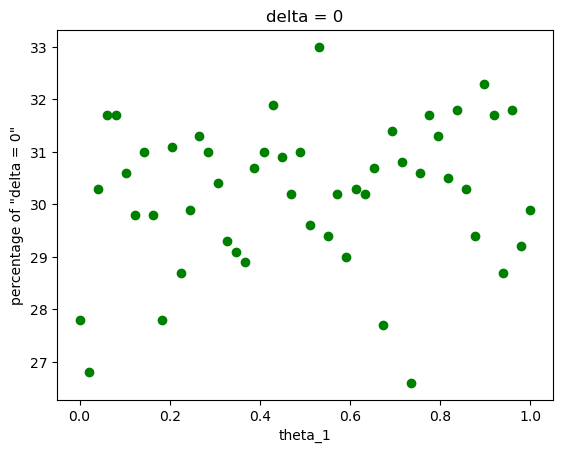

In [10]:
# As theta_1 goes from 1 to 0, plot how "delta=0" changes, and same with "star wins", 
# "branch 1 wins, fraction of 1s on branch 1", etc.

# cnt_1: branch 2 wins
# cnt_2: branch 3 wins
# cnt_3: branch 1 wins 
# cnt_0: delta = 0
# cnt_4 - cnt_0 : star wins

divisor = 1000//100
cnt_1_frac = [x/divisor for x in cnt_1]                       # branch 2 wins
cnt_2_frac = [x/divisor for x in cnt_2]                       # branch 3 wins
cnt_3_frac = [x/divisor for x in cnt_3]                       # branhc 1 wins
cnt_0_frac = [x/divisor for x in cnt_0]                       # delta = 0
cnt_4_frac = [(a - b)/divisor for a, b in zip(cnt_4, cnt_0)]  # star wins

# print(cnt_1_frac)

plt.scatter(h1_range, cnt_0_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"delta = 0\"')
plt.title('delta = 0')

plt.show()
# flat this time?, but the range is similar

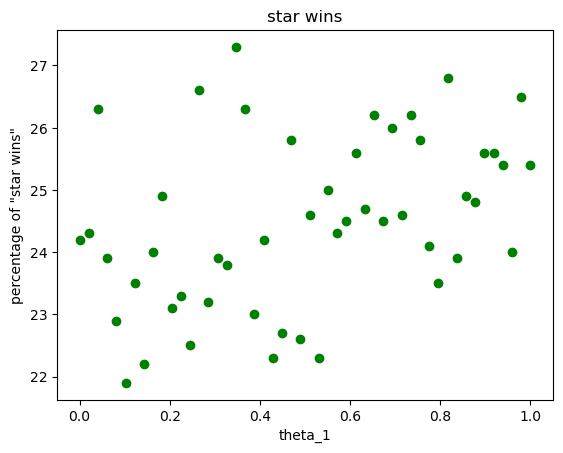

In [11]:
plt.scatter(h1_range, cnt_4_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"star wins\"')
plt.title('star wins')

plt.show()
# flat

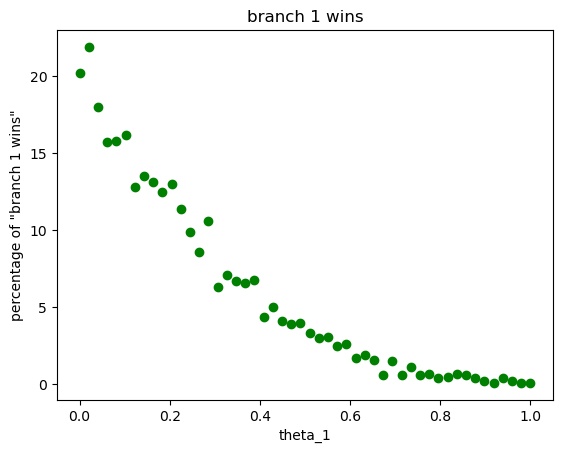

In [12]:
plt.scatter(h1_range, cnt_3_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"branch 1 wins\"')
plt.title('branch 1 wins')

plt.show()
# no steep decline in (0, 0.2), 下降得更平缓

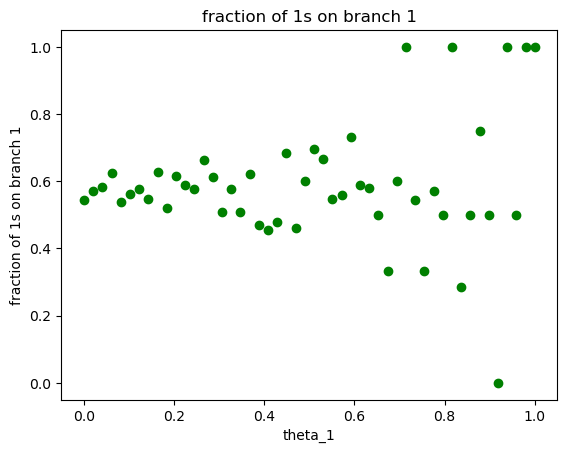

In [13]:
# When a branch wins, what fraction is 1 v. < 1?
cnt_one = [0 for element in range(50)]  
cnt_lt_one = [0 for element in range(50)]  

for u in range(50):
    for i in range(len(theta_1_unique[u])):
        if theta_1_unique[u][i] == 1:
            cnt_one[u] += 1
        else:
            cnt_lt_one[u] += 1

frac_cnt_one = []
for u in range(50):
    if len(theta_1_unique[u]) > 0: # when bracnch 1 wins
        frac_cnt_one.append(cnt_one[u]/len(theta_1_unique[u]))
    elif len(theta_1_unique[u]) == 0:
        frac_cnt_one.append(0) # when branch 1 does not win

plt.scatter(h1_range, frac_cnt_one, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('fraction of 1s on branch 1')
plt.title('fraction of 1s on branch 1')

plt.show()

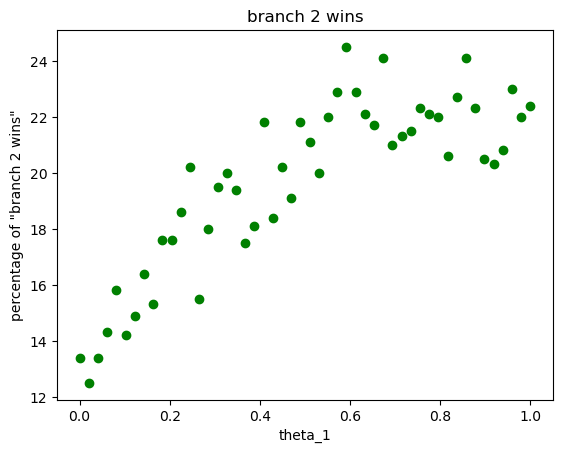

In [14]:
plt.scatter(h1_range, cnt_1_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"branch 2 wins\"')
plt.title('branch 2 wins')

plt.show()

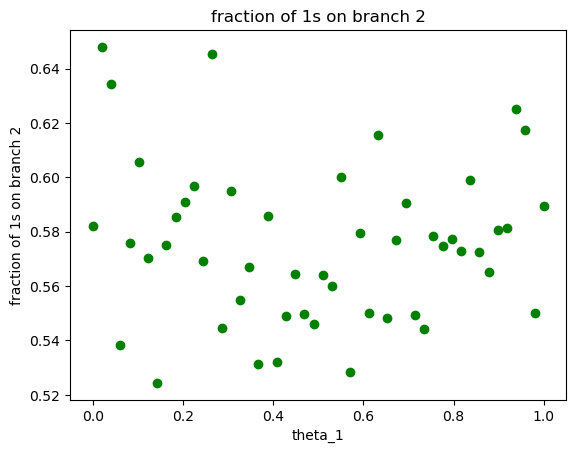

In [15]:
# When a branch wins, what fraction is 1 v. < 1?
cnt_one = [0 for element in range(50)]  
cnt_lt_one = [0 for element in range(50)]  

for u in range(50):
    for i in range(len(theta_2_unique[u])):
        if theta_2_unique[u][i] == 1:
            cnt_one[u] += 1
        else:
            cnt_lt_one[u] += 1

frac_cnt_one = []
for u in range(50):
    if len(theta_2_unique[u]) > 0: # when bracnch 2 wins
        frac_cnt_one.append(cnt_one[u]/len(theta_2_unique[u]))
    elif len(theta_2_unique[u]) == 0:
        frac_cnt_one.append(0) # when branch 2 does not win

plt.scatter(h1_range, frac_cnt_one, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('fraction of 1s on branch 2')
plt.title('fraction of 1s on branch 2')

plt.show()

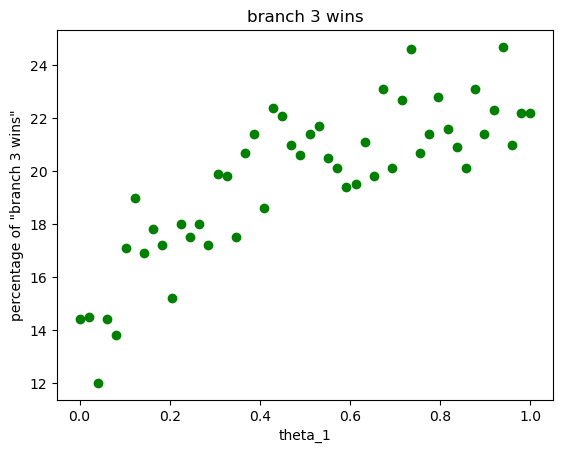

In [16]:
plt.scatter(h1_range, cnt_2_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"branch 3 wins\"')
plt.title('branch 3 wins')

plt.show()

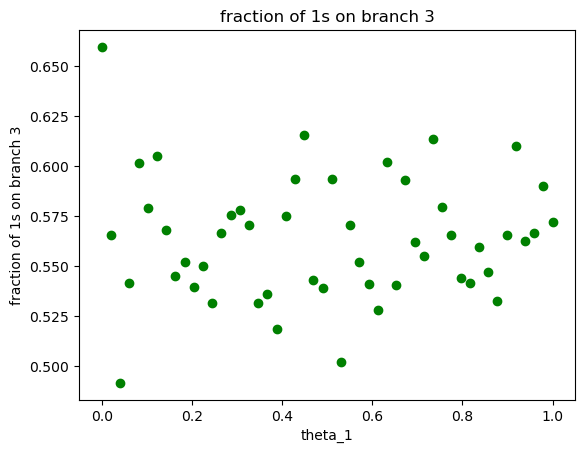

In [17]:
# When a branch wins, what fraction is 1 v. < 1?
cnt_one = [0 for element in range(50)]  
cnt_lt_one = [0 for element in range(50)]  

for u in range(50):
    for i in range(len(theta_3_unique[u])):
        if theta_3_unique[u][i] == 1:
            cnt_one[u] += 1
        else:
            cnt_lt_one[u] += 1

frac_cnt_one = []
for u in range(50):
    if len(theta_3_unique[u]) > 0: # when bracnch 3 wins
        frac_cnt_one.append(cnt_one[u]/len(theta_3_unique[u]))
    elif len(theta_3_unique[u]) == 0:
        frac_cnt_one.append(0) # when branch 3 does not win

plt.scatter(h1_range, frac_cnt_one, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('fraction of 1s on branch 3')
plt.title('fraction of 1s on branch 3')

plt.show()